<div style="text-align:center">Thea Kannenberg, Anastasia August<br>
KIT, Institut für Angewandte Materialien (IAM)<br>
Mikrostrukturmodellierung und Simulation (MMS)
</div>
<h1>Mikrostruktursimulation <br/>Rechnerübung Dendritisches Wachstum WS 24/25</h1>

**Hinweis**: Sollten Sie die Übung auf Ihrem eigenen Notebookserver bearbeiten, vergessen Sie nicht die Datei tester.py in das selbe Verzeichnis wie dieses Notebook zu legen. Ansonsten schlägt die nächste Zeile fehl.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from math import ceil, floor
import numpy as np
mpl.rcParams['axes.grid'] = False
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import time
import numba
from numba import njit, jit, prange
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tester import *
backend_ =  mpl.get_backend()

import threading
from IPython.display import display
import ipywidgets as widgets
import time

## Dendritische Erstarrung ##

In dieser Übung soll die Erstarrung eines anisotropen Reinstoffsystems simuliert werden.
Jede sich bewegende Grenzfläche kann sich destabilisieren und sofern eine Anisotropie der Phasen vorliegt, können sich daraus Dendriten bilden. Ein bekanntes Beispiel hierfür ist die Schneeflocke: 

<img src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAVUAAAE/CAIAAAB5AcdFAAAACXBIWXMAAAsTAAALEwEAmpwYAAAA
B3RJTUUH1QwBAgYAprXesAAAIABJREFUeNrsvfl3XNd1Jvrtfc69t+YqzAAnEJwpiqJEUtRkjR4k
2bKTuBNn6sSZVt57vbrzv6R/eL/0eh233YkdZ7CdOB5it2XZmmVZoiiRFGeCJEgQY6HGe+85e78f
bgGEZMpSer08WSA2sRaAAlCsuvfs+dvfJlAA9USk8ACgWJd1WZePnBBR9oWqrn5QlYgUALEF2LLN
5QNmgfN7J7ZZIgLoxtMwASB99xOty7qsy0fFELxLc3vfikBJSVUVYFUHwKoqVImo5/lVb9kgILOg
61ZvXT6KctNzq6pMqgqFJRhlgJFIapiM5zRVzmKD9UO/LuuyRr0aFCC8Oztwznmfcub3aP06rcut
lCTfOiJKAEACKKCAGCJLNrMFdv1MrMstHiTfIm9ZVQmUiTFGLBEpr0f+67Iut0bwIyCBKikYBIj3
3kIV6+H/uqzLGk95JPtOFSJGRFTVi+MsIlj+8bqsy9rUgRW5ZU3A6kRAvWQqb9drf+uypv3erS6a
/espvwC8Gt1joSrqb8HrYgEHgExWFM0aJKpKbBUOgBFYIAuNFDZlD1EAoKypolBYNk78+iH7lTz4
hohFHQhghQKiBuyZSDgEe6jjFAwo2JMS3/jTdxTF5KNuAEAgMDIEkHofsAQSt02a0q1b//erPrMx
6kWVAAoFMSwYnuFhQAoVGKFUb1xQAMwqsq78v8LqL+qdBUhJhDwEBGFEJIlITCDACgwAIQUlqrgZ
eG4tXArVzL0RkZI65yghghjO8H9r9G1/kABRVYmgXgAGlGAM0hBQsk6hkgJCgCEQ3eiVeFX1ytaI
9+sTE7+aEogIQxSqyqqGWAki8Ao2RqzVJBYGgxIoGwufogd/XeuWUdV7DZksxAAE6K2YLGWDTwBz
FteTMQYqCRQAKfWiQGMYAcQ6OCEIAdzLoKDL6Kp1+dUTBjygBDbGCDPgFMiHokY9Z2GfQrwlWFJ4
0rWtAgooEYiJjA2DiFzcXyj09P9WPCDGEoQ5s4gMwKiPoIcmxh6468DOTSMFJJFrIhaBF4TKHoZB
qqrEbLK6yrr8qoowQARhCAcmVECg8Gmo3sCPFMu7xsZyzqfd2LJ1MIZuxIVrzB2+4+0QjA3DMPLt
Ti2ft0R0iyKARIhIRBVgE8A7C+ybGP2LL/76PY8+lpJePHHy+ulzJ4+9/eKJs0cnry8KHAAmsIoI
ZwkVCHQTVNmtmE/9Ox/fd13P5TPNerPqNRGpkGXDhIS1a1KoKymGYLdXdctt+w7c9+DeHbddevvC
N/75Oy9dPJ9YJtddo3eNVeXGW9NMiBlsA3sLH1OlXkGfRdTADxXMpx+698Ev/N6m3ben3kzc8XAY
dxcvX3r2py9+7e+++dOXjl13ja4SDEEli5tUQbSu5//OLus9f8q/5A8NREXU2CC0adwtW9y7Y/t9
e25//PAdI3fsH7xtT7V/JLk6l6tUFv7mq0cvXequaXTwjbemrEoiwiYCm1sY/08iAgDEVkWZeOe2
LU89/vHhbdtBpQBWK+WuJrXh/qcmxvP5KJ6Xl069edU33Sp/Q8w99pR3ki6sK/C/k+avVv7luODm
v+ZN73Op43ZU+x5/7GNP/tZndh7cO1jbJdWiz+VjIKr0Pfq5T5+9OBl/619eb3aym6h6oxz2UY8I
ltk9aKXMD2IAolCBc2JA3OtoE9YkQOq9gF9GIRQwSIlA6U7WP/vcI4d/9w9qfdslswdESuQotPni
lvGd5ZKZvnpx5to1RyTKEYzCSSBWclkUkSdlABaiCMAGGgI2m7vkDDFggRyQriv5L71fmUozqNe1
UjBgDayyBdSqFgikGoKNknLOkLDCIBQCSMiA1bJaBav6rdXgi5//1J/9pz/f/dDH8xv22mLZmMgq
GzCISoO1Ui5oXL+6uOTajSUxqgQoE8hC+aPd/efMgmVXM/uWQSEoYk580hfls/pfrxd2S50zNqSS
tQCFVB87vOu3f//3dhy+34VR3Gi15+qWTBCFVgEiLkQbN476Tnx1cmquXo8FyuzVQyDsCAKQs4FX
qokcGS79wSN33XvXDmrFU4ut2EZqASd5iCJdzxY+6NHFypEkAAZpRf2dg+bI5sr+4eq+ocrO/kJV
GqkLBXBWUzhoprYakngD47nG/NQnHviPf/rFicP3c2mgR4cFElEy5ABjeGRwMAyCc2enrs9e7yRd
Wf4fBfoRh/5QL88lAkHRm/8DkbE2TV01iuzNk4RbILz0ngAwM0k6Pjjw2BNP7fvYQxzmEyC0wfTM
5XpjacvEVrYBSGOi4obRRx5//Ozxs5PXZ+qNRZfZEJWsCQiFdcmIDT55+K7P/fqj9zx2pFio/ug7
z/63r3zjR2+fbSdgcArxwbr7f/8bpKqUNVcIBDJEXpyA7t6/7T9++qH9+3ZYzoUoxKm/cHXyX3/0
0rMnzp1eWECQwEuaENSSFWFfghzcMvHEk5/Yef99Whrynq2JBVYJbEkBUXFEtq9v96G7D+x5882T
b813Fpfbugpahn9+9JP/3rEnUkLvQ1VEVvRfbrlCIMPCOIkj4M5du488+Gg4slkoCAWcy0fFwrlL
F1PI9oltbEILJPBbb7/9/ocefPmNo9dONFsQYjbQ1CuBB0B3jg08/thdj/7mUxP3P1oa3m3hPlPZ
5JM4/R9ffeH0VAuho/Qj71H+f3L9HlAQQYgNwfsAGCjYT37myU9+8XdGxsedRsZHhvLbWs0te75h
vvytxR+9OJvCsWNyhgIOAiRLZdInPv7AA48+SqX+BMyZwQdUhIhVxTBnHZzyyIb+wWFrA4Cpx5C3
9iwrlAQwGQ0Ic5at3rJijKQOYGt0ZGRkYGzc2eoyHMINbRievHh++tzk2NhYPrIGrDDI8b57Dx35
2T0Xrk1fmJsRy15VjQ9FHrv3yB9+4Yl7Hr+3smuXMVsoDVIbBZu3P/57vzPfTmb+6h/furbgIevT
Ah/EWaF3FxTMIgiAksHn79n1xCcfGt61TzkfwKSqSkGu2Hfn4099dqE9c/XqT946M+9sKYIxaGoa
KfbcPn7kE/cMju9OpGQYliBdTV2XWMMoANQiUEA8mq3uQrvT8fC9AEQInPHlfNQtQRZPaRbOqCp5
UBYFi2pGCHgrOf/etQDgncIzc+z1wvTUxanZVCCAEhwjLOR3bthi4uTC22fa3SRRWBiBbN6946FH
H96zdaIAY5XCMIRiuJZ75MmHH/jd3y/vfUjMOGkAQgB0EBUmDjz4qS/cc+Ceai6AejLrrYH39/+U
VfWX29UWOLh/7xe+8Jt777jLcMn4iDxCpBaxodQXhh/85GOfe+qRbaPDeSlEpkxEabc1HOUe/dQj
Ow7dgXzZaMZ3JS7F/LXZuNl1sWNjoCABEy5fmjpz6UojjpWsICuY3ay7+NE++qutgoBExPGtecRU
FaIMQNkRXjl+/Fvf/sGlczMAUvEWDNDg+KZKrXbh1JmZyStZhu+JKR9t3DS2Z8f2wb4ai7JDJNi0
adPm3bvC0qBFMRQrisQ2IWLBHrZvdNvGjduLNgeIW4cMvq+/YiaQQQ+xCmBkoPbZT33qwJO/aQc2
K6wSIBbeAiwgUUSbJu55/KkH7jkyUo0gaZokBWDXyPDhw0f6NoyDrGGICNQl3bZ6tSY0ge2pAUNS
nDlz7uKFS3E3AXrtB+nNfX70r+dyHQPLLKDLvUBF1rG6Rc9ZVtxRhQ1mlxrf/f4Pj7581KVJyIay
9mgpGty2OTDm/Jun5qfmVMDgbqtFRHv37t27d2+lVEbqPGxqC8XKQC6MKE2VQaRBU1CPAw/2spS0
LndajQShzUPX0QHvZ5pFFcvDuMwA+mq1Q3fdWdgwDhDUp4zEAiYUZxU2oNRTfvz2jz306GN7t48G
kRORms3fe+ft27fuzhX7s9CXmGPn6/W5yEZBEFJgU/RysStXp0+cOFGfX1SfrcBh0LLx+ejfK77x
xTtWexhjiHoNTiasWUNA75Qb54zhCIA3niHBlWvnv/6N//H8s6824gWwOlIHDI4N7dm2deHyxatv
n2o5z55NQq1md9/hu5566ol9eyYi63KQjf2DuTDvJUVAAFKHhZhaAalJifn69OLM1Xmo9y5e6bbe
slw0H8Aupwqkma/ySQCxUaEbVFTzSqEng9RLJ1YRtqQqos44aMD7H77v3v2HRmyZ0nTv6Ohdd982
NjICFDwZKMi7eL6ZOKZqxAVWcQEYwt7j7IWLrx4/drF+wdmE4LmX9AuB8NF2kAKIzybUiASkSqqG
xJIEKSlpN6v/CeGWQ7GSwAAKgaQW1FpafOXZnz6zY/vY+MCuLTVD5AETFka3be+7PPXGmdO5sY0T
O7ZElfLQ6Nj8tWtHDh1aXJhfuDKFxN4+satarBgYKInozLXpyAa2lCOQitTr9aXWknNJNoGyFnzK
v2/2z14FvRgVqlhqtupLTZ8mQWCYQAwy5JJEDQdhSLAgsMHAhtHth/YNv/rKte7swJaRjRMTxYER
gL3AEpAkqYtL5UIlCpgNCOJTwzx9be6nP3px6tRimsapd15vRP1rdDRGFFAVERAZzubbb8FRNmJ4
gjI8hAJ2cJeuTb7y8xevXLqedFJSWAVIooHK+M6ds7NzP/vpyzOz9YR5cONYt9tJ4869Bw8+8cgn
773twO0Tu/tKNcBAuduOW4tLEqdBYAC4JLl27dr84lwisdys0L0uNzmeWTRKRMQKLDVaswvzkqTq
hRTMbK211qqHCBxYGQTkC4W9d96xb9eOA5s379+7Z2TzduTyTnw24tnpxCCqVsu2WABLgliM6Qp+
8sJrT//4halrM7JK7dfoDZIbH+QMjDWByfwRr13033uH2aQAGZMBIUxgRaSbJOMbJvbs3lWsFBxS
RykzSlFu/srM6bfORuXS4MbRaqko3U6ztTQ4OFQrVQaLA3sP7t98205TKYP42uWrvpsMVithpQDI
0kLz6R/+5IUXX1xozoFlBVm+rvzvHf/T8n0zGXWdd27Pnr13HzpcrJSJmYjEe+8csREoG6MEFgU0
Zw3XG9uq/ffed/fE4UNhqeo5ZEK31WkuLuQLUb5aUZAjz6QewSsvn/76177z2s9ebnWmnXa9OIW+
k9HhI4+LJXr3jD8zgsACpt8aw8szArea/jMCAAYmA3yENgCZxcVGq9XaumvP4Oats41ux/koKuTC
KEzd+RPnp2auj09s6+8vV/rKxWqZTRDYcGzj1s17d+SGB9TaZqMzdfFyIQyGR4YQWQBXJ6/94PtP
v37saCuuKyl0fS74/fX/xi1TZbAX6e8fvO/+B4ZGR7Lo3BhW1SAMjGFWKIFBEA1zUX+xsHv7tok7
bs+NbYIJQMxAY74hLi1XqyY0BDbEaYIXnjv69b/5p+d/+pPr18/7dNYrRFJdaTzeGJ75qOv/O6DU
AIzhMAxFUIKYtX+e3kP/1WSDUE5VmRHkcmG+kBKuXp5cTD0KQ5cvLV46d71cKvdXc9Vaefrytbfe
eCsMotGt47lyoVAuWGNNvjg4MloY6qNiToC3jp5YvD4zMjpcGajAGghOHjv1wx88c+rc6U7ayvau
rq9Yfz/R3gcpiNmwV3Xeb9u+e+eevSY0PqtXMxOR956FiTwRACM2iCr50oZhGh4CWSX2KeoLDddN
iuVSvlxSwJNfWIqf+emxr//dt3/80x9cnzvHudSRYyHOwPHvMEH60T//73gXRMRsgiD0DiV4s+ZP
5HvpP6kUDfKKELAKTl3WEw09Ll6bmZuZnz01OX3ieI4xtnlDvlZi46bOTC4ttAa3TeSHKpYoyuVz
+aIJAlPMw6Cx0Dl7/HRo7MaJTflqDmTg8OKzr/z4J89fmrqUahsAwayvWvjlYsxy1Y0pG1SFUrPV
Eg227tg5unl0RTOph+YlYVEog4mAwGoYpggNMYE6re7c9Iw1tlbt44BBWFyce/bpl/7hq9985fln
5+fOeann8hE0pCRmKLQ3CacgVVlbtVomYoCYjTWRiJRZTPYQ0Zq1Au+l/+Nkdg4O7xkc3hwVBjks
IwwdbOJFEXe6c1OT+aXZft/tq+ZHx8dLg/3VgWI63+kspb5SKAzX8taESszWcACDer158eyFgVJ1
Yny8f6TfWzBYHJ595oXnX3j5+vyM1w4AhtF1/X8/f5WtpFo5kiYwLnXXZpeKtWp1YKhUrlhrLCFj
XvAgR14A6w15MIOJbUpioIKkm7SXmpVipVDOK0OIZo6e//Zf/8Mbzz6/OHnONxa4G8f1lrYkdV3x
3ouXFQQyrykt6CUCygS2NvAuqRhYVb98xddm2TPSQJCkWSvXB3kEBu2+Gn73oQcf/dRnKoMb6kut
+sJi3Gq3Wp0zp89fPHd+2rdzleKnHnh4/869tlT0aQdpGoWFex66t9l6evKNY33lytiBPShAtENB
vtNOZ6/PDPRVBiu1NE5ai81irYIASauzuDDXbc0HvgPlWL0Yj/UBgF8e/esysZL0oHg+dcyczk1/
+xvfuLrYePjjjz185NDEQC0IrPPqJTHC1liwKhPAKsIWpGi34sW5+XK5VO4rgHpr7qJAxkcK9U2l
HQNbWy5ZitN2u6tOAnU+NCKy1Gqfayw0E5/XKIZ6clBdHbXR6sD6w1AWY3oLvFZ7uJu9ktUbDQTk
AQN4sBEIW3JpN1sDvJbPk0PiGCAyXg00QXckoj/6+GO//xd/sWPvflOoiUBS5+Mk6abXrk3Pv350
sj6b2zB08OEHR4Y3zV2dT9X4hJII5eG+Xbt3LL321vzk5ebWzflCUSmiBBDp7+8r5PM5mKVm3aft
XDlvw6DVbDYXF5Kk60i9CAFQXvf/H9gQvONcJpqcPPHm1MLCwtSlIYlHH30oqJVBIiKUbfhYRdoD
AILL584n7c74xBaTC5Qg3hs2wzs2P/zZT9119x0gl5IutVvNhYYkvmI7Pgorlf6pU5e/992nn37z
rUvttpI1JKpe5B31CYA/xIp5pvwZhGyFs+gD1VVo9ZPA2NCushNrc+zRZRm3knBoJN4Y4Hc+86k/
/rM/2XLoiClWFUaVDakViciEw4Oj1eqG6/MmCsM0aC628/lySOQDtgCiYOftu9qt7nS9OTM9q5ZK
xcgmHQ5MtVq1AZGg0ldLksRY8oDvJujGql6YoGxFvKxX/z+o2q92a6pKNgD80tWLF1+hmcMH5L67
gKJlg6CHbL1BcQGCaHOh3l1crJYrxXxBSB2ICfCeK+VtBw+Q28PwauGcc61uoOS5HYYhFYq6lGwY
2tT8b3+18PabS+KQ+t6SCF15VR/m1mxmfpfy/xtIykiwTHOuQjYM7bLys6pbsxmlKkhU/Wih+MWP
3/vHf/InW+9/hPJVwEqPoUvABqpeqVXbKHEUxuJmfNpoFAequUrRWg48lDUYKE/s29k8durs2fNX
p69vGR4Z31zLF3MakAiMQaFaKoh4EYLXblc7XR8njnrjl7Tu/D9ApnrT0yzQKB/4RssuLdpOm0QE
npQsG+iNIFahpIgbzflLV0qF/IZNY7YYJc4ZawwTxDsNgnwVEFFHRCEQlhRCZIgVHR+bofDIrz/1
6bMXp65deev65bquqFkvj+7Rk31IiZysCkVW28pfagJkueb9DhgAYZn/cw3jf0OvCYEYNe9+7aGP
/cF/+c8T934MpUGQKFh7b58BcamkDkEQ5DaOlWzA4hfTVpy3UTkKCBAIlIlyxXwQBPOXrjbqzYrJ
b9lUhaGVKEpFiMiJD7rqk7gQBsUgDDocE9+UKXxdPrgVJ5+EwNbRwYnNm/KFgi7vY6CVlBwE1W67
PXd9Jqk3KyODplKA5SBLvgCxbFXVKxkmCv1y9MuAVUCRNzZVCcZGPv7k4ydff60+P9104noU46sL
ZB9+Y+B/f3OXKABrrVMxy2mBrtX6PwOCKFB+YM+W/+u//B93PflrvtDH3gvIZ1aPABV4NYGNcmEh
R0GBOM9csK4QxTkrxqhT8aKBcc5zKkkzaTWauXxuYGywf6AU5iMvSqQEqCgZTr0zqTNMraX65IXJ
q9PTHZ8uW5t1+WXO/6aBADMbY3w3HS3lfuOpz37yc5+rbt4gzAxW1cwxZyqpqnGr015qWKC2YSio
FDKqe3gFsSc25EgFJKDl+T6CMtiliRFDZJzAoDg8kKhMTl25MLfknFsO/7PweSUc+NBSgNXBP96z
yUXvKFksI5qYyZoAlgsS2158vHb9UmpA3ltg04G7x+95GEHJt+LFxmyrnYSFYhjlA2N90u602oTA
hmG1kk+dGBMKdH5u/np9ISrmB/r6B/I5dvAqXIiGN4z5broUd3K5QA2DwEzeiSEmY5DtErMobR4+
/NgDJ9488fbbp+tpxxMz/HoC8Ms1f/Wa+pUfMTNELbB39557Hn1keMd22GiZBpxXEoRexGdsf7Wm
A7VCrYZsw60qekxfAEgNCIayHQGZQhMQZFXGNLSBAlIqbr734MjTO4IT57vo6o0oOiv/fcgTM1kW
EEWRMabb7X6Q4H915KKqIonA255Ro7XbBfAROO4ornTNYlzcIim68+16I+AgD8MeRtK42alfvb7U
6HQT302CpN1NXNp2ST4XbhsdGxwpFXKSyzEYMWzXUH64Mu7Hr09PqbjES+pgLSybLJASlcAGIPKM
jbt33HP47hd/8tLVU0tLvmUVybqu/9tNAzP7JBksFO++++7bDh2kctGteLgs+V/lAK21YaWCcs57
b7KyNmfLmkACx7bX2vegXlPQQyEIQoUonIEVhMTdhaXufJ3I9Ar+lMGC0Fv68iHtCyTqLa6w1g4N
DYVhODs722g0/s3pAzwRDHogqjV4aJaH7ElV2JLrdnZsHd+9a1+uUCyV8qa/lC8XoygXBrkwzIe5
QljIRQUrlDJJu3G9sXBxw/Dgvn13VfsHbGhQNKJgR9rVwJLmjOYj5wld1/Ip53KhJRJRBkSNkBow
WQgPVKMrU5NXp6bnG+3EYHkc+xcoAMxyvMY36FoyGvzlKHWZyIXW8gwxrypFZRyVREYUQrJvYOyL
v/3bu+8+zFE+U1x22VJGumEIAAQGkQU5ZsZy318ECmEmyv4CQuxATkmIjCo5JiUYBpKYiKUT/9M3
v/f9Z567cn0KgKjv7cgAZ9305fukH8rBzr7I5XKZ/0+S5GaMEj2D9c7HlQwZS6HYiNDr/689/78q
ehQo1OuF8+efe+65Rx/9+LZtG4WlaCMFhKEWHAaVQl9N+zRN2nEbXuLutsZSPZ8r5WosNuYAraW2
d1wolHJM6lwhsgVbnU1leq5eJI4jR3kbWuZYfSphwWSFYjJU2bLpk5//7LGLU2dn5+KksZKmvutu
sTe9mFJ7LRkCCJT22k5m+ZYyevx4a7Vfc+O8iggRMcN7l7d2z217t2zfEZVLYO4hcph/sXfQUw+Y
5ScBAMPIlgWyIYChLGAiiIAZxBKqQ7YIPowSxU9eOfr0K69PzjS996uj6+UQWj/Eg70y+7C4uGiM
ieP4l+fvN91PKSJKuvbxPwpvDKkqFD/+8Y/vOHj3H/7RH5TKEQSUZYEQJVUSWENBUMz1AShioG9w
s3h4FpByYJD4MLQmACkMCEZhqVwNG0mhnCtYlU6aMIc5kAcSIMxIRgkmF1bHRsJCIeDAwMh79I1W
aNoU4mllCQWsZLcwKxwwYcVKrNX7pavRqERkiEX9WLl65L57N+zZjoy6T8H0jjL4u2qHAHnvjYHh
DL+nqkqGFL5nRgVEoAzjTwwRmMAZtJy+fvStr3/zWy+9+vO5xTmRFDfACLLK0Hz4vi2O4/faPXdT
i7DaPjKzSHoL8H8TRBUCa+z5C+e/8j//Z2mw73Of/42+kAMCXAoIG6PGtBRL3W5BTRD5TqvdblIQ
RMWSzeWYYGylIA7NxFlGYClgNURUCAYHilEUUWA6ruuSDqIwDIwzCgiBGfAqC/WGOg3Y/BLOLyWH
1RH+soY7Xl3KFais3V7NKrvWmwHIGu6eoXs3bDlw6GB5ZFhApJotB1MmvDOSWj24R2xWLGsv5gKR
ZpwXLoMMMtsMNtQge+nS/IkTb7994vjPXnzh9Vdeqk9fNq4hNyukfbjB0erKaCYroIBMvd8rHFj9
uDFGU7W9YGnNbbO/cSZI1YMA7z1Ar73+6l/+5V/GTn/js58cqlXZBuoVoJbDTKO92OiwDfr6C+00
XWomlVIY2DCO0VhsAUi6HajrKxc0DDgXcgAlBOBUfRTaAnKNxYUln5YqZaPiSNkpiZrA9hWr/YVy
ZKxXT/weaG0DKNTDAKS95JJguhlJtfbuPGULHNbuGiEyDNFl8k2vBO98BOzeNrFxYpzCnFPYHsJX
lYhXczquaol5r8YQMkQGM4jIcG+sAFDDHogVs4uLM7OLC0v146cuH/v562eOHZ+evDh79VK3Ne98
WyHL/PlYFQXohwgBWHmPzJzlJiuxz3thgd9lEbLXz4aJMlr0XiVT157yE5FkpDtKSmAmSbtvvvLK
//1f/+sLJ6Z2337bhs1bYMNO7GdmF2en5zvNTjnoDgxWvU+h4e5tu5e6m+tzM2dOvr25xBMTG/pq
xRwoB8MORAjZpmQW2u08bMUagyhJxKUUBew0DX3WDpSRwYFKFLFLgJTI3Nw89xw9e6xy+JSVKAz3
Wk4eGRBpLedrgKoBCQAyGT9df7m8d+/u6tCAgo0uh0nLKcAvaggRGdObfCfubbwlJgHmDObr3fp8
a3567trU1YvnTl84d3L62pWp6zPTl6505utxswE4B+8BGGZ9z3D6wz3bK65+dQb0rtdJRO/l1733
xgT2VwTM9P+5jVyxiKQgsIAImuVybIMTr/988vy5geGRfF+/iQpetNNKfCeWJJXIsbXKksuFO7bv
2bFlT2OxfubUW/ft3rf1D78wOrg5CAjWQqHqyDLlDcW+027ny+VCqWjiGE4QmJAChgHDEUylsGff
3t0/n5g/Pd907wjVbgA5YABlCEEo24BFUIBppQPQKyiAAaY1s0mU3uXA9cb1ycp7BIwOD+7ct7vY
X8UyX4VCiBj1+WExAAAgAElEQVQCpXfAYFYrgIhTEWOtCIjZA9dm6v/82munTpy5fO7ywpWZxsxM
fXaqXZ+J20uNTjtJ4qywqiDNmi9KqunKU/4qWAHqtTMkKwSufmG/+PJ6a39u9iTiBYwe/n/t4X9X
roUhFiUCqzoyUIEmHULYmp9qzl0FBzYsqJJ3jkgBMd47ZQqhNpk6cezNykZJZWHhKjXqn3ji/r13
bEUYQBysBTiWxOZypUIQJ06sRJYldmm7jSAfBWG70VzyMfeHhUL0xGefrC/MXPuHmWPnLtz0jio5
Eo2AKqEvCmv5qJQLQ8ttqEvTpOPanbiVurai7ZF6bX8E1fumcey7/RUtL/5cRqoQUC1X+keGOAyy
NNzDg8l6n8TO5Ozq4t+q/N8zc2ZBMhd5dWb+n/75u9/7zk9Onjw5P3ddfaySdrttn3ZdkhKMQAAP
lgzdbyjrGt5UPjRuABFZrfbZZWTmrARw0/rfLwYFKw9agoDMGh5L8yorlRv1WN6FvMz0JrHrxqsv
nM8mIxyQatyev7a4kHmVi2dOvX7y5MEHj4yGeShU4YgMRwbdUqmYa6aaOm/hy5g6PxvU81u3bEIQ
1xdmkmbfULU6unPjwY/dteGZp8+eudZAF8ZDwKRes/9PWGCB24cqT+ycOLhnd23bdqrlSLuq+TiO
XWOpc30mXmxcvLbwyoXpVy9cuYguAoIowPAIwSmcWhjPAlUoDAMEr6wUgrok765gkQGBvEcPJd3D
0kkGENde+13kHTQ4rEahBkahAgGRkqBXVr+ZnhuG97099NlhJRaVEHAIBADSUMFAF4yIw5gSSr3x
xrH30BAxeL5pTzV0ZxzkcoDtlQeUiEXVwwSsXsD0jvq2N+BUiZxaMphfan3vuz/6+6999/SxZxcX
F+M4NpaJSMSJ94AouRViIXUKwP8ynfgwU7DV1b73euR9839rADYWtxgX7fu+2Zv6JQDX564998xP
Dh88WLv/vlzIRGD1TOyRM4ANg2bcNWxDWzQ+WlxqLo52a6XqaAdzC0l7sY5qf//ocK2Uz3Gu650H
K5yKzVYQqKICeezIgd964vEH731gbOdOXyuJMRZGE2c5oNR3W4uu21ian7/v7bMvv/DqMz/68VuT
5+tAI1Snmoow4D2gknkHcQICESukq0oKswyT115O6wE4JqjKcks5Oy8gYq+ZHSAwVHqro6BKXhXS
I44HVN+ngeyypTqaFeFExJMCSABklipbu2gsiSJ2DoZAcMpg5Wx0m67Ur7zx4ov33Hlg49ZNMGyz
HYEABdZYowIlMGlmE5brqQIEiXfGSOL5Rz945e+/9o2zp19rtVqpSxQiAoEXyfiwcUupQBY2eO8N
3ag1rU+nvGOaYnVZhYhE08XZ+sjQpt37bi9WcqyeCV7EkBEFB4DXhfmlboJcLsfeU2QCDgthgT03
242olMsF9vjrR8++fb6RNBTSs8nWAkLQfRtH/s8//+Kv/85v9e8/RMMbUCibfIWjki2WqVjSUtkO
DgUjo5UtG7fu2bZ93/Y9taENuWK7Xr/WbKYmW2dixZByTsHaKxJAVXoDbspCLGDf89cGMBn9AcCk
DM3cqiE1UFYiJV5uRLCSURBgYAQG2hu7YwYMyIL8e5wfAxhkvl9vnDXAwGq25xsQhhg1ZAtiYuPA
AYQBVfUhWSNe0+aOoQ2H7znUPzYiRCQgD1Hh0FBWJWECVEREfA/Vq+pU2diO12eefvWvv/L1V156
vt28mqTOSQpShXqfAvruxVBrzB2uzD2sPMBkjAnZGFFDN2MIXpdf9P/GoNvuqgTbbts7PrHJQggg
DkiRoiOUhoZbjU4jiYc39hv1l9++eL3ezPX1U2jqS/Uwyg9UB32rffSNY1dmpxwLEUSVDEG8VTxw
5x2/+adfHLt9n7ehCJGI4Qxv6jxRQkSAyebYcvlwuH/r3h37Dh0qlipXLl9ZWmqkXhwAZusTggfE
Qky24E2zAk+PVzdb/AgSRTYGJyABC0jBaqywERExLAQhEiIxEENiWQ1J9ru9LR3UozToAZbe+3Lq
jctomBgKAYxqRTGaLwWOnHdOfWKy/mcIZVIX2SDgIHLp9mr11z796UP3H8n31TSDdDqnJLAE7bH2
qgpIDGcNQfLCZNBJ5ZlnXvvSl7764nM/SjpzkjgPJ+JURVfKqnRjiHgNxsI3039mzllrREwP/LSu
/+9rDghWg9m5xbBQ2Lf/9sFaRZ2DMaQwUJfExuYUttHsRvlcoVY8e/Li1PRsrX/Ip+7MhfMaBMOD
tYDCV4+98fbk+cQlxIGCwdaq5oGH7z7y0Kc/Vx4cNUoMG6vpelXfjbMMNY3ZOUsByAKGKZfki4XR
4a1bdyxdnbtw+nwjTVJ4C2NUPEGZBCxqMj8PDcMeXpiVmCjoEWwDRtmwJWWASFk9kZAF+yzF7k3N
IHs2UQZUspUSRFmqkIUZv1jJWzl/SgATG6OiDIKIAdWgj+7f9oXPfvyTTz4+XC3T9emoEzMh5+C8
A0w+srlcrpumZTZf+NQnf/9P/mho+7gGVgBJHSTlgMBkKIPxCqDMBiDvRVXZmE4i/+t/Pf/lL/3t
Sy89tzB3qdOuq+NUut57ha4Q+qxqPK7Js3tD/3vhLZMxJiAyqbvl8v8PourvdUHIYKk198PvfWfX
7u0Df/C7A9W8Fw8yNgk5QSswXMhLY/rt109uu/v2od3bLv3kucULF0ulyvTUdFgpkN1SLPZVK0PW
5KEpUyAQOEA5T1F+oJ+ionqT5eVX5pI0TatwXihnNB+QreRigiMYoUgQcZBCapu2PPDwIy+88vML
b/6MxLD4GBFIoc6olCAFoJRHqRKUK1vjJE28eEHi0k6r3em2nUeXRVWSrDAHUggBQUB9Ym0Q5oq5
IAhExDt4gffaTpudbiLoLY1jtv4XqKPeYQuWZ0t6NSoVAwxW+//kkfue+vR9ex88FI7vePPlY0c2
jy6dnZxvJ5Od+PjlqdPT19vepyqJS8tjY4cf/vjAxA7killSwwF7Wb0nJFtoywC8V2YLIgGe++lr
f/fVb7/0/DML9cuQVD28Jm71i6UVoCHhltGCLP1P05Sds1gDK07+fQqEv9BMNl3ExtClC6f+/qtf
Hx3b9NRnPlXJGQ+0vbSd+GacYy6Vo8krF46++NrtB27bMlJtXL/M2DwyMlTOcWepFcdxObSVIGzC
WwqCXNRNE3a+EOaK5f4oMNaoep6fbc5dms6ZKOzrDwNj4SJjjLWnJq/MNRrbt2wcrZYpRRiwkuw4
sG/HbXueOf4aNPVkQ3IivggcHB+4c3x0Q19h8/axoS2jYX6jc5Kk3iU+6cRLCwuLs9PNxXo7ietL
7cvXZi9evh47bBgt79k1MTTcVyhVwsiWKsVisShgJ+odktR3FzvXpmevzSycnLx88sqVJXHeAEFA
sbupJaXM0VJvCF8FzGZi+7bP/6f/fPvWykJrzs91D9xx7x2j41Jvzi3FHfWvPP/iX/3t1188f74T
pyXD27aM2+HR6wkNO8sMYwBmmzO9vrVqjyAgm5fMmh4eR9888w9/962XXny23ZhN201VJYMkjX8x
1c+WX+vaJWa+OZ9aNkTcu4i3jAX436M5JyIlA3hllbT7s5d+9uW//vrA6OAn7zto2S3k0BGYxXrs
k+Etg/Vkw/GX32wP9R3Ys/3ll19p+u7+O+/Qzsz1C+fjtjm8b8drRzd2j8/FritGSGJ2Uq7YrcWx
GhhIvQmb9dnFyRODg8PRlqFCAWQsBwGA6TNXpqent1f7qFiAzcJ3KQ1W+0cH+4u1pc51H7B6Zwg7
tm3/w9/73V/7+CcK5TCtWh4oFnzovaaJaCJWQGkS15c6jUbRJs12evbC1edfef3y1JW9t21/+KF7
tmwe6RgDRpgPo3xOoF5ZPKdeqH4t7nrXpRdfeeMf/+UHL711fGqxEQvJL0DTs6+NqgdUeoOoAonF
lfqqZnQCtXD+8vVA0uJto3ZnH7OOSmTQHB0bOH3p/IW4fW7ySlnttpHNYgtLYosOcbPp006lr1zI
5wwAydKPlTPdG+SZvDj19a/+67PPPnP18ikmshQ6bSROQYZUstOuy1OVt2b8a4wxSpayibRbJgb4
4Df7nc5fQAkU4sFQL40Xn/nX/17Mt+vpxm39uaBWzQ/UF6WxMHVnrbB709i1E2fPv/XWxgfu2rh9
/O3phW1hUA3H2t0rJYvDD98Xpp3/9tft7x17M9XAUM6hNTg4umHnQFQrA4ZSH9eb0kq04uC6DV/i
rq8UGEY2DIdoa44EaoQ8q0KAsNhRCw1CCn254OqNMYp/7cHDR379E8WD97KXiIPUczcVa5Q7HeNE
VE0xDJO0SIEK4tbszn2dDfc9cP3yVGWgPL5vL5UqfXDwAQIjnFhhSB4iMLHqfscSOPPEpj3b9u18
5cWffOVv/uW1i/VmlFAaRmRidJQUXkNjEy/OCnsEClHr1QCi4ONvXvzhj78/9pu/Pbr7XjJMNlUT
ATCkXS6Xdu2+//FPP318amZy9r6DWw8e2MJxM5KYHF566bUgTO45fKgc5XRZ24mhlAI2VTGwF68u
fvlr//rDH33r0tSFro+NFee72sOA0WpEj+otsIxB8S6a8AzWocYaC0MZrnx9J/0HqaOsGjOLO52p
a9NvHT929I1j7UZ7bGTkyqVLbx8/yeCBvprN8UJ9WosjUWXr0nybkvbGDYP5Wl8LGBvfNrqh7+ri
zLGzU3E39F6sxvfs3v/pz/6HofFtagwbZvHlUm5wtC+sBLG3ncUlFoA5CG2tUqn1DZhCSGAIg/n0
qSvf+qd/OX3+BIXOJV1Kuvv33/HQo4+ODY2EuTBf7mNYk0hsvTFChhJhLuSd8YiMzefjTjxfnw3C
cGzz+OjmTZWhwbBYskHBcSA2iEkYVsmoqgbGMVk2oFzS9rlSfmzHxPjmcYI5c/rNer0FsmmG2icV
hVfJppVzbIjDhAGTMCRQH6etkOzuXbt27tieq1YMMwHOORWxZIg5SZNnX3guXpr7wlOPP/rIw8Vy
X61vy7nJq6+9fnS4Vtm4YbQjStYE1CUOhABVViETnLjc/NJXvvbDb/7t6TMnu92WtcRQ752KLBcp
b/VkVwFrrWEY562u5/4f9LIxDEiEAIZ40OLc1OtLsz//eW568upgpdZtdKauTPdXazt2TmzfM0HW
zy7FuSSxnXj+yszsxlqhf1AjO5emKI8MTBwcGXm91bqQCJsOl3NhUCjAsCiItDY00NdfpZATeHY2
LBXmZha6s+nAYGVs81ZY40QtixqqLyZP//i5N0+cXkpSq2ra3Q1htHVsa64wkI/y2mkuzM/WaiM2
Mjk2lLbZhjZvyUJImViUuVTMJdUoCpCLuFgM4NUxeQixYQRgqwYA2ClEYBOgtZB2krhSDUu5wuCu
A09+3i0uXP72N587MTu9qMJq2JPnlIjghYm99x6KICCHiQg7xgY3bb29tmHz4tx8I0nK+RCiRGyI
naZWGIYLtWp/wWzpL+/cvmti996uDecXG8deesn6dPOGze1W3JhZ3LxlVEuWXMw2ILLw+Pkbl/7q
H7/9g+98c+7kG4nvGABe4zgR7bErkMGapbl/7zg/iiJVTZJkZWvQMuRB7bpe/xssgAgyriQIqZB6
OFHxx994/et/+1U4LhZyt+3dFkQWAW/eunvx1bemJ8+nSYdL+aWOHwhMvpKbWqgfff7CW28sxJ2E
edFYSCoInOcYNgU0dpILQgpDJTChYNHpytziQlQq5AslBEZUybBCE5hnX37jn//lu5emLqWp57i7
d3jwnoPb7rh929bhwY3bt2pgzp+ZvMzzG3bvqZXYmhxIYKEMn1InFpci1qRaG4lCo6AUCpjAcGO6
LT7ND+SCXKACgsAoAYHg7Uuz06fPbdw2Vuof8hKYEBN33PUnf/rnea186Rt/767Pp8jFULBVSS2I
QR7wYEr9HVuGf/sTRx46/MDG8TunNUysacdJgcgSwXkyaowFkQN3u8nE8OAm3p8vDaWFgdJI7diF
V2evnN1/+wGKgjOTlwfDYl4Cj8DYHm3PS69O/j9f/psf/PDb16fOBuqYXJqmzkmP54VYNIP63lrC
zMViUVW99957IiJmXZZ1/f/A4T+z9kYsljvHENLUBGi35l96/jlxOjBYefiRg4lPVIpBLuorU3M+
rW3YYStj3S7qc62B/mLOXX/79Z9NnTszWMqnncKV+mLXw5TLuVIJIO+dKsjyCh+DCuJOJ5/PDwwP
F0qRT6XRajSTBBSdODX3t3/7/TfffMPHC4iXRvryv/W5Bx79/GMbKqP9G3blB/rBYZFnn33p6KlL
S4cevHtkwDDUaxIgRBC8fXLq0rm5PbtH+rYOY5luA0i77e7Fc2cXmm7THVuLw7XIIBt3MeDmrL7w
45eD7tyObX0lY3tLsMJodP8Dn//D5Or85Hd/8JPJhsYUQtsZQZcXr2EAJzmR/Xtvf/IP//i2Ow+H
wUDu4ux0YzH14h2sydL43sABwAtL9R07do7fv3HTbXdzbWgx9leuXq/19w8MD9XrjYDNpg1DNrRe
BcQJmRd/du7LX/q7H37324tz50LEXiT1sXOiq8Gcilswz3XOpWmqqs69I/KJkyRUrOz/Wqelfl/v
33MdKwzeoqSizElgC+1OHUKNpl9amldV4gCIx7ZsalN5PqkFVJs8e/zozy89+ImH+k3UX2o+eP8m
m9v5ne8Eky8+zUwUDQiKkliwiQxlxtpYJiBNqd1uDg72V2pF79UaIuXFhaXjb53+1ref++EPf5R2
6ug2y9B77jr4+d/7/W33329JYApiIlazecvwxnOn3zz+wlHqbtq2CRo3Z6eNze3af8R1afbC5cVa
oJuGEUCXKUjEuYX6kg03dtPSqdcn69NTzN2+4dpIdfTKW1OLly4funN8ZLAvg+ArqRMKQzt+6MBv
/d5vzs4sTD//pgF7UWvgPRlrPQDx2wYG7rnz4NZdh4PqljQWb02xVE276dz1+f6+vlxkQPA+NaJJ
2p6ens4PDm2561B5dEeS4NzpC65px/fuSwIynWT79k2VkaK3bYMIwq+fmvnvX/3mj773raWrZxzF
QRT4pOGQ0f1AxGOZMGP18pxbpNulqs1mUyRblEiqqquyAHsjuV03Ae/XDlge16ceQx0REcQ5NV40
Bmy3axcXOnEHEHZegtKgsclbL7/sJEg1mZo8Pzy25f47t9922+5yJR/VRk6ePBk9/+NY9MLklTfe
PFno6+sfrBoGhA0rgVX84txCq9UarVWjHCsEimql0vV6+fz3j778w/rs+YjFit+3dfMTjz+5ef9D
HA4rem5PSE1//+GPHcgX3cLM5TOvTHc6sW0tVQZGpvJXL52/fP7YC5WK27NvY1gqUwbTFVtf6l6Z
WywFpetJOnnpjJ85VytKqbOhU2ulU5dv3z68a99uk69CDRgMChkpEIT9Bz72yENvT75xvt6+OBVb
UEDqxbFFKgXgyKE9Dzxwf7W0UWKg69JcyGSMWknQaLbB+ShkUoYhdOJ8YNNCqUNWmo3F+cb8+cnR
/oHKaKHTaQ6UKwO1GiLrwSx84tiVr/z115/+1+/MT1+wFNtcUG81jULUAKpwWW9ruQR+q5zzlT43
M694/tVbQ9gYEqzH/x9UAsuyYjrJACSiIGIqJEkniEiddGP36ivHz5ye3Dw+Zmx+7nrTdJth++K1
ejvo29zuuHOvv71920itfzzK2dpQdffeLdvHh89cmDp/9viJU0fvumdfEFZ7tgVWHRbm2mfPnhvp
H8znc6peyZNXcBS345kLizOXJjVptj02FyuPP3bkU595JOwfZhJ4BqOrCXFoTVQanLjzY1Fy+dq5
One7dthQWO772dW5l4/9rBNfnZm50mwtlAbzKmoRANxqJ0tdd+LUq7GNtgxVjty2ffvGfH6wmqRu
W3FDVO4vjG3wJmBGAg2EGKLcgRbDwdEDDzy4/8cnr15ZWORWF6mxgXfKyhtH++9/8v6Je/ZNx2na
QbmCfLW6eHU2tFzMFbou7Tpv7f/L3ns1SZpcV4L3uvsnQ0dGRmqtSuuq1gIN1SDRAChBDjkD0nbX
1rhr+2/WbN9mzUjbpe3MgCAJsMFG665qVd1dWmdV6ozMDC2+iE+5+92HyGoUBLm0tXlhV/lDWj7E
S3i4+733nHvPYQJRMuYknYXJmcpuRfpRLJu1nZLFcXgiDcJPOdbw0JDkjIHwI3j3w9v/7W//7r33
/qmxs2paAsDVLHQStpKMKSCKpQxAS2B9FWDiyBXpxy1uwa+qAz2MXEypiCMggP7q2v/9/wBMgDPo
D7sRuAAmoEJOoIiDQcQACJlCVNAnoCnkzDCEaVhcS91q9GyRPnn0jJ0zm7W2ivxMzlVxXNmq+m3P
85s6DH2ty0FgFXIjU0VH63C3AT1+/PSB02efttPJuO9rpyUq3L67ErY6YwsjZtpkJBiIIBYPNno/
f/3m3//TP+01toQgGQUHjyz82f/0R0fPPsVFWgExhgAgkEOsSCtmcLQSTn40lU+PTg8Mzo2XG+3d
+w8m83DocE76YXdPDuZG3LRDhKVb4f1Lt0y2PZaXvN2y0Dr8wrn8kXmWK7jZITc/ZBSGmGEy7Avv
RAw1guDKBARAI5vLdbul5eXr1YYmlkBDax1yrY8ePPcHf/q/FYem49ZeytAJJ00Bq5ZrsYxTubSV
MHUc2oyxWDOpkRtoJzmjQiYV9aIg6I6OFQZzwHlieOQAMdvz2o1q8/wHF//6r//2g7ffqNd2kEec
R5xTHEpSWnCNoBmSZQiimBA4IpDgIDRIeNQeAr/ikMBvUUZCMk1hIgjSnD3h/399sxhp5MAJgTAC
JhmBIJTC0lpmQD01M/zt0wtnlkYnBhxD9wLFo0jGklnCtRze6uy1Oi1Ftoymvri6ubLnj8+ecqz8
vatfpB3/3JnxVqN9/dbu+lY7bbJzx48NDIzWG5ViXj798kuLB+dMxwZEIMVA1Pfq5Uq9OJxPFwqW
bSECEK6uVX/60zdf/9lP7t291A3qMvYypvWtV1589bXvDIxOAVjA+jaY+18ISOP+mAw3TUsIs+up
B/fXOdenzx1fWFqqVVrV2m5xdCA7VAh6+tMPP7hy9ePJmZFnnns+kUrXGw3LShSKRdsSnDFkJgoE
ZASgSTMghgyREey76Rkckwlrc2N7bX3H6/WEKRQp1FTIDZ47/fT05ITjGm4mLYn3ul7g9bxOFwWm
0w4iISIqphiLkElNjmm6thPJ0EyIsYkiCMtO5EEbtWo9DuP7D1b//r/944X3z1dbdc6UZUDg1cNO
1yGVRIBeT8YxVyKMJDNMYbpx3A+F0a/Vxo/Twf4SyQbOOeeMkX6S///mHnHoq+sS45yAiAOYCDOj
7lCxcHB25tvffOHk8SOWZdUa3uUrt15/7+LNmze3NvYC3zeBO65Y33rw13/7N++/9+Fuq84Mq/6H
f37uyMFcNpFNG8+dPbG607l4+Z2VB+UE9A7Pz0jlTC8cm3j++OGDpy3L2Rf4Q6Pd7K1tlCTQwOig
k3QBALTaWS2/+8Yn//QP/3jj2sddv85MHYfxYC5zZHG+ODwF6IDu4+dcagkaheCMG/1vF2sQDIKe
XL692aw1J6fzQ5OjgMbBo157cjdfdAA0oM4XjQNHxiamJ7LjU4uOu1Pe21xdy+fzc4fGwdAgWN93
BDUwzQAARV92AwiJAQLnswcOvvDK169dXe10OlGsklaip73N0vb1L66cPX58ZGEIDNKxRugZAhlj
oR8qJW3HoBiBiY5PTb9pm2aWZ/yuBwYvFoeEZYcKdaQr26tepzcxO1ssFlOuYZPP43YYd0wXxweT
k8PDs5MT2WSy53WqzWhjb3t5s9SJeBwLQC1MLdVD/V+iX5PNf0zegr4zAhFqQk39Qc4n8f/R+0+E
DIF03yWGkZ4adl/73af+6kd//L3v/+5L3/mdoy+8Upg9mhpaGJo8mCtMmVwuHRg/dWqeI22v78Uh
I6XbrTLJu1NFncJm3Krk86lMMeVHNFiYH5sfW7978/6dS4MjheLIaHV7B8kcnz5VKMzZqTQ3BQJH
Bav3NprN+tj4UG6wgIIhUdyO33vr4n/5r/9w5eonvle2bdScqaB3bHbyte9+Z/bYKTIchn0ZL+wL
PGqt9wd4lUaBOoYHd9aufHE5nTSOHF20XFdrlsy4w6NFK5XQwA3DGMglJ6fH8kNDzLIs1+ZApbXd
bicoDo0arqVR993yEBkSkuqrqwIhKkCuCZCIc8dxV+7cX1tZbfm9ZMKJSXntXoI5Z0+dHp4ZU0wz
zuLQazc9BiYzuJM0kwk3DGXPU20vqlYqGFOvFm1ulMy0VRwZ9nqqFfaibqfbqCZTdnF8ODeYsU3t
d/bCRjnrwtHDM7/3g2//wZ98/9vf/dZzrzx39sVzT507dvjkWG4w0ax02vUugopVCGA8Yq3w28Pj
Vzv+93XYGGOAxPvxHwGeTAA/svrCGMAZBxWPFFI//OPv/cf/+IPJxVOWk2bcAUxEvm42O57nNere
4oHDL448m82aT5359P/Ov/7Be59XWqViWvzohz/61jde8Dr+rbu7vaCWSRdDza7d3Xx5snDoyMS1
y2Y+l8jm0qD8aq156fJmvRufTB4sJhII0Gl4nUZzIJMeHS4KS2iQQLC7Wfv4wmfXb3zhdauW0AgQ
9mIkmJ2dnp6bNRxHAQBEHMw+gmgYIopipZRhCo4MQNeq3eWby53mztEjw+lUAhQwAcQM0BagQNQA
6CQLDmoQSgIBiPGJqY3hzdUH66vL40vJRZ5UAMiI+n20cRhrIG4y0zb2KRLGENj0zNyZsyc++uij
cqft9yJhmjH0bt25df369YNnl3haIGOZTKJZ63ViaRsJy7AAIAiind0aU8jibnWrWl6vxaRSY0f8
WPUC2W11jTgs5PKDI8PcYgh48PDi17/+8uxYMZG2Fo8uHD11LF8cEoYFjGmSnOTB6OSpp14uZn78
N//5x2+/1R0AACAASURBVFulNhPJQMl9ocO+79NveA1/tYnA/VdAo1b9QWrsS8I9uf2PIiV9NpQD
ybQL33vta//D//g/Hzr2HCZGNDcYctTUa3il0m6z0eJCTM1OjY3O26nBibHRicmRntfkqvfS8yf/
4kf/y/zRY2ahOLV02LCcyI84Z4HsMsLs4IDXCxJm+vDRo6MLk2ubK3cufwHJYHZhLJNOIemt1XUg
Gh0fS2TTxIChQmV8/sHVH//4J8sbt2LdMgQLwjiMo3zK+Z3vfOOFr3/dyRQ1AEMNigfdQGstDI4c
GT7UdyKslRprqytj4/ljJw5aiQRwg0ARcuXzTi0KwrBZaVW2WgBC2Mg4Q+DCMkwBtUolCHVxZNhN
2hx4XyZUxTroRSqSsR9G3cBxbeSktUbkjHFLsPvL9zc39rzAZ0Irkn7XH8gPnDx5PFccIADOOQJ2
Oz03mUxn035X7u1Vm9WaxWPG5Mbq/Wp5e2J2ZGppRgOhVNAjDmKwOGqkbY3g96JWrZN282eef+74
088sHDqaLYwzkSRwGTgMXY0O4lA2PzE9OhB1mpvrlY4vIxagpkd/8K985P+NFID1SUHiYGi9f/+f
pP+PPJOAIDjjjNTS7Nhf/MWPXvraq2hmgRD7mvOMhQQSID2QGp0YTboWNyxN3HDS2YFUKmMdO3Ls
d779+7ni2G610+nKmen58eGpOAJCHlJQ3qlNTE5Njc95bd9KJGaXpsJuu7GzMb00PT+76Fhus9pu
NWqFwXyuWECLIcZIRq/iv/6Tn71//t1G2NBMcaZ6keSkZqbGv/v9146cOmuYLgOQodzdqHiex5CZ
lskFQ8YICBF1AJvrG1L7Bw4tFsdGiHFkTANwhI27uxff//z2jXtffHLp8w+vAOHQaMGyLQJiqJPp
pFaq47Us23KdDOMMiBhDKaWOCSTr1FvVnT3T4HbKIWSMEDRmB1K7e3u3bzyoe22AGFBGiuIoXpia
Wpxf5JYByG3TUioGzcIIHzzYuHvnNqhwdGK060dra6sDg5njZ0+46Uy70Yk6HYyVMC0zldYMYhn3
Os3K5p7FEuNzc5mBnDBdAgNAsH29I4ZoIKLWLJPLT4yPdL32yupqFEup5CMx/7d4B37ljvSj8X/f
e8YwDOQolHqC//0WspQg1hpcZpw5/uLJYy8xO00oGVlApo4IFLrgOIOO4SgNXYZuP4pKAC0yz774
TYc5foPurm3srtVcZMvlWyNz84ZVCKELPOGjV9nZPbSwtFNtr5XLxdXNoWzh3DMv2+k0hE7QhNqe
l0kP5IoZZkMEZIGE2Lj6xa2PPny/XN2UGDFHRLKjiTGgbCYxMDyMpgsApGBvp1ndq2bzGdt2uGBE
pFSsNRiG0WlBu9seHBvIj4wBtx7q/zEdxRv3Vy5/cvnWndsbG2sGGkjR8dNLmXyaUEvQQhgTs5Nh
2POadS87qrUwTLBsjkimaRKRDOJaqaJ0ZGZt000CATAQjjE8MZJMJjUhU5oZqG1+a/n2B+++d+r0
6alji4CAjOXz2VrFazW7tXKrtFk6dGjacPLNjUagjenFxeHxsYYnSXEIgbEQDKvhd5iktKNNjIJu
u7RbIgFzC9NW1gZQioAzTloqGWGolQXcdIknZg+f+uM/r5QqpddfvxJg+Aj4t98O9JXH/37FIASR
MYGCYRwLAKB9T/Mn17+P/jMFGhDGxzJPP3u8ODECaIAC4kAEzNBS60BjtdJUscykkoVBgRwwIg3k
8kQc29fvPri//EBrGB4u9Nqt7XK96S2XW+1q1Fk8dmAqCjfv3hfSnJ+f3anXq+VuPpOFVG+7tKc0
Tk5OuinXTdkk7JbXNSxhcbu5Vvroo7fu+7VO2jK6ioLQZwy4kgpsdBLkEGpC8HebvZ36gO0OjRRE
si8QwKEHoGJMC4mt/NDA4FDRch1CDaCRBAdYv1O9fPnq5zc+vfbg+nZjC5kevGP/YP1rQ+ODYDEC
AxSks8XcaNTw/JjCgLRQFoWMBBdpiDuxL7SfyxuB0dmOiuMgIRbckA2orHeaQYd0FGkQpq2jABDf
+/TC85e/Nr20KB2tGaOEY/maqXAoa4sjBwYnhyBo7Dy4l7KTQ+OTngw5Z7l8Uru821SRLx0uOXDh
uFbazRX3Gp3dyu5qOmUWaJi7DjNRKZA93a13CSE7mBfEAAEM6/CpV374p0GtUvvoarvTVVJpwgg4
gAJEDvorLP7zaC5ARATEiIjHyNDmgH2++AkG8HCPgBGQIeBrzz//Jz/8k8n5eQ2MMVQaeH8QVoiO
19tY36zXal6rubnWKJfatWoYdLnXUl98fv2dt9/bK5UPHp6eWZjJDhdjNLYr9Z3qbnYguXhgZmx4
cGt7xfObC0tzw4VB3+vG3Va3Wal2vGQ6VSwWLdNsNzvr65vlvXLSSSdc58GN+xc+/DQ2jUwu6zWb
Xa+NBmcaGWAhlTl1/OT80aOM2NqdlWqlOjgxmi7mkIMmZICxVMCRm2hwK5lOJRIJYfRlwQmRdRre
W2+ff/PNt27cubVT3VEgdRyRH86MTx06fggdUwP2FbaFYXIUSSeRTDhxJKXSti0YY1pqbhmJpBu1
gu3N1Y7XMh3TNp2t1a1fvPHm55cve34XGdcAAlEr1Wv3HNudm50fGi4yAgEYh1GkVLaQG50aLRRy
d++s7FX2FudmisXRKCDBhW2ZSmOr0q7XqoyJRMK1uGGYRspN53OFZC5jOU6oYkkkCYIwUrFkRJbr
WLYFHABBSWlY5vjwiGWay2vrtVpHaSCU+07qBI/J8X9Y5iDvV4ZaCwAFgPSk///L9xIIEBKOffjw
0cnpWeBCa0INgsO+kTgit8T45FjkB9WtnZX1u5n0gGUmS7tlpePd0qrt6sWF2cXDS7mBvNfr0W68
tbPidTpLB6eLmVw+YR8/fvTypc/X794/fvqs41oba5tZxz14bGKkOGK7TqfVqVZq7WZLa910O9l0
drfaXNsqtSJfA8RSawBDmKCllGEUSj+MSUGj3bq/8iAO5bSxqIEYMCQIQylJW64VoxQmS3AbEBRp
JM0YAw3Vvfry2sryxoNyY49QO64d9dR2afvNN39x4OzhUy88w0yzDw4lErbWIBRaCGCZoR9HXW3Z
zHCsjGURNtdb5Z3dDTONzJhiBnqet7u7G3R7GlAwLmWMQhCSL8M333onlc7+WfvP5uan0mN517W8
yDeSVjZp12uN7b3d4mh68cCYCqJu0PdujSMpmSGJS+BSWIwEKAArmxxKJiXESqkwllyYzDSIiElN
Am3XQvHotUYnl3/+pa9fvHp7c6O6V6ntF/+MkXqMgl8f4dJaE2qtpejzAU9GAB+5/xoActn85OS0
MCwAQMb78vZEpAgIlePaiYTtt4JevTUxXywMFIWwmq2W34vn8yPH3YmJyVE3Wex6nU6zGjd2dLvk
oJkQFiObE58Ynbt7e/uLz25nc6P5iWFRqQUxzA4Mu7ZbqVSDXui6SddN+t1ep9O9v7y+Udre3N66
s7WmBES+xw0DkWIpAfT80szM4qzj2FGs8mNFE5iddAkQCEKv12i0TMd0kjagwYTUKmbcQNKMARDr
1L3tjZ1Go+H5XhCHzNBEKAwjVtGFzz89/Po/LywsDEwMAzLgABoSjh11Qxn6VtLpduN2qZbOpZND
biR1HIWk/VTSKhSyTsIEDrGOg6AHoBGUlApAxTEYjJtM7FV2fvKTH1dWtv/wj37wtVdfTo4VE+mU
69hxCHcv34qDztKxI07K3N6uh7EV1yPTlNmUWZjIZkYcbhpOgqEADRKBo4kcuADDNIEQ9juSBAPO
iIEm3Yc/uTABNJEem5l+5txT59//vF5rSgWA/ZIYHyf5XwAArbViGqGP/yHsuy4+WQ+tFB3LzaWz
wjRpvz+6L5zOuAZFIATISNdqNSHE3ORSKptGpCE9IKU0mGEKS2vSBFopzvnw8PDTzz0dhQBabTxY
jUaSMSa4W+j0Vkq7O4vH50aHhi+8+VG72RkbG/O63XQmmR8sSBlFKgrDMIoDbmAy7Xa9ltSRZQuG
pOJQ6nikkD3z3Nnpg7PAIJ1NHD97ykQAU3AGEEJjt+6HfjJZxH0Z//2fvt8BFvtRaWN3+e6DzZW1
drOhdU/FqGJp2jaaYrNdvvDOO88//fSLuW+CawIXgCAESAMMg4CBMMDzvEgqtB0J0jSs+YWpnd1N
zqivsOMHXc/3gAM3UMYhIAIoRYoEEwB75a1rNy+98upzzOIA2mIGU7C+vLVye31gJO2K9OZmTXHB
HavdDrManSw3Ew4z0oD75n+wb0wEAAz21X2A0b7ZCTAEpvvWRwioFPU9AVGwmcmZ4WLx7t3lSAsN
8ivpf/0v8f+PwoFE6sv5X/0k9D+yTRoBZBB2Wp5WTANTSgomqC+ZhUwgAEAoI6ViYZnJZDLpmJo0
IgOwQXGGoCUwApZOo2klckMLx051m+2rl25sb6/2zEKhOD0yM7qxmb+3fPfIwdn5oeK7Xv0XP/3i
1JmTmUK22arWW/VUJp1Op7P5HIdw4cDCqdPH7q8vb+1tI4IGklHMOExPjh44vDgwOKglBAq04Eor
gwEQNMuNarmWH8ym0gkE5ACkgXGulGKMgSav0+m0vNLWzsrKitduIQelo35KHGkFBrtx+8bbb/zi
8NEjA3NTxKgvDmK4plYR05RKuqZjtlttu5XO5hJGOp1mUG+UO50OKAKCbrfrh0GgYoKYcwQApYAZ
qEjGcSQApxbGpxanrbTT6wQmT7TK3cufXZXAZyeXShutcrN++MzRRHrA5KHFpNftUqdp27bt2lyg
0kqrfTNRbUoBXIdxrKSwTNtxQCApCcg5Y52WR1I5yYQQAjkQAEnixPcpAPxSHvNxobce9UcG1AKI
wW86wz6WN/8RCgD8blCv1ONYmQCccyBQQAIgbAVKSTftOsK0LCvSWoYhObbf88MwBAUqlozQMuxU
0jFQCBIgOCIQ8kwm4ziJgcJ4PpvNJ/T6yMDbP7uY5tZ/+LM/XDo6ff7DDy9djg+fOGraVqVenZmZ
HRsZNw27Xl8fnRiZW1goZHOlvZLWfd97ZEAzo1MzkzPCMMOWbLYD5vCMIZgDsit3y3tSKzedQs73
0V1iAIxzBqBB68AL9nZ3N1Y3Srs7gQ6Rqz70IYOQtAaBlbD3/ifnz3767DcnhkwjCQREGjm229Jk
2k066YFM0+tKv2sNJriNYdeMJQt8P+5pi6hV68oYIgVKSYaCtIa+p5AmAji0uPj1b76SHMg+2NjM
JQdNbt+9fHNre2fx5GHhJDbv3HMcxyVhgR7ICwLWbnt+s8dYN5myHdMkUEpSHEsAZqQMA1nUDYMg
sJMJNISBhgIyAEBSs1oDANuyABlwBgDNesPzPJKEQJoe17OOyBiSepj/AzwhAH7JlxCAimLSyBiT
SnOOoBVy7vvRpYufKRk/89zTRsr1fT8MqChz7b1epVzvdLqgKY56cdhzXCuVzEVSxaQsw9iIOl6n
FynkZiraiTrtvb3mbqve8AP20cfXjpw6tvTUoaOfHLx+8wbAwcnJmVbH17Fu1Tp+t5wd4IOFoVwu
Z5kOBx7FWhgMgRfSiWMHDk2NTcW+XL+/U+8Eg5Mjg0OOBtX2Ot1ekM3mk7mMBM2AoUalKI5Cx7FI
QRQEjUbj5rUbVy5daXodDQBacQ5aAmltCiOSYcDgxsryW++9e/iFp8ZmpoSGOAh9UBqTKoqBIJPL
pJttkjGqGJEbpgtkBF6n2w6jbqteaxFwbpgSDFAIAJZphXGokHLpzO9857vf/uarbR2tb5SKR8a2
17Y+vvCxOZSZPjq/ubLe6dUWZ45R12+FTbdo86SbsLNOMhXHPmekuTYMUwBgxA3DMA2XE1jcSiST
ZsLhpiBEIUzQ0PU6rmU7dsI0TBB9kw/yfT/s+WzfCRkY62uuPnb8NyESkQDUoJmAh2TI45oIfJka
CTAkkK/iRnlHBR3OUxJQIOcAAtnQyGi5XN7a3s0U8pZtuq4g21JRYKUM03ZJSRlAFHAtpQzbMbMi
MGWo0CcuwTLNVhhcvXlDdlq+77F08tiJwyt37r7z0affm/29bzz3Yrm00+r1MuOjwXZp5dbtnftr
47OzYwuTdsocm5nPDk/hnZs6qisFGkzbNhKZbHm1ZApPB5qirpBtbiWgZzS36rZj2mMZaWtbAdM8
JtB1xVMsJm0AxDW5fm3t008+u7O7LKnerw0f9sXpWEWMMU2i58tP3n//2TMnxv/8zzCTaXihCvVA
TqIlgIOJMDyYrlar9W4nnywwG+xcoZDOuHkLCAcmh1ODeeu+JmAkdCyl5gIiDcROnzzz8ssvLy7N
V4NWMsRKKM5fuVUJm985fNJoh+t3bw4OFhP5/HZ1Nwz9BXchkUqQi9pUACagRsS+qDdo4sgIGQIH
24w1kYEKQYBC0mHEKFADqTy4BggArUEToIoD2fPbMXVpfwZAAwFDpr6CJ599ifh8qfxBfSMEQK6t
iELxS9LryQIAAMFQUtwLVb1V7zZamfFRQgQJwMBwxdjBifxoobK6V35QmpibsDKm4BySiXTSIiLG
GBFJqcIwjKXHrCQxJ44CpnwkRczyJd65WXqwHKisnR4rnpocyQ64Ny5euPNB7uwzL8zfO3jn5t21
z64xTZtb6xMLC4mxbCadZBzGx8fm5+c//yKj2h4ihpK1Ou3zH16YHJt6+tmXk8PplIzyxQwIvrtV
a3bag8NDA9kc6/thEUgpMcORE9cqbAQP7tz7+NOPbyzf6vjeb+18JSIAHYO8t7by1rvvHT575vDZ
c+mEG/O4P1nU/1gymex0Or1ez+0FBjcnZic4AzfBkYvB0WHLdjWKvuUnFywOA0A4fPDg977/6szC
WEfqXLaQ4e6ly2tbe5uLxw4MDw+v37wdcjl5YCo3mqu1KhCT1goJSJONRh/lU5oQEZkABgQQg+aA
nIHR9wLTAJpDN2qUyiLhGE6aG6BICUacWG+vee3WzUanHYP+0gjk8Rn+fbQLsH9c93/IJ/jflyvU
EXCINe3slFrl2qgCxZQwOBBIIDJ0rpBRbV3e2om8nptEbTME5AKJgCEHAAHCUCbjDmmDEDQYHBNA
EjRnwOOQK6DB8QmRNUcKjhs3r374/kdvfTo6v3DszKm1B+t3L10bKY6ESkKC54bSWmu/23Nsc2ho
yDQc0twwTRKs6zc+u3z5ha99/cW0kxnMZBAAQcb+TnkrUjKRzhgAMtJgMEAADspQFnFUrLa1d+H8
+fc/Pr9d3gYuSdFvvQOMk5bYJX3h4udHf/Hu2OhkdmQ4AmKmwTgEgQx8P+06mWSq1mr2Ol6+mE+b
ltbAOABAMpWanp0ZuTO5snFXy8AwDS1DAJieGT/99OnsYKbUaM+5owaDuNeeXJg4ceKAV2ls3F4e
OD48OTmeSqSKhZz2JVckYg3CAN4/qMQ4fnlg+5qF7CGAhUAAhuz6Ny9fd2IcP3mQm0yAFkCgGXW6
n775wUefX6y1GwrUo8D/Vzv+/ebrRkSIhPhQ//uxsgD8/6qLAITQkbx3//7NWzcOPnMKEo4HUQJN
DuSAICC3mDJ9b69ZzeYddNn++Ahygr6tNCEHBKNvsc05xKCJtMVMiGBv+Vp9ZXM8xcdyI972bui1
C+MHrl5avfD2h9/63e+cOffUpY+/COrVjh/ubu10qo1qLBkT7WYYh5HgHJERKGQkkFmW43X9jt9L
MWAMSCqv0QmiKDOQE4bZbUlhaBAmMLANARCjJmiHt65df+uD964t3+rFXQL5S5/uX3VGJKkAQSJb
K5U++ODC/NzcCy89n8znwNiXFPD9LkqdchM5YJGM4zCybJtxAsAgkMMjQ6/97nfrlWalvtvzyGCo
QGnSe7u1ZqNjuek8M6Qvw8gfHsxOHpoVQrz74SUFxtL0ARud2na5XWmyOPYrNb9Wz+RziSGHiDgy
IIhbnVa1TlIlLJsiUWk3Gu06mmxkfCI3Ml56sPn+z9+Zm52ePn5QBNHu7TvtUrnb7a1s7/zjG2/c
vn+31+cjf8UK7LHrf0FE0vQk//+NmokMHWsAWN7e/Luf/ePMwfnTzz2VdAwgBWgAMtLoJkW26K7f
313Z3pnkk31gWWtNAMIAYXDgqGXfjh6AtAkaGAepbl++8s9//38t31m99en5p86dSA6kMJM/8+wz
nkqVdtbIV08/9dxGuXZvedVkNgVQ260nzaRt862t7bW19SiKbMvkQvXiaGJ4/PTJM9l0TinV99pi
yLxGJ51JDQ4OAkfQ2jbNfohDgqhaa5Wbmw9Kb7777hd3rjXDNueASkv6dfrjl0eEMU0UKr1Tqb75
i7c9z3vlW18fGJ9QQIZpOgm32/AEMjeRwDBACUgKkQCEjqVj8qmx0dnx6YFcBiGUYci54QqzVm3f
X9566WV3MO2WVjfDKMoNDyTyybX1aqsbDc9MZdMjKyul0vaGxUjE6vrlSxsbG9lsdnAsg4iWaUKs
ajt7u1vbGKlMKhUFvLRXanXrhmuOT88MjU2sbO599vmVqdkJL+66Jr/22cWtW8vtenMvCu9Ud+tR
oEH1M+CHuB97HNFvBqSe+H/8NsxEa0TD7MnovYsfZ/73/2P7yvXD84tDZw4mR8ZA2AwBlFathm3x
5FBOpB0E0CH1ag3Z61mIOvJDv2cmLNu2ESmOQ7/X831/c2Pn9ddf/+k7v9jerXx8+VKlWf32d1+d
nEhlhwY5P3LjBm91upMzUydOnGi0fUvz0ZGhQEImkeWmiKLI93taa8uyGI88r42I0xPTJ06cKhQK
giEA+K0eaD5SyJsJVxM43GAGaNIMWeh1b3169crlW59fu/7+Zxf3GjUARYoewX1/I1fELzNF2K1X
L1676scylx18Jp3mlm3aViqVCr2g2+1x02QoZCQJerZtAhcJx6bIq+6Wuq0mByIpg6A3OTn9zNPP
59K5lJOu7zU9v7K+vmln00OJMZMBhPHQ6OjQUFELs+X7zHWm5yctDZ/duPrup580Ox2LEyJyQwCw
Xq/neR5oMgzDi6JYBcISSkfmtc8tJ+XHOpa0Vtm4s3wLSdca1aDZwTDuAXU4KNanINWXme/D/Pex
owFJ9/t/EBng46aL/C8tBTECUAzIoe53/+ndd258dmluZHz2uaPPvfzyzNKSbSYq67u3b98eHB+a
mp1QYVtGqlVtbT3YaOzVYs8r75R2t0sSQithcZMFXtertVr11na9dmdtbbvd6ciwHlbKnSazXM+P
ZbU8mLZmF5cavtf2W6ePH7ZMZ32t5NpmPpVTWkbd7tjI8Llz51ZXHzxYvRZGodZAnA2NjS8uLSVT
KSJFRN1ekEoPJJNOyBkgGBYC00QSQPQa3o3l9TfOf3jl1q3N6p4Gjawv5MX7en6/BQBDBE2MUAOt
l3e0EMVq/frlW8PTIwuHDhAR5yyTybSbbb8XMsGjQKUtAYLLKBaG4STNKO6Vy3sUR4HXkTo6duzI
X/7lj8ZGRvxud2Plfnlll4zE4uAIZwZoSKcS01PjpgEI0dj4MHCZL2RNxp966flrd+/9/OdvdMu7
BASAmjFEBIZaa6l0CLFhmhYjFYZe2DNEYFoOdx1fBnc3VrXWXAhwTLBYHMeoNSm9z/F+mQL0i76v
7gPwm+DOl+me6O+CfpL/fxkABfT9qkmDFqxn8Ae+d//ezXxp+dqNq9PjY4zMnVKn7QXT8yP3bl4u
mFan6+9VmhulcqPbjQn2atXd8g6LY7SY5hS3uzyGKFS12A85F8oQpqGiuLy7ub2+Jg03izYapsu5
FjxmciTvnDh5WHFRLe0aEezsbPb8zsT49PPPPP3JJx/duvNFz+8Zhnno+NFT585mBwaAgwYKwsiw
bEckOAPGQFh9XTfVT3HDbu9eqXRtZWW9UolVrHUEpBFZ/Cv+WL+OESEhA9JAMg47UVgq165duzW+
NLJ48ABnXGuwXavnCT8MQLKknSOUmjQzTEDgphifGpuamrh81QCtGcDw6ND80uzk+PjexuZH929s
7rZnZgeHh8dNwYMwTqdTCctqt8oJrpP5DLMQGHHAU6dOfeMbWzdv3LvY3CREzjn2rWyIIQOtpMkN
ZExpxg2HgQIAKVDp2NASLYMpjQpjRZFARG7EGEXyYRP0r07FPyY1/yMtgABMAELfJ4ZAPe43v99Q
SqAJYg6EYHMMIxkqW/qi63n12rXr9t1ABlIjt82bK+zjTxJCsSCIen6okMcEEUBI1O51GddIAFr2
M0tFWgFqFUciFlpwYPdX1u8t33zlm69ki7O1ViytbtooRPXAcyqp/MDUcG7r5t2Ndjs7kFc6aNll
r1VOmzIBQoExURx54aUXl44toYMaCBRyZGZGACeKlUDgWgAAgUEcFEJkik47aDQacdRVKPtFryJg
DPS/1ASHqIH6BnqoqL1b2pRSqu6Bj/TqYHbu5BkxMiyBGa5FICINKDhoriVwQVorxsTYzNTJ549d
vPng7saeravpqJNUvZjklhfudY1kfnxmaTaZN7WkZqWZSCQyGZfzhOCu4QgFkiEDAs7Y1MjYQCqT
omQ39qWhASVIxVFoZoBjoVZSRQYziBkh6SiKIIwFcIIA0ABmoDCIUHYlkQpIAWjOmAalCcAAkgTA
OXCN0VfuLdAPK1pE1F/qHQFoghgZAqr9Cckn+N+jm4YAHE3GWNCLGI8t09EcEYvd2PfjgKEZkpRh
jwHtVhtWyioUipJD4MsgiMJYM9PiaEgVEBESCMYYY6SU7o+aSa05amDtMFh5sLy7sTYzv2Snk0Nm
wYhoe/nBtS+2ppcWnFR6YHJ0Z7tUSA40qqU7n1yNQj8WDiaSgd8YnBw7dPBIOpnp166McwaokWkC
FAK1IpSIzO90QBiu7Xq71fWt9SDoEez3zfffuX+jHx4BxTJutVoA8NZHvY6yvhHhsWefzhUHUxm3
i6GNFioNyNi+oh5qrS2LHz588MDi59vrc5E/0Amh1mqmZeB3PM6dgcnhobkhy8V2rdyql/2OI/io
cjWXlQAAIABJREFU7aQir9xrm3YmQ0BIqlmuXPvs/U5lJYQAgLgUGk3iSAxAS660jAMNLCYWEjEm
UunBhOnapuMOuOlUBpiJXFiOG4bhzk5pd68UtPakjhEYY6SlBADGtNISv9JTQL82/AMAihDxif/X
b0FFgIOpJSogDtaJ4yfPnnu2UBwJukGjWmk3a47jRJIq1Xq1Wl1fWzFdyBYme1630lwPwti0DOQE
TDMwtFQaKNIEOiba12EThDEBGCKO5eXLl//h7/6fsanxuaNHDVegNMqGubvrQ6Ixd2Rg8fgBzY1O
r9Zs19pep1gYGiyOp1LZjteanV0cHR7jnANRv/jXCpBjX8yVcUSg+t5OrVzJDRQbzZ23/u6nd+7c
6AYdDRpAA/vtnP+/fP8BAXzfj+N4HeGIsOpdf3tl3QBIFQeshEkEshdrSTETFhPIuJYSBBsdGZge
ycyMTxMXIjPciyIIQvCjbGZ4bnEyl7O7XrNVralY+jpu+5HFWX1nT6FaXFwEw2xubr//1ns/++nf
r66vkEmcIWpQiBKZJImxRCAGruBGfqg4Oz8/Nzc/OjTsWq7B+PDMeDqdjUIphGXZbrVafbC2WqmV
t+7fvrd8t7Sx1Q1aApiGWIPuDzg/ZumugWCIfn2ITwzAvtwWBlJrBnxhduns2dPf/8FrZ849nc7k
erLdaDTajabjJDTwZsOrVhurq6t3zt9Y3Vit1zwIGAcehqH0PdM2kISGvs6cRkTkQFoDMQIC0oCc
Cd7wo0+/+OzVlTsHjx0AzwMzNTJaWNttb+yVEyPJ+anx7tDQvetXTZQHZkdHh2fCZndqaHJ8oPjU
4adyuTznDBB6vTDs9jjnlpNihqE49NnIvfsrzWYz9qOLH3/+j2/8fKO0LnW83ydDsD/99q/lQb/U
xv6yWo5lnEinXvv9Hxw9cOTu5Surkb+QPG64SabRMPZ9Jqnf9SAEoOYcXYNbgg9Ozx04dkjz5Pba
TtwJhocmZvN5HlC9VItCnkoNkWkk0yluIxfZVnV38/ay7HQunD//+pvvXr11vxYxMBhyTTzSSilN
puFmUwWbW/nU5PDEyPGzp84+e2ZhcTqdcgxGAiiZzSHwTqtrclOYdrlaOXp4GhhrtVqbaxsfX/jw
nTfe3N5cC4E0xV/1CeAv37Y+zskAGBEnEPv4/5P0/1ePvT527ORf/qe//PorLx9YnEPBO52ODKPh
weL09LRpCiSllFKKAv/cnQPPvPP+O1ulDanDIA42tjfuPbhXr9c1RESyrz9BRKAJCBgDSQCkMNaA
GAFsVGvvvne+2+wGvb3puQOLh18sFjLNjWp9Z5uNjxUKyU3TCruSaREHqlgYPH7kcCaZOHfyTD6f
AwQptef1eq2ObVlM2BbnYDAEoFa3srp5b/lBJeq9deGjK2v3/LAHCAhIpPrk3r+91N1/AhCJKAw7
DFXSMTcfPFCgRuan8q7LGEOTIyMmBOK+MSIAMAa2lRCCDY8MHD91EkjdvvlA2InpiQE3KYJ2M9Zk
JfNaYeB1pBOboepU6/eu3zy/tbK+fPfSpUubtaanhY9ghhAzFoOGGID4ocWll196ZXJyOmUNTMxM
zh2YL44XbJdxBA4atAKGAEygaRgWcm67BUV5RATk/LnTJ44fM5H/9Mc/2avvIBOxiuEri3/p3ypw
0E/9xEP1sycPwC/X9PTkD3/4wz/6kz8aHirEvU673mo1mjFnruO4loUICGhwQYq5lnv8leTggazn
eYIZcSjLpdq9m/fe+PkvPr7+drvTJk2McQLFOQdNSivkwAg4AAomCRq96I233v/grQuBqi8sLP3p
D4NDh86OJZ243WvX6wPFgcLwwe3dW4GC/Ehy+mA2opBBnMonkAMQaEKGhmHYjAvGQBhMasURa+X6
zWt333n/vbvV3fVapRN1gSlETkojciTYh3sZwr86BPsoTt7/v1bb+5v//H9emv/sxpXrQsDo4uzL
hUE0CJgBrH/pgfS+7LQCLIxMLB07tLA4OTKQ213f9kJamh0ZHUkDdZt+izuG7Vql9Z07lz6T3jbE
jdv39q7fuVPaK+9Vqh2vBwbvxp4iZfCM46azg0OF/NBQOvfcU2e+89q3xmfGOCjHdbltMo5EgBoA
+/GNNBCzbc04AAirH+ug/4UPHZ77we99v7xVeuedd1pRFwgAFTwWswB9MwiGSIBP+n9+Y1nETiwe
e+mFF4pDBWCkGLiJhGnYdkIwxwUApZXAX3KodlJML45LKU1hCELpwzNPn5ufmx34cer2vds75Z1O
p+X12loiB+TAgEBpBQgCOUMmuLlbb3INrXajVL40M7s0MTlmgLWzXbtnLZ88Z03OLDRaMRP21Nys
ZWqp2/Xyjh/7EiJgDmoU3EZX2CazbZsxbQKCpCs3bn/4+ZVLt+7tBG1pAChNDIAUUb/ZjfY7Xv8N
Zx0fMuSIyBjzguhnP/v5B4nP/F7MuNaCZTPpU8+cBW5wITRpBLZvOEKoiY/Nzz2XTYwM5snrhd3e
0MTIyNyYaUKnHoSBTCbTAqGyV77w0Se3rnzotfZ6QbxXb/UUhAoQDB1Ky3Tm52bHcqMgzIWlwy++
/LWZqcnCQGpifNBwGPA+gq2B+H4R2/8bo5SaWxxgf2SI7YdDLbUShvHs809VS6Xd0vbnN68pYkoH
j80ZZ9DXAkYt9h/qJ+H/4SoY2QOzS1Pj0wRADE3XYTYCctAADCQAZxwgoDgANCQwQzvAmSkEgQRE
4bKsbSydGPtz8z9t7ZS8Xmdre/2TTz65c+dWt+NxQA0Qs0hCHEYhEnCObSkTyaQGRzPTHcjmx7Ll
UmenVPaDaHwkOzq1dPr0wTDSpklKBgO5ZNCyLG71RWv8UHrdwBKGZTpcIEGMEm/fvvPPb7/zybVr
Nd9XDEEpkyjcv+zsV9td9b8l8++HRE2aMdbTkDGT07MHA6KttZX3372QcW1T6MWTL5o2Z8g0KCJi
KABQcDNdyCdyyRQXtc0tUPHg+HgilyJFGCRSHPLJXK8btOrN5Y2di/dKQdg2tEZhEEOTcY5mMpF5
+vkXfue1702ODizfumNb/KnTC1OL077vAQQQgHJSDCHo9KLQN7kQlim18no90WNoMDeXYhY3OCJo
3fX9thcyTOazsSYrwV9+5aXbN25uV/Y2q3tK/wpJ/pWHuRknraQAjYD6vxf9z5jQWv772ADEfWE/
IlNwFSsNQMDOvPjcN179ZjqT5AyUIsYFMakgQm4CaYEAUgOYcai7vQC4sEEDcGZaZsKIURuoIZRJ
ZkwujR5/+qBhGH47OnHozH/9L38XMTU2M76xfP3ixUskiQvGOQWx7wW9Zr1DAA5DIiORLM4uDZd2
KpXN8vrlB8l0plgc6bSh2Wz7YafndR3HzeZzZiILADIIZdRNOClhY3/yaO/erbf//o2P3/vMa4HN
sgLDkEtPtlCrhwIPClAjY6T+1bYvhqCJAyAgGkJJyTiQkgbBwUNLf/W//pXrZK5cvvHx+QtXb9cu
fLA6sHBwyB5CQkYcdN9FWRssSiq/VtnbiWSzG5oDhUxuwADJoOvajNk8NjASRgSmyfJjgwedpGMl
lGVyUwhXJDU5I6Pjr37/lee/9nQqY+bz6Ttf3PRqXdVTgR/X252Mm7R4zIXRabdXlzc4s4aHRzQq
z2+6kMrkU1pr0Wf2YqhV6pVSOTs+mgDGGWqgwtjAt777jVvLd/2PPqm0ejEpDRECCAAEiIEBF6Ak
Ij5qFvjv7Y1g9LC1t98CgIiAiivScr//778b+fHv5fL394JzrrUmhEgqROTEBvPFZ7/9ypFnzrh5
lwBAgd/ueI1GPpfDtNFPIYlpICDOmCHCMG4HPcdyXeIGN4TFNGowjMzwoBNrjcq2rYFs5vSZQ72o
lR3MLBxZvPz21YHMJAijODwEqMq7O7tb2616a6+25Xntzz68euzo5Ze+9srC4ZM979Juu5vd2LNF
loCr2NexRhBaktfuJprtdDrNgFzXtSwLGQBgtVK98NGVDz68iJbxgx/+3sz0+Ob2+pvn33mwGeoo
7iu9PYpz/mu6N0QMEAG01vph/a+JLJY4dvTk2XMnx8fHTp0+eub00ds37vZCuXJtJf9U2kqYkhQX
FhKAYlrixubu/XvLluuMzc4ODg87rqViHXQC5TOWsLkmTTA5Ofm7r736QvtZO+Uk3YTBdS6bzCQz
Xi8SjrF4eCY3YApQgDGZFMXKa/a6vTAIwGYmj7nBtDCRCeH3sNmkRNpIpdImt0TKZLaIgUwUUkZb
W+Veyy9OosnZ/i0WeOL4yT/8/T/Y2602r9aVCoEZCFIp6ksn/Ds6z/+mgPeI3ykR/nL+/3HM/xFA
EyMCxhUpAuTMePHp51546aVCMRcDIJDgqKVavvEg9oOpk0sTU5NcCEnAGFiOzYF3m15XKxMoDH0G
0hUWCq44GUnXLzf3Knvc5BOjE7l8cmp6OFfMHj08N2FNDhSGeDI1OTvDDejU6+1Kvdvw7q/eOn/+
fKPZvH5ldW6plc2PjS34jUrN7+put5sfzORZqtMRKlJ73WoYlDJDyXQiyTgmUq6bsACh3Wxdv3L1
44s3k5n877/yjW+9+o3xsaFLn3++vHZ/e2uvB13GOJH+VRGIf532J3g4GI6MqVgywKOHTr/w7Av5
gRSacnA88WLhmcMnjl2//P+S955PlmXVveBa2xx7vUnvTXlvumxX04YWIAGSEAiEnqQnafjwJmL+
mZn3ZUxMxBg9KdAD0YCgcU07aFdd3lel93nzenPM3nvNh5NVjXCa0UzEqJqMjIqMiqiKm+fstfYy
P3Pn3uXbqONjFw7anq8AEEAwiCOqVtv1ZtifLvYPDQ2M5CWH1nZr6eEW43Z5qE94YDti7/7piYlR
ABAWl2ARhL4nbVu0uyqMYyctiCiMYuY4hZFhr1wQjucjIx6QY0vJUEIul5mYFkFHOrbvely4hnHi
khHffdWtZrC5Ucs4aQaIjBnQWmvJLCfnPfvcpffevby0srBe2QjIEHDgSutkUGYeq+g81WH/L1LA
Lv7HGM52xWx/J8OfMaMNB9C7mhU8m8p+8tInDo1PcQ2cJ45QlMrkeqG6fe2OzDmD/f0iJfDJxIQI
lPYzruc4EEeKYo02Z8iAiJs40vV6wxhTyJS9VDabzcUxdTuqOOafc04axlLZlOOCiotcASnY3j46
NDx69/6j8uBwo93z8zA0MuZ7aZdLZbSwuXBFoLThnEs7lUlZlkDBPN9P5tpLj5bfffutn731Zq8l
Pvl7n7rw4vnh0X7GYGJidGZ89tb7D3ph3exugh4X///awSH6yBqDjAGA0eHhz/3BZ8+ePeun00Ax
IXCbBkYzXB5avH3re9991WBw8fkLnMeKmEHeVhEiH52cmt43ky/nGCej4naj2a6HPAUlBM7R4uh7
EkDS4/4EmQvMAEHKEqLNet3QYtIYu29wIlMeyaYzlsVs12EhcBelowAYk255wDUaEAERElerjwYc
GimOus1Gr9YYnCpnQ8McjpwRAHLoGy5fevHC1atXa81GHBllQkAGaMzHVBY78TslIsZZAhn73Rz/
EcIT4zPijJ86fOxP/ugLs/tmgCeOiIohA40Pr92rbFSm904NDw+hFIwxhkixMUEkufSz6XTKsiyB
FgPJAZEBIZGFEEYhF7J/oC+VdQUTwISfyjq+cH3btYXFgAsUwjALuQvScTKF/ODw2PDocK6Y9z3L
kTwOwma7Q8x4adtyJOdWtxc1W81cIVceynMhhUAgWJpffvXb3/3G3//jxtLacy++9OnPvDQ80Q9M
MzCOdINavHh3ea2xoowmMLvLH6J/xfV2V1QfE0dfAODIjh0+8jd/81f7Dx8AgQSAyLu9bhyrXN5H
Zl1+//Lig4Wc5w70ZbkFBlm12w2qrUK5ODE96rrAMOq12ssLG62W8ovpYjnveRYwgwwJgMAwRoHW
jIM2CsgwxnUU95pNhwtbcMexXccxURy1m1GnE3RapEzYi4JObAxPFP/jOIhjRcSAEWOgySTZwLFl
q93Y2FhrhaSIstkMl5zAGDRcgONay3PrC3PzQRjEOt51EABimOiD/3KIPEV+wYjsVz48Y4wxxjkj
vmsOgb9zDuCIPKF+c8aRKGU7X/zjL7zw0gupgQIKJCAEhsRvv3P19R/8JO+mj5w7lu0rAdvFiROB
iQzn3HItNMaAZpwRCtKAsUGD3DKMjOXaqVSKC+G6jp9KW7YTRCEYRI3cEGqtdUwMNCMA4oKn09m+
gVIq7eTSnkS2/GDu1t17QqCf9jjnnmcbQ81mw3XcgeEyQzTKLDyY//63v/v1f/j6nRu3Zqf3fuaP
PrPv4D4mGaIBAGk5WSe79Gj5/tqDbrdDu1fiY+m7fyl9gb/wBQCMMUjccRhLuoXpsYlnL50bHR9G
IYxBZIyhbDebUdgbmZxoN3uX3/nw5uVrK0uPtI5Kg0O1Znfh9iPbYf1DecdliLi+vHn//lIQm2J/
oVTMWw5HpgHAABlNoLRBqRQag5xxBhB0m3GviRRF7Xp1c2NjdX1tcam2udOuNhtbjW61u1XtNRqt
KAxjbWLF4kgopY1WtisBGSBpJARggheKBc1pbaMuEEvFnOdagDpxE/HTXn2jfe3a1crWJgASQwIA
MgzhcZ78WMU/InLBGBhBkMim/c5VAEhgAAkNgrYADkxMnjp9LD9UMFwDCASGiNWN6o9ef21xa/Xg
0SOZviJwBIRYK2OM5FaIRkURa5uo11K9HhE3aAWRUVEAFLsyDmOIDGs2esZox3Gk7QC3LM48N8MR
unFEEDkus1FyYGRBm7RWyrYc6QjLAoyh2+3urK30FzMYcVDIEQo5t5Dxu+325sZGqVAMG93L7773
nVe+8+D+o5GxyWPnznqFjDKaGQ4MNSmBYnRi6NDRmcL7hUqlQhTT7iH45arvl8707tofKGkEOOdg
VLfdqbWboVEuGgAiwyVnEOP8w6WZo+nnXvrEwr1H3/r6169ev768Xu8Fdr3XW15a6uvP2sJAGNW2
m5X1Frd8P533/LQQEgyAIYMYhioOFUWGO1oTcCEMyhiIkDFLhFqpOK43u6122I1iLoW0XNeWNghh
CZTAGFOxERw450ajMZrF2Ou0mp22NsZxHM9LeX56qH9Ua2+4XAirjeXKerqUTeULJJgU7tGjRy9d
uNiuNVYr610KAMGQoaf/Wvy1e4oElm4+4v/87vl/IiBwBDLGwGA2/8LFi0cPH0rlM7i7yCBAbPS6
keAzJ49Mnznk57NmV39SaFTEgCQnlJEhTVyHpIMQELWGjlIGdNxR0k7HsW43w063yRg4Xsr2UmOl
QirPY4JGL0CmXMtDNKAUcq7DcG1ltdPNDo31C+kIIcbHxwUjP5XmmncbHYsbN+2nHGv+7nwvapSO
56JesLG0srywmMlkzjx7YfbwYTflKyCbASFHRAIFQtsZZtsu0a7OBSIwxoxKxnu/+dwQEQBDJK01
kQCUUqYyOSEEgeYcjVFAwnfSJuJ3b90+evDYgSMHr127ZSHvL87M31na3FodHp0eHhqQtqiuba0v
1Rg50zOjzPOyaUsgxO0w1KFBEUZgFDDNomiDWR5pj3MpBHLLd9FGoo7SOVEoCTs2OoDAtmWaC1cx
ZhtAKzI8iCJDYRB1el2jA9ZauPdwfmFhabEXq/GJycHB4XyuOD+/6JW8lGtff++d+flHR86cOnrm
GcY4IOw7NPNnX/5Ku974/o9ejZox7eoMfHxAwU/m/4//1IAggCEljA36uMY5JFKPyBkZg4BAxJBp
UGhAEkz0Df7Vf/iLL375TzP50sr8Sjrnp5j3/pXrIKypwbFDM/srzW0Mo2arqiJqVFsqiqQUIDiX
kpBbADYXfr4AyDQKV1E6BjQYU9d1PWOgXmvaro+GQMWm2ev1R8oBRcC1Hwe63WXosbBbUx1d325W
K7Uo1MVc0XeYdGnyUF9pTyaNbmN5a+nufK2c3nPowODg4KNbj6rbS/c2c+vzaw8fPtS98MiBA4cn
R/2iSHkp27KAAIxhnJFhDHm90VRxh4FRDIFJQwSaMYBSJi9Y3O3F7TAkIoTY5bbWmoFg4CqIpBS5
TD7qqWa3GUOw1aisby0aOINgESFjaAyQbYb3DGzcWb3+9rvVzZX9R8bPPHexWCi99aM3bSu998S+
4alRo/Ti+hoIa2x20PFcaUutUDNQQDo0ke4SFyStLkR+S3AN3GdxHCviFpdCSNRG2mR8RoDKgFKe
5My2GJLhjAED1IYERoprQOBhxHphdau6XWm1YmllOlXddLqOY3k50a2tvb+09PD6A8dzCuk8UQxM
EiH4+viFg1/TfwnK/PDNn9bDdl1VGbAYVEKV4pigG5HQPFUAIfMrJR4hQoxIRomPve8JAiZQFtIG
EJCzhJYLyJmh4UL5y1/56pf/6q8m9822u8HOSrOQzisDzaXthYWlh4MPKpUtbLU3/Yxj5ZqN7vbm
ThwGUnLp2L6Xtl23k9LlfM5JecK2DEEQUa8XqcBYriUtaQnJQAOFpI0KsdZs8XXpCM92LQoijA0C
N0GMCjodZTnpwSFm27awLcYAGAppFx0PDWQG+nbm7m1sbA7OTue93L7Dez94s/KDf/whSbtvbO/h
U72UZfmZ/qxXJKI4jgXjKJAAGIOgF7RbQRgZx0v1wi6gITKGlGM5n3j+2Rcunl9cXL1241YQBNm0
m8/mELllOYaYItU/WN47u291ae17r/7w5t3rC/Mrr3/3h+eOnZ46sB9QEIBSimvq87MwTm++9vqH
H344NTszVB54+GCu3qiePHR8/94ZYcmd9a2oqwQXknPftwwpSwgyADZH4XCtQQMCz1jCCCBN3IBU
qGNliJTNpSNEpDSayFCsSCOgZCgADDqhZhaXjGkhGOOeI7LpjFImlsYpDu1RGMcKEUvFzMBwiaS6
+2D+1e/8gFxx4tnzQ7PTwpZJYGgA7ljHzp3+b7gwLv/xm68HOuwGHeQABokQGIKGhM31MfALSuBv
4mPf+BsgMJS4+gKBMSaZd6Ch/mzxT/74i3/2H/58bP9exdH2/OHhUeDMce3z58+jhp9eftfx5Mn9
BydmJtK5lOVYXtY1xiApMsYStm05XZujtNEShLob9sJIa82UVpx5kTFxrx0EbdIRAyBGhmOj3sxk
MkJkBIK0ueNYQhKXfo6nhOXmw5gxSGVtAm20YVyiIVIYapPy8+sbyxuLG/nDuf7x4YHrxStXb02d
OjX93MFScXBnc310dqYvXw7DOAxD100BaDIGUczNLdy4dbdab3LOSRvQMYLhABnfO3ny+Je++pV6
rX3/7gNjTLGYz2Q9ISwEbllOEPVc3xnsH1hb2QyiaKexc2/u/s9/9NPXT50ZGh210xkAxhF2Kju+
tPvGBwYnhs0bMH9/7vvdb1+9eaNQyk/MjqfzqVa1trK8xcGu7bSuffDhzL7xwdE+AIHcCM4QyAEL
iYEG0KA8yQ2iBiCQCNqYUKteL/A5E0wSGm2AAbFYx6Ei0BAbh3vMYkIw1CQkYwyM4nxsPBUbw7Fe
r0e9bqGYtnK2Mbxb6bQ70aETx/adOWGl7cSY0JBBRIOapeWxC6e+0KyubW7ULre7oSKKk56JHluF
Iz1NC7Nfdf5NfmCIiCgQPu4IIAQgYICIjIiMIZSCjMlp8ennn/+Lv/jzvUePxKANccHQy7ghAhGk
p0ozwcHFtYWhsdFnXn42l8sxblLGBeQEmkyEBEwjB9nQFuiYGIAwinqMcz/n6lBWw901tOd5nGBn
uxoZKvb3p7N+oZRPpaUxoJRKXgJHWzgagTmenVAEkvF7HKn6VuXD964szq+UM8VmZftna2+4rjs6
Oz4yM/JMcHz06KFsaSDYHtcTg7MHpyXC0sZGrFTS6jPGWtX2T1974+79B72gFQTtYjp99vSpOAjf
//ByLlWYmdprFTIjpT4vk3Mt28/5wAEYKqUkiF2iooHhidGZ2amU49norG9tvvLKK2MzU2cvXfSz
OS4EMLHTbHmjfafOnnl46/43/+7rP/nej2TK/rP/+NXhyWGFtFqpblTbvkw/fLB49dr72bw4fGTf
2PT+QrlQLBdc1/V9XwobOEtYRomxD+7KFDEZC2NUoCILmbBEWoKOIOr2om6HEUS+FEZLYMgZQwNI
BAicAJAJxgR4xpGWcTyblFpZW7366tsFaR/asyebthPnLwJDCEwjcNBomIPPXjr/4QdXHj1aaLYC
Db0EP5vAAT5m5AD+8d/7MURAQ+YJ0klybrQ+WBr82n/7tdOXzglXcsYFMKRkER0xpBjBzWcsLoUt
7ZSfzeYEF5xxzhlDLqUQXOqeblZbLWOkZK4rOCfOmbCEbduCYTdUyLTtiELBtxmrVitcssGRkYGh
LGPGaM0F4xwE5wyTLbNOCsvmTnXuwVyn3atVWu++c+3Vb7/yf/7d3314+arv+rZlN1stxczQ+Ghp
MB9EkUHsNJubjxaHRoYHJoaXlxajSA8NDli2IDKqG33wzgf/8Pdfv3vnbr29mbbtl198/r/7T//p
1PGTayubuUz57JlLU4emLSHa9S4B2mmXBCYym8Cxp6JYG1LAhWhtV5fml9ZX1+tRa3tnZ2tjA4xJ
OX4qlfXyuWYU94KgkEs7wpm7/3Bhbv7wkQNf+upXxqYmmjreqjTWlnfu3X7w5mtv/Pxnb924cnXu
wcMbN+88uHnn0Y3b96/cfHDzzvbGDrOcXDGLxrTaLaNjxrHX62od244QkkvLBs4YB0gEThmXUri+
L3xLOAIZIEPGGbBEIhgQkfFEgEB6tseEQORLC0vV+fU9h/cePHnQdm0kAqOJDGOAxHFXCNhYjusL
e211Y315PdTdhPhEoHdzEuJTpJfzZK3zi/sdRGRSMgOCPsLAfGz3fEkJZIAQkRGaOBYAZ06f2rd/
v5PLxEZJAojieruNlp1zGTiW0NqScvzkgQfX7lQeLfVLn40UH9NagQgRsKtMRxkFYbqY5gyYRdNo
AAAgAElEQVR0DEI6CIjAwGb9RUECGBoV9xZXHnY7tZGpiVKfH7caC4urQRhn8rls2ndty4S6Wqk1
onbYi+pb9fv37t29e1fFECucn1teW7/7YOlRLl88bz2/58KpRq2+uDB35a33nnn+gl8qN6p1pjgH
FrTDpbmtxeVaymXVah0w60hx6+rNb33jm7duXm80qzPjE5/+1Muf/f0/ePbZS91utLC8tbS8vblV
X340P94/DpFpNht2yvEyTiINrBE63ajXi1AZafTA8NAX//QLhOaNy+/UtrdeffWHC3NzWxvbn/2T
L6VK/Ssb23GnHo9OTs7OfO4Ln88X0sdPnTh24milVn39/feblc76wsbNKzeXlxYG+/qlNZDJZIYK
/VnhxTvdlcXNyk5NS7n3xNE9hw+D7m6ub7hSCI71en14fOzspUt9w4M6UGEUkWCAyKSwfcnAVprE
LhyDEiljBDTaMM4TZwNjUMemsrFpQl0qlYqZwsUvfjrfV3CzbhB0BZNCSKb1TmXbNq7wbDtlIWeg
6djJ4xfOnrl97UZrcUtTzBhL2gT6uOzKiZAhit3K/2OcA4jMY60rIuKAHODA1N5zv/eyXywDk4JJ
0hCbKAwUhBRDGoBTrJrNnRhpoFBy8szJppMBgo5Vrb7Tbrdbzc7aeqXTjtOFjAkCz7UZY+l8mgnR
atQqW9tChaXRoVyxGEZmc2NHRbHr+kRU2WzcuTXXCZUmE/QaNupmpbKzvr3daTbrnVa1pcKoUat3
ui1peZpQae0KW6sQhS6PDPTi+Mrl6w+v3nSz6QOHDoI21NVje6fX1yoL719Xlt2rNXq9zuzs7PDQ
QKfV21xZr9d2ANQnXnj5L//mawcP7kfHcmzn5IVz3t15Mvz+nfsythzLV8S6YWSjI5GBBjDGt/yw
C9VqhXQ0PlB+fmzIzfn0v/KfvvaT7bBbb7aV0ZJbm8vrC3fnolYdQtNXKhw5dTRfyk1MTQrPWbp9
++ff/eHa6pYKdLNeHx0qnjx9Ynxs0nL8Ul+qr5CXCM164969e/cfLdQqOz/+3qtrDx9ubGwwDoSm
3qoPj0/cuf9oanYPRaYXBCTAcMoV8vv27Svk8p1OJ2q3pZSxNkaDZVlRHLTbTQYIRilAA6KyWbnx
4dUwCF566YWTp0+Up4scqL61sbm+xYUnbU9H8fLKIoQwNTM+PDEqXG44sbQ8fvrIyXcPbNbWtnZi
ZTSyj5jy9DQd/1+DXEJEIAb0O6D/kVwEyFhCfmSEDojzz5w5fO780MRUFBpps9hAO4o9PyuINzW6
ESoS9+8tuN1gav+MO9bXgrh27f7WxvbK4tL8o7nKzlaz1a3UOsidzGgu7We4QenYhXLJz6Sb9drC
3CMZhX2jo1MHD6S99OqjpZTtDo91Qm397N2r7125oVAura88uHsF407cqOpu0NVxt9GbHpu5dP6C
79vahLligYBtdlV1fXl1cWF7fvG9N95otcLFh/My1ov37uzbP+M6zCCxdLbSbPB2GCjVizv97mAu
V7C4PHLwyMsvvTS3MLe4tpTJlop9g2BZzXY7inV+qFRudRGlMY1Ks57xWYSmFvRY5GQsy2LANXM5
dJvR+tpOuZy2synXlaeePbtwZ+Hmh1d93/69T7/8mc99fmJi4vq1e93tRsqzLJQGIF3OjVvMtZ2g
G2qiguXVNWWLRX98ZHB04NDRI8Nj0wZsmdfDgwNSStLx5IlD52vNytbOjWs33t9qrcyvPFxf1BbT
zKzU6vfmFouZPOfckBYWj6Igl00fPXwkl0pvrq1HqB3PjyOtCRzHCcOwWa8RaEAMYgXCbjdaiw/n
fM8ulNKHTx5IAaBG1o2a6zvbzZV6EGWyuXTKly5yZgvOtSbNkSGdOHP83pWz1+/e7XQ69aBhtN41
U+MMDD39Y4Bk9IQcEm26x27hT2OL/1s/OQEwpjkDjFmkyRzZv//FFy7N7plEQRYyYwxD8DybMc45
CgTShJHpGyhqFWHOsQQ2KrXXXn39tTdem19Z3K7u9HpBGIYMgQExxzWExoCU0k35jLFe2A2CLg9D
y/Oz5T4nneOcF/LZd2+8X8plr9+ef/ToUafbardbtfp2HIfaKEQiwFIm++KnXvjzL/9pKpVqBl1u
O7VGvVnrolKL9x91GvUhjSKXC86dtj2/VCg311dtiVEYMZ6a3jOTGWj982s/KcSt5z5xPl90iev0
aOq5z79QazW/9fevbC4vr84tDA30k2ZxLwQF5VyuWOjjor25vNNudKXrQ8AtJQ3FwI0Ce35+c35u
qVWtlzMexggOMrTTuf4jR47MzI7+0Zf+6MDRQ3Got9c2gkbNLoyWxgdRECNwZardDHu6MdRf/L2v
fLa905Qg7XRaC3A9J5v1RKjJk3HY4SIlHTvruJm+4uDU+MT+meNHDwx855+/8Y1vrW9sxWQiHa5u
rCxvLHHOcVfABKWUt27fTejbjyfZyeXMPuK3caUMMC6NMqYXbKnowa07ra1KeqBscSZdZ9/+PerO
g9X19V4nhIGRoYF+t5BXEhCRmZADBy4uvfziu1cury0ttLQfmy5DnXChkSRA9DTCfgAYAkdkTIQW
cZHMnD7GXwQAaAiEIoMGMq597tmLp8+d9VIuMAIyiCAEZwwAkCFoAkRwPT4xOUZaS0cmz259u3Lj
zt21rbXQxJFWJlZAmjEWNXcQUAMCoGACGCoVE2gbjKoDbKyBEIjcsYTvOBZnnYAazRoiEukk8gE0
ImNGHzmw/+XPfmr/MyeAc1CmulWPOrE72p/2vaHJqXazkcvlcuXi7IUzhmMql9WdZrNeDYKYiWh8
tk9rcNthI9ZLy9vSSXOH5/Le2MTkJ567NH/zfq1rdiqtwGg/729VNzZWt4vZgWymmC7mgp764P1r
o5OzfVl3a2snl3KsQipsdyvry53aTirt+7k0s2WzGaytrcW94PzFT1z4xKkDxw9GQfzmG+/cvHev
HvXSRgkm48hoE7YbPWDop/O1RrW/b3Cof1RKGWsVGx0HvchE6b4CSJS2xZkEYECAgFLwQiFfOHvc
ymYW1yrf+/4Pu91OpIxhhIy0eYy6IQpDFUQhABgyJlGzgie0BZbkAkuAAhSSHMvutUKPCSBq1Bqj
AQOL+31liuIjKb/WbK2tbi/cvdHt1fIlP5cfIlBCSALQDPMzI88/e/HO1Vv1+7fDGDGZD6IRQOo3
+Sb9+6v/OedEZEzieoRE2iR7EgCROKgDfmz1vw0kzDINRA7A1NDIqfNny8PDBhOjTyQEAMMYEGkA
4IwbQwAobAbAwAAQWZbjZXLEZKhNRDrWASFpo9FwRJPQaLSB2MRPCOMEYAyACSmKAaAdQqdNAET0
WH1tV1c7yc3GAsjm/Gw5byyOTKCAKFY2s0NhZwp9Clh1q9JrtTpSoODtVmcwncn4RWyqVnsrUI1S
f8slOjYxMV9v3rr16MbNe8TVM2eOnjh+bGxi9OiJI5dvLV+9eXN0/9jhQ7PU6ty/er040nbLA1np
ckdsbK/EWgFyQwhDxVw25dhoC0p7cs++WSfjrW2t6V4YNzv5dH5y79Tw1Aww2ev2Kps7THC3kLZs
DsA4uJ1eux32+gcGPM++f3/pxnuvlwb7Dh056DoWRmHatr2Ujw63pMMtYQxpTZwjEIAirRR3eWlw
yMvlIxKholBFIMzu84XHZCRjYvpIr+tJV55ojiIgAOuFEZOWJZkQgoD6+8ulbD5od1Q74gVPIaJt
p6Xl2ry/mHJsr1qtbj96OFLM2VmPNAAHArIs+8y5Z9599/3FymZ3M1RaMwTiSCpOqNRPgxAQ01o/
yQWIj1UADBowDGAX0vQUNzH425isTAADBNCAJo380tnzR0+dsHM5QI7IETkRKv0E0WmAlBBgwBij
wWijNSDa0pmYmBgZGZXSNjrhqyVXPhoATaB/SWGdIErUMwAZEIPHAlIsyTUfiXAkY2tERgDbO7XV
jc0wVhERIWRL+dJgeaRcyqedcrEgOK4ur9y+fuvO1Zvv/vTt7/zXV5q1Vn5g2ErnFEGzUXdcdvj4
Xs+VnEzQ6ty+duvO7fu9bidbzh85d9K31NL83Z3KJmhIO5lWpXbrw8s7Wyvthmo2277vPrh39+Ht
u9urG5XNrSiIuGvnCwUhmONYxFS73aAwMJ1moVwaGBnxsikgaO+0ujtNCTDY37d3z0wmk1UxdHuR
l05xx3r4aP3WzfvrSxtrC8txu11IpYq5fKlUyvX1OZZkkgECctgNfiKjYw6kQdy4c29+eTGK20r3
AAzuqvr+AksVkxhH5Oxf3HTGkDFGa6NjA0SgtdaNZk0yPtDXn06n0TDkmOg4aqPnbt2NWp29szPP
vXTpwOToztba/OJcGGu9q2CGTMcD+6bPPn9xeGxECKGAaQBjjHp6SuZkc/H4ByDSCf0/yQIcPxr9
P5VSIElJ81s++e49wVBy/uzxk3/5l3955PQzQtqIaBQSAWfIkSEyAEysUNmujxUAsgQ5ZLTxhVvd
qS4uLDbrDc6NMTrxU0uu8N0clPyzZLjKEm9pfHxa8Ze2LE/qVca4MaQBtyvV/mL/M6fPZFJeHGvH
t6yU7adcRPLSVnW7ev/2XU5sbGiEK6our4ZhWOwf9NO+LdC1wM+55EC32Rool2zL7nbbw+PDY5Pj
TtpDS8LqnJ2yZ48eLg8PCSt17+ad2ub6sdlpg35lu+Labq3W4MSyad+YKJPxnGymWm2FsRkYGTQm
7rWqLA4xDO1suTjcZ7liY2X7ndfe+uCtn8dxfPDgnomZqYyfa7U6Bk2xv7hR2b517Xaj2u7rz1uS
5XxvYGjI7yuSazMGyBliQjAySU0aBwEzBqV48GDjf//f/o83Xv/xzs661j3OgQyQYQwx2b79gntv
ImC0+/1E4PfJm5eWNFrpID51+NjZUyenpmf27NuXHS0ZgQJYe6t25c13fMfbd/SIW85bNl/d3lxa
W9+p1eNY2ZYjBQuDnhRcCnH/zp3lhcVeHBvSAIQMgJ4OJBAiy2aznucqpZJCIOH/okAbxFMf///q
J0fOiAgIBor5r/31X//BH37eyRfJAMRUrzd2duphpBGlMcB4Iu2BkMjdICKD3VNF4HEEQyvL62sr
a0HYY8wgMqJdmYxdljUREEMSCAyIdkvEX7CXR2RPoOOMJTKTDBM7LilVFMfdcHZ6dnp2lgmmkYCj
4cAE1uut13/62sbGxuzM7KFDBycmJ9Icmu12/8hQoZC3GRkTgs2sQmq4mE95qds3btYajZOnTwyO
DDHB3ZQ3XrD7RoaI5E61ZwnXlrK/mB0bKW9XuwYwlS2kMjnPtUdHBoSFREq66W6gCn19hVxqe31j
Zf6RisLBoYHiyFgq6y4vLf/4ez+49sEVFcWjo8NnnjmVHRiIwrBS2c7kM5Zv12pNXzqFdKberRsV
Akf0PEhljWQIwNAgEiIjBG2M0cC5aLd7j+4//C//8Mq3X/mn1ZW5WPUQiLFkRMORzOOHCXx3F5dU
dvD4BqDdvJuojwkuhYx7Qc7x/+yLX/r0pz41MTM9NjMls64ATmF87ecfVDd2Dhw+3Dc1qjimUq4r
7d5WY+H63cbSeopbjpCrS8vdZqevVGpXtufu3a+2mnGsGOBvavz/HeoC2JY3OTWRTmfa7VYcx4yx
5OpCwV0uxBM08MeV/stRKFACzKmjxy996pNuqdjc3Km3AtDdWJtIGcsSQrAn1SUm0lMMf9EQUiBj
DkxPTxw9evTm7Tv1xR2jGbCENWmelFVJB4GAiFzvBjkQQtIyIAAmqiK7oto6IdcaUohIKhDCunn7
1n//n/+HSrN+5uL5bD6DBI1Or7K++aPv//Ddt945ffr0yNgwCaPITB6YybUDx7Z1FCGiBopjspTI
9pfTPjheptN8tL1RjUNlO1IgyD37xmq9y+9cv3Xrw9HJiQNH90/uHd1cXWg0ovzAmOVn+0Ym2s1N
1watdXWn5uxUs/kil06l3mnVuzpEkU25g0OZjAsMeo3m3MOHmuOhMycPHtxbHupDaVe3K5YN5b50
MzJhGFqSrW4t3r98ZXx6NJXOPpxbvnJ3eXrfnoN7RqUEIp7UP91A9dpdMHjvzt3vf/f73/zWt+fm
H2oTJxldaQJAxogMPcnx5nENQEDsl7mrCdCTEVEUhA6Tzxw7cebkqSPHjtnZjEh7ABqJbS1uri2u
lQcHikMDBg0DBJQjY5MZ42RABt1umgsbOSdGyLxs5uTRwz8aG7y58JCABCS+6b/GO/zfYUUQhmG9
XkfEKIo+Av8/LpWe8P8JPqYeaJxJxbRl+PHDRwYnxpSOmzuNUEG55FqOGytwUmnLQkOACMYoxgQQ
InICY7TmSWLgyFLCTdsDAwMD/UNL6wuduKWNAuQM2WOV2I/UIgwpltStSYPAkuBPZq+PtXSNwV09
XgJAwQBUFED0+s/fXtjaOP32mZH+QdRma6c99+Dh/Zu3KVY2E4OD/YeOHyoOlGzXbu30br/99uz0
9MTYsC8yQkje46ENtieOn3xmba2yNL90pHYgk3UADPAUEUjhaB0vby0PhSPp4kAYqWzBlbbYrDXc
KGy3KiZuzkzOpnPlZqXiZ3PbtR0I4nwm36nVpJ/FdAY4AEHW99JpP1/umzq0f8/R/alCttEFIp0v
pBiDhYWFD9770DSbm/OPoN45Mr338MnTr/zgtR//+K2FWw/pxTMzewbT6RLnnEvotIP79+d2tnau
XL7yyndefbRwV2mFiIgWMjImRmYeY+8fj0vhsXkh4i/7l+9uAgARQevJifEvfP5zhw4cTKfTkPZi
BpI4hNDcqZf6Bqb2zaTLORAEoCMmpSPSk0NHSjkwBhgTjjuaTRHnYGNpqG9wZFCmHQrD2AAhQ3g6
/IIQcW11Axkl4+3k7mGMIWPGGPGEakFPSQHAgREawwEMWCQjIJTGi4xg4BpII895KTflh4x2uo2d
VjcwHUAIAW7PL99d2enPsV5HjY6OuQUU0jZxxGxLodFIApAhQgRMAAEZBOCcAEEDIpDwpdM6uHfo
0oUjldratQf3GEhOSpFBkAAayCQlgwGNyE0yeCAg/bhX/cVLyphfvC6ISCWYdaUp6M7fvL724F6u
VOyFke6RCnqR6gDgO9diu5BK50u2SMdFWHuwvHhrrtUOMZ+anByyNIE2PNYkxdD0wPjescX5hbXV
bSW4Yqo42C+LKVHKZ0plZiCNqSgkK1fSCrXWnfXV925eQxaNjA+WUoPlvlGnp3vb6xmPWX56Y77T
7Xp96bFmV9978DAt7LDVzXp9YInRwaFiLguoQLGUm8lnMgxg/t69D995a3ps5MDR/QPFwYNnD3tl
G6m9fP/W3es37688GpodGU9n/GzGML69tr06v7y1vnHr9vWF5bsEClAneC2jk6f0ZEtCv7rdAs5B
E0/kegAQiSE4XLRV7ABdOvrMpXPPDcxMRQ6zGEhDxDCMQ3StiX2z5aF+EAgGCNBiyhhAW1h2enes
Y8gGTgzBUHZgPD04mnIzFWoaQPgFROm/9/0XRUmR+kT2czcLUEzAxW4d9fR0/RoRCVADEUSgEdGK
zP7+waPD42Mjo6NjE33Dg14qxRhbnp9788ev/WDh0Xa71dPqJz971/nP/+OemT37xibLY2NpxyYN
hriJCThjDMgQMqYFIAJDZARaaxAsMKbeaHqO66eLh4+darTDO3PzK9WNys6mAfUEfbS7Vvm31oGo
dsdZgVGMMdBqc22TIfYY2rblZXPtdrtSq3TazQfXbzSXN/ac3bd3z1RQb1+/eoWo1+e/nB3qC3qx
JgNau64cGxndWFxZmVto1CvzK4sTe/dcOneRa+p1OlOTk6VinjiUM8VqrbK5sdps1uqNhmFxtlte
2dwRXjnvu0bEpb6+XrM39+g2l27WgQd3b915//L44BCECnQwVB7PpjMgEIABRX7BR5cbDcFWo7Va
7Tt8/OInXswX0o6XCjqqWg0q29XlpYW5h1ekI1K5nEUgEFqtTq3d1Yx1Og2xuxPZXVYjEgCSoV2z
ll9/IAifjHlZoidGgVGOoX0Tk2cvXhgYG+G2xS1GRJhIwHBWKpU8z3NSNmAiiMSIiDHsdDpBEPm+
7zgWsI/WDUqpKFIqNsgZKcWRPY3t8r88loyheArxv0yDQZtQASogm+jIyPjf/vmXzz/7YqG/7Bfy
biFrOFrEwkpt5tgx+x/+6UdvvbXSqe9sb33nG98oFgqf/OQnjxzeVxgcIzJMiKhnKvW641iZrA8S
NANIxKgNITGloNZqLSyvDGZzw8ND0rMOHDt89PL+61c+7DbrXZO0oo+70YRrzMS/QTqaJ/MAxgyQ
IaMJHG55thOHrbDTpFAimjiOHt28XUB/+HR5rFScnJw1UfyzN35686c7Z48d7u8r2Y6MYmWABIep
iZHK8ignSDMLW+Gjq/emymMmioeH+qamxiRnQRRSGFe3Nna2G1vblZjiWq1Wv31nP1h2bjA34gFK
ZJZl6VRa2hYy0+1sbw+WUpPDpU6jw8zw2MxkPpsGgEibtCeNIwKAlftLC7ceyo4qZ4uFvj7hERAs
PFy9/sHNncoWp57ohG7IwbJ817aAEON21GqFgQaSjk3xRyc1SakIv02eioMRyNWTjQACl5ZWathi
n3rx+QsvXEj3FYEnluiKcSSGQrBMPissAQjGJDtcIkQV6831DUYsZbtggHB3GQREdx88nF9cDYKk
hTa/iq57evB/T5KBQMafwvg3gJwplYyD0SH4zPMvfOHPv5Ke3SulNBpQcA2ggZy0f2qwLLTcWV9v
3LkWUGhqlaXtpetFZ3vl5Zn9Q1wIILBt1mk0azvKcSaE4AzAqFgDcs45RxMBRRC340pvLT+Qc22v
PNR3cGJmf3msuVMLe8pQhJwbncypAPSv04v+jZvLX2gBgEmG2ujEcosbAImNdtuH2BO+Vkoyzt10
c2MzdT595rmLkxOj3Jf7ju49dfTQz15/c+7W3Yn9M37GtyyLkGkFuWLuyNFDJowz+Vwqk17frkbd
Ti6XGhw+1tdfCro9QE0mJhRble233/nZZmVnbXs9UoaYHBoeb+Q818nUq81iNnXy1JGg1xKchsoD
cqA0NjYetbt9A71CeUjaQivQQJYle4G+fO3mT/7p+7W1rZdeeP7o8UMoIQKsLK3dvfJB3NzJe8Iu
DJ4/eezInqmG9gYGC66LKujdvnbn1Z+8cXtpuRGFT8rUxKc8iXyOaH5DmBkARZoSpAUQl5ZEiLU5
PDXx+d//1OTeGXJkspxhjClQDAQKTDT/dr2CYXfTW61VW/VWf1+f7TlEBhgzRAyg0+m9/dY79+4+
7IVKa0JE88Th+Kn9SpAv/Kkj/vEEQGMAGeOkj83M/u3f/s3sxVNk+xwZGoaaGMPErIpLq9/Ptju9
e4tztWbDZUzpqNfrlDPZqX3T2WyODEMOYaRr9aq0hWFYW101SkvbQiEMAGgIm72HN+7U2h2GTEdR
0Gh5Ug71lXudZnVjuRlHjHZNVnZB6InK4L/2XH9pV0RISJCxneFCabjcZ0un3e31jHn26Ik//PTn
Th44enh238GZmVyhdPj0M2deeCFTsImBcGSKW/du3Wn0OtP796QKeZ5gjIi4xJTnu2nfzaW8fGZo
sD+dT6cLvp/3LN82pITF0plUu6veeOvnb/3s7bmlhWptp9mox0En67tjQ+lsKiu55Xuum7Jd3+WO
z6XPLMtNZb1M1ktnuLSQMQXasgUqvH/r4Y++/YONxdWLF8++8JkXB6aHuM021uo33vlZd3t1YqDI
OExMT//V1/7mwguXLK8obN43WD7zzDPHjh1HsBZW1mr1ZmxiAoNP0BK4u+H7jQUVA3qi1C8FJwNR
lAL+hU+99Jkv/LE7OEiJ0LsBZGDAIDCeuIPgbr+AQEAUdaKNtQ3bsgYH+7klER4jjgiuX73xX//x
mzdv3Wp1O0rHjO02DU8PQObX/A0TlgQQmNRWT08a4AA6MWcikxPi05986dC5M9r2JKCOFU98JwkS
iQYkEuODL37xj2+tr2x/s9UNOn7O367WX3n1p4dOnxgaHGcCDEGpnG13ao3qTqtZU426NTqcKN8T
gBAAKr5/83aXOw7zqBy4nhjaNz5zbCZdlFFztfrh/cAEAAJI7ZpqA/zf0VP95XqMc9T6pUuXzh05
0ev1bj+cu7O4lCmW/+yvv3po5kCv0uxPp4Nu8/LNmzVt1tY3SwNjCIwRzR47cPHlF3/23nvvvvXO
i9lUqVQ2BMiYBsMcziwkDrbtJTQGYBhrpYwmzqRtCSHbje7Co7nNzY1Or80tjia8f+vqtb7CxdNT
1iiXgimlhCXQtUCR9LnlpRQycDmzRbcRQi/mFkrbDnpqfWE1bnQvnj/78mdfzg/kSJggDJbuLte2
q2PDfaODQ8LzRSp36OTpCIKV6s27N65Mj/UNDw8PHjzw/Of0u9durs6txNDTycPBj0JM/5anmeQH
5ICGI1EUZ4V8/sy5S5/6tJfNAwEy0DEAaYFMJHSDJ68AyBAxZEi0ubIRtHoTMxPSc7VSXApDhiFr
t4I333jr3r17jXYrjANkYIzhDB5zEZ4C/P+vNgKJoynirhP4b/f/YL/h+/+v8n+3zZMEp/bNvvjJ
F3LDAwws1IYnSgYcGQIaYMjAQCRheM/kSxefOzg2pQliQOTW7YW5V3/01s3bD0MAg2C7YqivTL1g
/eGiSLmZQl5IiWAEACK4KdfO2DtLS9jrFXLpwYlht5STucy5l154+fc/Oz48IUAkHhO7z5r9W24G
VDrjuadPnvjc53//Dz/32ecunD+579DFE6fPXfpE/+SM8nx3aGDq6OHZg/tbrdbNKzfWK7Vk1QWe
MzQzVS73t3Zq3Z06GGCAjIExRlMEjHSiV4mgAbUBZCIKUWnOuK0NrS8tVNaXddQWnCRHjhj3Os1a
pRdxIV3kTAEZxg1irIxlCZdJABNqIAnMsYRlS2khoGWLkdGh0fFhYfN23DESAHmt0vF8uNIAACAA
SURBVO5WG5adTw3MYG5oeGrf9MxMFIStRqtZqdpSDIyMWOk0cDY4MXr6zDN79+xJO96uKX3SHyH8
K5W2ScxYCDFxKITjhw/+9V989cTzL9j5IgBHgiDsKqWMASSGyf2QTG0AGDIE2NqqVNY2s5lMJpNJ
3iABcGSg4fq12z//+fsbGxtRFJDRu/+BeTqC/zfVAkREECMjtgv+f3p+kwRnwwz4AM+dPXfwyEFm
2UJBGyJlcYWKEDRCxIxCiIUmUNyGs4cOPLNnjyNRm8j37E67+c///JN/+Oa35paWAqMBIJ3J2iC6
O80eaeE5AGDiGAkMgZ32pg7uefHEgf6ym+r3vHIauSQtvPLIgQsv75ma9YS/ew8RASJj/5aTkXfc
Q3v29fWV8n2lAxfOnztztpzNU6tTX9q2QSjA1Z2Kk8/sO3p4aGhoYW5+bXsLFIBhq+vr716/Iix5
8dSZvkwu6CqlCQC0jhERwcRREHaDTtALYlXdaXWacdQjUpwhIHCpYxMFruQIWsexJWXSgHOZ4rbr
eCnLsaIYggg0EKDiJiIVNFv1Ti/WpIghITMGmAXloRJJvH776oO5BzpWKiLS3OYimx/wy5P12BZ+
bmhwMGg16+tbGYLZ6empw/sLw4Ogddrxzjxz+vjpYynP54x/dFh3B4D4m/FdyfqahBBEJDnsP7D3
3PlnMgMDYDugFGhtlCYExnFXAPZxbZ/MDBqN1q3rt+IwGhoYBMYIiHHURgNAdbvywx/+5Pbt2zv1
WqxjQAIdJ5fMU83/fzxeod2bHBn7zeVVAtUkxGTyaQANoMFdj7Rdo0WGSaUgAYFzDomLOkcJnCeK
bf/vqoYnPB9CsjhzCM4fPfncC5/0RgZ6CMDB5Y4AZEih1s0QeoYZAgm7qNHcoemDF46P54tWs2sb
tIW1tbrwjb//L//z//S/3Hs0FwAAh9E9o+k+N1prrDxabW73mLYUAkMIt5pTA1PnP3PpwLFDFthB
IwhjFTECBvsPHrh4+NhQLidAExpOkOhmg8Tf9CtYIIABcBAcxePqSgDun518+dylY/uPu+V+SMni
9NDRI7OD+dT9+4+CZms0m2l1W3O9dmli+OLx0wNZb+Phar3eJGba29WdK496m+0ol+mWcsqwMMCw
C5xcRMkYsxgyrViPVKtrcSE4ckFCEgEwbkRfv1PoA5kR0nN9h3ToCzFTGhvPirwFjoPICJkCFfiI
KSbJtmICybiNjIKgub1hdBd5HKPOSEfWQ9ZG180rKRfXKu3ttl8u9I/3IXaD+oqjg6ywLCXqm/U4
CnP5/mx5PACuuI51c2xk4NSx05P9MxbaAMDQ8ETI0xAhyCd4zF0M8O7BQwMcGKCIETlA2fEGisU4
65GQBgksoRWlhCuNAIB2FIaBjmMykdZml7Q1d+dRp9IqjQzKtAscyEQIJoHEvP3u+x+8+WZ9c5Oi
AIzeRRgDEJpdAtLjxMQYQwDx/81QgO2GFcNfOjwA4ABwAGDARBJkiCCQ2Y+fD0NmJ7xeSKRK/kXM
725VOOcKLcY4/4iw9v9oioCAgIJAAsnHLyUl0DE6RAAiRv8Xa+/ZJdd1ZQmec+99/oV36ZEGQCa8
IQwBgqCDCJISRZEUS65LperV1d1rZn7MfJq1pmfWdNXqMjJd1aJUEkuUSIqk6ECA8C6R3kRGRoY3
z14zHzJBSdVSuVZ8iBUfI2K9c+85e++zN2pKk3J7pRbI5xZc/1aY4be+gFQDtvWNr77y7Ksv2/kC
A6IU0m05LaEblfrtO/e4F+VSKUYoUURKIEDrG/WN5fWtaq0V+LGlRWG/2WzUNzcDrz84PFQsFnRK
U65bLddWllYJYj6fAwIoRb/XXy+va7lkdmA45OD1Y53qBmOESmooXeD1m9dXyuUYlCKgEBQShQp/
b3aUVIigdk4mhQgShjKFJw8ffvb55w8/espyEyKICFeuk8oPDRuZnJNw3YQbhaHX6WbsdCqT0h2r
1+pwBKOQsxy3t1GTYZAtZUsDeUPTCWIUx1LJbTNsVIpSJhUSpum6AUABlWFolIJS4NW6H3/wwdra
qiJSM4jn9ZKWe/HCF04/c95KugQJpZQgYYxRkyiGyAGpMk1dYzQMo17PB8qYbumUUEGbmzUFcnJm
wk4ml+cW241WrpjNpJPtRrXXajANMwN5lnDura6Gzc7e/fsLhUIcx7qGVCGPeL/nVzc31jbK/chT
SB5K/oESKuTOltXDWRZQAUUiqJJAEAnwOAHq6K6ppx97fGb3tJnMKASBNFZSo4wywiMR8SgOI9EP
BI+prktK1sublfmVsVRu/NAewgCJQkI5F4xpq6uV7/7Nf//k6sfrnXpEhFIclNAQFYJChYSAVNvL
CGpbowQgf1s2/m++7B6iE7+u/M9Ll1OikIBE2M6yoUqBBBCKEEAKCkEJAEEoIKVK/ObOJP7WVUqI
CWrbUVX9ay/hbcRQUhAEuII0Grs191Q2s5fyFkLApfh83w0B1LZa7w+wX4SIBImm1Mk9k9/+k29P
nDgBREdJkEqFCpCghNrC2twnl6UfGNlCA7Q7D9b7Ee/0+91W4+DeqT0jo42NSm+zztIWcN5pNcvr
a5HigyPDpWLJcpLQ63jtTi6XM11bxJFuW2jY5c3a+lbLTeWIaYRRYGjENDQkglAq2o3rl64uLayG
Sikd5bZNBTLcQVl+32GGCCgJgFJJ2zlz8OhLjz3+6NNPpXaNSKm8RsfrBWDaYCcsNxHxOJFLG4w1
19bjOMoNl0zLCOvtfhRBIgWEWZznkk5+uJDL53RL53HMBUeUmk4IQQVKKoi5koCUMoXAhdxOQ2CU
qF507epn9+/ebbRrntdVXIyPjX3x4nPDh/YCUgTKUAuCKIwFBxJI0GKpG5qmU0TgXHX7fizRsBwK
QJDoiH2vI2LfcWwCYNm2m3JsjbTrm7ZtDO0ayYwOdyJ+e3ZhqJAfHh4hiqGQzKSoEQQShJFpsma7
tbXV8IOYIN2uA4UKAR+CgkiRSLnN+KEkOw4vGqgT0/tf+eIXz59/Il8coKk0UtrveyEXuq0RApIL
BqiEEADENJitRwrWFpaUHx7YO63nHWREKYVICaFKwhs/fev1//HjtflZP+hJKRCUjqC2zcApAaV+
q9TVTkuy7Tf7v17/+FBO/lu+vZSApAAAGgUFugJTqSSCjeBJAxVhlADGSEDuuHrS7cWeX9v+PXyn
SDUF9H+OB/0nLt7f/mGaruQQg5MDxZfPnP/aK1999Vtfe/xLX0hwba2yVo9CSYhShBGilCR/oPrf
VoNmUb324nNfeOUlLV9kyEAAUAHAFCgERX3fRi2bH2wqvFFev/ru9Xa9mXKMVNo4dHTfyUeOGTFv
Lqwt9JqUaYSyerO1sroaCxidmErn0tkEzSSS2eGi0lgc8H4UC8NIJwq1hXq/33eyFhqq0awKETNi
M02L6pvtcmNrtVbvNGMlpJJUAVNU/p6UqG1igiEBSpSSgDg9Mv7MmXPPnH9s4MBe6ZoEKZGkF4Rd
LkMJrc2aF/qJUnZooGRJCESULGUtSuNmLQyitheUV1ZtlJO7R0vjw4bjIsi+5xMCjmMjAURAwkCR
OEYeCwnAueQ8llKIOKaUeZ53/dqNtaXlrGWZlHqBPz48fPbcOTeXY0TTdTOOebvbC8MwjCLf85Sv
CCHMIAqBMc0Ped8PqabZOlNSSBn7XltDMjo8ksnkNN1wHIcoaTKayKbSw4OBIlev3GpWmuMHJhgz
g15gWqbumEQjVKeSS8OkyUSmWe9sbdS45BLU9iFAdpj67aLbWWgXajtqHalSo8WBP/n2t1771tdH
98/QXFboLO75tZXNpJNAS2sFHkploqmZWsgUda1YwtLd2crS6vDYSHZiSBGOiBHnlDIAuH1z/s//
/L9d/ex6w2swwiiXSnIJgIRqhILY3vzE30TId67oP9D9zx5+2A4dAbJz6VJAorguhQNy2LGOT0yc
P3Z8PJuXkgSeLwnhCiijksuHc7mE3xXuqjFNk5JtVxT+/gjg35SpKLWzboUACvQTQwNfO33g7Knj
44+eNfccsPIDUkIuM1rpdru/en+TRxykkkAIcAT4QyUpIsxM7j7z+Pn06BAgAwVSKiIk7nSFghSL
hfyI1+erlz/enL/nLNWKiZnRhMvSZhdEcWToqa+/dmV29tLfV0IqhcGUD6tL6z/46x9oZuLb//HP
JorJZLIQAwRhqEm9Wa9Du1d0MnsGS7fn71RNPjI1XO16tc3W8AhNZfLJoYHnv/Ki4Hrrb797Y/3B
tgW1AvH78CGFQBUopYSQgFBKpQ9MTRw6MJ2dniQpVwEjDPSUqwuutX3XtrcWltuhl2jlhwezQ5Pj
Vq+t6zoVKp1zbdttBmLT91ID2cRATksnpCRRr8Mj37ASlIFQEAtJCZEKAQilGiNUEmkZFmXQ7/rN
WqNPpJNJHZzed2zfTKtd/dm7P89nc0op7MVmhjFK/ZADomM6oBT3w1Y78MMwSxzDNYFBMuNKlLHf
FQmTaVRRyA+WXMNyTMcTMgzDOBBh4EkQYRwHtfbS4tr7P317amAcHCNGgrEgukEp2c7ryOQLGPSd
049ubnZnVzY66wtKcRBSJxhLSQndbq8UcECQRANAg1AAIiTP5TL7jh4emJkSTJNE5yCa9SYRaOtW
u9mpt2v5dMZxLNSIq9u1eqtfb0e1tvBDYCzWqIaKA1LNjCTM3pv/Hz98/cqVK812I4ylZWjU1GWs
YuBSCA4EGKJ4SKfteEYJCgCE/hukn7/7Ofl1BgooBAIoQYFSAvkAJUcLxf3Tu3cfP7Tn2PGZ3YeC
lve9P/8vf/v2u/N9PwyBR4qCIgpiiOFh/f7mEaCUokiQKib/ORjzN59jBFCw0/YMg/f8sy+/+iff
HD68j6dzMbEVUE2Ioace+3fNZqfRf/uzT7eARztowR8OLCV47PjJ/SdOESu1bQiBOiqgsVI6InJW
afeX283q+vrWvdvDGB04uWvs+Iw7mu9JtrJcBt4t7t49ee7R0nsfz9XWFEXCqEbp2uLS3/zVX8WG
9sKrL48Wh+M4loE3lLCzKSvu9tDbKk2kG/1ka2Wj6OSG0qN3GnOrlbKesO1caez08NOC3NhYWPyH
zUa3xVH9Tsb685MUAQUoQNARB5zE1OjI9P7d7q4RwvTtiGFgoNmGE6lcMsUO7v/Fe7+8d/2WTfXB
fI5ZZuCFNI5jw0qbpslVIm0VclnNTURAgcuYh7qu67oOChBIFEZCcFBsO/ibaJSSbVBgxwTaC0IA
UiwOPP3UU5wHnX6HmCYDmrSdjJukuhHGUtd1yzR1CQK1SMRh1AsiQbgERixH12iyVa+Fgac5lpOw
QRViDq1QKsYiIP12l/MoUlwx6Hubl9/7qLq0fH7fYQak1+slraSZ0LbjdQgy23GNZM7v1hPJjJlI
Kp2CRBqDLqlCLqXYhpV1poc8Ah5LADRdAUpJGYZhu93sBaGdtDWAoNMPY14sDcZeUFtdNSxqFHSu
AQD0K/W1qzcd3dw9MZEtFM1UGkOITQYA/X506dLln73x5ttv/qxcWePCt3UjkhHnAeUiCcAAJJJA
SQUqAlCMghBCiu3aEkL8oSwAJPwG3vmQBiEARQWvPvPMF586f+jksfTkKMnkrXQRYvaNXmV2bW3z
2r2YMq64UlJiBAp+Z/jXjgSI/gv0v+rhGPI58EcAEPDAoP7o46dKx06pVC4SQCUAkZxysO3TX7hQ
nl3Z2Cj7G4sNsh3HpIk/VAMghZbLmdlBAA3J9voHdqVqgXIImgzKiytzt+9poNKMDRSLQ48fN4tF
YegWgC75nc8+Kw0PTUzsPjwzU/6w0g98pjHUCEiyev/+X/0//++d2w+GxnaNjY4enNnjHtk7lstT
00SFwjGmD05f/+ja8tzC6MEZ23XqtWrH2iB7pwZ0KE0NzBzYPXip5HX9UEVKE8j/sT+kethoiYd0
q0P1Xfn8/r1TgxMDuuWiRIqw7ceaNE2lcSHl4O5B91pi7u79JSdhGEYy4RApQhlHWq5HlHKErdm6
kSBoKK6YUAbTCDOJxqSEiMtYgBAohdS5BAARgUSIooAQout6MpNubTVNojuJZLJY0kzctWdPFMR5
J5fKpZllAoBJScQJ90NAQghJ5q3IJ0CE5/moMds2LF0Xuq54rDwwdEsktG4v9AjTNL0nZcwoNVyb
osVodXnZq1YP7J+c3D/mNTy/66V3pYgGiAokERyEBM12FLQhAgeZARgqCRQjpbgEW9Mmx3blkmkl
JUrFCF1bW6t4YT8OUQJVRARcCUGB8L4Itjqu4VDDWFpaCHr98dKwYxoxgIpFZX2NyHhwZFdytGRR
aDTDy1furnfXoogvzC3+6t33b9+6Wd8sIwimgyTIgxiEyDE4NbH36OQ0CJhfWfmsXF7tbflCKgAB
oBMqAeDhju0fpgXA36pDCmAQ7dzIyLe+/ccnnn+apdOAFJApYKEGk888eWF2aaMWzq1tdI24L3kU
RxgD4OdUJSLuPISIRIKC7fp/aKEl/sUNOCLi9KHje2eOMCMBAsJ6S/AomU7olhUgsHz+iS8/f3fu
/sqP672wE0tkn1sQ/q+3/wqWatVKq+sUikRDAAmK9qLo3mLbyToZVy9vLTrdzaeOn+GorXU6nzTw
YN7JSzBIPDGenn9w9crl1anJmafPn7+3cO/W8n3glCNIpUBhfXn5g40fCNcZGtl1/oknBHs+efpM
xnSBQgTg5NPDU6O3Zu8b3Uoqn+5VqhvXH9R1OzUxkE4nh4qFkpveArsLIqAc+O8S+SuFiIzQGBVI
aWls/8Tk4QMzVsLuNvsO1ZmlK22bRkAZhUtbtcHx4dLQ4Oqt++hxxvTtSbMReLGfaqFvZEku5YIy
UALjyAgVRBMSVCT8mPtBwAxd18xQKBn3LcvQDS3iPAJgjFmWJiUUzdTRvQc2M4VYI6HkA2NjpqC7
BoeNdAIIyoBbVDdN3Y8jDoIw5Eoyi8Vh6Huhk0huyx0d2+aRoKBAKMoM4hq1rtdrb/rddtjtM8ay
yYRLHIz4rsGBA4/sk64Qy920m0gmHC5AZwhC1DabgdDyOX14cnK0cH/YSC4LIpQ0Msl+p0857J3e
/dqXX54YHPZb3cHCQMp233rrrb/+8c/KQU2jdGpodGrXuOu6Uspuqx0FQc7Nh32v3esWiplELgMK
tQg263XTsQuHptPDAyHw5WrzvfcuvfOL9xfWZvv9fr1ab9YbgddVUYQQM5PZERix3Ds+/tTZ0xee
Pr9/eoYQ1qg1v/+Xf/+Dt964X18XBAFUJMW2oFiJP1Dxf/62w3ooitS1nWe/+uKRs4+yTIkjIwqI
BFDSoBKy+edefHljdtP/2c/mvE1BIykVU4SL31pS+jWEjxQpoUBg+8r5vYcW3T57FIBSqBQoAyBH
zZde/NKRC89p+RyNQr+8+cmDB2Eqk3UcHYUkRC9kAenanfut9Y1IqYARlAJwG7+l2ygYeSjb/ldy
o9SPo90HZ/bs38eQUCCgVG1u8bOfvtOaX+lvVJvrG2MTIzPHDuSnxjc7jdW5rViG+UKKUY1oRlpZ
K9fuduK+kR+tNOvltXUv7HNCpFSUapRLn/dkt9uvbq0uLnbbvUQ6lyoOlte2uv2VFNrZVMnve61O
c7xUNFFbL1dDIQqplJt2mVLN+ZU7c/c8RnSu60xFQgBSVHQbtQEmqQSFwKiOkqQc8+i+yZdevHj2
yWfASNc3Ay8O9IRGKENAiFFTZnluYaVrZpmR6IWORvJ7Rn2Dfnxr8b2b5ZtLq8tb9RAYS6XRZoID
KCENopOAGkwgaTd6vC9dIwka9CRHpWsuk1QGPERiMFNHBsCk7pjJbMoPA01jceQLFY9PjQ6MldDN
KiCSQAxSGZQyRjk1gWKEHa8TeN0o8ruKM820GBUUNaWDRSJLX+sHN++X5+bXZ2dnl9YW5paWF+7f
TwDdPTrQ6dWHxocM02lVu1YxObJ/j7A0zgghEIeCCw4qdlPUTFgdP3z/0w+X1uapQcIoUqEcQfXy
M89evHAhl0oYREwe3n3kmcfjIL5zY75RXR/JJv/ola888+KLLJPtemGttmUkE9lsyq9tuZaRLRY0
xwVAQNmuthAgPzTMdf3q4tr//ed//bd/83f3r96o3L1Wq27wVlvnYUAC0IWFVMQqCMneseL/9p3X
vvHvXp0+cy6z52BieFdhfGooiwtLi6urVSE1oQAYBZAEd7ZAEX5DvrwDWKrfUs9SAAkUGQVJdnYR
PscOFYAytqsFkW4T9whUqZfOPPXN//yf8vunEQmVVFLoq0inBKQSSBLprCXlgwdza1u1fiQQSRzH
gLDtoIZqZ0lCKSRUs5gEJeg/T1bgDtGifq3yUQP54gvPPXPisfPMNJARpGRttdyt1IZTOSNhECUp
YSXD7C2s35ufr4SekpR8DgGobXpD/lvPRex5/XQmd/jQ4VwmpaQigF69Xr07d+vq5Va9OrN/6tDR
/ZmhEjDq9fv3Prvd87upbNrUdYMSN5kAKa9/evWW53UjvlbdardaD/8jxaXYNqYUUvV6nYXFhc1K
VUllu84wJ1YuTRzNphrpBqZukUTq5vLi4lZttFQqFlIpxzEitTG/uFxZ6TEextGUZR5zzf0WO5iy
jxUG9yby2PYbEHPFJYjBweJj5y+ce+5LgzMzwqSBtIhBdUuTVEqgEYFAhiyh8/VVHcNkLs3dlD6Q
6zY2r7795qfvvFG+e2f+/p3aVr1Zba/Ml4MwzJYytkEVGIIwHol+t6OhMHQKXFpse19dxRHnMUdE
uu1pQgjTgQLUK5sghFJCZ3RoaDidzsdMA6mYUiglKhCAsZIRoqSy02lRqYQX+b2+axiOqRMilalF
hC7VOr9895NfvvXLS++/c+PKRw/u3ly7fqvXaA0PDaVT6Xw259hurd7mhM4cmFS6XW5HG55oA4sU
0YiWc11i6X4EH91d+Nk7v2xtbsbKF350wHG++dyFb7762uTe3RSIS4zBoXEjN8h7cuH2zcra0sFD
M1/742+NHTkUSWi3OkTR4XwSpUDBDddhKYczwgkKQpYrlZXmVmFiV3mz/d/+y3d/8v3X1+bv9/oV
LgMZhKBACA5xZBo6QQIhp8qbGB760ktfn5g5GVMLDA00JAxT2ezSRv3m3dlat00JYQSVEDuo3W8Q
XQ+pXiBqB8AnBNX2zACEIAqUkuyo6xTC57IfQVARBYgKEXQGQo5k0q+++vLTzz1vpjMRoQGPMFKm
pimFBAhHQglJ2vaDpdUHq+teGHu+TwkoJf8x/wRIKNWIQgS2MxP8ExPLTn6m/NwnRADkhgZyk6OE
UYyV0CTNOntGx259cKXizg8WD9oCOYmssdJjF85/OHfr9qcfRB7XEQFRSAG4LVz4tzKBDHkQvv+L
d06eeHTgj79hEkpBDQ8NPXvxSdOhAcijRw4Ux4YVJTIW6WSqaJPZ+fm5YiGdTKVsA0w5c+zg0u0H
V/7hZzziWWo2iC1kT0glpUDCQCpCyXafFLaa7735D0TBrsmJwswpsCHmQaqURj8IBCWEIiJ2O91m
vRcW3HTi5GNnzl6+emllttWpJSi8+twzzxycsajQbac0NNUL2A/feOcv/+F7a77XVxAHYmm1em1x
LblvfzGX3ZIdS8ZOpBkKg9jrByKOVTY3kNvLH6wu69l8Mber2u7MXbrGK5XT44PX7szfuH731q3r
6URRMXLw9KHX1MvnTj8ySGUUxt1mj3OQVDOAOrquwlBqGkGqlELFKIjtjpIqCsgZA11jKBXVdNPU
LScliU6AIueMEkQSSwkacg0CHhkMs4mU6HPT1BMyUH6/a7GEm6gB3H2w8uF7lz945/2FO7c215bC
0FMoUUBxZGRqbak4XHqscET0OjQMB0qlZhvqs8traxu+iJO5NBSziWRWyzIBcO327Z+++ca95QU/
9i0enp0Y/dMXX7zw0ldGDh8WumYMRMSLjEJBMUhMDJ0+c3J56c7+AzNDeyYkQuhHRLFEJo0WFX1f
c22iMdQoBwiioFLeuHXjrky6N1erv3jz7R//+PXKwhwlAdNkQCRKGWAEFBgjKEWv56ekdmA0tXd8
stFR69UgMcAgiKieiACMREnpdi+OACShEPMYUENgCMHnE/vDxxwBwGCGAhEL8ZCZg4ex1Np2Z/A5
NY4KFSiqeIRgABNKcqkMBccnp84+etzOFwCgB/LW7dspX03v32ekLBCgCCgCzvjQ2MFp/a13eVhj
xBLSA5QPGb7fLDjFOVeUUgTyj0+I/wlvVw8t6z6fTPbu3fvsSy+MTEwjIiEgQOWSGb9aX6+sBaXs
YCINlIZUuDqT7f7q4mq72ZVKIhABCA89Ff6JzuOfakqUAsB+px8pObJnamB0iBEkTDcL6dLwYGlo
MFPIU9MEoiEQk+iM97bKtWY/dvLZYiEtkGuGkaamun8NA89x7I7XbnbrOzIIxQiARJAqpgRsXQ+D
oNZolEZG7IOHMo7uIgKRmusKgXHHcykbMDXN0YjN0okUM83FzcrVaze6jfYzk2P//j//pyf/6I+G
j54oHD9eePRkYf90rGtjNNY1s90K202/Wt1ar1ZqXuihFTeaYaNlhoL4YmF2cW52tdcRmVQhXUz6
cdRrdvOFgfXK5vz9WR7K0X1HiMI7t+9sLM/3qmtbawvzi3Nb7V6mNJ4ZyPc7Qb/ayruppONEimuG
DoQQTVFCJEclhW0ywwAKRMYEdAKStLaaAGjatplIJgt5oumcKwJAEQijoDNJIBJxGIZASFq3FVeZ
dMIxjEqvE1oOs/Rry1s//N7rf/+9H9y7fKldL/t+gwCPfC8M2nHoE8SpqYnxXUN+v50y9axjz2/2
25U6afatvp8SYcFi2aTJErYn+j98/fU3vvv95uZqLLujjP3Hl1776v/+H0onzirH7WmU2o6ZSChL
85Bnkm6n3m21OifPnJo5fpyjxgPJNIParCMhkMiYpjEKoIjf8zY2brz77s/fj1nrNAAAIABJREFU
udL21JVbs3/3t99bnb+qkb6i1JcalxEFbfv5tAwNPN+R8MSJk3/62tfPnn0qmcklC+nSSIHH3G/H
GBqK8+U79zdu3mLNhi4iABAIkiJI9Vuez9uSGwUSkTFNCK5AkW3J4PbRQLbVexKIlCCRSkCpQCIS
CUgVUiBcygJhrz154eJLL9BCiRBcW1j68K23ScTHd40ZrgkIFAFARjy4dOX6Rx9cbtbbTKeR8PHz
VQe1I5sEUIQyQhVB/Of1PzsYxOe/hDFQ0kkkjp8+PT6zXwNALglVqFHHdebX5ltdPpgf0C2mAB1d
LyiaDLBXqa17vUhyIKhA7qRyEfK5tdu/ov4RGBAl5WarHhEcmBrPZ3MSUDG0k45Bab/n6brJdA0J
ICWWoeIOX600uKkXhgqGzgioRCKdSWJXxZHOtnqdSq2yrYdDoIgoQe5YInJBEb2+t1bd2FR6zk2W
CmlAwTSdEhp5PdfSbCcVIhJNSzpJamnrqytLd+6WTPsbz104dfEFY2JvnMjFmlNv90Ip7VTy6eOH
JoYmGxutxdVym/sr6+W7s/PdfjhquindyCdSJqPzcw8WFxYUgUQ6nUzZOdeRjTaEotbubmxWaq12
H8hEcTRsd6prS1HYyiT1sNEsL230e3zTGAn6PEVwNGPoFugQcgCi65RKJUkccyTKthjRNcFV6HPO
mOTE64ZU06ykoyccK5GUjMpIIENFCWgUdQBEiIByySWzFAVUYJIQVWQ69Qg+/GT2+//fd9/54eur
d68r1SMmSJCaEnoQ7XPUuJsYSabOnjmZHSr5FNPFAYVa16snc5nC1ER6ZDg1PJAcLWhFV+jy2r3N
7/3gb+9f+hT9Dkh+dv/+b//pd0bOnALNEpGK/RAV1Q29w0UUCez6712+IYR49LHHh8bGo1gGfsx0
reV7jWbTsSzbYpQiKBl6gWma7Xbv/St3Ll++dvWTK5ur8xYNKcZxFIVeBFzomu0wy6IaA2GE4eHS
8Hf+/Z988bVvTO7dnRtIpweyzHFqjfb6whoLYmpC0bAmDetorvDI6Fja0LbazW4c/3ppGdXnxY+g
kDChpFAKkcBDuE3TmBRk24QEdjpxUIooQMkkUCUlUCSS4HAy+9LFFw4+dpKk0yrms7+6VFtY3H/s
4MjkGFKMEJhAJGphcfH1H/3k+rWbSsahDAURuKNHUA8FMoiIlDLD0JH8C/R//+il65oQou97SmlD
u/cVSnkdCSJGAFYyEfOwd2+dWbqVyRiMxXHoSTk8sVsAu7e02Ol3pFIKf23f+juDx/8FiIQCAN/z
1rY2g1jkBoYTmbxBkBFCGQ2DUBIklCJVigjDNnXUN8tb1WaTmfpAqaBRSnSWGhpTzG7XO7WNrVaz
2/H6ChRQJaUElEiAKJAKNF2PBW/X65X76y2/mR0bHB0YMRRQjWiutVorLzdDpGbaSuuGblhUtepi
a/PAzNTQyWMsP9CjhmQGeEHj7nzc87KDQ4mxwdHicL9av3bv9lbgCUC/3Yr7rWSuOHP88PihPWbS
VrzvmjBUTCYTVGWTpg42pd1WUK3Vu5UK67WDRtUp5kqDA5vNxtzmquEalqnFfrC2tro0txk2a3v2
jI5NjRIdiWEJASCQMAUgKSW6TqlGpYQ4FrFUfsCDXhDHPJVKWelEjJJLVJRplAKBKI4iEJJQlEgV
MZTOY+AiMlNGQIinSDeUn3x06Wc//NHCux/WVhaE6OoJFikedFppSY6Ojr164diTJ04c23/w0JFj
WjZDnAwzcmGglfK2XcwJ1+4xjByDZJw+I/fqvR9+7903fvLzTrdJI3/Q0F589ZXHv/pKMl9AEFRy
qtCwTC+GSjeOJHtw9f6Vy5cHBkonT5+0Eo7gkgvlBf7y6lJC9IfyaU2nArEd81oo40S6HOK19z/+
9NKvmp2yxpTkQvQCJwrTiiPqsYgkqFCXfd4vmeaXn3rqq9/6Wv7gPurqmmtpbnK53K5tdXRN2Vak
pZLFweLU9NTR08dPP3ludPdkt9NrrFU6chu2wx0zCLWD7QkllBKwU/ySUspAKSF1kCZIDZRNUVPK
AKSgLGR5KbOOlaOaFnOdkSOHjrzw6isjxw4xppXnFqv358ZHRvafOa67NkgZEdSQKIk/f/O9H//o
7zfKK5EMYoilAuByZ2F+5yZXAEgZ1XUNECghdNvq9l+oS9ze5YmiqLy8pZhV3DWRySYNJIAoQOVT
yfr8XLW5ZWZTqVQqCuFedVPlc06uOHf7Trm8EalYkd8c/f/V9U+2wzaIBFB+s7O8vLFRqW/WeqEg
mEwR24Bkot2PQYFpGAiKEGbZibDZW5ldbHZ6g6MjmaTNRUg1s5BI8Gbj3o0bi8vr3SiG7QjA7dwe
CUqBRIiVRAANMWhWNzc3ddvdM7kn4bgEgWm0XK6UFzd13cjlsqZlGCZxkGA/SBeK3aTbjCFirm67
mlRxt8sozeQLaJnEcUjMFxbml9eWkCki4u5mxbCt8YP73NGRQAhbNyYGh4YHh1HXmwKlphLJdIx6
t9fPUbInl6CyW/G66UymH8br66v9Tmt78STwPLI8B3G3NDY8tHcaLF0hIYAUJVJkDHWDAoEwlGEk
uVBRHMrYk2Fk6tRNuqZjxlIIgaamSwZRGAaexyPOY8G5AolSKB6EEYn1hOEJWKv2b1++vvjR+0NW
+PiJmVhGlVq93/FUr+cINZFJXnzyyWe/9fX9Jx4b3r0/O7orURyyksluJ65utaNOt93oLc8tlZcW
+61Gv9FfmV1/7ye/fOevvz9/+4pQPpXRI/sOvvon3548cUynxs4KqqGHgPPzm20/8oL45pWranX5
6LEDE3snqM4UIRzU8uJyt97YM5h3kylAFITUe969xdXP7i38/P2Pr//y7bXVWYjaot9Wvlc03adP
n3r6sRNWyjTi0O91eqGPQj15/Mg3v/X1A2cekY6LjCHT+z65deU+cNi7ZziRZ06qgKYusmksFbSR
0vDUXiLI7LV7q50mItmJ13wo2mE7uzDINCqVBKmIUgzAJeSZlHZ6tHhqNH9qpHBqpHB21+ipocGz
u0Yem5l5/NjhRw8dKFpWyjSf+MIXzn/puUSxGDW82sq64zh7Tx41sikQChkDIAJxbq78vb98/crl
a37cCUSPECpigihByW0KcccXHQmhlDBCECkl+o5D9T83iu98kJJShogQ0Lml1Q6I0mhxIJnSKQWF
jGiS9Bbvz2rJVDJfSmr6wp3lu3NLUSvqbG3cX3jgxQEQ9TnR8Tu7j3+6/hGoBEkJMABUGPbi+7PL
n352++P7yzUhGxoNNLNSbpCYpk1Lp0SBQk23Y+hXGhv1pjTZYKlgW7pAzgxORffO7N0bS8vtIAYl
DZCCAQhFgQAQxSgooIRQIWJd+vVmt9y2M7mx/XtsU6O+dEIm19a64LuFTDKRIBoauh31eRBi0O2v
1Xs+OsxwFUVhoOlYedsBQyHRkDn11bXl21fDXoeApIqQrZadSvmEbTW7GFONuR7q6724vdoyTJNZ
BjV0P+IJi46O5pJjedaDbrMT1rvxejWqbfEw5JFIm6mj09MHjh02kgnTMtNOMmVoTAMOASM6oUKh
CPzQ9wWXGMVxu98kfs8ytGTS1Q1KDU03DFSUSBJQEXmBimJNoeBSCMUV9KJIE5ykTE7Yg8Xqnbsr
7cWVKYO/+Pi+0r7i7NLy1Rvzmk/25UqnJ3cdOrD77IXHc8eecgYnIJEBN6GnzG4kFsqri5tr0Op0
Gt21B+VGeUt5AfHaqry6funD3uxVxjs8bsdSnDp37ssv/1FpcFAqiBRGQDo8Xluvrc4umZq+sbJ4
69OPTuYyJx474RQTwJBqWrPn3752M6dbo5PjmuMCIwDw4P7Smz998+2f/vyDd95bXJuXfj9H5IFM
4tjI8NmTj3zl2398+KkLRw8NTxnJZKAsP5ii5qvPPPvc117RRosEHIVEAl2aXVu4PjdaLI3uKhoO
A6k3Wv2+J5iua5QiM+qbjY8/uTy3sQpKiR17SiBkmy7Y8YQQQgIojTKqZMl1Lz755Hf+6KWLL37x
6YsXzz31xOnHzz96/onDpx995Oy5Y6f2HTtz7IkL58cGS65lnz5/bvrYcSVpt9oyBGbHR/WhfBRF
RAAgY4g1Gb/xk3d/8vpbG+vrioVIueTIpIFEIBDcofl3MAlCKaWEEkIVEkKIArSACqCAQFAZuDP4
EzQU5Z9jGdsUBYLUKZUQQhDWy9XNeis3Olwq5Q0iJYmTrqkk1fpqyM0R22Chv/jBe3xlPu+QVmNr
dasi0ACqgyQA28GOBhAKFFEpBmAAYaArAEUkIEOlM5CSKCA6U4Qh5UwCQSlQIxYlhhIBRA3ir/nz
1Y25Gxt3b5av3L1/5V6t3S9OjDlJTVcEVWwmIea97lq52/PSu4ZTtsuoQqLZicJmK7x5836jXmMa
ABNKEkfpDLgEhVJayhSKxoSCMBCjbmuzUmuZxYGJyV0pQzNtR8RetddWhp5KZRyTSiQSTOWJVj+8
Mz+3UK6CZRAdmCQk5skMQd0hwBWJFtfKcSsucjLqpKZGxoua7MSaHyHxfUCy6rGlatBv97zNcj2K
IJHRKXWppgAtN1dKjZXyThqgxGB6MLVnJGcw7HQjP2a7T559/vmLU8OlTrvV8aM+tX1m+krXNWSE
IqdBR8Qh15gRBby95cVAXdM2DSOm6AeRoZgmlOQBiyObgm1opq5LEFwKNHTNNiILeUzWFzZvf3Yn
6rRHdg26Q4N1Yd15UL/52S3mNc4/svsrzz/+hRcunjj9eK40lko6DJGYhlNINfrtyx++319d3WUa
hcFcybUZD1NJK5+0hxN2Pp3MjwyNTh4oTE4HaDXb0f7Djzz1haeT2URMomoj6nag148//vCXIEB3
By9/fNn1G6cvnhvZM6UYVSaLka3cr/Q2t3ZPlRKTBYYUFNYa3ltvvvPzH71x6+qVjcoqdKpjrvXs
iUe+8+LLX/7Ci3tOPRo5diadObRveu/4+JGR0tmp8cMHpw8/9cTg4eNopQElV9AP5I3PbvWbnald
w/mhLDCstHBtZSvyuQSmKGMIXq0xd+3a7ZWKEF2JCikWUD+TSX3n9PGL+/am3FyzWvcUkUgdyQ8l
3a898ej/8WffPPzKVwcPH0/uPeJO7XfHp93dM5mJvemxicTYlDM2SQaH07vGM6NjqcGhdHGg2Wv3
uoQU04lSioZ+1O7GlIJlbIXwg19c+d5//7s7dy4zEhlMB2UoqSlKdCSgS6AGlRYDRYAiUEICg7ko
FAMAJVEp5RMBCkBpEmiAChgHylTEqTSlFAoAGAGIQUiQoKFgmilVuLn+4P2fersHR6eLE1bJRcaI
U5w+aPWabZ9FDhEDU6Mnzj66ev22NZx4HKNKvz27vBxJkAgKgRBAEYIEKUEhcIpcSYCIEAICAbgL
fLKYcdxEn4db3e5Gy6OcUJAIECtPSMhYxpdOPz2RTr8/d79eXgp74VW5sBwEhSN7m6z74vMXDg4N
mlRjTmrX+J7Ocm+2Vl2YnS0VU1mwRcyZnZwa35N1s8C54DFQpaN6bN/o4ZGhjXb7g8XVpWZHKcW4
4BSUhECIO1fe+9H/xdK2efGFC0ULxqb3dpQQUaD166AnmWnmR3NccV6tLy+V15uNKAq8fTPTAxkj
79Y6DlhQJMzVEhODg/5Tj7pfOp93raRrtuu9xfkFClsjejZFRRjWGNWLqYS0sRZuVO61ek5mMFdw
MwmD6TGPk8WS6WRH9s6EfqfT2hy9cjn5y4+rVX8wC8prm4kEEqu3UeWeL4aGbNumSTtmzCSMojA0
wqgUFBIW0wzJCHa9MGAa6DoCAsRIpeEkAIBHXCo0iMmUQkKlAs/3+t1evVGJwrpOqMnioN/f2Fjv
bmxlDKN49PDTTz969twZJ1Xs+URyzXQ83baJldU43LuzUbu3fGhm4tjhKSzkid/NFpiKLdPSDYtT
yxzsSTLZjhdW7rY8bXlVqEgQFUq8vVBv1juD+fG12bkH92eLk2O1m59Wb9w4cWx8cGISU2kE5QHW
fVmpVLK2lR7ImYr6Eh+se+99eOP1X1z/9NaDqLaSgH7eST1z/uwXnzh/4sSJ7ORkpdq8dvlG2eej
e55JHx7J7J6e6XudRlNLpdDSfZCWUgRprbbZbjd1h4IlpQaekvVqzes2qe1EPmnIPk0lhiZHz37h
8dpWu9desm1kljM+vOvUscOHTp5wB0cPf3Z5+CdvfnTps7rXLRVzFx8/96Xnnps8cpgXhwUwCSgB
FAgGQAyGYGIkFUpkaGTz48QkhAHV4pBzxXNOKuj0u1tbjmVnim6t3f/537/x3e++cffaZ8HWlgaR
r2K1Y/sGvgwlU6CDlUrQSEMeE4oKMkoJgrjD/yMQRSSRoClCCOFUSgCqCFeCKkIAJXDBJRAKVBdS
dQSAAGIgQ1VeX3/zzV/sOXDowNGZKOgO5oeHMqmMwZAgMCTM3H3iSKqYTmv9kYTmVstXqAjjiOiG
5CLy/GUZBb2oH8Z9BZ4ArlEpBHLhgnHIhafO7j558fFsadBvelev3Pv40u2YB1RBo9Oe3epWCWil
4aMvfeP49OGl7/6FvHPv3OlHTCI/fP+Xq5+9++HW2pDP0y+8lB9JmZZKjuVnju0N70J9a2tzdd3a
NWUYTAro9bxSOj2WHii3Kn0hbds4+cSJbzx7obbeT7/5wQ/ef6varjMKUgJTjBq6iMPL7/6KMoeG
8Rcvns+knV2TU42tesShL4XOQ9O03YKtkSjoNpfvX69tVTaWV/VzR8ZLR+qNfqvRDUuF8bybGxnM
97q5oZH9Bw6k05bW9MPqXa+9Be4oNQYQlGYKs5gidrFTbd26PVsuV9KmkRscokpSjbbaitiulsm7
RLJecY+QVHMN0J2kMJiyA+5SA4NuwjaHKTWAVRr9bhTZDBKuZdoGlyFBkcskGeMUNY+TPscg4iGV
SQtsS4sJiBh6HgeJtmmgAK/fj/yAxsohOJByo6QZt9uu383oBstkWALGs0cUx8k9R62hA8IyZddn
QmnJnCAUNAWINpOm60Z2roxZxfVhJ5mZML3A8RB9Aq4F7cj/8MYH1z/4YP3eDew1vH63GwrVUdfu
rZVorKVGqkur0O4Flcqty/ebC+vpC6e0VFoSQSToQCsbG81qedf4mF3IAGiNdnDt8qe/+tFP73/w
i6C2ktfFkJPafeDghQtPHz19CnKpnmOiY9u2bbhOFINKJqmTgIKwUm0JRBGLCNJWst+LNip9hYZm
K04xFNDoyXbLo8QkqHvdUJcaZGiqVDr+xBNDSiBvpzMOcxN2vuQU8sboKMkNnB8pDhSGjk/t32g0
AlubPHg0fejxppuPK4FpgqajoYNSTCkI4hhAKY0hAFNKp5qW1UEgIBiGYenCQSz3+nXfp6mUQIiq
teZn14fmP7PCCjiRoUmiE03TJOehH8QctzxY91TP7ymryEwNRAclo4iIkiESUBKBUqCGaftRHAqu
c7SUMkBqyDrgOQQ0CahASOAyFgCEMiKiKFQ0BBMAFm9B9UFKDD+Yv99ba7qP7MtkLAAShUA1MDPp
okNIa22S6S+98qXTxw8riolMBkLZrTbn262tra1Go1VptOfK5fmNSpfHViJxZvfwn37lS+dfOO9M
DVPGwA8OH1+/eGbJI97Y0NiNG7P/53/9q7dmF6st/6PyJuwWyeRMYQRnThw9tDvz6P787KU7V+6V
7338cXF8+kzmSNpygHI766Tz6Xans9nqDw5FumGurK7duX3N1vDcyePzlZXrC3dpBIGRcmeOFSeN
R9v0yoP5ersTiJigBahQkog5Eef1u3cXf/7Wtayz6/SZfCalC82DSHeSjAIAOG6iOOAkTNKoV1dW
V8uLK0T29xzdP+po/Ws377S6MnW46ybrjaBcXpndMjCTOH5476Ej51KiLrjNuEUFKF21NLWy1opW
u43VLmHKIsQAQCWpRqXhdoJYY8TRWawlk6WRA4adNS0jrXn9mBJbIMO+mczl7VIWiJ7qxF5Q87pd
HWNNTwDVmUEN3Ym5HwUckTIBvUYrkJIVXEp1EcswjL0gJGrbXklGURTHYYo41LVMS+OlgYhopWQq
XcxOGmNSNFRfthshTRWqPkglmFK6iqPQ4RAmUOiIQ8P5tdr4pdnq312tjA3nXzl7cKTk3qrV37k+
rwJ5/tiBXnPrzjtvr3z6q4PDudxYqbXZ+OCTm6WJvpLRUMZaXbizVlk8tGs8bGy++cmHse5yamiG
LlVIiMYkbS+s2ibmduWB6O0AolZrnLRe2A2HcazWznBmckGKwyMz04eHpw904zCq+Q6Ye48dYQaL
Ie57XaYwFLLZD3XbSSGRPvS7/Y3VWljrGRxMk9imFoWiudlWvkdBObYlBVdeLHs9bmq5dGrwmdO6
YRInraVLyxtbN1eXB5w4q4ftgBXGph85TWMR1nm/I1WzXlXMjGUMKJQCJSjnnDJNIQgh+j3fdkw0
mCRIABVRCMqyDBMlkNjQ9HQqTw1bKchYxvljh/fTntfrUiYTacfNOIahhb4f9DyM5PJS96Nbc5fW
l9cjEUglUUcmCdGVEgyk3PYDY7rGAJmSSNHVtFSMSYKmo5dMO21Zg24y6yY4j6q1TYkwMDBgG2Sr
EyzMr3uet29X9sxkdnIoS3ujjaVar1JBe1QZZhTGVqwSNmqaJu0RofzR08XiyYgb1E6no17s1dsz
Ybfr9xTEMgg//fDT//qX379fqU+fPPXSH3954vkvN7NFCxSNwn5C7xePLIYfj7l08OjJjexV9/2b
7vJWt9X49G/+gq7Mp+z8eEqzPS9tT4899/Xxw7XcpavzyyvQ7fC257tObJpiZMTbaNEIVES8Tidl
mxgFWdfYv3uEKBgcSE3tGqkul6OOUfPs3aND+d0j+aFBa3Wx229JyiMpIh6ggkzCOnbi6OjeA+Va
b+NXn04PTwzmS20/6FZrw5mkg8zUycjowMGp8fK+mbXFu+3ag6sf6m+ffPzPXtmzt+BeaTSu3Fiq
L68tr9eXFqor738mMql7F8+99PTx/YPppAGR9A3DQoprs5W/eP2j/5+m9+yxdM0O65785vfkUHUq
dVdX53j75jCBl3eGM5whQYkWCcqWLQmyDfgPCTCgLzZAAaRNc6I4N8zNfVPn7qrurlzn1Mn5vPlJ
/jCj/R/2l4291kr2n5110Ztv38jbJsY4BXASJRl0FFBAIpkBpM18uQ7zvomAYZW8CgcUSK3stAKZ
GwKsIcpZzEGFNEIaCgCx4bhCoSRVMTSAlKaWLtCe5CIVOnFSBjAWmmcGRhBCDTjE0M07GPsqkxnS
ixBBr5C3fK/gWiUTeYypJRAn2uiMomTeb1PHLTmugezpsAsQhLAEoWFCu2QYTjSdPd3ef2G1l+u2
tXry4tmn//SPsxkvgb/JGdIWyVtvvvan33/t2e7h/ef72998Fc/Hb7zzar5Y+Off/32wmP7NX/1N
NGr/t9/+5rQ/TpIpj+eU2Rmgpyfz5narslGijTpW8LR1qkaDtUrx8k9/nEZvLhZxb5483Ds0SQEV
68ItuhxEvaYmcHmtmmk5FngRiiwI5/P5cD6jjlOv6byf13GcTqbRcMyUKPh+mi26bc4jFQcDycW5
9Zpluv1Bm0ezVDOluTRtXFkVZnEY6YdHwyxUaxmZPdk9SXDDcaXtmaa15VWmwxFNhlVSVoUcJhJr
DpRMJKcQEUY5l6lWDAD2h8vdf0eAKMPasiBkZWi6kEdhFkPNXOv82y9vvnRZKUFNg9kWMZmGUGUc
CoUMef108srB4cOnn3/wyftff9s6jdwkT3yspOQEIYQRYphERNrz6e08uHx1Y2m9UfIr+cKSXSgV
fc91/VK14uQLkcx6gwHFeKlW921jPlcP77/odk6v3D63/sYrymL1y5d8vdeazEV/liubKpMCpIIx
yiihpmIEmb5NgDQwwCQNA5YzfG/ZJxwTBQCyrdzde0/n6fbZlTXJcp/f3fXLsx9e3KxY5t54/vHD
vW8+evLKxVW6KroZ09hcyeWrXj0MF607n9B333395Ze9Uqk1CKtOxWms337LWVs+VIY7H06nApCl
SkbAk9MhGU1LbkErJGPtG/5br7+RXJwc7O1X57U/ra8cv9hparrfG1XXl9c3N87Wl+9wFWiFpJIA
1Iu5l+tO2SowJ3ekzAs67w06gSaHCXp0fJKp+Cdvv1SsMiBjmS3Wi/a//8k7OXJ90uv+tyfzg6++
Gt++9NLti4OnrV/96qPpbF4s5e3lxdJiitBk71e/+U1/evrma8u1fDgdWtTybevr7+61Hn7bsMGZ
9Y3lpYJpG8pks1AMYuDDLOc4UIFoFmnFDWZAE0sCDeoBA2gQEyANaoWJns4WimLLMphJIHKE4gpR
oSCXIOYqhtDQUMmUIl20UKSgAYBBDM5TzQUEmhEKkSbMgJSoP8gDhJBcEWLaDqOuqRjGlGpNVSaw
ZRkSk0TBVCBLGTZkgZxHfEQCxAyBRKlAfnxzqRQePtpp7h3sBpjZobhE5MPg9PToaWQbdsG+8Orr
fP2sh6zbptlvHeST8pWl2v1R+O3Os/O5Ii0V67fW33v4s+3/9ulS0TQMQ0NrkIIv7z3vD+LiOScG
lAYRXnQRpImz2lVgNBs4JC43cCNOJKl1GNNBuOo5aq0CtEB5O8yy8YgSCs2KbzleiVlJHAbxwqnk
kmqVckKRwZO58rxFypJFtBgGz/q9Qi4/J0watshVQCkvDarMOFZoyI1pn7darePR7NKlC7pYfrF/
JDKpcnlQrScGLNcr9Vq2CHlklk2AKP4DDAeYBFoAGQGeZQ4lJsJYAamEQgAAwNOMQgQx0gAiBhAl
SqRcA0mIWS469jLQECACIJJ/sJIAADVIIHDL4tylzY03Vy9crtXIh7/4dO8wiaHDENLYMAyTEAA0
zeLXVqv/4S9/+Hf/7ufv/uzd1996+8orr5579eXVq9dXrl7Pn7vCy0t7L0c1AAAgAElEQVSBX6br
W7mtq3hp9bi6PvaWovyyvXVh7cYt5uQ5x4wZcylns9TSlocZg9ywATWZggRgLjHQGAAEMSAqk2kS
m45NKFaYco0ItrAk084oGU/KljF+8XT38/vtg+EIu1m5Nnx++Ml//i/PPvqdt9xYKxWjk8P2028v
na3/p//9P27dur3d6jFSvnTzJejYk8WoWDAb6zXDs0MNtGMJBGyESRyfPH6y/fGnk06HVgvFjbPT
WTidzPKlol0ppBiZVsEzi6XlAjCNwXyGDCPvlTvHp3u7uxLjUslaXb56+dJLf/aTH9167XvP+9mX
93aQ4C+dW7YrK0fD4F9+99nO3Sclz11eXTJNY57xSSA318++9e7bV97+YcSdB/cecyzOvf1Wxbaf
fPhh7+goX8opEWzVCzdXlsYH7Sfbh/ud+XE3PGpNdl6cPN8/frrzYj0d/vhPXn31zRu5cpF4pYUk
rcFMZtIj2GCU8yhNE8qIUDqMU6VxalgRBKHWmhgK4DhJwjTFjBi2CRGRSksFMqW4UEADoGScCcRT
CiVhBFOitTYtRgyccS14BqVAWhqEAESihC/C1KYUayCiCPDUMAizDMpMDKnWUvEEKmASmyEbAgyw
xBZkBonjdD6PNCHYpsQAFdcCYTBpNxdCJimvmcwR0bTX0TxmitdyZrFca3e7WCYbJcND2cXzW9Xq
6q9/+/HDO5/XTVsx1lMKRdpXrHH5QnnrUn+UbD95sXPnCz3qVSt5J+8pzm2pnFItBNb9561v7j8N
o+TMmY2c54cAxULoTJiGmeBME4ip0e5PHz3dmyzGGoo4mUoZASjnyTyIg9400hnPokXz+ERD3Kiv
BsPxw8++POz0DGYpiKZRnEGMTScBONb4KCDfPWtvPz8J53NNQWLYzclsxuVWHuUKOWV5U4EWkkaC
nU6jZ+3+LMo4MUZRejqKBlOxiEGYZXGWWibEf8R3cKb0Iogm/QnItGO7CqMUAkkhMhmxCSAUGSZE
SgGtFBQASggVABIALjKNMQVIQ4K9YnV9q+E7i1G7d3oSYVNKSTDGCIE0zdY5fPetd3/0H/5j7vaF
DBsUUCgyRTQAJgIMSBx0uu3jY40AZXo+Hu2eBMEo4JkyS157O7dczF++fIk6ItaIKypCCUvKLlNN
FAIaCsAxIQxJDtAfwykIOl7mMlMrIbXADEJAy0s33njTo8TSaorw/WeHzV7/w19//ny/+3LVXykW
7jF5crA/aZ8vGeq1l865ObL1ysVCYnx7Mmw/a73YP6kslZeLRjFnUlNOBDfqpVlrrGTYyJGyIyFZ
sNXSbmfcPm3ao2nDyycSaqXLjaoFVAT640G6sbX1ViPbfrE/2OsNKzqoVbbeeWsjTJfOr+Vo47g1
+FqXblx+qRrn8dNf3H32bf3c5tkS2t7bO/zmTtjtfmwghY1zN65xqxJuvrE9GHzzdDTB5DS0DkfR
0999bl+6/e/+9OX3/vQmfH8x65wOD49ovbz5WuPKFYM+2qfHQzr4rry2ojBTiTw/5xfW6uc3Vyqr
ywIaXBvtzqxz0qp5vrPhK5kJlVEHY0yiaRiHwmI+B0kUSM0BcpiNtI0AsgxFaIYwxgABS2oIlSKI
YgQ1kDZGQGtqMKeQkxpiGhgUZypWyDGYBUVCgKQQSQ0kV0qCYRB5JqUMZEJEOtAKY+QiDECAoSK2
jZBDHIuMAj4TfJrAM0UEIxvO47Sb5t0CtBlH08rZC2/PZ+1JJJNmoXGOnlkbHB4YQGxV3fXGcpBx
KxnVG+XlpXqyUq41Lhw8399//wN42gwoff8ffjn/heVjK0/p8NvnzzLTgsROZ7eXWQiFs+iNXuwF
9UoV+TDT/ZPnvXufzvcPvfPn5tkVwe100nY704oy3UIyCyaBUgtmPb//fPtffkeRGlQLmU4N31pu
rKcBD6chsDDkmUji5mmr/OZbZfdSL+kvZrt1mPOCSdY8oFEhQaDz4kkGVBSnsygY9ZK4M1nJGcwF
x9t3FEWvXL9UWVrDSEnJ02DePthlMsvioD/sibM3fYdkIu52h0iQWq5o5phrQWLZCmAuJQIIQBxH
YjoKiIv9kpIUTcMIZhoBkMRqLlINQQgMzRVUQAGUaS61hFoBwX0Pn7WLRcvItEtMe+tHb/0tH0Zp
8qvdfpIqkpkGTKOK5G++dvXtf/2zwrVXIHYNzSGEktgcYKygQgCotAKVaWCCARW6N4zF4fFpMIxM
mYQ0HJbR1hXZG1DHCGPWjEGXck9iV+MxyJqpimKQd5FKQDyXrgcLHhpFYDIRaKSYDz0DMgtzAMoO
Xrq2tmCZKNY3q7XBVycnX9x99Plvd+9/4rz716p0hdSOWscvPr6//NKb7xR/+n8EQfAP35zOBgdS
O0PDeba9Kzmw6q99MyuGHx5CLusrm6PFNBHKqOcDaPLKlfzN1UJuT0xGR98+Cg276DtRYh6PF9Fk
pqdB2fYy5gEGSmcx5fGL3Yftr7+Grb4hNWJeUw2+3X66uCMXu3uOFJae2WN058tPdp7ei8YDMT1Y
L7t1Q21/+c0nn33DqiZLeas5eH7SyVQsx61+7yg5xJ/8+ve3V/Ov3r5OwuTenYe51SpxXQfiKy+/
9qML58hofJpRVVhyCLGQjERWcuvVQl3iYkrJoJ+Njk+NcFoomZpikEqkASAGxsxiGROZAVMeYE8r
hIDi0UBoAJRrYYcKqMaBLCQJNDQzLLgAKIklk8QlqSibU2QdT+H24SBB8dWtRpVZJp8ESlJMTEgB
UJJklgOdVIdBEkVzQpBrelxpKhgWSgOU8URmJkWW6Svgwjjj81FasG2Nc1ae08VpIuaa+wRgKI1C
db30fZgfq1FqeIVirtz4vmVnWni1WrVomimwamd906U+qRRsIWVI2jcuLW3U30EGDGXancwQgMWC
S8J+a+/w8tryS+fPu3Itmg4DzqHHKAKEpKMwGQ+mLE42PHu1UpsvEqRp2fJKVbC5ZhkMccMXWqXx
FMTda67SVj4AEGCylis1DDPhnJewQbWQ7mSiS6vLN9aKJZotl92Xb1yqOlatXHELlQFHz5qdca+n
eSqStATRWaRndELMgu0YTtxZrhVvVHEuV1aGm8SSTHsl1WeO0Cy7hIhb01Uzi7kqF6nJmG1B6pjQ
sucCJ3FsG8AhmkIAJBgFWXc8WGBIofn80XOZhAXfGPfbg35XKTWPbQ0y25YinfM00RrGgcTIOHez
mH/nXXfzIqUQQCXs9Rs/+0/f6/Cv/ssvj5sRMZWiShXzhXfefffGyy9T05QKMECBABgBAYGCcgEk
pNpv1NxKISRQI5LfvFCp7oD2EEiYJIldyp+9fgX7+fZ42um1p71+o1pkuAhITkzT0wfPB+OwUKsa
hhGFc881ebnW701arTYAKjNdqjljrFyuT0ziQO0UzvYn/Hm/tbuzffrk2/RoFyL17Rf/TwhQc9BC
8+jT5IPObFG/9vqC04effzHe3687TpT2h0nWCsMjytST7d3v7hcN59atV1p8BgHdGBFTm3FvyueD
OGgbhsj2j76eJoTaFsZpuuiOuxDSrdWL9aVSznNqtUqh4psJgP1+uP8YQdkZbM/nU280rkCk0xb0
/a1S3vTd6cFdarPlkn/rleWLK0vXry43+9OP7nyXPow9KlYYumFijQXG04RwjFCB7evBi/bSy3jr
8ior1IUyGPGpWa4R233VdfzcfMg5N6klueJZlHe8xHbmQSw0iYYjG2aFpeXl6nIMcBilCEGKjDDl
SgBmO4piLDAAGaVIEpHFkZTatwq26Ugl0kkcxcK0DaVwOA+jTBZtw3EcgfDx8+Mvvnu0c9BUCGcv
XfveK9e14lwqRBBiBkKAYkIJVkowHGSpVhpRalgYGARjKAkEMdCZ5kIDhijQMg4XPIzMUgEhCQj3
yj5KuQQaC4khJMzInKu2mwIOFXYJhaVyNUzmGrAhJcIUicszAajQc8ScHNw8s7z1v/1EKgCkENFc
ZSrhWiNtuyjVLOf75ZoPYM3PVrgGAGmFFBLcDIRcLSzlXrY91y1VECWWCYB1w3aLgBEJZJ6j7lgM
gcOuOebl6xLkHAJNsiiZ1CFlS2hEM8/jJDXCRZwSXmnUAXUqy9gp1OyC5Vk+VkgMRlWuFLNgHBtR
lC/hSq7QHcwnClLfqZ49v1YtecV8IHTG1WLOEfSWzl8ploniEkVQ+nnDdS2E86WyVhxTAk1TAph1
Fkkww65hU48wTHSm4lkwXoR5CjMRj1o6DqIQq/kMh0EScxHuO4bhKRNpgYFYzOd6Os/lcmfAWp4T
IiBEf+Bbzcwx540zQghKKVEi40puXrp07fU3rWpNQBhBgABIEYgAGKdpHLAZgxCjIgSJMlpJBggt
+yZsNBRyTGDxONIFVzYao0y9mJ7G0/65gnV5JZfLQQ0BjlQx4jqcFXs4XzS4DFho5TAli6kp5iYl
g/54Mu1pKWl9ldRLtOJCwJL20YNf/q5/8HxFTN64Va3XfUVlqz1am8e8Bi3YLDYjPn0aCBMfdEin
n5kudhEQIO4Gi0cpRoY7mhGv8PTeB1oFS7Vqucgdx5sa0RhNbYevNxo5M38ynI2D2EY4nifzMIul
TFhMXAM4dKYTGIGljdUf/+XPTm9dVEzlDH8ymSRJ4lq2b1uWZbgFTwI1bg+DNDyzeWZjpZazWb1a
a0hZ3FhN2olnydqSa3gOIpiKmIczAPUU+UOrcdjlcRinSLOihy0fShAIMJQ+0n6uaBsqnoZikcZu
LpdzCFdoPotlxkU09T2zVKsi1xIp4JmklMYpn80CKFXRdxUByLB4lFGRuYQghhZcpVKNYomEUpJb
RCol5zMVLDjCGDM7NXE05l9/8fmTp/c2zp2fjfjXH3xI+ex7t28xSiEAUitGqFRaSMmTjBIoMsgz
CJUyLUSxxlqqTBBG/5DhJAYRXGZxILMYch5HC8VsXCrqeZJKoJXWChCLcUCxnqA0lIZWxAQqMFWY
inQ0IUJx6NtCg7xhw1SGIqrYnr20JoALFEDjEcwSaDGS80QyV6ORwgZApqSOIABATRFEGEjICVpU
G0VVdZgilDjIxjQHJ4CmWgGuMqJSJQbBtNWedaeTCCUKZITRnCMltsZBqKQs1V0774GULYQWlASG
kaY6wQw4hbnJZpIQLrFhFEqVhcARoE7ePbfh2/7a4+nOl4ctOKU2IWe43jJNJ5i22q3O6azkm9eu
LxdyJQYpyBjUJOGASwkRVkIjCQ1MJAQO1IAiigAASoiMQlnzjTLDhYLt23YlR7QIDRNrCDKJU6m1
DgxMLE2QUAbGUbiYL8b5fM5bPsNyRUW4xkYA8DAGDx/sfvDxzmyxUECTTAggQe3cxcLWecBMBNDk
sLX/+MVkNJ6H0TSNojHlFgJQeApykfTjMSRo2SuALBKcF/KlecwjpTsvngAgDvZ3c6536/pFKMLR
uGch4jr+la2tadHDyPCLhBhVQl0EWbFgnDlTYtgc9EbttqW1qtZr5fVGisHxaQfa+Nb6Sh9H5zdu
vfLa1dpKGWM86c527u0e83nJc5Yruclo9Oy4e+I6/bWVdq9r26ZpOjZDq0Wjli8Yt7bmADw62ikS
59Ubq9evFoFFBonRmeTmc1ItrZ1bB6+IbBrOlEEmg9mFw1XKbLOQD511F5EsnCqQlmqV5cvrQL2u
KQyh15vMIo00pgTpokV8qmQSTEbJPAhKxYpZKnGEJoUctqzc+o1sTqADA5/FBGgAshiolJuUqjSN
Djqi1YXzthITIfNackL9QKZGmugRwI26BDrutw1KbNeRxESpdoESEEZShhQtGM40AEC6riszvggj
JSVVQGapYRgaZviPb9yEYs0EV0pJrdMMEgQJ0UBKyQEFSEOdhAFgPswiNe/L0Ylddeed8fTkVF1f
s2yDYDabzRY8M5w81DpLuVaAS60RxZQCpBVKJSRCIy0JgpoQDBkSACzCQPLEZJhilGgLYNaepOP+
rOrYBYY0RsCkHoFKokgKTLXJNImky2hm4V7Kx9PIwBa3mWUZuZSriDbT5HS0OJyNB6NIDobpbGLX
KuuXLqpMw4NxvuhtnM+KNS2BjDiXGhPK8gxLaac8WTSH4WwOrBzIFYVFcTYCk55Hib+0qjybJYNa
1iLjTrM9CSGA+VpmF8JS7FtKqUSxmrQ3J3Gy/fwomY+v3bxWWVmbE4MHIW6HEQ9NhxVMK0356eFh
ytDKy29aG0uzseouwmnnCCA4SjReLNWKmhqGShdMRwDBUKpQUcewgAI800KpKIz+EC8EGGicMcpy
tmmbVDEMEFJKYoyrlULOski1yCwjX3c0koRgLmUYJZnQ2mYEIocaVEMMQA6oIs8wxgQZANEMgMPx
7NOdk3s77ceffbn/xWcgCRAkxCRGwrNJnE0FlZBiBUR/vNjdX7S6UTBXWazTFHMBJacWyxs0Fy0w
0sVSHpomMExfmYHm4/HMTmbYYqXxaRYXOr08MHTBNVlJIYfY9YpiOEI0MRGhFsJEaUU902KmSoEA
tgLYtplZLZqFEh8uwllbAhpcvMqLdXBxK752uelaQZhEYn604je3vz7G9cOwYuJ8F6jjaLzQOAKm
GEUdlTpFJ7/cqFcaUaxm03HNzXuep7HRG0posGkGeyfjcWeMqnMny0shJlGUKDUZjUGQxGJ88PB+
S+IcMJkmhaU6SM5E5WLeIlrxnePd7Rd7ktrI9ABGZ9Yb5ZzD48A0DCdXTZHZHCeO52tljpvDJ48e
7M7jfLVmuB7CSkox6E2CcVT0KmcapQ2cNvI6swuc1gzDgFJ5prFSdu00m8+COJ5iz9pcLxvECBBQ
pgt4kLOZ1vR0OOj0J9LKLS0xBIRJYbwI0yTzHd8ECOvM0IJIISnNAJgBJCFQRBsQuAD2JZRxjAxu
Wp4FaariLEt5JvJZwaf43VvX6KB1+uB+3OvdXNl4fWXV9Z1kEUfBXDkMkTwCkGEkINI8H6exVLFp
QGxiSImCTEOi0xhaEEIcBMmgN+YizeVKzDGoYUznoLnXzKKwvlozHcd2DKGzUWgpXB171UkmbICL
3voiDSMeB3SOXDecTDqniwCIM6XS9UsX4mHrs//69x8+2UuguVwsOiZKT+jOs0dr5coa0i6VfOhF
nE/jcBzG84xnWl8q5KqNsxmujrOuMKyxCILTuOSWaxQjp5TpbNLpeaFZL+LNc1VVNney7HQ2KRSN
SIqk33RWcoVq3vKM0SDo9mfNZ61s1l8t1X23Op3HACAv4iybmZBKanIhRTSOY92dhYet2fSwCWn8
8xs1Jw15BksNv0AXulAtOyxdWmhmeKUCxjYHIOUzgwiTGlBLoDRhGACFUIaAQgQbxMqU4lJTwiwn
RyG1bUtZWEMFGUXA4FxmgYgGQTidjw2S9zyjUTYMprSAkBDD0AAlGow4eLw3+Oj9D7/46LP2cWfS
bUE+sylGkBCPOTqFjx5tP7j/bGvros1Aaa1667030zBIVSpUKlAm54mWwM35tmnDOIUQWsWcj+lM
sgVyEyWBCHIGxorUdo8Hx4dWLlfeOFOqVBhiiZYcCGU5SGcakCiWWisAU8uEGAEpgUhSi1mmSalB
AAYGc/JOvt3t7DzeHs3j0HCGdlETZ//ZvgrnOZMMA/b5dw8WXL55dZ2kyePnu4bpbq1udNsH3VYX
heHqucvn/fUo7I2nnbWN1UYlBxQdzhU1ySKM5HRhxaOCRFWj2ua405nOu+OihVzPaHVPp+12Y8ne
KJ/tD6K9x88PBxPP95dLhdVa5fTpyZMvvj3pdQTBLFdcXt8i2BIc5G3UqC8ZthELkS8ULp3ZIMli
dHc7OHx0lKD2dM7T4NzmGqXG8yc7Mkx+8LOfvv53fwHs+qP2nIOCG0kbZMuVCvYLkYDH8Wi32z6b
q2wued2j4KjZN/D43HK15plEw3ypPAnSebvd8B1kU8lFuJgHMbcsx7ZNqAFCgDGUASRixbWiBDNm
QaAinoaB0kmIpIbUh5RZlsaaE0Sg5gKq81cv2RTu3Pt6Ph2snD2/sr5CGZtnM0qxn/epbYJMxIoH
UQh0brpYQBzbeY8wxgVIpYCaIK4QFdgg4SKZTeZQK8syIKY8Bv2jZtbtVoqOzyRhnNjedBZ8de9g
rEAsYafVcj2zsrr8Yv9Fv9m8fvHSm5trB6fbX3/9dXcSrl69UNhYWrGMwskjdefjy9dv/Nmba5Wl
Unc0nfRaVw1w4fYFxy5giKajKewNCzopkVTplIjKqFg7xTStFNfsgrkYzMbTM1VMjfKg6EsTVobd
Yjpnrm+XK2hJlbtp2vfqlVqSRp3TUdRTBvEMi3X7+4OjHo2HtSqrsJTvbY/bXVL0zKWNKiUWgQGX
Xqnw8ktXnj59+tH//V8fJDoJFm9cvnDh5ds+QYrS4nKN2syyLDLrBtkIWqzo+1yAKE4VkL7JsMLM
ZABiBSTEABKiUgEYAQjEs3g2jwzDMA2DGA5gBvzvabDFIo4jYRu+gFl3Ph5LICWwi0QZFELKJRAc
KAWej0Z3Hh9/+P5Xjz/6l6z1nOkIihgzKDWBCBGlBSbw4Pjodx98fOXK5Vu3zueXqrliQUsOsJZI
QCSgBAgamhgaYASwBjCFeqHgcTdpTtIU8GLFJyUnp2gJ5zzfJJ5dri95jqs0kFxIKTGCmHKMCJNa
KSWlxJABKBWOHcSsgk0dbDIqEWhzfRrp+UJW202RjMSxaEYTCK2g19pcWXrrxqtPct6nD/5zNl9U
aq8Q4TJ832GgurqqPUOkfNHtpu1jvbm85GOylMvl89huYAvmyr7kYjIflaoVttJwK8Xi5hk4T09O
horqpaWSlWcJkND0cyvVer66CHdUr7Pk1PJ5K0vi1nBkNxrLF7b2Bycnp/tgZOweP81ikPfKF1fW
TJG4jjVazAaW5RN+c339lRuX6nzw0cPnaa+nZbZ+4/rq6vps51l3sH/WihuVymcn/X/84E63G6w7
xbdvXxde7ovd5iLo7B+fHJ8OX3ktebGSe/boye7j5o3NUv6n71m5PMzSaqmI07jVOhmeHi5vXTCY
xQjjPIrixHc9gzFJZYSg4AACbWvAlAYUhxKM4iSOI1cDLfAsTJlnOj4zkJ0mMkznCdG2aS1du+ov
V6fhArsFVarNgxQCUihUTNfmGhCFpITzRbSYxpmcVGq2Y3tK4sUsAyBlTEquDIAQl9E8hqku5Pyc
42qt271u5+TQVWqjWnILTmIYMwleDNXRwYvZ4CSZdo+fH3ANoec/3j8ejALw859f8KhhgkrO0JmQ
YdA5bl68eOH2268dD/o3Xrr6zhvXO7PFSW+4srJ66/at/LU6Jq5MqXRiaSgbCceQDGcLbt452L7T
HsE0Ayv1Agau7dG83ZmnH31xxy8V/vLqRdesdReT0YTnmOPUN+p+qVQuEADy+Xyn248WQdrswWyK
s2Cp5ly8uHJ2JT9tTX0ZwFikYgkb1HP9VKIY8LWzqzKYfPv53eMPvz2OZp1rN0+7aa62zCr55dhc
WV49X5DFFNnM83MFKWXzeACAqi2XoDazWAEOMUWZBpABkyAEmUYKQqCyLJxMIoj9fIHZdhJxQpjL
IBBJOBtzbXIK7vcXXz9vxRFwckP/sGs5lpBJMF9E03kaxydHO9vbR+39o3h4RGAUEaWIZhDQNFVU
kXkWKkRiwT/86OMLlzdLdXd9qQ4IwoYNtMi4ALFNTUdqMOws5osIWCxMs+5p+8Fx83i3OR0sgJKN
1fL1C6vnG7UiZdy3bc+BMoNAYYxwAl2EDYdChIAgEEOgFU8UhgwBoETq+hi4tmESCLiQYOfkoHV8
tOkUV998qxMdZYax87zZbU/sHK++sl49V8v1OmS8RxbpfBJBCBuVciVvxPNWktWW8o1zNj2/5m7U
YaNSnsy8cWbszgIr5cW6XTLJNIvjzBJuNcudOdIeTnognhaqBq05gjgoh5qH82dfPz8x9go0e+dS
48brN6bK+eUXj7777sAtONk4HU9BNhaYpKkItZaERG9f2vqTN9dd077/dLsXLDZK4sb1skNqn/F+
RUr75lWRyer5m6ZbNlYebNWsH3z/JYuYk/2uPnieHu3mb7xytv7K6d6j3/7iKwfumirO9sVn335Z
qiZLZaceWaODjdbJALs5phPHwis1P0vsSTzLz6NCsey6Phgv4pRzCAglgCIVy5RzirHpMANDqeBo
HLVORjANc+Wc6+RGGkZZ5jBmGYwAJORIaDvMNCHUqzaAwKHC/SDRkucN2zRZkgkuIx9bGDHC7IxP
peZaSiWAlgZFFCIBYQYtB5kEAJUkGUVmtVDyHC/K0CyNoiTL+57j5SKNd4fho1b3ky+fs+M77xTU
tSXURrn7jw9e3PnO6821VZw++vLgjPXGqzcubP602R30e7OwPehsXrj23s9n0mos1Zz65td3P/qH
3zz44Vvfv52/WDR9DQCA0l+ymW9RQBilEBGYDuS9L9v//PF+v/vs7JpdLDmFwpnNRfP49Ivff7RW
rW/8T/8+ubo1HM9dNcoVlirVZRdNmWszUnKqdWfpYB7FB8dzOUUCOSzn2JWGWar5ZuViZQ0r0I1l
JrQybQZQ3BmmgCytLL1081x3+3T89ODw61/3dx8Z+YqxXM3X12uFM2eurv3k/MaPr5x1K/5Bs7Pz
ZKdaXlpprAAItIZKSkQQJFojASAEVHOZMmK6Js07FhfaMAwN8XARRAlfqzpFAgs2TRL4aGf/n/7p
/c8f7gSzMTYMYtkAI5ElMglAEqaLGZp257O+xRIf8kybIjYpgEyE0kVSSoypCzRkWkfzYb83qy9f
vHj5HMMaygAAlsxAp9kxXRso8MXvv/qnX3782b3dLx/v/fqTO3d+/cmDO3fj3t4qPr1gja9W/fON
et43soyqlCpgGI4FEDAMhJFGNAGYQQoBUsAAiElIpYJIQxsakBkaYZBB+uJo9PDrhxZGV29d4Xmj
1DjTyFui9ay9u6MsmxarlFWP2rPTkydq1pk1ezvP9+16qbK+ceZ8u+YAACAASURBVPi8d3y4d+FM
/Ld/9+7WSz9C+bP5qn/11jVklZ49ePhkp1msbjZWV4jS4XTuWIyxGHHD1HMGw0KxsnrmSgaIVrLo
uIt4kDF66+03vvfm7fVGY+9k+M+/+/DbLz89efysdfJ4MT3WMlAg4zjSUpwrFP7i3Xfe+OGfbGyd
Z1xVmHlu82z93Jb2i4vp7PikMxrHwykYTdMXL55kSe8nP/vhrZdebfaG4/aIzFMDhJdvrXilwq//
v08effbh97caf/fu9ws2Prz78ZKY/i9/9sOt5dKD3dMvnrf2ZlnJMdcKyHeggYiepQIw5HnIxVwM
43iQAcX8HMLEUTOEdaZjYZLQNvan8GhvT3d2GzZY3lgyPRuGczfLKEAII0qBYCYCgYWlkphzaBqS
yhjEqVICEiwh5hwmGY41kAwwl/iIJ7w3GU/CCAnHVmULGBQJDCBQEPdH0+5ps2Kby6UqJDSQURbi
nMV9TzLHkdB+/PXdz//+/2p99KtzYesH771x68d/tnn15no9V6vqa7euuG7leNiPFLr0+tul1Qsn
+6c87JhmojNcrdWKyzWZzhGUD18cvP/RHSH45dcvbtSqEAiEkEoQRgY0MbCgYoBCUy6mBw+/2n5w
b2f3+EWzs7P7Yvvhw/v3nuw/+67TfLYI00WMGbXWarl6mZGCRSyH2J5meCYS069Uiks6iUa9bphY
GSx6lWqlXrRcZjvUrtoMLpqjRBC3liOmmPOMclri1GYGuGrAUjptd5uT8TAYdCf7j8aPvzp89GQg
kHn1FZxzes93jVn78mq+VCtASiCQAEtqQcIwAhBiKCFEIQgCwZkdUcoqnlMwfJvwcD4dDYsQWLan
LRdq/ujr737xj7/c/uazRa8Xdrezkydp83jSPAk6u+H4QM47Ip1CILQGXBOplBSxUBlHEEIFAf6j
/4tSBEA4nU41JMtnzuWXqzEyxylujcE0SexKiVio34ubx61m82TYbsW9TnP/yWR0kMtZl26+88r3
/vL6q2+WNlZhqeIwI+UZhNCyTUII1ABABDHWkACEAMJKY4ipVCRNJdTAtBhECAAQBfC3v/383r3H
t25cXD9T7D5rcxmeP3e2ki/bTn4W6BcH02/vPgVcXr+0trpS3t0/2d49Qhhl6fzJ4696J8333rv5
N//2LxSwhoOk0tgo1JYgRx98892jB7tEwYtbK8vLOcOCFkEWUPkSONOwTVNzhIGTyyCv1nJXL55x
C67rr2yev7p+sU48/PDJ4Ycffnp08CRLTrJgLEVqGhgRzGNtAfXG+Y3v/eCH1155RWO2iOJ8tVps
LBmehxDFSnz25Z2Pfv/RYO8xm+xaYfPlrc0/f+/PmVPpDE8xk8E82N1vtQezh08ef/T+r1Q8/1f/
489+/K//rLayUluqv/y9V9740Q/cSul055v2k+/EZOjn87XaSr1QMijiDNsGIoQUHCdP3Nkgajdn
WYIlR1ohZeQz7A6n6bg97R8chL1+3vM3zqxbxYImTCuEMdOEKoKVBkhriiChTBNTMwoYJhgb2IYY
Qwi1BkpqKThUGgGthahimwEczMPeOJgtosViFKdBiphrmv3R9NmLvSiY15fLuZLPoRHEyHFSzyCF
XJnYuf291u6d75aiyet167XXLm+99oa3dZmV697q6satW5dv34Qy+Oirvd3Roo/Y89PR11/eN4G4
uLEKJSrUK8VaaTIaN49bUZT1m6eTbuvGtQsbm5uMYSn4bLbgmTRNigmCAEIqiwb1hIon4939ne6w
yYPRtNNaTJpgMU2D+aB3cnzapFZ59fx1UimEBhWEYogIUFk4VzIxfZvajA+n03kQZomTd/Ml3zYN
AIDimhGTc0AR9FxGPVsbBtJIz+cFS7/+2vVbr14hIpsfnYRpwIFKszSYJaetdq/VHfTGluNdfOm2
v3J2wZHGiBgIMoIwAgAiBCBQCOgFRuOUH/Umi5RDTKIwphABpWbH7UQDN++ZVFGN2i8OWg+/nR89
x6JLdGYahKgEZXMIhEZCAQ4lUEpopZQSUgqtgdYKQgQwxIhhiKBSCkFhmrks1uNROJqJZ83FZ/eP
v/pu/9tvd05azcEs6vcXndZp57R1fLQ3bB3w6XC2OBBxGHGd0Vx94/KlKze9siVw6mBbQe44NkZU
SwAwRAQCjSQEEioJdKqB0DCKlBKZYSFEEIRSKzSbiP/3H95/cPfpmc3VQtkdHRxqtti4uNFYWdo6
v3Hc7v/LB59/cefTNO4XC8U4g8/39zr9k8WiO+i2xoMulPGF6zdr1fMyEKZNV65sCIXuf3GvvXdg
iVHVjzfWK7mlTUGqKdcWE416wauWolA9OwoGERXQJtTQEn179+F3d58Hgq9f37K88t1vtj/96PfD
4QGA3MKKQpxCnaWZq8E7l8/93V//6PX3fuo0VmMFIDaZ7WDTwKZFKEsk+eDjrz795LN62Xn95ubK
UvHGzds3br4Ra5aCcHm5PJtGn37y3Tf3H+48ezgZNjdK3o//9udbL90olctbm+fXr1+h9QqhoGSi
lzYby54zmaW2X11ZWkIUaod6Ro6ajBqAWMDEqtkb9iZzxljMUTeUxzNxuH8SHe8W4kHVZ8tnt9x8
ThLKNcSYQso4xAJjCIkNFEJYQppAwhECCFJMTWJBhJI4VVISgqFWCACkNRQ6gQAh2hsOOv1hOo+C
9v6ovR/MdATM/cPes+0Dw8KXrm8Uig6ESMViHi8w9QqVssXg80d3WyeHt27f+JOf/ODc5RtO40JG
HYgQYA7yyna+NOsfvrj/4Pnh/pO93Yd37473j964uP72y5eWKxXpWF7eFVw2D1sOxWUbjduHvuus
Xbqcy3lKiiQWAADLNiGGEAAOU2qYjXzJwHo2aM5HbZkGBoIQcIIg1iIIRoNuexZlqeF3ItycTrRm
BmE2hVpCqaRpGYZp5inL0nA0GgRBaucKubKHFFaxhMSwLcukGFAEXVtbFhaCLMJS0Vq5dvHMzasX
VmtmErdbnXGcEsMCOk5nvdb+7snJqV8/4zUuPj2ZPt7tchekph0hMBE60YADpBACEGUYxSk9Punv
v2gePj+YdXo1xyE8e/blk+OFrG40cjYEQMtFr4onVze9mgrjNJtLqQylQQS1UgJoobSWf1h+/cf5
A08MAKYYE4IA5krwTCGaEAuNJof/8pu/tz5/X0OMtVBZkvPrbtEnFME0DebTZvs4mE6p5IQQwqws
nt7/8p89Mn3pvL9cf9MmSGNiGIZpMqgpQABAASHREEAOJkEAGI0zLBWTCcIALuJwztNKoWBTtLO7
//jJ/bvf3SlX6JVrG2vXtxZ8zBGFhTJz/IWIRuN9Hjcf3jsc9VpCs/7wBOggDWQaIABVAsHHXz51
je/+6r03rl1bZkTfvfvoq2++vlDO/fS1t61ClqubXFj9qeoPwuWyXLNLAHuZjp68eNQcNu2CK7PZ
rN97fPfuwf7TM882MpYtVdZ+98FXndNjAAVAAAvEgZYaU5C9cbH+v/7Pf/6jf/M/uMvnhQScI8fO
LeZTrhFEBAAwnsaD7timzpUbr6+/ek3K0FpfTZnUHKysrnl+vlSaAAS6/SMAUoJoqbEKaHWe+q6G
3PY5QVgAM29uvlnDPGLf3Gt/+iA4PZjGG7myY0IGuIQ2XShtIuptrLLmZPebx4enTQQURFmlXvG9
km2bFABigExMFglGQFFmmoxBCDIOgNIQQQJxCkki5CKMsySyDQRdRxAkhEx5pgCwGSEYCpFBQDEk
MyJEkiaSE5kVbLvgLofhvHdy/P69e63DThhG5hs3j0/HyDB906YuAQtzyBWfZOsuLfseK7iTQnnW
uIVlMkmpwICaehpEUaRWPePSzdd//M6X23uP9g/b81TlisulvJVv1Jx8TQAGACjV69WlVR2ON966
KaLRpH3aOWmv1ouEkEIxr6SGBEohMCEImBnRbGPt1rvf15AXfOtXn301SGJILcyUotTkTIhs78Hv
xotOae1GpVraXFk9u7J87cLmlYvrS+WK1gBqZa02zqtsb+/g3pdfUWouLZVKHkOUZAqZloEsEsVJ
FitoYmKiXC1n2lVQrqUEnvmh/2+s0pQV5r/5sD0eEyMjVKVR+3g7+t1vyk/3T0bjKYXgzLWlRqPh
OBaG2qI0Z9pF13Udh0E8Gcf37223j9rLlcLqrS3PtizMg2Ry9+t9p55z3r5SMPDKhfVG9WcYhvt3
tunf/+YXd+4PBBeUcq6k1AowAKI/CD7/mPmDCAAFANIaKAD/ICaFSoEoiAGFgGA5ayWTPhRKyBji
bCxcYNJUcAIRRDqVGVBaamQjghzIuAKLEAw6QvYgEiA0Yy6kAlkmGNGEQI2BAhxo2j8OToeD9mjW
m6QauUDCJByPR6f9IHIskwKx8+i7Jzufp/zk/n1+cvzjV77/k97eyWBkGy698+3JR9/sjGd9CiSQ
vHm6J5QGOkaQEO0qKDROlAY7jx+s1Gs//YvXnPLqbCQO7+8TFW9dv3zt9llsEcAKg7EKB9vppO0v
byCHaShTGfRaOw8f7WWQ9/rN0WCYBZFKJzv3Ov/naGCy0qjZmsdzjTWQOAQIA0pVeqFq/fVfvvve
X/+Vs3pBIzOJhEykDBIqkG26hBpSg6cP7u0+frhcKJ7fOAckhcQxvZyAyPZN5ppckPE8itIIIYUw
0ly1w+zpo9NquWP5dqI0oq7KEptEBYNB6k+JV17Or1TNJJ6CmcrbNjVEKGh3AbutUeu4/8WX9767
8/ls0FpZK/zbH916b2M5NcyDidMLQzsJ88MmJpZJIRBQIYQJAVBAqDBAmZIpIqmEPP7/eXvvJ8uO
60zwnMy8/vl69cp7096gG+gGGmgYgp7iiKJEuVlppdEoVrERE7HaP2R/nY1VrNyO3IqiBQkQhgAa
3Wjvu7qqq7q8ffW8vyYzz/7wGiA1YmPFjeBmVERVRL2IezNfHvN952R+flCuoDCY5pERGkoy0+Cc
aQZaSg0kSRqCe8h8UEOJpBcEijFvcDJt2l5+CYL5UvXW9mrxaqvwcHl9eGb2yNFDByYmB2ymqpWN
lX3qH4vnjvT11lp79cJqYTMuLeSptlMolG/fur+/v3fy8Oi5MwcGj57M9V3f3VuIqB2iXzVY044L
x7NCrUNl2s7kgRlZ2om56tlW66NL95r5iupEZtxmBoKBkZatoMMiM2ZbmkHIIDk59oJ4zTB5O6I3
Pvio0qmA6zHDCWRkGSqKGqWlW+X1je1Yz5zp2m589tDh3/rWr3/9y6/yONgcJDPTgwMJ1ymtrq5m
sq3nj/Sm+sHCRqFdgyiTTnBmcskFcWVbfDALhlXz8fHiZm+vM37u5V8rR8ure+9e/rASmpoCbpDW
rfkrP3l055KiAAy5cKE/lkyYrsMNkzFmWVbKi3te3Ip7tUZ7ZXnLRPEff/c3Z08etXsdIYKJoz23
F25feevtwVzm5JEhJzOi0kNcyMMjp74eOoX9+sX55RIaCiPFJJDs3kH+31+uixoAnui7kUYNyInL
QCHnShGFAZKWQIyZSE0VAmlQCETdg8oCtQZoy8gJG62jPfHf/uYXjpw4u7jdLi9tJJI0NT3GBGv6
LQtNxxMAqt6sVwt7nVr75sc3Ll6/W2/7mqjTrNWqxWoYCGYYXDUq26qzyzAqFLbf/clP19p89+GO
iTKRzXx4+frli5f8TsMEAAFRFAAy4AhKRhAAMUbcUI6CqNkq1SAqtdXqw8e63jhz/MDQoUmW6md2
jBSrVTb8xvpg1psaH7dtE0Fi2HbAt6LS9vby9tYKAACLEETUijYe3gJGQBw4AoIJKkQmKRpi6msv
nfnSb/5+fPxZiY7vy1KlaYTaltq1bdd1gcHubvHC5esbu8WZsUmXmTkr1j82mMtO+aw3ZmtgLAjl
Xr5QKJYBmBBIKtpYvnPh+/9kNmpjR2bQ8aIOhK264+i0Z9hejwY+ffrkYH9P0GzriHmG1anL28uP
rj5YuHr16srSSn5nt5rfUp2SEEeSvd/g8ZH9zbwO9GA6mXSzngXCMQ0hQEZ+IIVjMSEMzlxkPkkt
GSkd95yU6EHiSth1v93uNFKplOM4fhQSaNM0OGdAkoU6Zhh9Y+M00LNRKy/sFgwjdmx2/PShL05N
Df3lX333w+s3qreXrMzNgaH+s2ee+bWvnT3Y1wN+a7WwazvJRCJb29vcWV/SI4OTaWfYZLK4rx7e
VeW9stHYycUbKp7MHkBrV7abLd3K10sAjEtQWkedjrAhnUu1MOCceicPeXP7zXItbAWOaxLjwLua
euj7vkNgexYBoCnMTOb4uef/LJXOJBJvvP+j7WoQapNA+trXGlBJUPuRqkowyz4rbi33Jo3TJyYz
qdEQQAIIKzEyPDE7NZp2BAYdRigpDNuthlKmm3BICKm4wbUwyGYhYC2/u3HzXjg9OPrCydlDBw5M
DF2+L4r1kJAAgPMIwhIFJYagGQSq0c4jQw7CiAg0gOAmCo7MQuBBx2fCWJ6fDIPzwohpoKOnn2nu
lb/9vcuX3nhvPP0buaFUgMAAmO2+9PnXSuvr25VqfbsIjHEgPwwIGYH6RLsPAAgRQSMnQk2CUAMo
AkWgEYA6HQLQDBgCAiqFTxR6iSERAikC0hKAK838DsYt8ZVvnv7m73++EVlvfv9afWvji186ZNuz
HRmGqi0QCcxapb21uR5PWj7x3e3H9+98UKruEoSgNGgOLALqSqJKzjRHDPzwzTffFLeuUrWlOoE2
RalWU80agAwZgAQEYIQ6Io2AXIECBIMjA9Ibj1avvn09qVOyXukdSo8eONST6+OWTcDKZVhdyyvg
g1PDVo/LFAIzWgFxJ80sr9VqIUWW4AEBgdSAFocIlGYKNFgoNEmGUcbC104f/41v/c7I7Clf24xB
Ybdaq9V6Egk7GXM9AywDCJYfrT56uB6GIUBHoT86NTF54IA03UiFYQimaVYqtY3t7WanA5xJCgCU
HSqLGja2Hdnyy9Xy1n4s5uZyIxxVPb+Z6R8YGZ9CxKjdoBDz++3lhe3vv/eTn158d+3xHZItQ5ic
fIB2Ob/57Xevze/qXg9OHeg9MhE37CSiIw2hCUM/BEUkFZrcNIWhISRObSVbHSdtxPp7Oj7IhjR8
Vu90OoaNaGgNAMJxHMvEKAr2W1VQ2klaif7BoXpicf3+6vKqy8fHv/DCM9ln+q9u1y4tNOq1Rn1n
93FY27obsyPvC1+KJ3ux3eq09uJZy0mNFxqttM+teFIMJQaMqRfc841G1YulY7Hs8CDvzQ0mUj1t
qNbr9Y3ldb/eFskebXMeGpqksISRihN6VsoCcWtne69erycHEkhEgBzJZDyKZKQjYRhoEAALwLBS
fc+8lHOTXof8H7x9Kd/yuc1DYZLUQGQhBFHTYAYjChqNuVsfzd87Nz6S81zbISVbOpXNnXvtJWYB
Q60CyQyRcIx20yhXtQVtjykLPMM1DcZNBkmhJ9Kma3GpZbo/Oz49ZXhJbOwyDkqBJrAYgOZEhIqF
GBABEGCEhAyIpAIIGSeDgDiQluzK+29ePnticuA3bc/zeiae/9yrqytbD+/dvn11+qWvvWTZyAhI
Ix8dPf21159bXdl460Kh6SOig9QGQORdCEAESESMARBqxbjijDNNEpgmMgTajIABEifSgMQ4GYCc
NAMwOTACpRkAB8NxFLZV1Hnm2KE//y9/PjV56p2f3Lh5+cNsonXu/PPJVHZ7d4cZOplOy4DNzy2u
rCyNDA2WK+03fvz2/MP7SlUECzlJRpFJEkBqjDhjnEhrjUw3O+X6ftGv7vqtcr1epqhhARAI4grI
QwoYKP5EzNgC0EQh8YAx7SHFdXy6f2JsbEik0lZmLN3jIDc0wdpabWVlNZk1j5yYsRwLQbQ74ZVb
85dvP1rc3NrZ3wAKlFRAFnACVKCZJgBBCGAqQxnmmanhr7146lu/+/unX/28lc4KwyjV/dJGiQvh
xBxhohk3weBawZ3Ldy7+6J367qOjU+nXv3Tu+AtnrHSy2dyn1rbtxSPFLl66/YN/eWtx6aHmbc5R
hnpm6sCXvvGtF7/wlf6hCdeKG6Y3PDHdNzbpeikvbvdk0haPgTYlUL5aX1zZv3Dl4jvvv7+++pj5
LYu0IQzGuSK/U68V9stxNz491js+1Z8emxBemsg0TYMAGHBTGBqZRARA5YeB0u1KWC2Wta2iBCu2
O816YATaEqA1kgIkJpjwXMvzOANqhEHY0vFkzE7aSnOTdKVemF/ZKdRFoaovXr29uPhQ65pthUFY
r9QLVpV2QruoEgnORXXLFGFuaESGGFSq0hTNUDlkD/YPDMxOZseHMj3pnZ2dG7cWl9Y3NAMZcg1O
snegd2jSjjGLm8CJmBKmKzl/vFK58sGl9fWVyZmRoZE+4IIhgtYCOSeuIoyYBsskZIZygpb0VWhl
4xjFF5cfFyrldgTEBJoSpASFhKCVEgYDpoqVouvGZicO9iazNkaNYrPVDlJZz8u4SpEwbMf1ROSX
a1SsBcIELy6UYgY3DI4M0GG6L26nBnLkOsK09jd2P777qFgoSYVIHAAUkGaoiQFw4oQMGSB7IuFJ
CITYlQOMQCjGZalcQi5mDh4aGu7TDIwkjPbba3Mrq/theig71OsyKdDAAHmyL0O16tr8cr7uV7WO
eIiKAQACwyf64t37N8ASjAEKkoQouI4UagXBE2UyyQBAA2iIEDQCY6gi0MAYgIVaoQwwcAah8+uv
vOKMvPrWrb29x1deOYAnz53vmxor7pRa+VZ8rFdoHtb09QtzjSBI9DSuXrk9v7wU6Q5joDSQBgAu
QXalBZSKnuiQaAANAFEEDACEYEpRQBEiggSAEAVKiQA2EFnQSQIMxXjKhUy29+iLLx966XOjsyPZ
ZD8hmGlkhpBK5nf3b1/92EH36OTJuNsrUQJG+T3/xpWlB7ev5LeXWBTKiANoBMVQawKFxIjzSGuC
EOThzOBzz5x47YsvnHj1nNc3BCIGERjNjmmga9iGFoqJgIMBUksqlQqF0paddM9/7deOn3ndNTNI
5FiMeynXti7f3PnH//vN6/feDyAvzFTY7giQnLzUwHiYzNSF5WTNUS9Zbza39ioa6PCBWdsKy6Vt
z+tr1q2Pr65fv3fv0eLl4va8G+Qlah5Lt8NItWuWplzGGuqBEbc5mHLSTtYlT4UQgg61VpppYXCB
KqJOUzekQiSPKW21I9Gq7UoKvU6nhkEt6cTI8VrUNlJCGBaPTK0wbBBHPSIoTNtatkkbzBBGLDs5
PK3bt9cvv1lvhtu3b2OgNZkho0Qy3W60bixcy1fz6zc/gK9+cfLASLsZpBrN0bRX5dvltZ3HFyv9
g6Onzz6TSqfIwABAyKC5vxgWVgl9UOGjxQd/9Zf/18OF+W9+/ksvnD9j2GaoFBBbXdl578033vrg
gmEUXt14+dnANjkDplEr4MxO8MhUtbpqtxrZnAMuMJnY32zYjjF5avzMq68vbZWa1S0KNDBXgyAr
pIADmIAouAoDfeX9W6+dvX9kdgzIUCxSQsbiWc+zG0FdOBwYRHaqWny0VmgUxWjkJUe5lEG5ZAo3
TJDpGKNDBre1BODA00lHsAgCwE+EtglIaUR6IgvWVQP/70Q3SSMCSTAdpxNFly5e+O6/HB7sG+8f
ixuY6Z1+7gvfqL39nbc337MmU99IjBpCMhTAjeSh4y/Ozlx9sLNjKx0FtoYIADSoT8E/IiJwRJJc
i662t3q6BCB1FUO7v7QGkgAQBcqA8AtfePb8+WeaxdXK3v6BY0cOz4yNHHwmiPj+3m4sEffiLiDs
FTcLpa12RHfvPLhy+VJxfxsg+iy58Z8jKhBRayml7v7NGNNaE0YowQJi1BYMBnPp544fOHPqUH9f
qrevb+royczYLGMJaGpiZCWJIDLQeHx/I7+5+uyZY7mhJDIlgFAbiwv3F+Ye7Gxv1apFUFFXEFtr
yRVjhBKUZt170KEnbp89d/rMudMTs0fjyVEwYoCRhohxymaSUuowasXMtOAIgO12p1AoFJqdWDqR
Hpr0ekbq0jAMjPWMMAbrq+oHP/jpxQsfVqtl0xQsCIUKbYT+RMVurMBmr7JToWGXK8V8Me953sCA
w3GwVPKrNSG1XllefHj34tyVy1v5VRU2XNOIpN9pVWQQ2hRNj+R+77d/a2hkkriVzPZm+vs1A+VH
FKlASdICOCoeKQ0ghYo0oKaY1Zvoa9b87XwpkKiDdswEkXalw2zpoi94RKYBUsty0OGC4vGUDoiI
VIAGMFQyjDq9famJ4b6Hc4tIDeUXw6hlgc0tL2bEqq1mfv9x0NmzHBpI/EF2cKhYLh8+NTJEM3du
3d+RlVaV1/aHE/GYEbcFh8GRwWdPH8pvLi2urdSVDJrluzcvbizc3lx+/Hh7f3DoQKnsr61tPF66
e/PmhwurNz3L/Pja/dPnXp053M9AEbc4gVbaMFzUtWazIQxKpRNuHLL9aRm2B4enJscnnjt2cHOL
dvM79SCUwgkIEAICpSQxxkjj9vbypYsXnj198tjhKdPm6Z6Y6diuE3NTFjMEIFhmnYd75fl7uyt3
nZMnxo8el6F+PLdqOubsoUnDEQpaXFiRL9a3G/vl8JcVufwUsYdhiAjF0v53v/ud6enp3/n9/8Bd
kwnr8PGzq4+3qrX9UmXHHcgKBATOQOdyfblczjAsoibybsj8BUMBcRTiiTQwAYL+hWaJCAyYJvmp
gjhDQoKDEwPf+r1vHjsxu7LTmR7vm5kezGSzWnh7izukVbYvZXoWIGztrApDDfcNL2/szs09aLXL
iLJ7/9cnsf6ps8d/7ZWUUoCAxAWoQ6OZIwd7R0aHp2ZOnX7upcmZMctxDWFyLw7C0yGQS0wgIGqA
nbX26oO9bDI+NpW14gKIg8L7N1ff+uGbc/fuNGoFJEkYAYHSXWfHBBBjEDICJWyTDk3lXvviyXMv
vZrrn7YTWQDw/YiCyDJMyxS1Ws1gIAwUIBBgc21jfn6+CytQIgAAIABJREFU4jdaFXXhytVW5Ehp
JjPJZCbWqLeuXV58843v7u6uGLahAl/o4PzJQ6dOHzs41XtweijuWZ1AdVrVUn6X82h0dOjQkaGN
jf311VoqlXm0ufTxhx9iWJkYjpX2w3LYihQxRqQCF2C0L/Xq+fO/+Y3fGBqfXt0tGm4SLMsPJEgC
CUyLMJDENTcVF9yyQKuuEh2aHJTCZqulfG2GkvUmA8OUGFEEIpASSbqSLE7ITO6UVKQV2ch5S1uc
CYpItTO55PHDB8YmB5q1vUppbX61TqEfklCSO57OJJyM4wWFfNTI53pmKq3OZr5xaGhg9sgJx475
zSgIgnqlnbRM4bC+keHf+OZXR3PJ9y5de/f6ncebm1GnXOuUf/LuTza3io6XLZZaxdK+3ymFUYm7
UasZXLhw6dkXzvaPvxZzLYGgFbQabVfETNMEgEbd97yYZbF4yo4CsbK8kYonvvn1L1nsxY8+/uCt
D65tldtcWMxkQSSVBsMwDIO125Wf/vS9E0eeHR0dTaRjVpwL7iEzgHMArbVmmMilMsMOL1TyZrvs
JZjfUu3iKvVkQI6CFFwIAvHRxbvf+cF7W/nCvzWuf08UZAy0VkIYUUSLjx/887f//uSJg6eeO6pI
857el778pfW1R06MiyfSmAAKTG4KYXazfK31U2yLiIgYiicvgU99GyJQoBEYoH6ibUwy4bCvvH72
+ZdeTvQMDQtyEik3ZROY+Z36/vb+4GDSjglkrNX2gyA4cuQYMzOXrt4qV/aJAsBuQYIjEoB+2iIw
0Jp+pjv+RDOUgAMePzz7P/7eV155+Whvb5+bGo33TgAzAJ0nbkICITAHkAMxaLVbF975cGtl5ZXP
H8xmc1IRByhsN978/k8+ePed/N6KUm3GlSZgHLUiAoGoJWlNgNpEYsdnxv/0D3/r819+pXfoOGCM
hGy1ZHEvdLiR67EbrWYUhalsgjFAAi3h1vX7Dx8+Esz3W8033/jexxeuEFle3DVsq15rbubz1fwm
Z1oIs9NRh2YH/vx/+ePnX36p6cerfqTB7RRae9vr9UJ+9uTUiVNHJTe3tm8iGQbp4u4mRa2+gVT/
kGtY4aPH6/ulss0pZevZscHjx4+/8trnsoODlhcbGY43OkF5v2JawrU8ZnAkpSUiCoaMAydFIDuc
SQOdelMWq5Vmoy6paYGZHc5p29QKo7BloGlaVgdJI+PI/Fot4FKgaTquL5X0Axl1knGnfyBj98TG
XPel8+fatdbw/XtzqyubhYI2zJ6YazFzeHDk+LMne3JcUtWy4vPzVabSB2cmcqG7u7nRjqJG2Ihh
EgE4c8aPHx8dH4sPza5X1frevpaKE2vXyvdufIiMKaU0ScZIcIw5lo/+yuKtD9750dnnZo8cPcAI
lJSqU90qV1OZHs+OVxvVVqtlmnEUpgw79Xq9J5scPjwyM54bnxrK15r5964r2bYSKS583w+DUFs2
Atcb26s/fvu9519+6cwLU0xoBAEKSAHyrhFgqi/z3PmTWipvaFjHURjGgSPTZtqxHQaMt5v8zTc/
/Nu/+ceLl95rh4WfN/h/T/BnTBApACTSUkrDEFGkPvrogx/8yzvjkxPp3nikwszomJdNI5IwAgAL
QSOpSClfKgCGxDSqf/MkTcQQQGnNiIQGAv0zOe5fGP+pa3wakCEScoADUxOvf+7FTP84uIMpB4lF
iKACtbe8DqTjyRi3LAWwsbYTtSGZyN64u/xg7lanVe8G/G5j6c+s+hfOH5km/YlwMUFXuJzA5fLl
zz375W/+5tSBowAmkQZhSs2AIgAmGGecEFGCkkAcxO7KzvzDjx2LZXNpy04gY0iwurRx69atja1H
gSoTSK00ABDxri5phBoQGAimdX/cevHM6bPPverFpsK2EB4ygP18fnez05fJZVJOGIBGtBzbME2Q
sPpo99LFazt7+zLyAWFna2ObdgENQIUctEIlfAPAYmaz0WYMTp858fyLL/eOHa9uhvX6NmMKDIU2
pHOZTCanlfFwrtDu8GTcKtT2c/29scS5B3M3hYUvvPRcz8DA3m5poq9vaiA1MpgemZoYP3zESKY7
EQlmGlo2Wk3l2NxwDNvqhB0fQYDJwNAKgqBDOvBccpkuB7Jar/mtirAc5hqQ9LxMrFkMlPCBE3Yz
Jk1BrV7dXieT0n19ViJmOnazXKnXawbj6UQfgtmJ/GRu+NzrXx0+dLL/zrUbty43W7W01+cJGJ7M
nf/KK16yf7/QEYwzKecfLcggTCe9/uEx5KEbc8IwbLa0hdxNuoFnUixnub0JL+tH9U6nZSOFqkWK
daksUlorUgyR60g2bt+6dvfmytjwbCKJ3FaxZCK/u1WtWrF43PfbW5tNhtOptCV1ODLQ30nFPddk
PX0nz3/pW8Vqsx3euHG3UG/ZluHY8VDKIAoMi0cddevO9ffe/2hidqC3xwUARYDIEBgAhM3QTiaT
uUOACIbVATBse3B6hgyGYJQKwTtvXfurv/z7q9ffbba2CQL6ZTJ/ANBadgFv13FIKRGh4zfe+OH3
J2emv/n7v+56dqQ7ppdEANChZIIBAOPtMCw1Gm0/DIIAOP/5LJuI8Ek0Vd2EWnwq7PkZgtugoKsc
SloDSRPg2KGDs0ePoZVRDLUBnBlAkN/cquxvj87OePEYIIsCVa+0VACP1hZ//PZbqytzWodPpoQE
IAE+ayEU0RNPAQQAjDHQhEAzY0Nnz57tHRmXPIWASKC04owj6CAKSWlOGk0OAAwYhWptbsng9ZNn
jg1NDTBucmQAkM/vbu9udcImQEgAjAmttdYagRF2kQ7XGtMWP3F0sq+v78HD3dU9Z3QqnDk+FXQw
v1nQUWS7mZAIiDtuTGptABTyzTd//O6Vy9dKlaLs3rdGAIiMaa0DkADEIALGQaqQAzx3+vhLr31p
K6/2K8VA6Kxr20KFpplOzlqm26p3Lr17tdlkTiz+eGWt3CyeOnGyd8DZ21sJOzuO5wwN9Ce81DMH
j5w+Ous6wozbXqJHOBkKtfIj2xRKm7VOUzLmItMMFEIYhEpxgxMAuJ7teWibgvu602ozLTM98ZY2
9vIFwbWDjmGaZGlpkMnMqKO0lCbDTitgUoZhCMTbbb9eryeTSdvKoAYkZiR63EHe49gnTEx4dqdW
cOPZ3ky8f3hgaHQKRObRgxu10ur49HAnqD6cu3zk4JGjRw6ahgSAcrHVaSkVj2nTXt+pXL+7vLm1
q5QmZEqITtAGBIZaa80YAwCpqelHwBgwtby2/u7bl2Znjhw53u/GGHcS2f6evZ2W7XieY61vbmpp
Hzw8lYinROC0o0AasWZoM5763Je/7jjOP/z1P7x3faFaK/vQRmZYprAsM0Islrd+8L1/npocfP1z
L8cTpuCMcVASCLTQEZmWthxGAEyIrhWhaDRgcWnxrR+9+YPvvzM/97Dj72sIOIBC/Pck/D9PEHw6
U62fYHPG2L2Fq3/xF3/pxbNf/cZ5xxaaOAcGYAAAEoCGucX1xY3NZqfDgOknD6Wfz/yfdAAh11oL
RGT0GSi8y9IDwJP0mIFOJeIHZyfdzDAYDiAQKAa8Xuisr+zGc8ncUJY7jlIqDP3+bLq2Wbp+49q9
B5fa7SICJ2AAQKQ/EUR++nOBPnVNyBgpzQEcYZw59fyxw6djXppAMRAIAJojAgAzhE0KGBApQs44
wdrc+vz1uf7cwIHjR5O9/QpsIGhUmps7u/lSOcJIPkmJEBiBJoagABgBajWUy37lq1964exZBqLS
bsd7ZTLlkYTN5V3Z9vsH0sjkXqGasGKxpGO6ChC2tzavfHxpe2c9hA6RBgRgCARaqa6vY9wgFUki
rcgAduTgiamZU4+W9/Lbj8+cO3bg0JRl6qbfCogTGFvrD5ceLY4PjxpkLTyYa6vW5NhocmDomeMn
8nuxMIrSU72NjgTPaZteqrc37pgQUa3UZoCmYMIxXROaMvB9X1ca8bjncaMNbSmbQGgyy7JjKKBY
q6zMFxZvP4wncWp2ametsjy3VhnKTh2c7h/sFbZnWKbBQCkI467J+zXazGH7xUqzshNUigBgOYlC
XcWIM27HYrFGp+m2ecz1BvrHYiOT6YFYwo45bpwCUlGjVty5ff2Gwc4eODbZbreJS80JLBcALEuR
8k1L1IrBw1trt6/dWVtbrtXKgBGAAmKAGng3nGkAAA5PFC8AwqB9+8ZHywtnDh15HcAFBvFEolz2
/aCZiGezParRaO7s5Cem+lpRWK4Hrgo67QaDzshgz/mXXmsWOyB+NL+wtLG73QgiCiQIz7WEVrXb
dz78m7/MtmvRa59/ZmQsA2AzBhoinpaac0CTCJo1mFtYW1vNRy21Xdi8eu2DO7cv7eyuh2GnS+13
Yx0idnH3vycF+PTDn8ABxhiTUjKmL19/H/43aDXKX/3651KZeKmsy8XOxu4WhGGrVn7rJz+6/2i1
GQSARDL4heC/6yyQMYGIn2n+P3uVrj0K5CPDgyeOHrOT/QBA5JsoUVv7W+Vq058Yz1kxGxgw4I4t
IBlv1KtLiw/K9W3gXdFfwYErCBgDpQCIPZUCROxycd3Ja6URoC+X+9xrZ6fHZxm4pCDshJZhMgGA
Da1M4pYGzYGQiAELa8HNC5cb+61nz50bHDpI3O7WXm9cvffeuxeK5brSGhgAAihgHKjLl6CRMMXL
L5w4f/6FwckTicx4zDYHc3ZfXzKRzextFdYfr/T1pcZHpzby5Z39IsuCl00wRCnDvb2dra0NP2oT
RAw1UZdX0QCaIWgNoCQCKtLAQGtYWdxc3yp0wnazudGqTJIwRcr2Isffq1YLRdlujk0OHj96aH5+
vbCxKaGzuXQf2/VEIuXGBxNhxUmmyY3XIhVatjQ8ZAZ1moW9ogaVG8o5tqk4eqlYp6miVhhoJ5Uy
LM8LZKB1hMIyLIdx8FVte3Vra2F97Fg/cNEs1AorO72W1W5VwzCJoUkUIVdK+hJlIEQn4O1SbX9v
r7ZdckDNHBh24smFje1YwpkZ7U3GHPSdXnsgwS3yybKc2cODppQWZ4CBVpRLx2UYzT98NHv01JET
JyLsVMMwbloCwEw4blIEgV56sPTRmx8+uH6rVstrDAVpAUoxV+mIIkLQnHGpIwAAVKAUEthA9cJS
o7Rs6vOoXM6AuU5PLrm7WxBCjAyMb8L6/l7ets0oMg3TazejtqoP5OI6omaznezpf+X54+eeO1mo
VT64eOn23ZVOs80917Ox0Wr/9N33hLZnZtPj4wmlQs5NICVND0Fsr7Xu3HrwcGHuxv27y8tbjXro
V6vl8r4fFQjqyICIAzHg+t9uc/zMjEBrLYSQUgIwzoVSqvthDcixc+P6e8oPH809TvQka7VgL98p
FIutSqXTrKxuLzXaTQWcYXfXPZUCNBkXmkL92fZPQEDIGClAJE1qcHRoYHzWc1wADWhFYFf3S4XN
hYlserxn0OQWACjtG4a969evzN9Z2VwxQx0+QR1KfcLSfTb/TwxBa05AgCpCRM5JnTrSf+jUYZGJ
+YGKanUIw45lG7ZjMoGWAQDIFCBGUchArOxsbOytTJ6amDl6wIrHiIVam4sP177zjz94ePNOK9wB
IEZAGhBRS4GMiElH669+7sTv/M7vDE+9fPX26qOla+dfPN4/cSgWj0OHP7g5X29VDh4d5mZkyJYd
NH0RZ4ZE4pXd9uVLd1a2Hoe6AQCaPi3hSABQ+kmXAzAEDRyYBvzo7vXMd759cuqQrDb3lh4Xp7Ne
ZsoQVtxyturzwtUzB54xenqq1xYyMXN0oufgWK/npVPpXLWx34o5malZy05m2w1HQIxHbb+JEHVk
q1yqSeLDk5PMilluwFVZqmqz3mAsazgxy+kN/DZpCjQUa6pR84oRLNV2B3n/wZnJ7fW9uWV/rd4O
Hu7s77cGetNJ1yKThaYp0FStoN7Y7TQrBuhEksfSObNvtNSot8ub6VifUAkn4dWaPYXdLR6KmbEJ
py81NpnlNRV1gFLJyGXHvfh2cXdz8TGEzf6sS8yrlAK/2UmkBDclGk7UqM0vXr9576cb23OS6lxo
pUCSAdoHgG6skp/uaQIEAUgdUru1vdW1xfzu3nAi01DgIXS0X22163Vx5EhmbCx++9rS6n05fmD8
4KGJh3P3y3u7OWsqEulmUxieO3vy1MTh4ZgLr547/vd//dbbl+9vN6qOsLmDUb1w99b71y+fOnH6
WSdhEkhORqst5h5svP/uR+//9MLS44fl8lazvafBJ/0zqyYNT0r76l9RXf9OICDlk/RUKd3V/0NE
hoKAQopuzV98vP3AMp0wlGEYElEURVKGBAqRkGlF8inP0YhIyCSBQOSIRJ/NADD4lIdgiLF4OpnO
EEcg4sDCZmdzYTFSYc9wn52JS6UFAkcGBMtLK/du36vU6hoQftmhGYJGAA2EDEkTFzB74OjgyDSA
gQjMEIDETTNSihOZihgHQCMMAsN2w1A/vPvATCSOnjnUNzoIxJHYo4X1v/1vf/fRpQ/2yhtKt11L
tANJAACRYIK0RIRnD4390R//D0eefXFzx5ARk51IR9pEA5A/mluoFPJDB4ZNz9nd3gUNfaO5WE/a
NhzQcO/u9StXPy6X95VWDIWm8DPyKSBNyGXoX758ublXzHmpvqF+4ZDUPiBvy9DxejL9s6CTj64s
rC0tHDgy+uoXz0wfPLa90agVG73pXrtjCYpRZD6+87hdr04eOpzJZGLczKaNVrVZ2N2xPCvd1+N6
lplMkWO1dGl1Z810E7meLCNtGay4uz23sFDZq9y+dnt/e6NSGqs1mhrZ2uba0urKYDb3zNFDaetQ
zDF0RJHfYpZ2HFeSAvANQwyk0248HYSq3fKTiZ5MIu7GrKBDjx4s3L52IxWLHzp+cLAvl4xlIt3e
2F0xdDiYHEmPjUxMH+40AoNpoMg0bdvhxb1SRGb/cE4pyO+WV1bX8vtbEfkIpBQAAUPUT9mhHEgj
EqLUdOXGnefvPGwpD714yrFQo4yanVa72UoPDPT0DowuPSxkatWBsUwsEd/nu22MbC7N3sRQajqX
9jK9PUDRy18/4GWmjb/8xzff/2i7VGYJzuxop7L8xg//eXx89Pips1JBPp+/+/D25ctX79y8tbu3
3WhUtPYJ5CfVql/hUCpijAHoSOpyuYDIdLeRjnGtNQEhADIiUv8vXkaTUkoAACDvdvX84s0KwDnX
WiFjpEGS3tvL7+wVs1OaC84JSmsbld3dsZmpzEifT6ElTCKFTBR2Shfe+2B+fj7SkQT6pSdKT0AA
EHTLBaGEVojtiKdAmCaY6JA2NFpcg2UgMObvVYTt8LQdATy6M7++uDoyNTF8YAhsVJI1q/Lihzfe
e/fDneKWrxsGqCiIqFv7BGIgEeDI9Nh//qM/een1r7UiXthb7vGM7JGp0YlRy/V2dqrryyuZtDN9
aDqeildbYTxjO9mUYdqgYWe9dO3yraWleak6BJrosxiV7qSIFDCxt7uddeK5g5ncaG8m1wfMbnZk
M6B071AqmVle2b35/oeRqh08e2r66DOWE98rb1Cn1Ru32yU/gP39QvH+R5dV4Dfa+ujJ02Yqk+tP
Neutx48f7+9suTHbMJnkgMKJeU65VIvqjXqkko6LJgSFfdEs728sbD+eK+xuX/jgQ0K9u1e9eeuK
41hD/c/3Z+2JsXRqoDfQYVjvMMa1oQ0vE084Lb9luJ4Vj5e2dnzfH+3vTycTlXrr3u0HD27fE8Di
mURI0c7mGoXQO5gh17h58/rWZv7goWOAZnZoOJtJWiYDod2EhWVsdSIKodOB6zfu3713p1Dc0hDg
p9Q0fsYO6jZtMGL4YGHp3v0FbvYabsqamegbTA+P9O7t1ArFohd3BkdmCkXcKeym99MxLzE6OZVK
phiDhJvosVN2zAMyiQBcffKVF3+73S4Vix98fLfYacdiiQ5Ubt+58n/+17+YmrxR6cjtwv5e/u7W
9nqrXdEUdL9uzg2tDAD5qzB7+oQOR+wG8CckGoBCIMaYUtGn4eVT3uDTnp1fENQJgIAjM4j0kyrb
U+xfaQ3IujgcCZr15tDQ8LFjxyzXBg2q5VuWNTg5hp4tGEdARBa11Q+/96O/+2//sLz6OKQOMPVE
xPiXcI8MuzkAACEhGpooilSqZziV7DNNx7IZCg4oDMG6dQDD1zvbe4HlNJvhtTc/CGrNQ6ePj04P
ci4Y8rXFzR9854e3b96o1guEISOQQMAZMw1SCglmxkb+1//5v3z9d/9TLDvQacnmfjEZE9PHxwan
x1sdffPSjUatcuzEwcHRASZMx3Ed1+IOgha7q/nv/POPv/+97y+tzQeqxVh30empDpW6TgcACYhS
yeTJEyfGJyd6eoeZSNbKUaPh96STWjYKO4tIUe9IbubIMdvKPnq4ef/+nYmxgd60+2hhcf7hg9Wl
+ZG+xIHZqf1isdlqpzLJ7EBP3HOr9VKzUUskYvF4IpIUKnAN7rkx23RNbsZcx7GE6xjjY/3AaGFh
cW11rVAtL6+uPl5eqlX2+nrdc88/c/qZY2OTo1bMlkpzJizLZcgRLdeN216cW3a1XNlaWxGgh/t6
4zG73vI//OmFzaW1U6dOnjp3yrRFs1yOGprHjFQuXtjaWbg1XyxUFIBtidHhgfRAToFiQjiW7TfD
laWt29duvfHWO9dvXqnU8wSSABAMAE3dJftFpSqOXWsAQuj4/kBuaGpyxrLcXK6nt89NJj0G1u5O
tVH3s729iUR8p7hdLVVsyx0YGDKYUd/bj6Fhc6PS7CDZhoUdQlPA0EBftVBdnFsqleuCm/FkMpRy
Z3N7fuH+vYU7jzfm9/OrYdQGCok0Ijzhd54Uyn6FgzGmf5YLUdczdFn97s/PHfV7aq0REQUTjAvO
UBCpJ3H2Kdv1kyc9ccdt39dEzx57ZmBkFBkahpHqzdrphCI0iAFApdx67+33/uav//b2nVuBbGqI
gAHSL5cYMRSfoGaAJzkIFEvVcqWpAuk5RrLHM00TiCGCJhkhCTDu3L73aH0jv7Fz74NLjiWeffn5
ZE8PZ4YO5EcffPjxRxdrtXKz2SSgUEsUhkYkpYHI4OLLr3/5T/7oT/tmxjSgbdgW427GG5gZNy1v
ZX5rc2klN5w7eHzW4IIBB1ugYBgFfqX2wftX/+kfvnvz7q1A1hR0QRd+tv0jg+5xJyAgrc6de2Fy
cnZjY79eapuGiUAMdbNSFBQMTY8NHzjoerlbF29+/OF7jsvOvXBGhfrR2mKzWJydHDr3uedjSe/+
9fuVcmXy2HSyJ53IeIAkwzCViCdiyUq1ViiUKn6rEynNOHdcZQkes9PDvU423qkFFy9dW1ldE6ZQ
oKIw0FEjYekTR88ePPlMrCcXBbxeCvaKzVIlaFVkvVYplioAwjKtna3NamF3sCedSSeS6ZQGce3y
zesff5xKxU6cOdk3mOMEshUpU6fSibjpBI12sVBIppN+pxUSpnp6DNdhAJbg+Y39999+54P337t8
4+Zufk1TR3d3O/Inh9WfYv/0pBLQ5ZJIyejkMycmxkeZIMNAxjAKsFxql4pVYUK6x46k2l7ZQs2S
vX1hFNRL5YTnCsPaWF7zI9+OxV2TEZGwPdu0q3t7pY2Ncr0MzOK21QrqLb/kqxpRizHFkLo2z5kg
QgDNGPyqBxF+Ukxgn5o6Y+xfZ/tdWhuftg8RkQMDxj/p/6PP7MOBbtGCiDQD1EDXb974/ne+Pzw5
mR3IibhLAJogaAbzj5YfLa89nLv/3tvv3L9/t+XXNUjGQRP8UsVPACCICH4GAZSUgBjK6Pq1K6rR
HOxNzhwaJY8hAmlADhw4mNg/Orhw+fLS/YXa/vboeJ9rGwYT3RVIJeI92ZSzYRsG99tKIQpEE5kM
JQKQkmFEEViAbU5GOwjNnqTruoRiYyn/8PrdmG2NzkxqIcJ2wG0MDSGQRCe6fevuT37yk/nFuWZY
Jq4YgdbwWcyufvItalJAwDmvNRr5cjGRTt2+dndl8dHnv/L64OhYFLKdvF/ZrXjjMJAaXlhYmp+/
mU2JYycPo3B29nY1iHPnXjpx6pjRY3/7n753/87c2NQsAQPBJUJPX861HUeYUcevlyqVej0CaSLn
nKfTvXbME7ahOQahXt7azRfLzU5TdkIz5jmOTZFRrVQ215cbnXor9F3uCiFqjXq5WPOYYbmiHcpa
vZ3LZWOm6Y6MDA71pjMJBVDY22/V6nuFvbsLd8/nX+wbPp3OZVUnH3YiFdDw1GTCTV29eo0AhRdf
285XP7yWzsRGBnsOTE/G3NjGxtbHVy9slsp+1PkE93VPzHTPxT4dJhJB93wI6sXVR3fnbk3NTkXk
Ox4kopgKKR2PBa1mpbTXl7OmRkY6O+WwHZYatXhPrGdi2E3GFEeHiZ2NNcPUo+MTjARxNnv8yJ/8
2Z+4Rus7b/50db8MjssEAhOgpYw0PblWQzDkSj1pjf0klf7/aXziC570/v7b8wWfXV8A0oIhITD1
dPyvCQDZpyeUCIkzrDbq//KDHw5Pjn/hy1+yk8nd/P7iw0ePHj6+fffu5urS5s52qVRgnDRIDcSI
gdb/3wDPkwZg7K4sIGdBUF9/vFjJ73bbFrjutieSlgoMY2RyxL7wEbQaz714+vnXXoqnPEDQkpgp
pg8e6u0fqrY+akcdEopzzoggDFyEs6dPTM8cisX7r167nel7NZmyichwhGWLzcd7H73z3v7e3vmX
X+zt7VVSayIbwICuB7VKpcry8nKlXlDgd+9MAWAMpSL2tPwNEZXWny6pIn35+rXTz531ww4FgW3o
nt74/p6/sLRx9cP3E/3JsZPF3b2tXhtf/cIrwzNHr1y7e/Gdd3ODmeGpSa83CxbE01kv3RNKtb2x
Pjo2YJlpLsx4OiUUdlp+MpWw4p6OJCeK/I5rMM+2bWbpNkCgVzd3OkGQy/aUq/uNZl1YtmHHWo2g
Ut2P2jXSHSvuGcLsq9smdGzDNGynh9uNlgSiTDLgVB55AAAgAElEQVSD2jFt1/CcnULt+tUbpf3C
9MGZwycPJpMxIIilUs1afX1hpd4IDx49lBjMTM6ObazuILNVtf7jN95aX185MDX4n/7gj4f7p5xk
sqnCIKp+2hWOiJpUd9s9lZ/ijBQgEdMMGEmlL3x0aWr60PFjJ5VkluEYnvQMw8RQKt8kTKTcw7NT
G9tFP2injHhvItHtFesbG60ttWTbl34oHBsAhGUeOnPiD+0/TQ0O/fjHHzx4tFzvkGYGAQMtGdOk
ET7hehhjjIlul96veOifPx3083b+89ADn3T0P501AUIEwQg0En52AYCIc66U6tIJUhFj8HD18f/+
X/+P+3cfRAbbL5R3N/Pr61ulZpNaBUmKkKJIIgeBTErGwNTg/5JApxsBBOkn9XNA6C65CtrNaiXw
O3FgRMA4RCBN5migG7dvrMzPnTo8+8p/+Er/1BhwIIiYMGrV9v35pdXt3XYYMpMzgLATMgIT4Asv
nv2jP/yPgyPTd+fWW21/ZaE5O5NxU64yfQEh1srl/HZqKJMb7vccKwgkGagNMECjRhB2q9Wp1eut
sAEomQAdMYZca/lZvGu3CZoJAFKKEPn8wuI//Ms/j/WMDaazWlIUyrnFhVsPblTbBb0brJcv5EZy
r71+ZuLg0VJTvfnOuxvzNyZnv5nsy0quScljx45tvrR7+eOr965fm5gc7e3JaCE6zYCAWbad9eyQ
wBQiaDek37Fsl5m2JqjXWo1KMYpkb0/myPTobnH7wq1b9XZHIEgUga+hgw7YhuUS6uFsdqgnrS1u
2lYnZJV6YKJhAoVRQEIoBu0wXFteq1eqs0cOfP7LX5iangSlgbFkX0Y9WH3je28/2tj8td/4/MSh
6fxOafnh2tLa6qMHC7dv37z5cQQ+vPjSF3cKpfaT3n5GxIm6SZRGRHq6/ZPWAIwBE8hCTVzwB3Pz
t+7OPXPyjFbMsiyRsECTgarVaqPiftjI5HqikIo8QhnwACCMhGM6ucSoP1He38/vl/tGBhgSY0xZ
YvrkuT8bnJoamfmrv/67a/cXC76vARBI6y6HoxkD3T0SpAGQA+hfrfnjJ+atf76U+Mn1Hp8SfkhP
AUyfmJfgyJgAoZGoWwP/hQlDt+Lardp/+k+tASC69/jhwsZjxphSKoqiKIq6MOGTV0TQXTejCNQv
XQF4Mj35szSEAAAkB5NpIXTIFIBGYKRBcEcx2Fvauv7dH9thcPr8s/0HxwgNLpkC4H7n8lvv/uO3
37x87UrQLmPYRklxhNFc7tXXXv6D/+k/Dw6NLS9sZPr70Y3bGQttCkAb3I06lN8rDQ0Mz5w42N/f
H0USDQTGuTC6X/KdubmPrt3ZKmxpiABQSwKUBIrgqX1N+kmqpkn/zJErqa5d/3ghvjjQP9o2zb6B
K3fv3d7N72R6e9a3HxX/H/Le8zuuI7sX3RVO7pzQQDdyIhhAMEeRkqg4CpMsjz32G89b43ffm7Xe
/3P9rr3uXIfJGoWRREqURFHMEQRJEACRc+ccTvc5p6rehwY58iR77Du2JNcHrIXVH7pPrbN37dr7
F1Kb3+n/iwMHDzkSOvvR2VuXL/VF27dtH/J6NYEhW2P3Hy4nErlEIi10tW4WFMkGBwOSgVDNjesN
06o2JOTCHl/N8DCBHQblSqVeSOBmuTcamPIEApHO2MjOlWJt8sE9u2mGDDnS2Yn9WpHzRtaOR3XA
PpNzTnWBgNJ62CBul6tcrrGmZSuoysGPtKGBWDaxIuqosAHpNuGNUIwcRdaiUTWxcHVq/FJnMHTs
2QO2TK/fvnL33vTy+oLD042G/eaHb9xduJvN5GulIgjMxa86Wy2lyt8HFRG49afJHUIIcxyE0NXL
H548eiQa8K6sLHf1xpAiGbGAlUSlXFlnqhQ1jD6fuZGh2abjVqjHsDHHGDxtoUKhUMmWvV6f7tEF
YAIUCEixvlPf+TbDwP/mB5cmH5aE4Nx+PND/VY8KWphW8Ucu+n/7fb11V0IIb9UjiGyd/+i38I6E
EIQDAkQRpo5tb522f+CyLMu27V8jNv3e0df/nucPBAKdnZ0+j59xRjFGGGzmEKDXL1xIJhLPvPBs
59AgQhg4B4K5w7ObuavXb125cmE9tUF4A8B268bzJ06+8sorJ595OtrXN3l/OpMvx9t7unv6qE9m
iq0YChdw/frN2dml7dt3DvXulinGCAnEJVkSgiEg1VLlxqXLV65cyeUzCAloURW2Oh1/cBVoVupm
ZbWYySXWVoEjy2y4dC2hKJlivl4tzc89XJydTWcLb/7jD+vZ3MGvvNDV39uqj1bnpt/+6evZ+WTY
6xnp742G260mxxgjWQYMAoNuaNWq2ExnU4VcPl8MuQMdbdFGvVjKp7wqDvoDwaC/WCx29Mf37du3
vr5eSifboh0dwXbqIFYuaiGX05Qr5cLS4vr6ZiXo945s7wuGfMgGj6p7NIkxZpXqsuwcOjgmYXbr
1tSnn3w0+XByx+jgU08dAQqxrq6Bke1n3r/w+ptvZOuFuenJ8fHxmfkFy64ijHRVK2Qz15JJjPC/
oX+2pQrRmrgI0fp3fX39/fffjUb8bpdea5S37dxBZUJlChJwEBhjnSiGYYg6KzfqHoNIKmEOECH8
Pl+pVKqWK6qhUYIYYwQTCiAZrhdefTmbKRadt29OT1qPpu6fn/V4Bx7/yx8NJH4XohcjRDkILhAQ
Atz+w8qQfwZPfpxdxB/7OTGC/v7+gcFhXTcEl4QAEEIieH127v71a7FYbOeR/UoggAAjhAGBhHEq
VZpbWMxVUqoKTp0HDN8LL576/v/z/+7YPaZpRnI5XUxVNN3HON5c28R5Hu3uUAxlbWF98v400bVg
T9ziTOKYIKAYgeAIhFOtTk3cu/zJp8urS7ZgLaBlq/pqiZXwP7DlISNkc9G0aql0DWOMgdi2hBF1
HIcBO3fpfLleK6QL0xMPnn/21LEnn/D5PCBQZiNz9fzV6Vv3PJJ69MjJF196JhbtEgKajk0osSw+
e2/Bbjpmxblz785mcgOY1eby7R7dGevt9OmqKgEhZtAfKBTXzXp9aGB4sH/oodlsWIAY8FoDmXWv
gjc3F+fm5rJr+YeTaw27sTjd6/O7AfDIyHBvT1SmpFaq1516IGAcPDTGOEw8mL98/tLc9IxPcY0d
3+WNtD/zwosbycrNGzdvjl/NZdJri6sNsAhFkkQwIcAFIMHBZlz8i42r33jv2aPhlGgRZhASltU4
9+nZHSNDRw8e2qg3/b5wvDvu9rklGTGBgHGMsaFpxUbVbJqkKblkDQCAO8FgAGPUsC27YWKqkhZ/
ToAQoLeHX3ntG2tr+Y1UaiW/Dp/L9Rgm8C9uYGufKXcEiC3hiz+oRf9bi4r/iCdk0B6Pxbs6gSOM
AThwBIize1eummbtiaeeDMXjAlPLsWWCucPMCr9+bXx6br7p1LjV8EiuZ5586vvf/793HdqrGJ7i
Zv7muauLiyvY41L92Y626KAeM4gnuZK/ceGmbdtdI4NNqVlzCqLhcUkKxoC4A4iurq6/9867k3fv
Vc0qgOBbTSDEWCst/sEgEM6RhDEjggFHEmKMV606xpIskCBiZX2lWK0QC1lmI9TdEexp45xzB338
0fm7N+4MD/b3xON7D+3pHe42XLJpW4ggWYG52YVPP/igkCkV8+bE/duD2/uPHt6PLLtUzgabgZb1
SltbWyTatriymc1mNUPRJIU5wu3xewJ+22IK0dxud/rhdDZX3rZtO23Q1996fXryaiQa1XRPtVhw
68d6e3tB1LL5AqU0GovvO4xLTb6wlJqbXf7Zj99YSq0c3j82OLxtdHT04qWrc/NTDmsSRBA4zBGW
QIwJAAwIARJAQVjidzJQ/hWFwKMUgIrF4scff9zfOxj0BZfmVwzD5Q/7VJeBEBIWb1Zr9VpDUhWi
KTZzEBcMGCaANMlHfOVaVeCWFCVmIKhAAsARon1o4Oknn7p3d3K9sMl+Q7Prc5gIfm0u+FnqkcAI
IUSpQAgQ+3d/03/YQggEQYqhb10JEWBAc/en5+9P7Tl8YPuhvbKqA4CgEgBk1pNvvf3hT37687nl
ectqYA4H9+39zl/+1b6Dh5ChCeCSJvlCvki9pgS9/vZIf093mzek+OXFlXw6kdXduoJpJZuXVA0F
JMMjIUIBqFWzJ+5NXb52fT21YXO71aNCgB4f+egPJHsCACDZ4hYIjjAwkyEAGSTOBAZGEdgATtMR
DDe4kynk08V8KBBKZzJXr9+anZ07dujwkaeP7Tt2QPW4nIZoOg3D6xIMHozfqheysWCIlc12r3Fk
/9jTz51s1Oq5XKGJQMWKbTmBcGD3nrHZhbWVpfmm1UhvpGQiHT/55I4Do4iRfMVMF+uGJ+wLWZ29
vQGvZ3bhTiq1ObJzZzJTXl/bLFbrWFNqArKFKqGuUFTxhsPecHBgaDuGuStXL12/e8n5/vdefeWV
SCRCmOgIBPcd3BOItGUSqxubaytra9lCQQB2EHIE+zdg5x7XvY8V4jhvoeXhzr37N2+Nv/yVr9br
1r27U/HujrZYVNMUSjFCyDRNw6sFfHrdbAghqCIhhEAAl5DuMWRZFhg5ggNCIABhypEAwH3dfX6f
jxACjv15i/nHb93jd+83i9DHKaBlAEgZtwUgAPRvC+N/Pn5oKfb90e9Fdx88uPtg8nhHBGEKCCql
6p1rt12+0OGnn4r2dYPDgWOK4cql6+//4u133v9oaWXZbFYB4bDXs3/vnp2jO5CigRAIcc1rjJ7Y
11vZJkmS3++XKRWKwzgQCXX2dNdrjUqm7BYR0QThZ5QSADBr1o3rd97/6Pz82mqxUW1NJ1uI/tYm
PJZt+IOWQwTilIAAZnsVY6R3KNYWQxzytYI3FOAYra5sJJNZZKGpifv/9P/94MVnXhCyBpgwxppO
IxSL+CI+07TLubzmUzECs25mUym3pj5x/BAcV2u1QvtA3B8NZjJgZnLEYrGejmo6t5lKxrsGB4YG
b9y+LFGkUrJ/774DBw6ohqrJXippk1NThWKVM2QLiPZGv/6nX6VE+LyRH/3orcXV1aXFlUA0UrMt
SdKy2WqhYLqDLkC41mxyEI7TJA6WKNY8RmdnLB6N8rD3tdde2zG2x8qk0unk9Vs3Jh/MzC6uzC+v
1hwkBLd/Ww74/S9n671vhf3jlxsEMpuNC1cvHz56oifeOTs7W62WXR63oasAQA0NcmhtcRl1dfnb
XMLhAMBBcOFQmYAgwmEgKMG4ReASlGOCQOBEOpVKp9nn7PL/a7Hd6oMghNgW2+63HEhCCARABUKi
Nc34dx/+v94P+CNNPwW+N/XgZ2/+vHO4t7dnkDsksZ5was7YiROh9jjngCkG25m6Ofn3//3vzpz5
oFCrYCK4sAnQ/q6Bzlg7YMyIRIABQwgjV8hnhLyEiVbL0AanXq55dXfPwODC0iJjzO11UcAqERLi
IMjK4uonH166dvV2Ll/mLQkzaDVRAAHCCDPO/y1NYNZs/YB2T/DVr7z0tVe/HmvvKJequWY9HApR
gW6P37v/YGZ9c2Nh/uHbP/pFMVU69cqrR44/0dPW0dcbj8dj1XKjnCkCgKG5HItvrCcrlWp6c3Vn
cfTwiSdliYJKBGOFZC69nAi2x3RFM6LR2/dXOdqMxjr27B1TEMqksn2DA5osZZO5waG2eDz2cOru
5O1rbi20d9eI7gnsOriPKnJ6cX19eWVy4q6AhoOtQ8dPYJ+R2CimkylJj3DBMql0uVjq6mw/dOzg
vsN7zUYNJPTSqy8pEtp34EBHXy8Z7NverA3t3lEu12ZnV95+74MLV64ub6ygR8Xov/JdeqwN+5gh
u4Vvw4gj9GD2wdlPTr/y3EtNs7K+Vh0c6o+2BZkQmCJV1zdXJ/PJ9MGj+42QawtmioltWcszc+lk
xh8MRTpiRsitIrnVIM8m0p+cv7C4tvKImff5XZIkSZJkmubvSgGcc+CcCCQEEkAQcPFvOPn/E4oc
oJzZ+WJ2ZMe24f5BIinZdL7d5e8c3eXx6S3I4/LD2X/6Hz/48MzZlWyaEBDEspndHe999vhTTxw+
2DXYJzwuQBgjhAAx7lCMEALuWEySqMC8LKqFxsTM9PTSbEdXeHhXP7iIVSphIWrlyq1rdz/+6NLk
1EyxmkfEgUfYCdxC8wshADBF4nfKGuDWKYX++SICKIih7t5v//m3/+r//O7eI4fbBjrb+jtjg0Nd
nV0d3fGueN/wzl39w0OZVGphatrtD2wbHe3s6dk1OLRndLvP5yvkSo1CXdN1hvnMw7mrl25evnDp
xu2r3migf2yX2+sDjLnDZu/OiIYTiUQJwW63ns7nllc3PF7/0ECvBCISjITC4UwxpRBN1QxJFl0d
fqtUXp5ZJkRu74nqHh0hZFeas5PzD+7fm1ucIhJ093a1BwJmzbKsJqasaYlirlHOZyiuH3nyWO9g
z807t7Pp4oljJ/buHfVFAqBKQiFIkz1hfzjWPjiyoy3WXTWtQqlWKiX/oLfrs6Iaj89/IYSEEQMm
hLORSrp0VUK4kM9Ho9GOaJQolAEYmpZaSc5NTgEWwWhEIlQAF5zdn7j71s9/cefGbQkrgUAAKVhR
NEIQRvDBO2d+8o8/nV9dMkXjd2PlxX9i2D8Ock3TNE1rkYJ/bTMfWYAhwIQAIiAQFlzAF2MhhDgI
s1SWOD+4Z9QT8AR16o4YLk0A8Hoqc/Gj8z/84Y/f/+TcQmKZCVuVZYfbgrFDew++9tqfjR486m+P
UMIfIx4wAodZhGCBMEHAEQEOUxP3z7z1BsXOoaP7u7u73LpL1ZRMOnX7+sTVy/eu372xkZ4S0MCM
YMRBAIZWCAMCIJiIX1E0MEaSAEywhB4hAgUAxkgIgQGRLRFEzEGMDm3/b3/13W/92WtDe0ZBlzkh
mBJVaoIkOEWqX4nG/F3xSHZjM5vO9/V3qqo/ub4aidKu/vaqhVPZnCeIQ1Hf0tTSJ2cuffrRpaXJ
h14sP/nEyV37dumaXkslZ+7ez1Vqw6ODsagxMzeVd5jX48usrupUhNqDS8lln1cH2yqk8719Q9EQ
TaeXZFdbrHv36tLajUsfIrse7wgrhirpakdfTzpfmJtbeTgzHfAY+47sUzV3sVS1LVuR0MhgV7Va
lhW9t79b5OtXznxsVs1IZ0zRdce2JUlIRG7WmW2LSr5aSGY6/MGo31/N5tKJZKNucuEI8gjA3hr7
INyCARIMCABhKgADocAZQgSAAEKAHyddyiQMjBOBzZppNnjvwLDb8FRyRVvhAa9PopQQHHIZGzNz
lVwh2hETQRkjyCxvvvuPb86NT28f2n7kiSeC0YjuMjDFhODp8Tt//7d/O3H/VrKeB/JbAcniPzf4
fw3ea9s25/zx+f+Z4McASBBQiUKAUiR+H/7/87eITInDeC6TEkL43Z5KtX71+vXLly5dPH/hF2++
/cabb128cmVtc7Ph2AgT4KJhNX0+75/96Z++9MJL0fY2LoTFGrbJmMMBIQGYUslhnGIKzMGYNMvN
D955f3pm+sCRg4eOHPJ4dYJBItSsVW/emPj43Kcz89O1RlEIQEA44i18qhCAMAYMHHgLroYA2j3h
eCAS0N2apMiybDucCY4wapH/BEIcAcJYAA+7/N/9znf+jz//i0i4rV6uVotlu25KAjVq4DRILlMr
5epEKE7dyaYKClUD7VEs6U1mdbQF26MdiVS53mh2tEUUzfVwcvb0u2cWZmd7+7u/9Z1vPf2VZyMd
7bVS9fRb773z9rvRePzIkUPFXPHq9TuJbHF4qCfg9dVrldt3J4rlclskXC6XJF3aO7bH61bu3ntQ
qlh9XQOl7OaNqxdm52aoLg0NDVFNDfh8Gytrd++Mb6yv9ff3je3b7TYCTctuWjXAEInGh3bskA2j
Uqvem5hY39jkVFrd2NzcTCia7PZ7ZCIVSoWVldWF2bmlxUW3yzW8bUhS6dLyaj6fNy3r8YAdtVpw
IDAg/AhK/ohh6WDUSgstU4vPENmYIAhJMrEdJ18otnd06Jp888Y1K5vfNjTsDQUBgSQrTCI1zHyd
7W1eF+Hk6ocX3n/3/b6+vle+9Sc9u4bVoFsmlFKcTaTf+NnPPzz74crGht3CcInP3bn4a8O43wz+
z9YpmBKKJfof3b7/3xD+2HIcBLCZKf7DD39yc/yuYRirG+uFbM6y7Eq5Vq7XERBJUzUkmY2GzWwA
CIUCe/eO+QOubDZZqleL1RJucqASxzgUCbs8bplSyU2BSMBgbvrh7MzMQH/v8SeORtoCAMAcTihu
Nu10NrOeWDUb1ZYkoQDWquhbuC8hnBZKrWWaMLpj12uvfnOwq9dqOo7gtWbj8vWrl65eTGTTtuOI
lly7ACGEpsgvPv/ciy+/1DY4kFzdWF9eEszxeF003s6lNuagfKpWqVSqvnqzUZVd6o4Do8l8XlI8
Y4N7+7oCTZPXag1d81CqLz9cWlxaSW5uuF3aV197+bmvf8Xr93GbXz536Sc/fCOTSZ145ulStTK3
vLmRKqhuB0AMDPTNTk+dPXs23tU10N1FNSkQdIcjHta0rAbJpcoC7IHBznhn9NMLl5QzHw7v2BHr
is/NzF+8/Onq6urxJ0709g6e+/jC2OihtlAbZxVH8IZjd3TFmwTu3bzZsGBw+6gvEsoXy7Ksej1+
l8uHCQ8FfJVKre52UURkTdHCnuNPHllcTqwnU4X5MgPe8sBBW+xfhBDiAgOCFt19i90mAIBjQEIw
zh5tfos+JARjjEjUcRo3b11bmDbyyeRIZwwIcCSEEEQm/aPbwJCAWVap0aw170/cB4x2HdzXv2OY
umSnBapn6O6NO+c/urC8kWwARxgL/rnr//1me+9fiGyMOAgK/It1+G8JrCCMGecbqXQym0UINR2G
xZZOOQfACJQWvNlxHMsCgHw+n0huNK0aoWAYmsWZ5qIc8ML88vLMksfjibRHfG3+ju52ycYTt27n
MumjTxyOx2OMCUIQoZDbSF26ePXW+ES2kG06dUAcEGyhDAEwYIK2LlEYARdw4vCh733v/3rm+ecM
wy1sIUsSEujpJ0/87d8GXn/99WQpLQS1hEDACcBgvPMb33xlZO8uRwLu0vRghArmdmuqz4dUyhxo
l6PusqGouNYAIzygqFI2bXJGYtE2DTnpVMZsOG3RKBJ4/N707Xv3CpXy9sG+sf27fW1BCmhtavn0
u2eWFlefeurJWCw2Pf0wW25gojVMM72ZdIq161eu37x8q5irRbzBtlhIIEikNrmFdT3kELnWMDt7
Y08/f2phNTn7cPkHP/hH1a3cGb97f3ySurSTzz7vCUc++eidatl++YUXKQLBoFosbSI5FA6NjY21
+0NBvw9ptNlsBnUj3h4lGETDthzm0gwl3iNjQikWjPmikYFtI5rbQxSVWUJgRzAuQLR6K1s91i1d
u0dVwBaUTYBAgARsKa9xGUm2sBEIIlFCSGJ9LW03h3p6duzeZQR9DiAJIeBC19VoIDB5c7zUHqsV
K8lsdve+vfuPHKSGDIJTBIBxYm7l7Hvvz84u1Jo2AwzA8B8d5f/vzQL/mgm0EIL+aqj+RUkC3Nmq
twEsDgQ4awn4iS2lYATAgJmNRksvteUHkMuVzpw5s2vbyNjYHr+sh8JtnAiKZatmvXfttrC44tZ6
9wwHOttpkzPGRrYP7t6zy+VziVal51hXL159993TExMTtUYFYwFAhWBcOJTKjDEhmCO2ziiBkBB8
79FDJ184FY5Ht0QZBAYuhse2f/Ob31xcXLxw4UKdWTJVOLcIZx6XOxLx6rpiAXgCAY8RoJxzxGtW
w5DqBCl+L6FYpTJxeakAJrCIRbuqNauczZvMrtZrAlCtXmyUUo7AxWpVNrTtu7cHI0EMiNtw9dPL
5z8+HwxEX3rlZbfbe238tssX6+kfoNAMuUPJ1VVm876efpfqruTr/b2u9kjcdBy7jnSXv85Qvljo
jXefePrU3an1X/zi9bffOm2hZi6Xc2x4+aWvBzs7Fc3o7OxZWVy5OzE+2N/l0jyIqs1KySQOcLtW
KZaLOYa51awvNZ0Zl8vBYJq1cr3h8Qb7+gaC/oBCidqwqYDN1GaxXGg06wAMOAeMoMUHFK2OLeXc
EY4NAIgg3pIIQYKhR+kfADCSJMIs1MoKwJhL0hvVigT48MEDR48c8rrcHKBWrTtm0xfws4Z17fyn
nrYuglDQHzhy4nisrxMwcM4wRla5/tFHH12+fDmdzzW507LKQZ/7YPnXBD8goLDlxfnFOf8FAwAM
ZEtH9LE8eQvLDHxLc9NpIiDiUUVOEP3k3Kdd7bGgP9g7sp1i4mCBAYa2DaT37vn0w48XF2f1iLvR
aNYypVAkOLJ9oH/bQEtGQTCeTqVWF5fWljcrtbrDmiAcBFQABmAOsx4JrwhowR84BkAV5oBEECDg
DhcCE8khAgg68OSxb66vJDLp8cm7FmOIEgFsdXP98seXmiYwqmquYCgQNlS9Ui6trq/Y5RQTEuOk
VK4aLsXj93DOi8Wi7lI9Hk9bMISYqNSr0Z7OXDYxd/teFRQhRMOxo12d0Y72fDZ37oPzr//i7cW1
pd7hQRux5ZV1m9NQNOx3u1xIBD0B21d59WsvHXrqRDFbEU0WCbX3dQ9QhWbXswi78vV6Np+u1EPe
QDDc3lGtNzeTWcWgzaYNHFfN+vj4+BMnT37l+Zfeev3Ne3cnB/v6NE3XDB9V6PLG3IVzl69fvaa7
DG/IV83nULNJEF3LZPPFPMc40hYbG9sbi0QxxobHSOWzv3zzjc21JQLssWSEEAhjQqlwbCSAIeCU
gs2AMwFIBuCIUuFYCAAB4YCAc9t2kJCoRB3HFoxZdlMC6diRo9987U8jA32CUAxQKBSyG2n3emJ1
5uHqzJz5YLVpNo6cODo8PIRVaoPAhHBmX7546Y033lhJrtdZozVqwIhy4cAXfLWGphQD4vC5LWd+
2+8WAC0vQAAATAgRQnDu8K1G+pZqABIAggSR6GsAACAASURBVCEAIoFjgwBcLNffeuuX24aGvxWN
uIMRAsjhjLrowScPLS3OrSbW0qsbl8+e31xYDgc8u/ePyl6jYdlEliSMucUds+lYDkYEYxC8RYHE
j75IUIoxJrbFEBAChIOYvjO9Mrcej8QAyVszbc4BS0iDnXt279yxY3V1NVHOIY44h8109r//zf/q
fO9TjzcQ6YjFe3q7urpUSvKpzMPJu+lMIZnNVcy6pOJYe9SluxPrCUl3nn/xhde++Se2JWjD7OqK
O/X6+uJyhRMzX7KbzZptgyCZ1dSZX56+fneiCdZScuFHr/9TwNN+7KlTfcP9inDKK2vj47di8cje
4/uErCZWs8WNrKbLXq9PVSirNr0eGuL+RGppbWnhQcm8f3eiZtU5MNOyJSq5dffMxPjcvfuysPYM
7SSIxuNd0Xi8VKox2uzrDdaYd3F+7sGDB719A8GOyNC24YjLffvWvQdTs8nMiiLry6vLC/Mzfo/f
bjock3yhWC9t9MUiHo+n3qjlC6Wmw1xu77Zt28N+z9zDxYW5hVq9GG0PcEwsRgOhzlDIx5m1urKQ
SaRtizvM4YAY5wRA2EKiEgXEbX5wz6Hvff/7+489Qdw6BgwCgqGIWa6buQK37IOHD6Uy5t27dznn
mBIuACEEzBm/cvP1n/z81sR4plpsMmsrbAAzRFrn0Oc2tv9lIgAXCAFtTaEQfL7RzJ9t/wHwLQk9
BLCFcMKAxFbzc4uEt1UUADgOUEodR6hEWU9sfvDBBzvHRg8c8RJJIZhY4KgB95PPP53P5xkXtz65
dHfm/p+/9k3DrWfTiVzN9PuDEb+3vaOju7PLpeucc8ZsjIBgiiRZ1jGt2wihoYG+nu4+xoRts1Kx
Oj+/uP5g5aO3z7aH2/qGelqWcRRhsHgTOS5VOTA6xuv27Npi2ayatQoWvFBxFlc2I0GrUK6vpRI2
OMf27uvviHlU/cqNm/PrG7lqobCeqdTLvZ1d2Vw6hPTB3p6Ojlg6lbMsK18qxjo6Roa3PZhdDnv9
4cNH2jvijYaFGWiawSQKBC+szC0szQf1TsUTlAOqqBfWxh+4/MHe4Rg1SAMcatBgW1BTFADAggc8
hs1E2OXyuMTc1MS5s5/eunG1XC1zYNyyY+3RqDeEmDA0rZzavJIs9A9se/75FyVFvXDtY8UwPNFn
O3qih48emZqaLdZquULxwJ49R8f2JJJFKqkIhGXXFZBz+XStVKJEkRVDkeSnn3nq2BPHo9FotV5P
ZTKZXElWjEOHj3hcyp0bE3du3DLrxbEDOySXK1dhbm+Hx6f4XPra6uL89FxiM10qVTAFoiCFaFjG
iiYTjilIJ0+ePPH0KSMcxEyYuVI6mwt3d0a7OkkkGu1sH33ysJXng1evIRlsxxECMBLZtc33f/bm
pQuXq2a96TSAYsQEEYIJARiD+KIe+4+kigQAUEAORxyJL0wJ4DxGWHzGN523PhH/bBQL0DLzQdxh
CEGd24jAp9ev7P/gw9F4r97TCxgEMIaa8eHePYdPffDBB/en7sxP3x/v7uiMRy0GmuHpjXYBACjK
7iNHDt+5t5laCyPFFdSpRDTZbVUdirWuntjxE0f3jO2UEGBMi+X69Rs3b12deHBv+s2fvPnMV070
9Q8yRIrloqRxrSpjG449eWx032guk65Uas2mzRy+sZnOFQsen5vKJJ/PDcTDwyPxSDgUiEWMNve2
PUP5Yq1caeSS6Xx6zaPLR586svfIPtDpaip79vTluXtr3/6LV0YPDeaY7e8N924bGNm1ywRM/KFD
B5+evL1UyKfqlbJC0UZ99vWf/939iU+Z2VAxfP3bXw92BEkTUlOzlUot1turqLhRLGOXVsyVi5Vy
e19HpCOcXPcvLK0try1bzQrnTpsv/MzeJxG2Bnd1Rf0dmw/SZWTtPba/fXv3+bOX3/npe/VqUTi1
P/nen7zw1a8vzK6efuuXF947G+to2za2yxUNDfT2hgMBr1sJhCJcdQHwgK4EA95wW3zPkb3bdwxq
BsYMWXVWKjZqjtPW0S7ZVls0vnPPvnQ6u31Hb3ssUK3y5LoNuNrRpZp7ezKHTlSKZDOx5nKBomJC
NVVVAVNKKQB09nSEIkEAcAjKpXMLk9Ob2fTuw3t0QzWCMY4F7iC+Du9qctPSMWDAdfHR6fMfXxtf
yG82mg0QgJiAltquAOCf62D5LAv4t33EEEKYY9tp0j+6Xul/drZDgLjgLRc+wXm+UP7gww+PjO07
0dmJACuECOBIli0k5pfma/XqgYP72qLhXC7XEesORaPFctmFdFWlPcNdX3/t5VDU63C7PR4hhJTS
pbmphWB3z8Fjh8b2jgb8bswFpjJnYmB055GD41NTs/li4erFC3du3uvp3eH3BxFloTANdnX0elyM
2y3bBsaY4KiYKaRSaQYCMCqVioGAT9K9FYthovuC0fbOzrb2KGfw5s9f/+E/XPUayqFDJ6PxweRa
6q0333v77Xei4dC2bV1794zs3gXpQq6vuycSCDg2a4+GDx4ezaWerb9TuXd/XJERBr68vpJIJZDT
bA8Hvoq+oWkaJlTVDUnSVE2jikwUBSFUr5v5fMET8Xv8HrfbywRHBGNKsOW88srLzz31TK6Y2bFj
uJAqLOHEyOiOQ8ePFgrls2fPzi7OZ5Ib2g/Jzl2DBw4dfeGlZ69dvXx3bmLu/tTGoaXens6Xvvqi
JETQZ7i9XhMkAPC6FE1RQTICkRhggzOkqLJMAWPOSqVcoSxLLsXbYdSQUm0WSw1vkHKBqs1C08wI
LAPiuh6Od3RG2rxNu0goyN6AquoUS4bhkiSqG7hV6FIBentbfX5t4txdq04OPn2AyiAJAAKugK9X
UxSXDg5cvnzlzXfenZ2fsyyrVWN+JpbQYwPbL/QiWKIICSAADv/yRf6jaw5HgLgQLW9fDjA+MfHW
e+907tzeO7IdECAhA4PNpSWrVnnumVOnnj0eDkW8Xn8g1LG+mVqcW+we7KSyR1ak3YfH4v1xxIXm
1mQsp9ey5+l58OpdXXGXxxAIsCwBAsvmRNN27N7eHu9cXV1NpVIzU/PIdrt3+gyXnCnkJU3lBAmE
iSZJVAIAAcjwGJ6I13E4IZLDOGDkcO5wphqyy+f3+rRwNLK6tLyxsSrAOnLs5N49B8GGTz6+8umn
ny4sT69v4jNn3+vqjg/09iSSG/MPZ10uVzAYlBU0PNLlNl5dzaaW5+eqZknR1ablmE4DHDuRT5um
KWs6QlTVdQlLvlAAyBaSTZZlhJDPF8BYSmdyyVTG5sy2zP6uvpdfeWF03+5Gk5mFxv2JOU974MDJ
o4Zb+vCj8xsbidG9e5fmtJnJ6XNvnu7r6d+9d/RP/uwbmWyimEohs7H/wP6RHdsUgjXKqSI7SAJM
COeVipnIV9P5sulYsoIoiFK2WK+a5Xq94TQ1f1zYbHFmcnN1DgMbHdvnDwZTmWQ2sa5qxOPxBf3M
sZFl10yzSinFHgdjzLiolE1KULXC7GZVN+SQ5tZ03bSaUxMTpVTC8Cjbdm+TZJkTjiWsER04PJyY
+slPfnJj/Ha+WHSQ8yU9HDHGmGCCBAjE4csa/wJAlmTOWasrIEnEcVg2k+6Itg2N7mCyjAUpL2av
nP4wFPZ97Vtf231wbyAU1rz+Sr760Qfn1lc3+gf6fH4PR1SSZcPldnm9qu6SdZ1ISq5QaJimpipc
iGajYVZq5XylUCyVS+VEIk9kw3B5A4GA2bTyuZJtNwh1auVKtVzOJDObG4lKoQyAVVkjGGOCZUWj
RJaorGo6VVRJUWRV83tVw21E2to4E2fefffh1OTRY4f+/C//vG9g4ObNu//zf/791esX29qN40/s
tyzTYSje2ckRrtWbLrc3FPZxIbCE3D6tVqg9nH6QSSaZ4DZniCAhmOMIj+HCsrIwv3jr+q3llZVS
rZbP5bMbyXy2OHn37tT0NJZpKp06c/rsJxcvZAoFLBrd7R0vv/T88OhwNBpfmd0QDtt/fGzn2Fhi
LXn6l2cqlXpnX2+xUlicmTILxV37dvQO9kdisWI2t76w2N/VuWvv7rauuCvo1dyyrFHJMAyXW9F1
RTFsRjjjDnMa9Xo2m84kNx3LJJIAcASmlUKuUkwTUcUYdN3rC/l9IdluOJbJvZ6w1+NTNEl3KZqh
SrKqyQphuJQtL03P3b89MXHt+oOJ8Xwi6dLUXGLz5pWLVrOUWptdm37Q0x4Px2JcYi2t2uT00s9+
9JOf/vLtdDHnODZH7DFf47P4OQDxBY8ORKncAv+2OmVfqhzwWamDFlsLI8wFt21GAFYSiZ//6Cdd
2waffvFlAjA7O6v79ZMnnx7atZ3LKgZUzlSuX7310dlznPNtw4PRYDibz1XLxUwqqepatDPm8flk
VRkZ3Z7L5XSXIQBsmzXtJiFUkjTJFg0kUyTrbsPXHjzs8808WJQICFUElDBCyGo2m02b29jrYeBF
gIELQAgooY8fQFIwQoBZMxB0IQEzD1Yvf3pdlfVXX311556dtuncvnFnamqmWq88MbLn69/46q0b
969cu9nTNzi2d1+4VucC6g2QZIQQx5QcOLDjuVMnCtnUWjIFnHMmKJWFgA8/Pje9tAgcNQs1XdfD
nR2qqrqoYguUSyQKxfz7F89Jsjz3YHpzc8MWjiwAuFUpFzSJVov5Wrk8NDQwtLMbbHbj4rUHE/eK
dVMQpmhEdWnTD+emJh8ce+pULBY9cODA5LVr758+HenqfOIrLyiGgjjGWCFIspsOrzXMuuNUm41a
VQAwbiMHgj5/OBBQNLluN4uFCsY80BPTlDiRNCp7vZGQ7kMexb+xlm2PdnbEIrKCCAXHcQQTEibl
Ys0262a9nkunkslVRYJI0NsQNli2DMwXdtfKciGdLGaSTbtBFUoANYvV995+9913TifSqXqzRrai
ZctjA36lcIe/cAH/6wBBjjjnVAgBHBAQAV+2GuCRBApwzinCDueIYME5F+AA3Lo18dP/8YOQ4muP
9xdZc8czhwf37JQ1jQFUK40P3/9g6s4UOGxjffOdX57e2NysZ8ob62u5XCoQCvaNjAyNbBvZOdId
74z2dDIhLMdmtoM50jUXlaFa52ogQIikyEQizB9sQ8QN3BHQcCtujDFzeKVecxynaYtK1ebACGMC
ASGEyFLr4mLISss6FABSicq5Dz6euj95/Oj+trY2kGSnyDdWU9lkwaeGCXLdvjmTzdbzudrkzFxn
72AoEi5XKo1aQ1dUEIQj3DnQ+crXXlpaWsme/dCsWwgQAsKEUy6X705MIEQpxwiAriwK7uhEMgWw
Rl2V6OTCDCDCbUsAB4p0RTl4/Ojw9p2ISxPXrpm1cjjSr2jG1O2ZM++9/2ByslAuVMy+Y8cPB3Tl
6icX7088mLk/3b99++6xsUPHjty+eevmjTvY8LUFfLZZNjxuqnkss1nN5YUNTYfUuO32+HSXmyMZ
WKPZtGp1s2bW88lUuVhVVdXSFc2QiGOKYqVm0ky2WCjVZLXkD3t0ww2ABQfdJclUblhOoC2kuvVI
h79ubtcNqbMz1t4ZadYc3/2Zueu3Yt0j+/eN9u3dRTWCQSCBJ27eeef0mZmVZd4SIN3C0fIvR0X8
2RSACTDGCEIgACMg4gszAfxDH/uRgWQLIIZxa3JgA15dWlpbXl1d2/S1h48+fcil67wBGKFKvnjt
4oVcMmk3myub66rb1Ts86NE1SrnP6/b6vVhSVcMdDAWJhDkiCBNFlSSqWKZTL9VMk9lNu1qtZZPZ
crHgOBa3mVkzbbsJyK7VqnXTLFeq1WrNNM1WbYIAIdZs2o7FnBaAiRIJOSK9ntxcS5UK9Zs3b138
5COF8OdOndx36ABR9fs3H1y6eCmRSHR1xQmmV65cL5YqkUi02ah73K5IJKLKslmvUiIpErEtThQI
haJra8nxe/eK1bLADCEkOIhWXxs4AAjglmM5zLHtRlMI4DZjjsUZ40xGEgdbCDEwtOOv/vq/HT56
cnlq9cbFK9FYcGTPznqD//xHv3jn3dOJ5Ga5nnep5MXnTj158klVdc1Nz66uJSKRcE9/dzAUjMbi
liUezizeuXhlY2VV1Q3V7eNUYo4lq7LuccdiwXC0zevzSRQLcGy7Wa4WC+Uys5mkaZLm4kQt1EoN
3kCI1Ct8c3PDNO1ms2mzOiIEIc3hDBEOAjPOXR4t2BaMdrV39nfGerq8kYAkaUtLazeu3i5lC8dO
Hj/2wilfW4hiCQFKz6/9+B9+dPbixUytbPMmAANgn7XQeQyTbZERv4jX4V81MBFGCFMADIgIgeFL
uloQUi5apvECOG+VBDZAxqqfuXRufHr+m8IaG+3jnoBVBdWj+Q3j+adOLHUtn/vkks2bLr9neNeO
/niIgnDsZqXcbDAi6zrIcsk0cbVuc6YbbpUqlXR+Y2WDg5AVrVBrVqtVQnkoYvh8PllWCeKqjm1M
TLNhmzXgWMIYWTa2mcsj6YbuIGEjQERSFIIdSK0kL1+4ODkxF+qIJjLrHrf60qlXn33+lKrr9yYf
vvnWT22n+u1vf0N3GfcnJ2cXZpeWFvr7e3u6OrljN6qVUDxeLeYSq+vdPZ2SJAkQkq7oHh+WFdFC
R3Fr691+LFqPMIDASAAHEA5gYBwoxY4DXDioBbSQdXdb29JG5oN3z1GHd/V2UV2dvj41PnE/Wyw2
bMvjMro7o90d0RNPHNM17+LDpetXbxw8fGjf/rHhndu9vtC5Dy9dunAnn5zbf2CPJxB0RcKgUH+7
x2voiCgGtjFRBaamT7JMybHNas1dazRlrEuK6jCCqLa2MUuJKRO1nAefP+j1hCjhllMpFauaHDZc
BqUNCbANgmJsGApg4IIDRgLQ2nLiyicXV6YfDAz27N034vPrCFEQYNXrH51+/5OPzudKZYs7wBkG
zh/ZEH3RL/y/mQsYs6ksU4wp5zaADV/etcXFb7HDBADjAgAhByFcs6ylxMKbb/1ssL9r28A2ivHQ
9m4c7o7v2xvbOWLazurSWi2TLubXld1xlWoYsJdDw2SOxZCD8tki4w2qKpYmHISKJkttZF1uRe82
PJhQrKmy5tW8IY9H91BJpYAFNXndapgRy6rWJQdxLhDlklcDUlVkQ0NUWJDPNor1eiqRm7y3dOnj
D2Wd+ALasaP79j9xWIvFAClrE3Mrs/P7D+17+ZUXGIeRwb5oIPTuO+9Uk2lfUA93RstE1CUeChrp
+aWNZeTq6w0LWs2Z1ZJVKTRAYCCs1eQXWzeMllfD1nZxACK29g0zQMCBEuZgj+b2Upx9sOSrKKoq
928fCsd7RL3JKlkbCwnhuL9t1+jIs185tW3XbsWnb9/ZPTTaW7ldrzNpo2D6I4YU8jkEKqVCTmgd
Q6Pd2wYZFcn1RLNYGxzsj3R7CEitDpuuy5SGJAl8jmXWi1TRgUu1UgMJLEd7KrWyaVvV5rplEwFO
vVyrV4vhXr+uMlkSsuyVGPP5fJxs+QMARxgQcFi6de/mx+cFEWPHD4e6OxFQcByg+N6lO6+/9eZC
aqHJisAdhB5bTvDfHPUJ8QUrln9NpwsAMCVAGEEIAxIYCfElhgH87k1pCaSaplkuFCORtt7evkhn
FEsalbAiU11WStny8sKypsjbh7cZmoEQAs4QFromsaZdKZVk4tNV3eXRdBUllxdk7gwN9HT2xJCm
NywmqUq8uy3S4dYNBQQ1q1iVhO71ICppquHSDCaQEfBqPk2AUm+yxbm1B+MPJsYn1tc3gj5vYn3j
zt2bcwszhld59oXnRg/ucwTJ5WrLSxvlmrlzz+7d+/ZEu+OxeCwciTCn6TgNVfOomsfl84XCAbdL
q5Yra+tJiRiSxBvV8u2r51Mbi1aj0WjYiODfS/wSGOHHl0bOOQLc09Nz8sRTwUDI5w3s3b+nq6dT
kkk+W5iefDj5YKaQy7V3tD3z/NPPvfJCvLuLyhLGpFnlpXIdgQSEhNsiHkPfWFxfmJk3G43OWDQc
CmmKwm1n5u7kzNQ0BiJh1bZhcz2zvLxZzNdqtaZtcZfbq2kat8XszMLC7HzTamKCHOZwDsmUWS6W
VpbmCYWhkYFQm0/RJSJjqmGgILBoqV0gDIAEA+v8e2fPvXdm1/aRU195zt/RhhACIKnltR/83d+f
v3Qxk882ud0q9VErNr6s0BiMZVmmrfYG/68X/I9NijiAaTUvXruyc+foq1/7KgWJm45syACia7D/
yDNPL65urs2tJRY2g74QEEAEKEVIQMOuYxmCAb/qAiaDoBDpbnd1d3ldbqRIEcOo1a1CsV61Gn6i
ESLy+VK1wDx9biwTXseVep06yGxa9XKp5JilCl9bWbp2/uL0jduBcOi5l17q7Ix5vW6TNYmEh7dv
G96zQ/d68tn64sLKciKNZJfui3BVdQjoQc+ufTtqtWem709WqvLk/YegqAO9caSq/q6OssmS88uG
qyvs0w4dGPFq6NzF6+ev3MrUSoDhd819BIBA8NhDouXDaTPn+PEnouF2xFFPfxwUWFtau3j+ws3r
42apZKhSb3/X7gP7+oaGEQHOhawqoVCUImV+etYRjtsl79+3e3TH9gc7h3OXcncn7jdM6/Ch/QcO
7h7bs/P0u2f+8W/+lx706S4jn8+XqzVARFXVI0cP/ulrXwUBkiQ1Go2pqSmPx9070KtoqkylSNDr
NdRYxBXy612xiGSowIDZAFgghCnCW6SQR0/a3RsPhX1uXfN4PAwEAiIa1rn3z31y+XIqm7UFYESZ
cH6fg/uX5F7MEUIUY8wZ/FdcCIEQjDNCCOfcYs6N8dvTsw8P7t5rN0q8oahBjUt4cPfO7WNjNy9e
mJmb7dsxLCsKYIQAHMaFAJ83pPuZAMEotQCkYJtdtWc3U4yyeFtMluViOVF5WMKERYKeUj7l1jyS
qgoOzYZ97+6DtcXlUiGbrxeAiqatT0/dm7830cgUXnjp5Wh7W6laabKmy+cP+TzHjz3R2dsnAGEu
Fh/OXbl2pVGp9w/17T24SzVkDlz16EMj22o1s1SSljZX71y72hPxBI7sUb1677aBnJKxGtU60cb2
HI60dU8urAs6/vuvtI+lnFvXRYwx57C5uTkzO+s4TiqV0txyT0/P8vLK1IPZTLbgVKptwcD+A/uG
tg0QijkHTMBqWKlUan1tJZcrALK9HjneFugf6Drx9JGlpcVMpbq8vK4SHPIbuw6N9fT0nPvlufn0
AgNWb9QRJYwjjHEmtxJuc2lUduv+crlsmnVCQCLIsezNRNLv8uzcNuBxD6ST68tzM45DLZsoqksx
GHCkSDpzOBfM6/d4gi6qKKP7Rr/13W8HwyHFo7WGXxO3Js6cfn9hbaXObP7Iz3OrBPiiiWP8QdUv
AFCMMfzXjH++xRRskZ8xIbcn7vzt3/0d/PVfRwJtPsvT4ZMZRoZLUymxK3Wb2Q3LBAtpqmaWavlE
gWLF43dlEhuZZMLt8aXLtdm5lbXFNaJJh0+dUJKVmzdujE/cJjKxGwcHe+KrCzPhkD+dT6QzhcRm
+vz5S9MPpiqVUr6UFpgxptTqRZk7Tx05fuyJwwzBrfFbyUwq5A12RsO7du1xGb5Kobg4PX9/4nZi
czlkeIrpzc21da9v2AGOMWmLdUVThXRl2RswjKo9d3fC75L6du8QLrlzKH5v8ubk3XRP9/DMSn58
drFQK2Is4F9ysWo5cj1KBNg0zR//+Mdt0Ug+n71+/Up/74BCVbfbu22bsWY327qihw7u7Whvwy0F
Hocz25IUaO8IyRQ16pXZqfvXw27/C8/tP7xnbn5xenZJkw2Px72wshrfPhDpiFFKU+kER8wRNiDM
AQkhPr3wcS6f0Kju9QZUychmsz6fBygHgVdW1g4ePuAJelQVWwkrW87XqoxzWVVMownM5rrqBoG4
YLIquYUBAKHerlNff5moMlclDUlmoXz2zAe3798v1asM+GdHZV/uGzECJISgvMVj/dIN///1jVDB
OQjgnFvMev/Ds1LA992/+K7q9+RK5VAoUkxnNxcXh7o6do0M6bKEBEEWn7p5b+L6eDzeM7R9ezqf
S8w9DHlUy6rjQnl94naZiJE9O1Lp0s9+9vrd+5faogGzkpqOxpbnH2LEqg07mchm8/nEZqpUKjFh
I+AIC86FwLyjs+Mvv/edffuOnbty48zpdyupZCgYffKZU8PbdvImrC5snD9/YXN9bc+uHccP7ff4
A+tLay6Xq7c/5jBOFdo3NLSUSglU37HzQH5z886tO57o/8/eezZZdl3Zgfucc83z3uZL770t7wEU
AKJAgmwasNUtxrRGEyPFSBMx/2I+TMSMxmhC7dTdaopNNj1BwhSA8t5lZmWlNy9fvnze++vOOfPh
FUBQTbJb800o7MgPGRkZkfFunr3v2WvvtVbYEwzoJsiXa4l0qd7a//m7l5c3tigwDAb6xxCjT700
2maSGOO19bWd6BaAsb+/Z8HmoYGRN954s7Mz3Of3dfSG+gb7iCgCB9C4piuSLAQ6fW9++SJV6PWb
t9a21hVdDXUEz58/e+LU8XQmhzl2elyZQjGbLQ8MDPUOD95ceUAEQxLMitYiiBg6y6QL5fI9xEEQ
JJNs1lVVloXFpw8lQVYVw+z1XjS4LEvhwb7OkQFdNwiWOSPAdVXVJSJxzlVDt9hkYkEcDATE5vMj
QWDAgcOd67evXLmynzw0DBU9d7tlCOHnH/m/JWGc/+rDzwwqcM4BY8yA8herBLQP9XNpybYjKhHK
lfL1qx8fnT1qt9vNVhk4pBKHsk08cur80OiQaJZAEIEhhICYieAg3E59Vp8ANZuIAwGP0+UTrOa/
/Lvv/+Bv/qpRF27fvVYqJyvVbLGQEwW5XCgbBtOZrihKu+waXAcAggAjjAAYQO/wYLCnJ57Pvf/+
+zcvfzjg97z+6stnLp6WXOZMPLu9EV1+uupwe86fOXv+tZMYyUuLa9sbuy6Xy+W2cgCXxz49PpqK
HzCCvL3d5c3dezcfHD17SiOwuLpX3kOcHgAAIABJREFULpbqm9v37l5tVkuAyPOR3j8NJW1fARhj
AiaK0gQEqqK1oBkqlTHw0dH+cCDi9NkcATsQABUURUEix5Ig20zd/d1WYnnw4FGroe3uxdY2d0+e
Oz88Nmr91bu3r99YsTsEm2N6/tjc+MT4zLj9irtQTHOqG4ZOBCSKomEYumpwpLVUpdaoYwxYoaVa
ATHEKBbff6+nKzQ1PW42CbKJyLLscnosFpss2qxW3lYGtT3fbgAOnAIWiAQc9Fbr2craD370g2eb
awpVEaZtSwzOf22b0/7B5xX8ZowJjDH4r9b+/zwEAdQW3/ykuWWUUgSQ3d7/5Q9/4jDbB3vf4Azq
ujJxan7y+LTstnFMKCAEMHlsdmBqwOS1UQKaUnEFu0VRtjr8HEQpEkoVcneePGwiXVeoKJobdb1e
TzBmYCwwjjHmjFIABghAAGBAOTDGMQi9g/2vffmtRL545cNbjx8/AV2dHhq4+OrZjp4wAzB0Fo8l
t3YPLrxywev1xwvZ8ZGZ8anZe3fv7m3vzSyMC4Rw4MP9fXZRXN/eUYAf5kur71+7fuNOibU2tlLN
Sq5ZSqfjeyJlOnAAjATODf6P3I8+cZIlhFBKKdOfS0hT6Ax1Hjt2bHZ6cnJyVLZ5sYlzQgGgWC4Z
mhEIewyu7Oxtm5jgdwRFUZydnY/n0vHDTCKV7e/oODIz+eD6xw8f3RPs3sHesb5QxO6w2hyWdF4F
bgABSjWMOCDGGOUIAPO24BNjHBgVMOLANp7e/T/+t0RfT7fJZMJY8Hh8bpc3FAr7Xb5QRzAQCYW7
O7xeN+IIOCDAKuWFRHr72bOVzfVrt28uPnqcr5Y4AOcMPYf9P5UVRJ/n9x8HhJBAsGgwDQF60SqA
Ab+hlNg2L+acawA37lztGum99AdvqAAtqodCEYclCJggwIRDOplNp9NAcDUaSxTS1WJKU1QZyx6n
h+rs3ffeO8gmKq0qcAYAlGufuUsbCCFGOSGEUow5YQbHGBg3AHGK9CPTs5PdI0urm/fvP8gnE0Mh
/yuvvTw4MwEA8YN4OpndjUcT6cTy1qop7HYU3XabZzjS1Rf2HCaTgc5Oj9/drNVtWLR3dw4J8vJH
93cfbj99spHOfKggjfKqzpmi6pwxDLytX8N+r83Gp6Yan7jKUQDGBQCGEZN9VuvMaP9L5xamFmZl
j7fBDaJzKyKtci2fTHr9Po5QKld6+mi1Wq4bCljsnqkz59nK0srqs//819//l3/81eMXT29GtzPZ
78fS+Xc//mW4zyPSVretwxTUIz2+cqu8tLmhahQBFkECZjBABnDADAgGxijlMkZNVdna3opF9wgh
giBhJJmtVslkcZmtJoslFAmOToyNjo+4/T6EkGbomVgyur61sbq+tbuTLRUqjRoDKgA32sUOfq06
9vnG/xFCwPhz/A/BCzgA/O0dLwhCS1Ou3br5v//f/2fQH4jvx6yy+fHiojPilWU5ly1srW7Eo/u1
Rr2qtvLlglHLY8AYCGIIAcnlctVikSDcBpP+oSqziLBBKQDmmCMABpQQxBkPWOweip/dun//2Wr2
MCFyPjM3vfDaWYvNs7ax+fDhk62N7YePH2UyKeW+sp+ITo1Oznb1Dnd1DU6MVKmeTqacdkcynixr
ren5yXA4UOgNUqU62t05MzZwZ+n+XjprMArQHukz3r71UPZ7kD/G2H/pGAUADAjBVkH2e1xTUxPT
czNuv1PR9Uo6X6lUeroi2XS2VC8Hu8MI42QstbWxvbi41FKMgdFxs8+RTMRWHz5OPVufHQl95e1v
/uF3/jgbz//5X/xtMZmrlOpTI0PnXzqhKZMXL76ytL6ifP/vNne2Na3JwdCR2JbcQgwI4wCIAlc5
x6S9yEoEUSREoAatNevQaiSTh7IsRxPRxadPbGaL3WYzEREA8pVSo9KolMvVVt2A5+ivDs/p4S/O
GgxChDEQnrOaXuD8/yxTEAAwBwZof3Pzr/70T0XJ1Gq1JLPJ4XDIJhETsVFr1EuVVq2uthQDmGZo
QDUAEDBpKwK2aRT/8Or46VvUeH67RJwxImJq8LZboM8XGB4er1aVg2iymi93udxnz56PjI0Uio2r
1+989PHVne3tZCzOMc/n0rl8UmzQ5ts1RWvZ3bbJ0ZFMutBoNCkWYqmUP+pwD/ePz41Nzw657b6e
0RH+NyR1OVlr1AEBwhgoazNb/vFq+MkI4DO/zEFnmt5oVCS3xxXu7sAyAkPfe7ajGUbQHU6mskQ0
BBkDgERMTOeZbL7SamSa5b3kHm20atlck/Fr165NHpnr6x85e/7cjY/uRNNJkeFI34DXYREoH+kb
4gp769wbV0Tr0tqjpq62OzVJEDEwzTAYBgAMAqHAKGeUG6LBJdxe9BMQQmZZAMJVXanUyoe6LmNB
YACM65gjxinlFDhrs18RfyEzADMOAv90xstf6BLw6fdtFIDpRuYw8bxOEpJiTBJFVVUBMEa4zZdg
QAnCXBKZrhusLURNAQBh4Igj+mtfut/4W8ARaa+Wc6Q/x5ecbsfMufMn3/rq9mYUX7srgnhi4cSF
l1/jTLhy7dbKs81o9GAvGlPqFVFAAkWM0nQht5+IGUwHLntdbtpiVVVxd0Vsuwfxx9thq83d6Xv1
a18CnRSqTUwEzDFGAgODMR09N9ThWCCcst9aCD6rIfUbqvIMEGCbbAuFOhwuLxEkgQj5w4Ptw8Oh
nuFirtqsNHpHOkRR5AAOp9/mcrcMjYFu6I396KYZyx67zSJI9+4+nrx6OxjqPXn2zFffuvTd735v
b3O9Y6BzerS72x/SyrVIwPPffettWZZjyYNGLkUEgRqaRlV4bglCgHPQ+PNnjihjlKoaYoChvfGL
DOAagIYYICJYTLpBmU6xwQxmcECIYOC0bdsEjP3/tsD+bzRoe/+nrWzAOIUvon3LxfQTfUHAgASE
uKET4FQ1CMKccIKeb8aLGKvUYBogRJ6/7xEBxDn/DT31zzquc84xR4wyQAAYGYyHfH5MeX9P78TE
hOS2q1znjfqA3/fSa+f7hvp3d7Yf31tqlppYB6pqjFFd5xhRBFAs5u/eu/fqm68O9dqQAMQkFVMp
u0x6vJGVe3eWn9kmPfaBuWlW0bbe/biRLWLABBEOjHPGP7mfcMr+8fnoZ5IfABx27/TI5NkjJ2dn
ZkamRpBoBS5Gn+1UqQGycHCwb7dYw8EQo7hWV3Z29w+zacoNURAlgnnLoITburqOHjlWTRW2NmLZ
fKW3K3Tpq5cOojtP11cUopuk13v6uq12tzXsJsgyEp/uuDmYr2qKmkPACAeBcwTgtNldTp/b4eLE
IIAIBsyoCQkmQTSLEjBe51q12Sw2GsV6s6I0W/UmY8xqtjDMqAGUasBoe/qDGeP8U6PBF2v+LTyn
xnyR958+FAYIEEcABDHMNUoBASYIGZyIgqZrTACBYFXTEQMOIAEQDnpbFZLDp5ja73qVSMD1NuMG
AxbEhbkjTmSyY5kVq4+vX19feuYV+PGLJ8+8ehTsKJtLF5KZbOywms4gVSEADGh7Zxlx4979Ozfv
3TF5vIQRgxlcVZKr65FAvyUUerK6Ze+JzIz1ynahy++d7O5JlEafba9VFR1j/OmKG+dtv5Lf9+r7
1FS33f8LnEyOjn31K18bGB02eZycwOrSRmwnbnf6N9ZX3GZhfOy40+muKOri0to777yzurGqGwZw
ZmiUAGMGtFqtYCTc4+60O7w64waB3tmRo6fmt/a3crH4wUGyoqken3svvrezthcvpHxuz3B3n8y9
SNf1Wi3o9Y2MjY3OL3h7ekS7wy5wxgyzJAsEEUACwiJgQzUaXCFEyKQL9+4/fHj/Ufxgv16vq81G
GQAIAUKAUoKemzURhA3g/xTPnM9T8iOChfYoHHHEv4AAAQBABswAKGeMckSBAAgAyOAUsK4ZAALo
AMAsIBIAi8Xk8wdDHWHRZM4XCtt7u9Va9Xl2IfgMcv7rK4DBgSOOOIDBvTbbULivwxdSyg0EUu4g
Q8ut+bnpL731pd7hAQAkW1zQbCn5YsTpMRF+mE9VdV3nrK3cvrez+4uf/crs8Noc3oFQZ084vJ1O
ZwqJrtH+9L1CfG3f73B47OaB4Z5LX3/VsMuNRmNlb5Ux1u722nI2vwfl/qyG/CdiKpjWa9BsNaul
aqMuBt2ZQuHWg0egGqaavrWx2n9hIdjprmna7n7q5rVbd6/eyCeTwJgoiZiLdkE2EdGJZFqqh3pG
nH7v5sZ2C2vjvd1HT5+M7sSW17eLmfzmsy13wHXj6rX1xTWv2TnZ3znc6Rsa7vPa7Ua1HvC4+4dH
/N19dYRy9TorFxhiwXDIF/BKZhPCAhIEphoYDBBNyY1otdSQGHFeeKVWLd66dePR7l6TKgx98o/h
iAFngOAFO/8cMUIEob3xwL5I/k9C+cRDWmJgB6HPGxgOdpqBXI5HOcEDQ8O6qomcD3f3mAXJ63OH
ZgePnThpttve/+DDP/2LP6+srQFHbeuR34oyGiIHBjIFF5iGPOGIKzA5PS+YTCXARr3lEt0Bj3lk
YYFYHJyBxeo/cWRhuDMyNTG+Fd38m5/+3bPopsY0jpCBOaf82vsfOmzeCxcvTvcOhQJeoxBZ3Il6
7ZbZ8anY5vatqzdnT0yM9/cMmiZn0tX9RCxXzafySc45IcigHDj/XffeT3d+Pi0EZrPZ4XBMBbrH
BvplicgWOVMt33j4YG1nezTYmVnbsWMY6o9IDvOzjditu0+2NnZblQrXVQHjSFe30+oYCHWenJ4X
gXOD9vZ1Ykm+dus6XxG+/OqFs/0TFy+8iqi5qOpbS+tBp4dGKwPYfWR6LtTjT5QSWZsl7PNW0xnM
sCagcjGfzpQPDhKVRFRlhj8SDvd32b1eh8fd0dklWywcyMri8qPbD2rV8sLx42dPnxIEmP547s//
4ruPni2V9QbFjDHWthJnnKHfhGk///kPFBMQEEKIAX/hyh9IgDVggAAjzAABoj6LPOhw1TS0m0sz
SQDNuPTy8W+9fmliZFZjcuf3fnh3bdnhc0oW69zoxOmF40zTKaVen48iKVUpJ5LxajpFuEF5mzeC
EDAZIREB5dwA0DkChMHAAuces/zasRPfuPSV6YXj3uHxEkfFMm3UC3bQZ4Z73D2hPOIHqdyTvd2u
icGLf/CGGeOhydHdRCqayWnVHAKDE44AsKJDsRySZLtJoBL4ZkYDuUJlb29kdDKTlm4uP6Vuhy/c
ZRUtLr9zbnhUyxVuVZWMVte5AYgKwAz+697+s9nOGCYIgDOKOGAAht889fL56SPOwa7+yWmrv0Pw
+RJLS08++Njj8+lWaxOWTs+d6u+b5iqu7md2nq3VWnVRwlRihq6LEkYEwr2RYxdO1vNZGaGxsf6l
aCyfLVY3q8+skfG+hfCRhdFC4/Hm4kG2iDU52Dvkdtqmjs+5Oz3GrXv3nt6P6eCR7R6Xw+GhSOay
y+KoODHp5Bw1G2rhsMlUWUBmGjSAabuZ4g9/cfngyfrLL52fuHjK2huROHrT/7aN4v/r/6k/3FvP
UAVEkegUGGMCcOM3kNrPfSHAXMQMC7wtjI3x74eCPn+hA4CIwOCIMQIYAP7gtUtfO3M29jTx01/+
Yju3Gwp1feWtt195++uWQFgz0J84fBNXP84n0y3BZLJFnuaqTK2aaP3qxlJ8a7eyF2/EU/0VIUQ8
Db1FMWdc9To9M2MTg93dSKeNcr1Zb+m6vpnNR7OHMyeO/cv/+d8cP3KyZQi5Fk1UGtV6LhdPdro9
to6wYRjlXPb2Tz5eX9yOvHkm0umjTSW2vYlFbrVbSlXURvIBgAJXqcEIUjQVGMgCifT1ZG/cLdZK
HSP9zo2t3XuLyxbzxEhvT0+XUiv5AnZqg/duXtcVTgjBlP7u/tBgHCMgiFGOwCKioYmx6XPnzF4X
sTuJZE6l81c+vFLMZoa6u0uH+x09XaPH5sBtVQ29Wi5n4vGD5H5GKTKDIoxThwkA7HQ6rNdsYb/n
wpnTju6IkMj2+8NNi7tYKixvrJycXege6Xt/+UEiFhem7Z0dbrPXrnrsqsW8cph68Mvbfl/w1Vdf
H5+Z8HV4ZIuAOeoa7lHqBiBWr9dlWTbbzIIkChYTEIkd5KXDgmQ2eScHe7q6BQZAAHsc5756aTd2
kPrrXK2SbXKDARIAfap//3ucMz5//T8ACO2J1Auo/sEB4JPVVwRMwHhifv61b36jdLwW6e3YXntm
8TinZ+bN3g6DYE6g99RUoMufWI/m6npS0zdT+2ZRN0kGqzTkltHpDnQMTXZEwqKJNGlzPxlPbK3N
zM1deOmlvr4BwzAajQY3dAKoHK391Y+/J4VcA1NTpCv48M7S0429dLpUSWyFbM6Jr7zZspBmTcnF
spsPl4p7SfXSAjGDIJtU0DKFbKVSAQAGzwGbptp4ur5y5/49X0fI5/MIhHT0dsafOle31mYvXjw5
u3D9Vx9E13cm5sYjkz7ZLnrNst/vyWazt5aXKEUUCfC7rCw5cACMZcQUiwDHjsxbnPbVeLwLI7/N
TVXt+kfXHt17NN3fLelqK53onzkX6u9rEtAJVjQtn0zubKzV9aJICGNQr9UA4UdLi4f51Le+/c3A
xHCTmNYP9svFktfubJZqN65cczgcwYGwi5hyuarTbG5oTYsi65Q2MyWs60O+kMnj7uzv7hjoF0RO
sGGSRLBBVTRki8mLNCJigQicIwQEOHiCvo7uLiWdEQSBIhAQNygFQZC7A2998+ux7d385XfjSgUw
0hnD0HZt5v9w6vH5DuH5nefFy/826YEIAtUNQojC6Eo8uq/XB4+Ovt7rOpU8U6lUBZu9WWlIZpMs
IN3MyXAHOCzehhrW9NGC12aVGUFHB3IUYVskiD1Os9XikGSKjMv3rgce9b306qtjcwttB2sHZWDo
CHjouOmSlawsP9nZjJVMlroZ64RGt59p8cOXv3Kps9sdq2ZbFba3Hq826v6g1RWOtARBRtjT3aEh
pmgtJBKkM8ZBwIQyuhPdu/3gzomzJ6vVOlO0QMA3Njv15Kc/2VxcmuwfORwYUBqtcq3FKWUmGZms
IxNzp0++vJvMHZayACr8rvRHABwoNxCA0+k6cfxUs1KLbt12O+3dPb07ezuP790RgPudzmo2PdwV
mpyaFm3mQrMZ3d2Nx+MSxpKhI2pQBowBQgQQNCqVPb1VrFfT5eLeVuKdy5drqdyFhZO9HR0Pny59
t1z8zr/+H7518cztVhPrWr3CZLvbqDYQ18/Ojo97fUVEI4MR0WFCBseMGareaDRaOhPNssls0QFU
ztuGVpyCEPF2zI/DY0FMVdKFvCvos4IgMN7iesf81B/9yZ8cpNNXlh/mjCYDEADpnyT/p5Tnz3cJ
aNM6iCDKjBov3vo/oDahxeCAODBuIhDpjMwcPxbq6JbsFkvYR3y+KhKQ3UGski7gJiJbe8mN9S1V
rfvDrmDYa3e6rRanM+C2ul3caqkBA0nWdJYrV+48eZJJpl3hToMIsXS22NR0QCCKgiwrMnR0BE2C
dJjJbh+mmyqvpvL7y2sTAz1//Edvg9N0dfHJytJqJnbYKBe7O4ORIyeYJLUolQTxwf37a5ubequB
gbX52xyAc2owHgqF9KZKVT3k90tOWy1X2ltZ93d12kPBw2SipjRIo5nPl7biqZXd2Mbewc7uXr2W
FfBzJzv0W4gAGBADoIA4J0JnpBdaRsBiHRzplwV048pH9WKxNxIBqlokcv7c2Y6pcSxIuf3ElR//
PLkTlUW5XCuVagXK2ttlDDhgjLihG5Rnsumr7129ffOmgYwjJ46dOH78MHbw6M6dno7wa186yzX9
4cam6HAPT8yKFrPNROx+i93dBU6HIkotCqpCm7VWuVxNZ7MyYWaT2WBCodioNbSWqqmaRmQsM1LL
FK1Y9Pt8VdqqNSpWSZQkk0QwEBwIhqChbq1vJaoFRgCxT+chCGP8QqCACBDGBBDhjAJ+4fA/QNAG
fTEmVs7eOnXhX7z9zxdmjhg2WxVwgfM8oFSj1RKJajHlOK3W8c2fffjkF+8Xk2nZ78cev9JgpMHq
arOcKa0/Wt5+uq7VGtlYcu3uk9VrDzZ3NgqZbDqezKcyWqvFObfYLKJJNgOTzGIw6Ksq+vZWPLF5
8OzWw/JB4vzXz5x8+eX1/eyVj6/vLD/u9bsiXn/AHTac3tv3HzxefqI1m0tPlnZ2tjWtISAAQp5T
1giuVcr5fMHQjKPzC5GeLk0mTsm09eRpqlnvGB+SMYlubhUyKX+4w2JzPrj/6NGdB/VSQVGqSOBt
BOC35b8AwBAGQKBrusiEhdHJNy685OsI7WxtLj1+ND0xPjc9Xa6UA5Hg0VPHFbctl8o3oqlq9MDn
9VIkbES30+UcQFtFEAB4W3q9lMtvrW3sbWzyVrO/t2f2xJGugb5WqcErzbDZ2XVivmNgYHcnVq8a
3kgvttgESahS/VmmuRZPLK1u7G3tpvbi6Wislsm0SkULcBNIzWIzH8uUUsVCIqVUSg5ZNFOc2oqK
Aa9vpLe0HS0sbTjMVofPgzBpIUpk2SpIT54s7iTjOtXbRPDPLjt8thf4XAYhAkLP9T9exPs/fj4D
xwghqyCdXjh2YmouG0tGn22U643DbLZcKZaLBZvd4vL5dSCSaNfLFX9PLxaFYr4ZrFFRtioYUU3g
NiI7PVZVQ7qOsGAlwpA7VK4UKrGsRcGeIdnfJQdEi5PYCIUmBWQYFodzcHQsW2zl9m7Fnz3p87qH
JseXDxJXrt5txAsOQEGPbbhnTNek+09Xv/vT7+ULqfHenlRsX1NabWiOU44AREw4IJ0Z2xubE0Nj
ksmkcGAA3nA41N157dnT8Ojg3NxcI5PbjG9dDPl7I12LH10Wq8WgxWJQf7Ka/V3LX/i5cjomjArA
rQIen5wYmJlOV2vrmzsOh2N4eMhmd8hOm6+7yxEOVSXT3sEKzaZPnD0ueNzb3/1BoV4HRBBjjDOM
cduFURAIZ6ycL2BAw52RU5PjnQ57OZqwALn0+iXZYV5eix47OfXG+XPv/vjdjccPpo6etCBvoarc
vXu7kDxEjZrf7jC5vFanw2x2et1OWZYJAhMGhyzIQDWKbJJsE8xYFOwhH3M7LW5n2ON3VlWHaMKE
AGMSJhwDddmw2yYSAbT/8lb8gvT/n+j/vZDbf5gBB6AYUU5lp0uwyBuxvfu7u3xrv1HXM4eZWqVY
qaRVvSVZbECsgcHA3B98S5if3NveSyYTo92dtNu2YWituorNonNqeLAWFjWNcoNgaKlKZ6ZAmW5D
FqpDqlJNJ+JmzJjFVI/nbUyP2G2yKCGB54sxM6n/0Vff6gh0ff+9D975wc9GnZ7BoYjaUt0ejy6Y
V3/0k/jmRqOevxXbFQEb9NcG6JgQzjhjVMAEI8QY29raaphlk1nosDqHZ6durj17trjc6w6EXd6W
EhKoLhHt/Jk5o5hdXd1DMVOTkXI18TvynzIQzCaHFWM7Mo5MjA6MDiK352DjoKbQ8Ylpk8W8s7er
AnQODiKrSVR4KpUqJ+MLp2aR05GtVxqNFjCEOEBbShAjAM6AM11vr5wHgt5XL5w7MrWQWEsoLRg5
NZE2a49WNrBHfGm858R6z+1EUgLdbLJn9vbNB9s9SnMkEhoeHjX7g8TrEewmm8NiSJIsSZhyU9BG
dQMwEmQTMZlAp76B7kaxwZNFb2c41B+RnTZFABPHmDIgOFEppBrlptISAeuYw29D/j/HVYDztj4q
BwQI4IXb/6PPxd1BAnxkambu+FGbxzvKMRuIWFWJlbKVYjZfgnKtxdS0zyG5urqqmerm1o2a2Ap2
hgrpZDKb26xlK3kt4vMQv4tZRatLshCbU+UmJE+MD0pWwiXGTWJNqW4/im69f9mQxA6N+ryhgNcW
7u9JVZuNUuW1oxNfunT2453crV/dt1YqQSeGpoUhv6crnKs1W60CqZRkphvAdCDPmVoEBIoRxTow
LCBKqd1issq2uzcfN58mRicjF46PjwyEXpmZfOej6zcIOXH0yIhTSm7Hqccafvn8G9hl4x+Ee/um
8+kP7txIZQ8ZMEDAmAAAWOCMUgRY4Mzv6xAarSGL/urx+YmF6Wi9lI2vHHWHJ2ZOLRcOH99fHunt
lW2eRJWm1jeNRGkk5PZ4HRuHSiyeVYwmMMKgrWxEgWPgCBmGE2C8NzjX2YftXs5lV08/troKvNWS
weYMVGJ3l+Dx8T/qnXr1pf13P2ZKS6nnDb0SnphZCDm7IwGTv4NYXWAXGeYYCTqiGAhmgCTNhClg
zAAbgPKVkowskmhVNd3hdslOgYKBQANAHMRylX784d31tR0DOEPGi0b+AQCEOMNIeKGmHb/R/4Bg
AANCNcZCw91dc+Mmu7dqS1o6OiJWl9wqcb1IwayoOlNrVgELmvjOz99VD7fnjs4fGZ01K6yaOjDy
+8WiGGiUesSI3ew3SW4QRIdTcM+GnM5BYjbpRC7VlXKpjosFko6JXB0eGzXkmmy19Pg99cOSxeod
+/rrqfH5K//rn2a2F7/16qnJge6l1c2OUCgcDFiF/JsTY/nlh6vpgxJigEAECVFicGqAgRDCHLjB
McaSbLUHQzWG1m9+6KpPiLNDktcx3dt7ufyrrdX1l1//0lBv56M797YW1+csvr7x2US8pMa3Pb2R
hKqWbzdqzTJQCsAIEpChSQAKYKfNKWEIdviPH5mZOHFeMFsah5l+weOZ6VRtltRWwWm1dHvdtUJq
5XALdsrTI9MjYx1gcz5ee7h/GNPUuoiwzgFxJhGssbbFKQS8zj/54++8dOTcrfuL1VJZo013t9OR
dHLEqEIlQ1u+e/fKSPiVs+c7esKL9+7xDdnT1zF/4UzQ48g0mkS2+ewmWdA5MEYFhrHKuY6RiiUK
IACIFCSAoug3aorLabFakC4ZAlMJiAQEDYMGcPna1fc/fL9YzHNuPEcnXrBgDBDnAmDEP1fuRv/0
+T8iwDgDhmGnWGiYLW6Hc3/DIks9AAAgAElEQVTzg8KjpXNnX+3u8jQbNa3ZcjvdNpufSBbGoXen
v5g7HO7o7BsZNTTFEbKGGiFaFyQzcoZ8xGEV7G4sEMOBpRGfIYAgOzUw53aS1YLaEe6bDXX0+WyO
rkCB8RSRkyVla23F4fP5pk5e2c4s3X7oF4yFM8cGxqdyDRTp6DVMZmfA940Lp72G+t0P3rm8s15n
wJhBAAEGIO3MB8QAONRaLQVxDSFZL896gxFvoKi3HA77yemJ26VculSdHOvs6u9+trK5t7hBe4dV
q7lh6Fa7NNw1/FR+UqtWAAEiwIFTChQAi5ZIZ3+313Vyfu7im1929AylYulauuQbHzIHO2LJpIzE
V16/uDDQW6yV1pZWVc+AZXpC77Rsq60rjx7lcgUCwDhDbW9JygiAARwBBAOBqdHpoekTzOStsJZg
wi2jZfO4ODGvbker2YPsTvzytQeR8anJhan95aU7j++PoWPS8bMlhreiCbfFaZF7qI0QLJYUXmqo
WKC6rhRyBaVlmGXZLIPDTqoHxt7hvtNhmR7rt0f8BpYBgKhQEeH2nQff/9EPl58tq606AoYB0xew
B+YIcU4IERmjLx76DxwzwgEBMEzSNb23f2gsEm7E9qzFnM/uky3mSqWiF3UbsSEstZhAZe512kqp
Yq5OUWeE9gdb/oAR7COdPt7XY4R9TYddN4maRJqyqSZaUoKjiMSdSuvh8vb2XqZGZaF3RJpcKCPx
oK6vpJp//+5Hiw9vD4wMgGS78s77Yu5gqi/Qf/pIeHLOWtfMCCwhn8VhkUP2wdERzNDezn6+1tAB
GDDCOP90ZIOAA+iaHgh2SKI8HnCcmz/FQ/4cMtwmORLuOKxWqjXV3xkMBSOoodYKpSamWMa82VBq
tUZZq9dqlUpJpzrHtE1eIqIw0jvhtTo6LOZLr78yc/5iudHcX3smc2wd7qwQONiI+gTT/NEpf1/Q
YiBB4QlRPqzmVtOHtx88ev8H72Q29wB0ihjCgDGCT9pLAjA/MX32xGnfwIi3KxToi5gcrny2DtQE
omlx/Wk9ti3JrkKFiYJ0fG7cYxcPtqL1VE23+XVDdTQaPZKMMClRzixSpsE/frC+uLhc2Y85CiV3
NmfLZ+VmSWIqP4jv3b/dPIz3hjt8oSAQTAGoAB/dXv6z//Bnt69eaZWLnGmfMqFevPk3RgQE9MIS
fxAYCAQOQFEjmfvTf/fv7Ux//cIJF0bbO6VnS497ejsC3V1NjZZrdQsx+biOg0H/8ETsWXwrmnUz
vZLL64UWlesIiCTJLq9PdroFi7Vl8Gy+FEvmdKakYvuVaLzL7G1J1iIYa6xpr5ULudy9J9vXrn7M
K1GH2/FofVctN1+f7ulyW0ulhqbz3r7Ow+imUiuCzQrOgGT2feWb315a2tg+/JGGEccMAYDR3lFH
HHMADkxPbq932l1jU+O61boXyzoGg1JH2OEPTCbTj+4sP1ruPn/6SHd/L4LtslHyebxyOPgkFiMW
MjQ+nKmnq3sVDIgzbpPNY8Njgx0j8b19LiGbSTY0rVQoYK5EvAEJC/F0tl6r+cxWqmkMI6GvWyQi
fufyyupSrpzfT2XSK6sIGgwhMAFXwOCIYIkzFvJ6LILQ3dXnDISRzyYQJmCUaRpFZpdlIbWzyjMp
f4fPjS2H+8XU/eXd+Ynh2ZmXXk0vfnhzbXe3D3XPhgJev08zQUtVsxulxWcrd99/8Gxz9fSJueP/
7OuTfjttlFWBYbcNXGEzB07BH3Ab1BBEogO/v/70J3/7/XtXrpbTCQQ6Bo4xMRh9oZi/n47/2zNe
QBz4iyd+AFQAwgxgiBvEqK8+uvMf/t7uPTI5Ozqz+eR2dn29r9drD1j3N6OtVqvPbMWGYIiC4nMl
lfXorVt9a2ZrLSfk8yo2COfMZEn5Ovd0HK0qlVarkEkWk6mWVmtWCl4O4SOnZ2dnggGBmFqS2ZoA
5VpyC3IHrUr+5vUrKrZOT8xIJrvVNZA4UFaX987NjQOhu03NxLHMgYlEGu4/9cZrD7c37uxtKBSM
NnEJBN7WEWYGAmiWCn2doYnpOXeot5krZlcPEoQMBAMzvQM7N54sPV4bHhkcCXmDWoVVCwIzfC77
/PSUI5sr5xJIowISdGZgAmaHpWeg38Wwrb9zamLYG+jMHh7Wa+WOzkikO9jQLZVcibZUZLJyxLgk
Vik8PkzUi7G5sLNlllJLS3orZWDEgIMOCGPOMOXM63DO9A1bJTI+Ph7o7QERASBV4fuJQlWTebm0
t7QcYEzs625qCqqUmNrciiY6hrrnTh4RmumPYs1cunLg6gpanUE3yKnU4cPbO7945/Dm491slhJ1
4sJx9+wrIRKxMB0DwnY2GgoxXcFWhy5JGYBHK3s/+E+/vPnh5UYhj0AnQClwytkLmPyfbDoAEYjI
edvx9cUKARBg8lz+DIBjlipUKorRUCyZRC4UdE5MjyDJXizVBar7zGbism4kCu9+cO3B1feEempu
OLww2jfaH+kJBIbHRyMjE1VkvnJ38drHV7ce301tLVWTB6XEvlJMIb01Oz/50ivnxocGQjazzx2o
tbTbt66ndzc1o6mrdaJU/JIQ6RwID87WWnoqGXeGQtRi3Y5GdY51v3Mjl9hL7lpkgepqLBqr1uuY
IwZt3UAEnLW3dYkknThz+szrL3UPdGl1bXt1DXEIOt1mwC2lVdWQw+dwBxxmSRKRqKsUMB4eHQla
pe319dW19WqzbnCDI0CiIFstfQ7bm1957cKbb8nuQC6bAcQjw4MWn2MrXdvdOTRz0euxBnv8Jqc1
vpv+4EdXVKHx7T/8+vTc/P3VlWexDZ0y4CJCjFDOBAyEdPn8fU7nRE/vuVfOd0+OihIGStKZWvwg
U0omUhsrJlafmx/3hwNGXak2tCoWKzq2Ojw9XX67XdraSCRjOUOQPD2+gEsSDKNZqQrcoK2KYSjR
2EHsMIkFUzDQ5TWZCMMggiEL3GxiRNwuNH5+5/H3vveTu7+8moqvUr2BwMAEsfYUtW0C+6LlP0ZY
JALmn2hWvnAFkCJKJWTSuEFFCpzzfPHRf/rpow+eHD12Yv5/+Y7m82UzLSw4HW7Z4bHWOeysHa58
+IDE4+e+dvT8xWlX95jBLFai1WTHellffP/2UiqVTcaQmpMFjUougpnOqGKVrfNT+ujwvYN8LZ0X
sHh9ZWXjIFlW6gAQcMp9Apsw0d7BUNdcf6fasXLr6tbd6yNDo7ZkPFdIZne60tGNkImcGB1tDYzd
dfvy6VwLKMUMOBM55sAQAp1DrlJc3N2aS207fD4iMF1VmuW6jCRqMY+enOEb2b2tdckM0z2DAZ8L
UL7cKHGHuXt6cPbYzPu3b8fyKYwwRkDrrdj61msjfcfPLrj7Bp+uHxoGs3lcyOYqaMrSxm6p3OgN
hEwu2WSRsWHUUrncetTULRpWT0s1KkgyKBaowEGiFATQDWq4w36/026m9Nj46MTIoGAWEKOAhUy+
1szmeeLQ1SwevXjCPzVE8uXEeqqkmg9aRvXhksNqmh74mi08YfFuJ29czdUz4RE53DFv8bjtp05P
jg8effncj3/4w7/6u79f/fBX/75Y2C+kLn3ltZG+7h4QJAqA4XG6+P133rvyi3e379+tl3LAVUAG
wmAwDggAY2oYwot3/DmnCIkEOAGgL6D+CQPgABQMAAasvQXHGmqlUUwmy0lkcfYMzip1LXEQdfk8
Jp99O6X8/Ic/3n3y4MyRua/983/mmhwFyW6RzBlBenZY+sHPLr/zwx/vLd7mzSxw3cAC1Wuc6gCI
ImlgfKFJpfuPn2pA4nnjl+/+KrW7JKI6M+ibZ078229eunB80tE3z1xmwdzijWo6qYWCA+NBl7Kz
vHbrqZk2Fxb6eod8jUqdFvhhKp2kxfYH4MAIAsoRR4AxLmbS26p/q6SrmZZXgPEhn8friNbpPrhl
pbq1sVesaSgQatjN1ITNwFyIEK+nofGDuw+L0W2dUxUkADTA6fm3vz3/8kXBoGKzpdnMNZMoyNaG
igqLd+2l1ODYkGOyX3JaNSxv7pfvXb7qjt3vDrnWtkrvXL2eysWZwUWsEk5VsDkl0hcK2a2mM2dm
znzlkn98DhEBON7NV57EC/VC00urc0dGOqcnLVYza4l3FlcSxYJWKyfWNqpK3dfb2R0OQiX9+KN3
Y9FtzWrTzE4mWSqFPKkqoaBXVjWtUG+VW5lMcnFjZytR5iDrFpNisa0dFn78dz9952+/v/HonlrJ
AdfbfEf+icRjm//wub79YgD0ma/naS6ChDAmhAic6y+g+OHvCglwq1qPpbIGIxa7p67zeKVe5sLO
xnb83lL9MHnkpZMn37hoNzkwiFnN+OmH0f/4Z9/96Ec/iS3d5dW0hauddku3wx7xOs6MDc5GQrzW
jO0ndjb37JI42hVWG/rTpXvZgx2gzIJNr7/0xh//9/9TaGTmymp88+lmaz+jZEsKg+7JsYnjE3W9
bLQK05NTXafPE28gqLNiJrXTbCYLLV1pIAQIP7etQhhzxlSlVT087BX1ITcZGQp1TY1XQNhZ2wa1
FcJiI5WtlUpOiwnK9VqlJDrtLd1oqdwsmbjSrBQKAiIuSe4xWd4+89L5r37DavO0CJKCgUwD7x4k
KdV0TQmq1Gs3OUJe3WKpqlqupN65e3tp6fpCj3d8fnJ5be/WrRv1Wo4xzjhngEXCR3o6nbI81tv3
5S9/ZeLIEWQxc4KaCD/a2t5f3ZQb1f6x7sG5Mdnu1BDZjBW2drcsZmIGo5nOHMTjJV3vm5iZsVkO
NjdX11dLNUVpIpFKbsyhkilkahjrJ6aC3X5x5yB1sBst7q0ebj2NH9SW7i9fv/zRlfd/tbe6xJUy
JtoLqXSJfvOt92v8DwkgIAKMwhfif5+GCIYOtLSz/sO/+cvcYSbU2Z2vN7HF1O1wUbsFhb2bheJH
S5v+rh6G8cbW5nf/9sP7V96hxaikFfv87rDXO9DVEwz4DZM4OzLOVV26em8xepiJrpkE1Syp2+lm
oZIEkRg61mmzQlUtGFGA1TIfQLFsCndlG8AsvFgrVTh0zR/32s2cyAY2McFqHhl29C9ZH1itukyB
G7wtVkrguXYlGDo9iirfGvaMLXTqDv+OYa1TgoD2W6teexBPdO2X8n4LKaXT9/aippHBsdHJKVLr
8MKrrw37lPlGIk2sVtHpnTpz3t/lKzUrLbuvrKg3H64lNrZK/aFAwHc+4vI5uzI1I58oKCJJ7MRW
fvVet0AufvvrE0ePXVtKcWpQgxEsU8yAcpNMbRaLg8NUb+/w2CxyeyliOgjrmeb120+Mja2+4f7I
SKfgcgDlB4fpuw8WDZDD/ZEcifX0dbH9RHovcfPRyvirx1/6zjd2cvEHTzaXmiIBOXBmxitgyk3B
8fn+Xk9ccvKPlzEcGsXczsPy3mZJELDearSqeWAtAL0t7GZ8ccSfVwKGOBIwEtoLGl88kXaoAAhz
jlrl6LNrPy97veGWznWEwpERDTda1fzhreKzw5wQidQa1dz2XurZQ1pKAG15rOJLC6fcrtBBqbyc
Vc2ibglgwM6qyd81INtrhZ3NZysbq1QhWjMPWsvCtVm3NaTX6pm4szM47rMjpxAeG0BJi8g5zReu
vP+kf7xnon8smk7sb8Y6u8cjIWfPkanQL2/4uBb2eYrNVqbZYkSgTGcUMMacMedQZPjUqa65kzvR
7L2PP6w1tGGb090/ZQ5IIYmZynZCJLFlUpKpJ6s7jq/aJ08NCxYkdPUPnHvdoqm+DpfZ6VZcHpOG
Jdm9Q1wfXL71+Jc/65Jk7BC51VSX/eFIUIhmaplcRkfLdxbLW1vf+NLx4bMv65J1L18q1FUOZo4Y
GLrNKke6+hQdOx2W0eEBRzigI8wQydaVq5cfPvzo/rzFmOg7FvF5FaoLjO9u7D2+dycUjDhcPmJ2
9Y2NW8z2lKEvPrz349HwkfkjX/ra1yvx/3hz9RGykvnx3t7pkbBNMLzBKyX4yxVlPVXhXGeCpBkG
5HbaTR7GgAhiFPPnq+70xU3535z/IcQFzjEHAhx9URnbYbTN0BEQZNQz+0o+CVjUKatlc1SpIqQn
MNnY2MSCRWspiGqiksGIcgYTo9NvXnpLklx/f+VuMpYadJjqDU4FSpzebk9vWKnmy63U5gYBJog6
IN1rs33z0qWz584ihMAmz0xN7u8sWxxowtsrNBWlgu9vRxPZfOjSLDEFtxc3c3nqfmlkaGxwdrq3
tNnh7ZILinF9aTVVrWEMjAHCiAFeacHtSr1DNgXDYf6TaxvXH9jOHycnF5jFCYLNabKrmZzbZZoK
eWL3HqYuv4PGvwPObo30xn0Os99JO6zdjJFiAyRdtLs27udu//yaPbd69MhMf5fNO+wBUzBbqVBU
5qi5Hq3eerbj9FoGzg+bvaEnS9tPNjZqii6ZbFTJBSzw1msnmXdh7f6DUFewZ6iPOG0qwprOlxe3
Ft/9qS2fmf3SQvdYDxCREKlJYCOe291YZaV8GGuDQ0PWnojVbNJ2N1dX7v31/1vB3/nD8dmzwwvr
N3f/c+Fgq1Yo2t0RlxfuLG78u7/6+ccfXjYqJTPiCqeAECAVY4B2g88AAFMgCMgLmf/sd40A2/5f
HGHMv/AAeP6sZEAcGKPAABhlGoDKOdDKrsw5b8NHzZLIRROADoaBBMyoCcGJ4zOn3zrj8nbqPtfA
ajTscYeCnkI1b7VDjctM9w3PaypV9mPrSDesACNDQ2e+8y/8w2NZnQvg6JwYLdRzxYou+0O6yQh5
rbOYP1x8srrTMzDSa9UXo49vbA06p4a7z5w+YaTjvpCrgS2JqpJZWuaMI3huPxDb2L9x+8nR2bND
kfBEZ1DpcAS7HTVRx0WdW4jT4UGIaFyfePmUqtFUqZJqNRwECgZa2drVtunEeK+pp8trtXMzRBOF
qz/+gRHdPH9i/PTpOX/fiL27s4FsycNdQecOidRia/tPbpycDvWMTxkc3b35YH9nA2hNN5gIMD81
8tZrF+/tyeuMdg8PB/r7KQcKUK5pj+4/buzcPzc999KXLpj6egCLDGB5L/9gZUPZ3fN4peNDTnef
7VmxYYqE+tXGxv1rd28+8nBC3/52uSui2c1Bm6iDshLd3czbD1b3rU+udm7fiIHRQJgABkMAUDl7
7uSJEHBgAIwj48VDAH7nB2YMBIQ4Asa+aP9/jZZy+NQfgwicGcABiZjrTEUAHAgGyg0dGQYA4UAJ
woaBODQQSSJRM9uQ2+l0WWSfq2co4izgaCp5Z3EtW2nZRZWIPOJ1d9vcbgbTo9OqvePObq5erris
XRB2ByePbW7sHe5XFCycmAkeWRiqZreXnm54/L7xPk95b3H56bq3o2vkyIJWTSJsyraYL7wmru+p
ah0BY8AAo3qpGHsc290odjo9x890Dk9fVIKTBzUrasXCPV3cLhuiO9toWCcmTob6H9+595eLdcvh
FpTytSf3vc1yMdmXf+OiZahHAbh+925p786FyeCJC294JyesTjeIJqQrlbouYjHgtA+j6jjLTnqH
O5z9yVTtzs0HxWwc8SYH0eF3jh9/rWXuKsdvjnW55xZmJU+g1aQqEaP76dTBQW/IffrUQqBvuCm4
BYNm9rO3f/Zu8uGtyaD55VdPzL/x0tZB8b1f3HA5wrOd/QPTR9YyH958/70mB86aFpNgF0g2m03c
uqsg+WRn4F/9ydsfe+nffHw1qVBEOQIBY5GytsUxBmDPlc75Fwf9k/kfIM45kQQBgDH2Rf//aVAM
jBDOOQfOEMGEI/R8QipgMCNEODeAADBASOJIIwA64Abyx5rOy3f3fvqLK8tP1i1WoaezU+B4Y2Xr
4Z0nmytPi4loMXMQ9gb+x3/zby++8TI1m1YOS7+8fG1vb4NKguAMyS6PWitHt3a3Y0mH0zw60q8z
89LmqpWZ+4eC+Vpy9/9j7z2j40quNMEbEe+lz0RaJLw3hHcESND7KorFcionqSW11E7d6p7TZ3fO
7s6Z3T27P3Z/7u7Zc2Z7zvSou9XTUkkqqVSGRVv0DgThPZBwmQAykd67915E7I8EKcqUWtPalZos
xi8QSCKR8W7cuPe73/3u7Kag1hTXWJ3mEgW4O5h8MLPo2fIrUpYgVuizFYGIWGVtrTU6zcVOp6m0
Op+g08PjYVl2WktlSZhd3rx8+65ncwty+fnhkfc/un/t1q3tidE+q+F0a7NFbcgZDDISbk9sXz33
SY0m8YXDu0lZR6LIprWIGpEkE6nV7aCsVhqr7cXZbK1WNXBkX1X/4NXh5fd+8KF/ax4TxkCltjua
+477UqLav3DiUO/eQ4fygiGXo6GYdGdoZHN9YbC5eWDPPslYrOg1esyDszNrd4fM2djp0+173nxN
KN41Mel79/vn5uZc2uJiXlkhCrltl2dtfNrM5f7yYpTKheKy0VDRYebl1ZbmF46U1NcYoltC0BfM
KDm1whWKEMeYAMcACAN6XuP6+fwfI4yJCFihMv8c6n/9OtcIHBA8UkYtSEMIQBiiXKScK4RjkSPA
nGKKKdKp1ZRCIBaenhwbv3trY2xEioX0jpIyZ5FJbTIgnW9j3Ocez2YTjHHRoNt7+Mj+Q/0ZmVy+
sXzzxp2Qbz0eljdSGr3GQrC0tjLnmV+leaWhpaGspox6s/HgprXcYSl25jdDUihvLqk21ZfmJM3Y
yFRo1VNdbLU7DMlcIp2TMdJQjnL5XEWRucZRVl7ZoNEYtpZc3qUxQeNcCUkfXJ374AefXvvRJ6M3
bo6OjtwaGlmbvyQvTzeyxNe/eGzgiy8KVY7p8aVL56fef+97c3PjnYNH2veezVMtA8Fi0xMBwoF8
zBd2lpqKS822khpnb7+jdyCaEH74/Q9Ghm4kU2FMKOOKSWVSYWxQKd0NtXtOni6tKIln8gHFOjPn
Hr74kR4Jhw72VjZ1BvLMF8yoVIaUIkiUdjd3db5yxlreFo7Dex+cu3Dhp5sbc77IllojkGB2K7zk
23bXVNYdPXVQIcrE+Hx5qbOk0ub3RXyxqLOs/Eh3e1Vt2VYoF970KwghzjFngBjCrDDwBxH8CyEA
erQ+h5GugAWiwmrGFfb8/P+8TcAvzb3kIGBCOKLACi6CABc5RxwwCCqMCc4lirJhCw/WVar3HmjZ
01FXXmVv7ujASJITqzY9UMYjuYyZq0vs1q6OarvdsukOz00N+70L8ZB/w+uJuGdXF5Ygk6kQs0iO
q+zWsrpqC+bezZVIltc0tJZbDW6vJ5CndbV1DpPgcru301nBYMlKPBwMp3JJhhXgVJIyAtHs7u+v
a6jWqAUVEXUq45ZsuHH9+qX3/ot37p6ZxEyQFnNZp1qnUUVi4UBtdcVr77xV3dJUZDYtu9bff+/9
0aH7we2VEoexpNgcz6QC0SgSVRqVJrQWUmRaXWIzmg1cq1XbrVhtuHln9IP3Ly/MT1KeIgIvoOwV
ZuOetoY9+07VNDcrnGYZ2Y7Jo/fuB1cnq0q0ltb95qb6aDJ+/+7I+Ko/QVUqvdFcW6qvrt5Okh/8
9NoP33tvy7PApUQiGPOtB9eXN3JS3O4wmPTG7o7dNVWNm+6NzbWVyS3P9fH70yM+RnWmjraatoEi
zkPu5dVIkiPMMOGAOQeCMeI7g1t/+Vl/Ho0cCwQTATBClACnzx3Ar/EFO0EBpYgCR8AxUKYIQPUY
ZziTpDQAVFu173zhWH1NaUTOZgRkMekr7GV6lUFS8vuPHu/qHhA/vs4npkrVxjJjUZHZlGUCycdU
SorTdDzsicYC0dmbFNvefvnMO691RzIZz4avfCvSWOEoryie2YyGQ4mmWpvGxSanFiqcrfsH7I6S
2nB6YmR0ORr0pyOcUK2AFIXITIHFpeWFJdexk4cAU1OxVS1qLnxnZPaT85V07djL1V3tFQJCGOls
9qrh8e53f/gRIY5wTpfPgVqvstvtepznWY8eyVtTI0NIRbSlQaYefbhosdt0FJpb6w1mBwCL0zxh
SJXJRTfc294FhcW0RrUMaiahbJbmM1TNTWB0MI1BVAk2g2Zm0RXZcJfbLNVOO0CaMlmJZ8OzkzGe
Und1ZdU2f0R7c2HN7fbfuHLDNTPB80nCclpBVW7TK+poPEHtRls2I91+sPjW66+eeuHod//2b8dm
Z5iB7irHrplx0clf3HN4756jk+OTE+71pMJlhIAIWCGIUoDP45yrzwxyOWcFvScK/Dku8huESzIw
EABRjhnngFhtjf3ovl68HZhbmE+kch1tja+cfWvPnsG5+an7926ueqKA1yfGfY5i06EjX5idXMCq
6YGuwcbKotbOru0EzCwuu5bXJSkDGGRFJgpN5PMarcpZZmnev4dynLzv8S6663ZXN3a3bkWmJ+5P
4P1NDR29G9sjD25dTeQ6XPMLIdfdyPJQXmKUAwakwiIiIkeqRDJ14fzFvr6u4ycPqEVhxbs6evvH
ouR9661jr//BiSKrkUkYa0zYYCip2NxYWRxe8LrXXZTvYoAAFCInWp3i7v691eWVVq05SwUlJeVC
W96QLxHJZuRE4y5nQ5FdK2g0gEHkGhEEkuM8K3EtMDXkswAyF4kvmV3f3qhoLDcadbFw1r0wKbJU
c0tLdWVJiQGr/MHoxkaZkR8pt5rK4dPp1Rs3vF7flGdjJR71IiUpsDwCUOugqbW0r6k7HWFrK9sz
rs2bN+539rTuH+hoG22ZWLttEYWBdtuevZVNlUUWtexGNnXlwJn+qZEl10pYUrhMQAAgCgBgDvS5
qRccAAUgAnuOivwq1/iza//nPSMHzKGAJUnWItvpE6f31jvWV9zb4WSeFOUNNlRW22pxSkiL1lNX
rt/zR/x//W+/jY2GySX38tZaR3tda3+DwWja3E4HI0xmosJo4UaimCEGDTbUXl2kGKw6nbm5Irs4
s7Be5aiqrymxLbpmhl3VzuPHBw+Fc+/9+PwHt+fqrNGXDzaebiOzs2tL3txyJBVI57TIyLACWH4w
fO/d77/f0T5QVqkanhVtl7QAACAASURBVFxMb987eaL71OtvOBr7ABtB5qCiWZItaVPaeio9fh/k
QpwqCldvbSRwVv/q0d0vf/XLFY27JBkls/lwMsnyeZ7L3/hwbO7aR9esKuNbLzt0HFTqKMeuOIvH
s0AMLA9YTppB7mkvfenlLnttsQHnk8FY0Ke+fefO7ORIe3Nl797OcrtdqzV6tkLb/o2G1l2H+1qX
tv0LM/fu3RnKJzwyTSCURcCJCDKFUCIxt7TY3df9wsFD7pkpJH8069pYnXvY31+5+8iRew9dcZ9P
UBnqd3U01JTcHx25cM1VW1r153/x3/zg3LnI+cuBZFopcN8x5s9JLk8EtgSDwAshLsefS2r0r3MB
v6JggoByygEZdCYuKTyvl7NFmoHXq5opXfcvutzDG/HMhKfYWZpvPGTObQSj57S6nFqHP/l07ocf
340m4+1tpb2DfV5vctuTJHlEKc3n8whAFEBCMjBQ5cIWlkayCCCU2IiLR1bd3sqGivbWRvfy+tpK
wFMfr652OssF1dSd+rbur3z9DzQsszg96wumPvh06NyN+4FkQFQDIsBk5eaNu59eGmpqbZuZD+zp
G3ztS2/UdvaBSgsAQBCAogUOlrrGnv3RGPR1tuv19uXV7aGbNytKbafePta2f59Q5KAKcyKoZXnC
FSzTUpz73/6PkSsfflDfvOuFw50M4PrDhSt35sKpKDAJ01ytWXt8d/vLLx8/9NIZRW9enwhP3L47
NBe5PTpiMUTPvrxvV1ezqFJRRbM6NpYMeat6XyB1LQsji4vj46nUEmcpEAhQxIHnFCACBopds+7/
8L17RUUtJwe7qkukpcW1xY3E2sJWQ2v/n5yd/s5PfjQ1v7VrIaTk8diN0eD08NsH/qT/C+9MBfPq
O5M8uQWIc1DgOcXll4BPgTHGAX/+5H9/ow167AUIIUA5x8AIAoUxKVfucPT2NDsrTGsbKffy2sLs
XDYWxwjdXPfkBaPJWeWemZMk5ejh/nQ4+0/fu3bt8vXuVkOZtbK4ugvp/Mn08sZqIK1kBa1Rlcwo
igQINKKquqnFWlGlEXXAmdasqWuvS4GKprhKX0zU1pWhxUmjqex0y+DxnlprvGZXr7myFqlUffXN
kMsmGSxMz4WTQUo5YyCokNe7+p2/+48Ga0k8n/v3f/FGzeARRY3j2XyeMY6IQdToiQZhKG5s7WNS
S3stYJidvCelZg4daWvccxwXVcqgFjBCAFhkFBCoxPoTyrE1z3vvP1gcHd+7p9MXyl54/8LMnU/T
mYDA5fpi4ZtfOnv2pVcdpU2ivsRgt1fXrd24NXz7xsPZpaXmKnUsEAulkEGvi2bT4XBYr0IGq4Zh
KmWzLJPESopiACoDABbVjFIqKwSYAEra65p4eLu34eXBF8/uPyH95Kf3xmZ99a0H33nrxVnvzJXb
c1NDDyvtL/Z07ysz6A1qlKDZ0jKn02j0gkwR5hhAAeF5APDEDcc5JxiJbIch+dwB/Bzg9/gLjLEg
CGa9jguEiyJTGKe5/q76r3/jC4dPtiupYCY4YuArLRV8V4UxEw34Vldc06Mj9z8R1equ3fs9nsCd
Sxcg72moKebIllfbanbV1laUxiPJeffWdiiUjscoljQcrOayt77xzaMvv6I2FGFCkch0Jpt3BeZG
J9e2F5Y3RnNRd1lZmcZasbWd1smW1rYBvd3ORayoVERbRJCwvb7q2oimc3ngQDChNL8d8C65FvKI
NzQUmy0lnuXw6nzA440GktlwKBHfiudkRcHI6TSbiyvjSfXk8GRzqf7FU4OWij2IaBkSMCIIFVRS
RMQwEw3NrfWhFbdnPbiagou3xi/84J8SvgcKg87akj9848U//Ys/qug+tBBAK/68zeEscqgnJ0fH
Hg7LyVCT3VRe3RyUrct+edOf4OFgTaOtprNeI+iTG4nx2YW17Q0iUwIUIU4ZBUYQYJuBnDre98dn
9mhEgnTlNe171TZzLIEuXXyoUht7XujSgmZrfpqAxlrXoCmvlqA0FsmXl+SqrMawe8W9spSUZA4c
AVEVRJ+f4/8AAEggRMCEAxMVTp/t8/zL8fxnqz7hR+10/FHvJFartRaHU5PNb/v8IkcMoKSurn3v
MUHvrK7iFTVlEs8IwFFWMBZvJ/P3h0cvQnKrrL1vcj6w4ppLZTcPD7Z29+ydnl+6/b//45feeuHF
43skACWfyOfSHHOBQk6AFMFJuTomGYuEwkxKRy4hX798bWrqxounWvY0OTTddkuJadm99tGHMywd
V5W1Ha3VIEZF4AC8rqm+pLlUe0fASZkDkmWZECLJMeA4tTn1ve8bh+66jTqrnM+qdUJpeQkIGvdm
UCcIdc3trV19sMICgRl/HDVX9xPn/hwmsVieERGJOJURQ8FMKpnSaHTVtWqLvgFX7b519R/yD4dS
qUQ8Es6DWo/lzj1HXvrWv9c2tabS2bhnmICikuyRlHnLBw4LO7ZnoLu3uaLBKEEklojl0/GYAtX2
DpWqGFC+ptnWVGObGSPrOQogcs4RBs5lDGC1Vbzxxh8fba/9uw+uzSwv1rm6mhvr4zlNKLF9+eN3
O3ab2/q7Xnjt1UhEk/AFE5GUnEqVWQxJnb29pOobX/1yKLT542vDEZlyoAoQAsCxwBggjIExzBkQ
RH9j/ttnAUNP3SIIM+ACY884+fezntOv//6TXoNzLstyIBrnwJjImSwBYPd2ank1a7MXy2nwbG1x
biBIUDIsFDYnMnjDt4GIEIsHVtc3NtfXUD5WcXL/mbMnzI6h7/3jP178yaR7tce9GZyaGs7Gg4zK
ABhxoJnMpQs/3LXLUvbaUSRImJCx2aG719+1OU3Nba27B1oEEWHRIJPNmopsYN2/5hpuaXE6q+wy
A8KpRmO2GSo0ah0AxpgwJlNKCx4sL2WnJ++tuRYJVwFiOr1oNBs5VoXCKZpFzrLq0or6PGU0nwMl
2VJXGvGFmNoSjsQowkitiiUy62ubkUhUr9E3NNvNOt348L3V5ZV4cpvjvE4rEFHiKqgsrfOtxkXi
Vwlqh91utYhKTn7/veuj98b6utu+/JUzlQ1lXC3kFBOjMH2fL0x6BLpW7ayoqNIWV9g7uxtvXjZu
pJKUK4W9RwgBoLwMMhVcabOCrXaLMLu0cPHColXkrbUld2/fufzpg29+6Z2WzgOra4tGK6SzbrEI
WmqKjdykgNIw2PVn/E9AUC5cGw7khDznmAPnSgEPBGAcEFD+m+tfPIkNPwPxv0AIYQp/Dv49sR5v
BUeosE0gy3kljRVFAiYBxsDw+OjcT396JZdVx9OZrXVvPkMZQzW1tURU3AFfOpfGKj43Py3nFbvZ
rhYtosHuKCk5dGRAl9gCoyOiqIe3l8KBcD6XBlA4MEJxLhNfWrx/4+quxrrart7aWCx/9dMbIvWe
OH64pbtNZS3jHAFijfUlX/+DQ1N3R4LR+PLSit5mV+sBOAciVlY0FVksxCNSzgFwgaKMgDPGACdS
qSxwDACJlOIPAcIaKnOAXHJ1wb1llPIKACKcrro0Qw8/UqmKU9kMA04R5PP5ZDIp5fNqlXronklA
LJeMpNIRDlStUqlVmnRKKiuvi4YSY/cvYdzTtGtPfVOz1ihMP1y88MFHiUhgT/+bLd27QWdSgOiY
miAqN8q3r3mHri+XOEwW2x693tTW0VNf1ToV9FK5cPkDR0AZeP2R2/fGo+r6+o6+EocyNDx15dzC
4O6BXR29wVh6Y2VjYnJeo5KIoCqzVpeUNpjNRCM60jmeyWUN5uLeY6/+JYiY/+2PL97NM5nzwh48
bvLgAECwSKn8G0aOz4ZWIAOOAYhKpWYKe97/D09QQX/5wXPOEVUwZwAIcSAIqUXU2dbY3FihN0ty
NhILbmAh19xdE89Grnx6KbAV4ko+noiq9LqOgb21uzrjqXw8la5taNo/MDiw/6TGUOxadq+6VjLZ
BEYM40LTEVdpeCKqJGJSsbVibSF08dyVtkbNa2+/WVpXT7HIEUHACOZmq624yODzxkPBtNliNdt0
AqYICfFI/trNG5s+L2UKQgCIY1TQtuQAgIARxDFinDPOOecyAEOEcUWmUhpoHpjEaT6bS0Wi4VBo
O5EIJZLBZMSXTYWonAIlRaVELhvMpAKKnMKYqlRqk8mm1zkw11kd5XokN9Xodw82l9ZUqg0mANUH
P7168/z3B/e1vv7OK6aSupyklyQtyIKAVEYzzaT8S3OjkqQ0tLYbzYZ8Di3Or8yuLuby2SeeCqYM
RWOpPBLLK2zN9ZUaKeF1L6z5/YrWVLurRczF4lmvs8IqiPZUWG21V9S2tQlFNqOglRhOZgWs0pfX
N1iKzOuLy3GvNwtCYWwSACAEj2bf8H824H/mrB0LgiAoisLgcyeB/M9+3id/+ujFhRIpAwBADBNG
5XQi4jfkEcr61cjf1X2g1G6+c+u+Z2Ujk02oIYYAMGEC4XIm6d8Oz5vMda1S3bH2rMz0Jm2p06zW
CBwAMGIUAAPnJJvLuTcWPjmX4zmZ5bFA07sP7ymtqQGswRxTqiACIBiBY0tlXWVtwusJQy4pKBak
EqKx3NyqPxKPFVI6VDDwRxAm3xG6YwhQwe4RAOUUFBGA71SAdjAPARHMqFLgzhcIYhjhglI854wg
EDHKK1ySspRKAIqpSB8Nr6NybXvr3qqqAaQSZMrmJzau375TWy2/9Po+Z30dxypJkuQspSJV6/Qg
lh07fSoRD05MeDyrW7ZScyTLIyBhJCKkYlxCBDgDIiBGuXtzOXrhv0QCS401/93B468tLgT/r7/5
z4HQ2osvvVBaU4XUgoxK03LSszkmGrPF9U5TsVZTpNbk1OFAYivgrapwDhw78aZrOeaPxDYCEisI
3jEODCMAAPYoqv/8nIKCVQsFjYTPFfj/6z36L9D+H+8URRg4A7wzGRchzfTMejhw9Wh/c0W1qdRp
3L93z5pbWppwyZm41SSrsSqvgIrLunwSUsnyIn1bc73fH/zuD2+Wmo1qKkUC8UwuCxhTRjEChgAA
5/OSIgWzyfjHH8dAko6d6Gno7NIUWYFjpgBXGBMQxxgIEFHf3NkiiksqlYKxOh5Vzp+7//ff/fHm
pkfhCkKcwxO6boxjIlJKoTD44dFZRwAcZARPCEMi4ACcASbAH/FCEQf+eEIWx4wzmfGC0ShcyWST
claimazRpCmvbwLRAgAgwZWPrwa3Vr76xqHefT0U6fISJ8CwQFV6yNF8Pq0zF1WcfOn1de+PhoYm
/TE8Njn0YHIpmc7wglPkwBGjigIIUSpFA56VGduSawMhy8R0BKejjRYdjrsk417Cqq5f3kJopaY6
RyGyMrvZIjarLBmi0wFSMvHMZtbf2VX7ypdemV2aWfj787F8ngEGTDhTOGOAfpb///LF8Kx6BA7A
ORcQQhihzw8n8hfKe//ssOef4T1cQSLmCgMKCAlNtU1WnRkrrKS8ZOBAv86i0+msa9fukHy22mkt
rapobOnc3vBG/YHetvqiIuN2JOFZmVi9tp3JinsHBuV8bnh0Kp1MI6A76AvFAHkAgYLCIO8LrZaX
FO3d119Z2wNExwE4AlGjAoBEMpuVmVpQm23OyqYswRrA2OOOX71ybWrifiwZedKh70CYgHYqPIgx
ILCDcXIMiAEqYBw7kQLCBWSIsQLlCXHOOeCCRj7nHBDjhXERCAFHuZwkM0WWJCsx1dY1WsvNXAVA
Yf7B3PSdq7sbS/afeK3IUSNJGsy4WqtDInBM11a8rulRm9Oi1avDOWHkzifs4uWNTffWlkuW0zsu
i+2EpQg4IVihDEu5m+c/PP+TH4Q2A6+9evill3ave+LDi/PbGwsPhybbO4xvvvKN2opds5PbU0PL
vQcceoPOojeoS+t8G9sbrm1HSfHAwX337o5OzEbTDDgryF4hzneAnt+yovTU4X8IIYFSyjkUBKQ+
nzk//6WG0CeR/8ffJMCozBBgAasFTvQCMev4QG9j72Cfo6qeIpXLte5anCu2GZjc1NbdPnDq5Oi9
WzQTefH0UWup4/q1Wz/5/gfrc6t7+mtVtPjBpGtpdVqSEwAyIYgyokJEhjxwQEjNOZUZa2pr6ew9
rMKOSCRnMItEZIwzxMRoOOLZ3DJoakortHqTCYhmfStz9/7DsbF72eQ6FLK5JwI6jDEwxBCDwrCg
AtaDEHBeiBAQAg6AkMAZYwwDgICJwhVABSsBAM4KmPnObhDgCDgCRCVJAkUmAJV1uq7eLpWhiGLI
xZI3L/9IrWy/cuzNivoBQHoRgCCKBQAiIMSTseiDa/cjGZRgfGT2wdrKqJxJgCJxLhUiEYwxZxg4
YADGuaIwBJBLR+aHbpq1qbOvHHjnj75WVtGx9p/em77zI8Sh3BLV4Uo9KamubZyZnxsZnzLoT3Z1
FQmKolULWEc/vXO/SNA4zfV/9I03vvv9Hw1PL2XyFEDggHdc3GdEiL/mR0/7EgRB4CACyIwJz4D+
344MHiI/d3SBcVwo6oOIRSbLHAED0HBggBlgijhHtHBlEg4cEcYYQhgDZ8ALYRIHTjhRMAXCmJzV
iiafb9vpdHT0dtjLSgBUa0u+C1fvWmrKy4xFo4l0bUtnTW3p6G0gxKgtquXcaDXaBvvqzh7f39tT
Pjqx4V1bzKbiQCjnQBlHHGRU0BNSEGKcAwW86ZV+9OGlO8MxIMxRXLT/wO6qKi2nAEwWeFZC4dlF
Ho1yny82Mz05MnxlbWM2C9lfNllWcO385/O8Ry8qGDQC4Ex5XP5QmPLEAXgiZNx5PSu4BuAACit4
lLSMBGIXsJkArI0PbU7c7W6vb9y/V2s0MAZIxQkSKKUEAzAhEsnNb3pHx4di8WBeislSinHpyXdh
j66jn705AaMRnzjcvXewZ+/p45X1bYlANrAV1gB072nee6DHtbo1MTZe4qgyCEXR4I3FsSJniVlb
bI3G41JWwpncZnij+sCet985rdNos//nP0y41qQd1ANZNUWttVa7zabk5GwyRSk1mnQ6owZhSHhj
Cxtbm5mctGNXlBBCnwm9HIS4gJ6h9IZzVBhrzH4+mBEYYgxz4DKlAFjEGFElRwAYEwhGCuMcsECY
QtnPjgGihQCJIEVhgEACCkzQ6oyU5xDPm0V5sKe5qaVeY7Bk4tlr5z7JM9p74vDK0KjeZmmoqXA4
ipmCHtx+EEtKEiNqFD917FR/735Rj26NfieaysiFN8KAC6q0nBNCGGOP/ni85JoLBoNq/QeEELPZ
evVaR2NdfW11jU6jz6bS/uT6kmttbta17tmMhoOJxDawFEa/u07OXwid1jzuGzdu7B7cb9GamVrV
d/R4W2eHubKKcYqxCIAi4WQikUqn8mur3gvnL09M3/Fur0lKFkD+TcrPAoBOp3vh1bdPvfISCCSd
yo/cn4z6o6fO7Hvnq2+VV1fdvjl64/LwpU/OdfS1HDx6WMiyvBzRYL3eQIQykw41hYMWZ4VDW1q+
/wXz2lbEcPlCMOQrsuh3NdZ0tDW2du0uc5ZmUmm/LwAANptNp9MhAht+38rswtiD8Rt3Rz1xmQpq
qlAVCNLTfl9yTikXMCooWvCn//LH7FflMBwRzrkAnAJQhIAgWWEEMHAQBFZXaa2trjYYHVqTPU/Z
1tbWysJSMORnTEEYOOcKLSSHgNSoqawWJKyvMlWW2Spspo6udkdpicLw7SvXb124dOiVs1gUp9ZW
tXZTXXWZQaeqLC2+moj99EfvRzP53p6GN948q3eWbXgTw9Pr4WTykdEjxjgCBQBTuqPCgBAgxCQp
vx3YwKQwqEpYdk1q1KaK8lqz0ZrN5uOpYDASjESDVM4AYsABAUf/oj6u/09S2Tzn77//fll51Vf+
9A979h1saW7V6A2yRoMBKTKsrXo//fTq3NxcMBjc3PAuL69HE2uSsjOQoxCCcI4A8GfFoZyCPxxd
8YZXVwLJdIoqUjoTr2ut7O/vr65vx3pt7+6+sbsjy0vju/e3DPTtp6FQXFYwo1ZLERjEimJTKGDT
6kw5RV1e03r27EttjVUEcZNRa7ObGptqmM0hCiqqyIwxzhHBIiZqhEkdz+0f3D5zeKX+3Q//4SdX
1kJJCvBM1MsxpZRoBJEyhaOnPvsv4HS/6AUwgKDinHHgoihyRDERAJgoqMp0tjfPvvBHX3/jpbMv
Dh45duTEmY7uPg7YZnC0tbeLKiEaCysKBQQICAKhqrpkd2ubkkypRXVJVX1H/+Du/QetJc6AJ3H1
o3Mhn9fiLJ5dWt7a2Dx2aP+uXTVEg9WAtEQIxaIUCfsO9L340kmNtuiHP7z64/d/GA5vAEgAHLiA
EOKIE6zinGGMCCkAchwhTghilBcQeVmWUqlEIOjzbq97NlfCoUAqHeEsA6jgvjl6pHH5+6meqHAi
FvOsrOcV2eqwG61WlVbvj6QWptaHH0x//NHF99//6d17t2bnxtY9i8m0n1IFE47wDseac0A7//jV
psgRSeVkz+bW2MORTCzc3tqwe7ArgzIrs9lkjllsNrNJG/Gv6/WotaezuKJKZ7aEA3EpJRv1BpVW
jVUqzsVsUuZZheZymWTWYSuvqGxNplQrq/FQCIsmu9FQAkhHQYOxCQsmhI2Ma1WoSKO3Wyrrakpq
Iv7o+sqazBQJ0af9xkRYQBwJGGNUwH+eKWy/MPKhkKDKIGImK4osGQSMqCJRVlxseevkm2/+wSu9
g10bkdjiemhpem1laXFs6KGSl3p6d3NGotF8ILCdTsc4UAC5qrxm36kXZ+0zI3fHMMUdXX0lFTWZ
hHT7wlWL0fKHf/bH7mDgyrXbu5qbWtp3iQYNB76rq1sD4ro/lhybtdlLiqz2FffG1cvng14Pp3n8
ONtGBDilTC5cxYrCH8FznFKKQEBQSLULeuQyzRfydaEA9e2c+h0qC/sdxP+/Ol6gDIGwvO767t//
3cjYSENDQ3Fx6bY/uLSw7N8OejybofA241nG84CgUEvlrIC9P84jGPwaIi5HgGF6bsLlmtFr4Mu6
dwSxaGUtcun8g85gZ21TnUlfNLB3L6WKyeZkTMAEMBDP/EoulanurBe0aiSKcj5FWDKfFXOKNp2X
/Wsbt6/f2PRsNdc1GxxllcUaQJBLp1UaEYsqIEA4AANKVIBVVb19L7352vyK69b4ODwTcwQQQgJ9
Vir/CKGCijFCwBFwym22EqfTmQhFtoNezqHaadnX0WOz2EGlLnI6mzp6V0Jx96fjgYQSTciz4+MP
b1zwuRfaelpMJlNn5x5Attm5ybXVqVw+qChMLRrq2ndL2Lbs2m6sKWupdeg05Oal0eW5uROnjg28
uP/ypWsVNvPurlar3QJEoAqkfPGR0floLJfJ8vtD440fXZmfd0+M3spmI4XDjwVMFQDOgWOEflZx
QOhnh4KDsuMM2GOyWgGxL8yxxDsle4DfzRD3z04WBIqBMbq6tuzZ8mh1Bp1GRyUazwZlmSsKR4AA
PSYgYIwI46ygz8258sh3s8/O/wttqjwny+NLK9/90cf5JI0E4o4yQatVaD4NYHXWduZSiazM1Apw
FdiLbetz85vuJXOF2VFeptWpqEVEjHFQa0GdikayPGW2k2JHRXdbQ2VzJaiBctBZ9QVqEAJgjGEB
YwQUOMek59DgiaWzq4Ho2oZPgdTTXv8DzASFUc5RwcKeAS+AMSCEKOMAYkVFZX1d80RqGBg/1N//
9S+93dfb7SguAaKZW3JNulZkBa+5p9Y3goiQVdd8yO8vthTv7ttTX98QiWTyUlqhOSJgJa0AQCqe
uPnxxUg4VVlR0negr6SmIuoLnD93wSiSxrYWiUJWkZqbGxqba1VGDQCOxxLnPjo3PDSsMVpszuKH
o/f9vuVEXPYG1+kjDSpWqP3vlNnZo48gAABjyg7GBpxz/kQ9CgCeVLJgCJFHZxIXgIDfyyKUUWCI
AKdApaykyNFYGAOCR2A5wphzhhAAYM4FDvknHQpCiDH2a8wQP64KIJh3Lf8///k/ZcOZff2Db3z5
hIDwtnfZYTfpbUVqS1EqGPNvbJodpfoiU01LzfrqatQbdJiLiU7QO3QoY8omE5xIBi1uqqtqrS0x
6FVmi1GlJ4FwECGECOGUAuOMymq1aDQaiUAEAA5gdZT17D5QXnnd7dl6+tFyirFKoAU+69Mv/8E5
xxhzzhjngJDD7hAF7dLS8rrPX11R+5WvfPWtd97UFls4Rwirgnm5MU0bG1quXPk0Fdi0l9vV3FZh
1zbUNFsMjsmJ2eXVxYdjQ5ub65zKwAkGtDAzqU9JA929e84c3338UIrBuz89t7i4/LU/fMNSYj13
7fbs4tK+tqaSKicQxCgEAv5N78autiatvWTdH0wkw6Mjsxi0EsoAwoBVwBgHBpgjxjHHrBDII/QY
/0cIcU4BiQAU7bgCxgBwQcOaYE4LUsT0Z/gZ/73VcdUgZEDiCIAAp8BBQQQzRhEVC0P4OFf4Yyjv
scA6/zmqBUKYf4ZKj4QY4iAARhzJ2dS2bxkhmF2/Wz9ebVAjNWYt7Y0M6RgSkcAziWg6QZxVRZWN
dbFEMrEdz9gzpkoTEwQVFpR8RqB5o5qo1OWiShPLxSdWPfGVoWxGFkQN50iRaDwSzWXSvT1dnUcO
me1qLFCgGDjwnJCTFKaSQXoW6n+YIMIQ4Vx4Fi5/AQECxGFXbdOBvQfzuczi8jyX4u2dNafOvqA2
liQCSE5DyLs9OzmViuQohUgqZbJajh891tLcdOr08VfefinN5KufXr577TqXWEV1U1FxlUplwoAV
Yupo7XjjrbPHzx4zGotGro9fef+q1VHR2te54Q8/vDMa8kaK6+v1ZoucyvE83Zpz2WzGU2dPCURZ
WxqXcjmGiQyZHXotlYArwFkhYaeP8nbO+aMuA8YLlD0uAzAGlHJGH02s5xwKh78QEXD++D/+3opS
mcKBUB7lxQw4ZcCBgwygMKbsdCE9IiQDf8SveCIKYJ/NQsMIcwBOECM7vwBx7NsOv/fhuw/GRnyB
eDyclWOSIDEdZnQyUQAAIABJREFUqHTaomQ4trXpV0R9ecMuhaCVVVc0HObAmMC4wDhWRBXnkONM
0YtGJSUoUWBJyciwkfLctj+37efRuJjNIHUeEwaUIMB+j/f6tfNb7nUsiU//6WekoP+BOX8G+AwY
Y0VSAEGR0XTg0NF8nnp9QUVhBEAU8Orq6sqCz7cVS2VTLpdrbHxGTCeLy8sXl5ZUaqKnNBTY1jcL
vsX19FYkuhUOR2OHB0698NqryXQi6HbzdEpdZP/i6ZO7drepzYalOddHP/gR4vIXXjutMRWfP3ch
sL3Z0liPMrJ3xbO1vRUIhCbHRg8fOSEQ1fT0rNe3IcspAIbRc6Xl3wp3YIw9BiAKugzBYBA3NWUz
GZ/Xa7FY0rmsKKhLq8pTiSVZSUiZiLVIb7Xafd6QejNeYzBzTHSmUsgk5FyeEEHBGIlC954u3l4P
iIoi4QpNxjOKogCj5RVObZG1AFmszi99/3s/+Pj8uXA0IoP8LABmCAkcMUDsGej/54wVetpOnnyh
f2Df+QuXKcd1tc39PY0N9eWZTEav1YFAU5m0zHFJRTVWZTlH1d27DFotVQuWygprdWWGQ21jk6TI
2skxp62suqzaZjMbDh9Rg6zTO+wlNrVZAAWGrt6Zn507evrUwSODMy738OhYfVXJ/sG+0Kbv1pXZ
5fWVedfs4QP7u7q7h8dm7t8fisVDWGBMYfy5zupvcf6fLD3ix41rTMkkU0CZChGDXp+TJaJWES2x
l9gCwc1cNCEaSJHVwohabzSoEMFqoByBWpfI8nAolslkMnLKWemor6nWakUOFAGxlONHrcEsl8x5
vd6F+flb1298cvGCa3lZ4c/OlgqFGsyzEPwjQBx1dXa9+soX/aH46vpmS2vnK2dfPnKoN50KF5k0
jY2NnT0kFElsbG2Ho0lqJIrCim3FKoC1lWW1Wt3a3RuKJzPRvGDRZHlepHzq9n2z3bR/sLeurZHk
BM/q+lo6vb60fOmDC1qL6eCJY2qB3Lt8Xc4kDh16qa2j+b1/ev+TDy+7N1cqqkuOnTyCBHL71r3V
1VVGJcCFY0+en//fPtArsCQfla7x0tLSqNlWVVJSWl5SXFGBNCLlIBis+Q1vMpLXqZmlzGKptGPE
BFGR5TjNy4QL6XBwYWIhGAyuelxMzbqbGhsa6jQaVU6SFRmMxiJKqdu9sra15fF4FubnFxcXg6GQ
zCkHhgh+6st/hfkfCBEEZKcZ5GleDDgGfuzoiY6OrrHv/ziSSBpNlkQ0dv/WvVg0IGJprrKso727
srp5OZmdGR+LRAKcI7PZKnAej4bbujvzoci2e2Ny3uXfcLe0N+zrG4jFYrNzM+try83NlRpRCwIN
RIK3rt/Y9vrOfPnNiqrKe7furz4cqWhwNDXXasxaCfMNr9/rDfzRH/9h3+De+7cnrt64GotFAdiO
3hTHz+P/3zIFKCxBEApeQCWoa6pqg8Hg5cufakyGky+fNek1CmUyIIPVoSNcrTcgjSATJiIhHg75
fG5RpbGYS2Kx2MOHD5eXl1c8C1klfV/Ql5UXa7XabCafk6heb6RU9vl9/lQskYjJspzL5yjQgnjC
s3BlIgQAwqMq81Pf1cSBA8LpdFpvNBSZzTJVll1L4W0vS0eorPR3tc2PTrhnNw4fgdnRhaFrw8nw
Wn1jYyC3ms2l+/v6OqvrUSqb8wU9D0diyfjxAwPHzhyamV++PXzn2o0bREAnTh2t6WxWOa0zMzNl
lWWvv3wmEQm/+73vZwNbZ149ZDDpgeDK2poiu1kQa1vaWrc2fT/98P3ZuQlJzuzsNgfG5efH+LdM
Wn8G9ygKQujkyRdePHo0Fghh4Ga7Q1CJAACUaXS8ut4JMlVpVQrnqVhGEcRAML2xJROi2OwmZ2Vt
PJsennwYS4dVehLJRGbXlhHmSCBUAc4QB4owkxjlwBGgwuQgUiCYPv2amYQQjLFAgTKuPAtBKQZK
2cVL5zt6+gW1oNdrwwm/yWnzxCSWpy3dPWVOk63IaSt29OzuNZcYLQaxtLLy3tD9pcWFo1842X/0
oH/Tq9Fp88nMhxc/uHnzWjKfWl1du3btWtgfWltc3wxsHjx+MpXM1jXWdrW11DZU3b/3ENN8aVVp
dX0dwRrgQrHV7LDqW1qqnFWOTz65dO7C+Wg8wAEAMKMMIfiMHoXn6zdHrHbuXkmSEEJNTU1nvvBS
fXW1qVtXVlZSXl2eoTQcjpoMRq0GBAAFAVNkAJyNJda3ArLMpSyks/FIJFJV4dy/r3f4wc1QzMez
hAGWkQzAQOYAIsKIs52RIaQwDZ7BYxEEgjB9yqeJ7Oh/Ygz8GeoB9Pl8f/M3/+HM6+/0D/RNDj0s
LXGmRO7b8FGdpnVPT1tLq8FQXJbL9omNam4QteqInFnxeh5MjXg23QB43+BBR0N1Qsl/dOHjTy6c
QzKIXEMzysiDqa3A+tUPPjWqNGdfP2uvsDE1NO6qefOVs4l0StDosaADGWg2L+VTxqJSo1XPkZjJ
pAjhCuUAAgDmT7TQP1+/fQjgcDiOHDkiSVIqle7p7HKUOQGB17WUSCSa6huKVEYOGAGsrq7oVRop
kZ6dnMCCqrqimily0LdcV1701mtnlmZmAtv+SDqORC4QxBlnHABk4EAKohhoRx0cEcwoAwCCBPb0
jxJilFJMiShomPJMDP/gQAiSFBoI+y0WY1d7+/La2urGll4jJALprbWtXD5SWVZWUVG74d6KRnzF
pTaBCIlo+vL5K5cvX7l159bY5JjXvzU8NDwyNRYO+9PJhIjwN7/2tb7dPZs+9/L6ontjPSPldrW2
tza2J6MpCripp81aVsEFyWTQimqNa9n96e1rWUWqqWq26tQl9rJoMBmNRhUuAWKAdoi7z9e/HODF
gCnnALoi0+G9B0rUpohrpa6prqmnjYgkG4973Zt5WSmy2UHIy5KSTUrpWCocCshKZmlpfn11taq2
rrt1F+ZKJBIpLa+pdVZ5PN7lra2sVCBYsMIjIkT8RT7i468Qf9r9OEIIYzUAI6Iock5/N30j///D
whwAMIF4NOHb9gOgUDgkS9ma6kZBRONjd9bW1xIx6c7d+7fuXmOSbCmyTkxMXrx40eVa8oW84Vh4
fmlhcXklnoqBwlRAXn7h7P/0v/yvWC3eunvLGwwSoj5+/IWevoGVlfVPr16VpXxbS4toszDMtHqt
SlAlw4n5qeltz9bC1IJWZ3zpzJnO7ja3e9OztUUKWjrPA4DfJmUVBJED4ryqvPLtL75d4SyfnZ6x
24qOv/SF8rpqkPnkw3FAUFlTozfoc2kJFBKPZP2+UCgYBk60uqJllxuDsv/ofplLn16+jClt7e8r
LrXPL0xvb/ooyBwYoIL6EIeC/BD/dTHIU5xJcYw5JSq1hlKF0meg//cRLQQglUr6/NsWszmdSvr9
vt6e3sameu/W2tT0lNvtm5yZmpwadc3NPbj/8Pbtu3MLc6lsEhAolGZyuXw+KzAqAG9r7f43//bf
FVltH37w/q3b17K5nM1a/M1vfququu7K1euXL11wr6+m4pFQWg6H/TqN2qgzI0ZC4XAoHJsYn9/Y
9J84dfDIi0eoxBfmVpOJGHAFA2HPA4B/4elHoDDMuUaj+/a3/+qdV99cmJyNx5Kvv/Fy78G9KrVm
fmxmZdFVXV9fVlMBTDaIBo2oGx8dv3nzZigUKq+uOnDwYCqXnZ+Y5iIhamF8aGR6cqaspqp37+5k
MLg8u5RIJSiihbtkRw75GdX/RghhIAQ4EVVqRck/Eya5M7cLOBABM0WhipLPpSlX8tlcPB4Nhnyh
SCyTzUdisVA4sO3fWnS5NjY2c7kcEZFKRRhnjHE1gbbq2pe/cPbMl74CBtN3/uPfXvnk40h4G3Nl
d1ffocNHNze3L1+6MjU5ubnpXlyYnx2bX1ucU2EUDsXnllwWZ3HP4L5YTpl4OMvEVH9/Z3NL79LS
+uzclEyl30F//r84nf7XbrIYMAeMSdvu3j//9l8p6dyNi1db2jteeuO0pbgkHolf/Ok5lSC27+4x
mA1u18qm27O2vvzhh+9fuPRROB6qrCnr6e82mXUPro9NTc4UO0qtZsfy8noikW6sqSu2WhYn59Y3
PXmuAEKcAQGOEOaII0DPngtACCEgokgIJoURwE99AxAqlNcLCC3jgCAvZSVJ4lRJZzLhUDCZSjLG
cnkpL+UBQOFcpkxhTGGKSk3kXI5T3lzf/MLxE9/61p/95V//ld5kee/HHy4srwT9/mwq0d1U/dd/
/W9Kiks//viTq1evWizmI4cPAUaz4zOedZfFZsWC5sHImL6oaN/BQ/F09v6d4cnZoXgmardXbG5t
zy9NZ3IJzp/zf/6lz5cDBiQj3n/0YEtb++3L1zbXPYN7B3cNtGt1+rH7I+MjIz09vc1draFA8Ifv
vnv+3PlLly/eG7rt2fKEIv5kJplIxlQawSiaPcsuvVrb298viOLmyqqSSdU3VMk5aXZxPpbOsILk
KPCdxsxnFENlgEWREIxFxpQdMfen+yPtZAGFag3saFoCACBgkpxjjAFghACACYLACIMdLjnDiDGF
7x/c/9//t//DoSOnsiJnmE3fuh/w+AePH0/lc9619ddfffFP/vRbBpNlcmJqbGy8b/fur339a8lk
asa1EIwHKmurT548IwiqRDyWCEemRsampqaD4c2FhXn3htfn920HvOlU8tEQkefrv3qpACNBoJzq
jMbtjU0pne3s7B7cP1ixqyEfT338459oDfpTZ1/UaDQXzn3y8cfnhoen5ubnw7Eo5SydzW9vh2bn
ZopMpjOnTwpcmZsapxjqG2sNKgFjqaWzsbKidnFpybO+Ickyh0KfMiAgO/qvz9z5B0CYIEKIyDna
UXt/2hOAR+XZRxrehawAFao1BV1gAIYQZ4wCB4QE4JwQrCiMIPiLb//l6TNnb9yZ+O4Pvnvp8rl0
PP6FU2eKbWVTM/N1u5pPnz2DBO3yqjsUiXEOe/YOmCxFd+/fXVpdVGgOE9LbO1hRVgWM+jzra4uL
siJhJITD4bW1VZ93I5tJKBLFRPhXyLN8curZv2abpYgDQNzrd43PdnV1vPLF11q62pFWnLh+f25y
cu+R/U1dbZMPRx7cHY5EY+5NfyKdkLhEOeOApHw+FAo5rJYXz5zo6uwYHx+9eeNWQ2PT/iMHbU6z
o8RucjpDvtDM+HQ8GVeAgcARR4TDr8RrngH8D4OAOMMACGOM8LPQ/1uYGAGFGT1PWDZ+FBrs+AUA
gjABARjDgBilHAEShRW35zvf/Yd/evf9O5duDg/d09U4NM6i0Zt3g8uewUNHew4cuz0+/X//zd9+
cuFiU1PT6dOnNzc3p2dnlHwWAywtuG7evLm8vGow6ppaGg4e3ffFV8527GortpQyWU4mIiqB6PV6
9q8SZ/15Ea5/pavAwsMMzFRoKa1QI5KSM8SgicSyI0PDFoOptastraTHxsYcVltxSTkScI7lgDAi
QqGfGgOsLC+urrv1JcX9Bw5l4pnx4Umk0pXWNyoSgEg6OztrK6v0RFOAkTl6ZEbP1uHfgVMxxgBE
UGllKYeeqfmf/MlYhgPHOxkB3wnqEGKcc2AYo9q62q98+asltlLfZnDRtTI0Muz1engurRHU+/Yc
cK97Pvnoo/Kq0pdePWPWFi/OrV27cXN6fmr/oT09vbsvXLoy9HAUcJ4ySpmiMhhzUpYQ1t/T390x
EEqGOOWDPQNmtT607SeCoNEZ0pkMYIY4qBFBwDlCgArDRX7P0dd/zfQbUoBaftd/ooCQwuodJW+/
9doX3/5ieW21yVQiCpbbV6/OTk3t3zvQ1lQ/PTmxFQ7mOJuamJxzTUhSjrMdbjsHEIgQDMWcVktP
/0BNXePa8trI3buVpZaqhrKt1LZG0JdYrJvLa9MzMxlZYggDwDPA8/nsB8mwgAgWxQLLCZ7Rj/oL
isCFpjHOOcLAGT9+9Nj/+O/+50Q882BkOJGMJlMRQHC0b2//rs5gIHD31p1iU9E3vvIHre1tt+89
cK+vRmPhbZ+bcXl723fn7q1gYJsoCkGMMbAV2TOJ9OaG21HsrK9rzMayKSV3/KWj3Z3talAlYim3
b4OC9IhG8tgyARPCnx4+OUL4kZP9Xbsoh1539sixP//2t/a+eFK0FesN5oXJ2Y9/8qPGpobjJ44i
4CNjo/FUan7Jdff23VA0+DiueZQPMsZYkaAaOHS4vLoyE08P3b3n2nA7y8pNol5rLNKbzYlQdGZ+
3hsKUM4AgYAwexYbthBCgAgREMGCCBwY4882LvUzUHBHZw5xBMBBo9ZQhU9NzszMzeWkFCBeW1b2
p3/+7RdOn3XNLET8m1/6yptvffUrqXTmg3MXR0bve73uQMAXCgUWl+a8vk1ZySOOCiNxZYkFQsFI
JCSoRb3RbClyeP1bqUy8q7e7t7t7bWl5cXFe4hIARgRxAEz+3/au/Dmq60qfc+/rTY1ardWSAC1o
xUgCsdrY2ESYxAaDs+Bsk2WKqZqZSlWW+Tfy80xNqlxTmUwc4sx4IQnxwioWS7LRhkBICG2t1tLd
6kWt3vu9e8/88LqlDjvEBtTRLX4QT6333u17z7nnfvec7+PAOegZp7iCps6yoPhjHUGAuvLyH33/
Oy8dfH1BwygZoovx93//h+SC59XDBzZt24xSuKfnro2MnDzbPjY+oYnkkq/XgSEEyLPlbW9qXVtT
ZTJZKuzFwXn/xc7OcCTe2thaWFFi4CYj8isDV4cd46qmAhGSpKyz/JTiE+OKgXGT0SSEnvScnfa/
pOfHGFuKBRAASEGQAe/8wJV+t9drseYgYiIRO/DSSzsOHbBXVAadcy0bqg/8w2HTMwXTzrmbo9Pd
3Z03RwaJSBNaJLIgSQNJkhmIkZAUjSVisajJYiwoKiZgSq5ZSdBQ/2BYjecW5ebmKE2Nz0Yjwuef
J0FEIElnwltxScH4RNb/dbnPPPf89gPfPFRQvm5ozBUPQ2f7p+dOn3xl19a2rx+w5K9hSRkJhD86
e66rrycej+s8ZJm4BkdWXFx88I2DJovJM+moLi5ZW1Dc29PXd2WgpXVHTUuNkXEO/LPu7oGhwYQU
IIWCmGX5WhkFlJwbDIxzzgCRsazd5mQI/gohEGBtWXltTa3NXqZws6aJispn2vbtOXDw4NryKg6W
hVDgbPvZ9z94L8dqff0bhyrra3uu9J88e3re7Q8vLhbabI11mwoLyoCbiICjAlKSlHa7val+U0GO
HRJqsTXX55z+vP1CwTOFu156qb9/4L3/e3/Lzp0/+8UvnmvZzFVAAg7IAJGAA+OEq1nB921797Ud
/ed/LShf1zswmAgnXROzl06fK82zv7z3hcKSQpWA0OByzzscjkQikRJBzTgM0jfzkUgkTsna8vKy
vDw0Ym1z7YF9bVZgXV0dU45pQBYMR/yLQSklqRpkoyZuJtCDiExKICKevTNQJ4pZigCrq6rb2tp2
795tMlk0oW2sr/i3n//06NGjJpPV51sg4j1D1z/577fP/88xk5mta9oIaJILqrqYnJiYsJj4oYOv
fq1tf769hCsGSGWIS07wxmuHfv6TnzVUN1jRtLWxoammyn/DMTJ+o6i+ND/PPvjZYH//aCASqatd
t2fX7tKCEv2EggFDIkixYq8wf/qY2/r6il27n8/PLUiEE6QmL3e0xxb9h7/21dqmBk0KhTGNYffA
lakppxqLAqdbJj1jDAEDgcDpjz5RBD2353lTeb5xXeErh/Zvb23xuWdFIgkAl3t7rl0bTCSTAJIx
lpX4X0rHnYiImJQSQQIJyOYm04xRkGM1R2PhKedkKBJAEN8+8p39+153ucKdXb2Li4schGve55ma
qMjL2bqzxZCfe7VvaHZirii/KJmMt7Zu2rljMyCFQiGRiKfiKJAAUL2hdtuu5yvr6+wlRY3NG7/1
5uGWxtrO9rMn//yheY3NYitoP9N+tX/gxa/s+eUvf/nd737Plp8vgZBxSHH9rqDZI56IC0hEA8FY
MLewsHnTprB7Zrj305ZNVXtf3WMpsptMJkZwua//Une3fyEAIBnIJfBvOf7nnIA6P798/OOPQkIY
8mzSaKza2vzNH35n644tOWbrxOj4qVOnJqccajJF7p3FpRpEBFJyg9GCQEKolL2dJQLEVDl3OBya
m5tzOBzRWLCxdsNPf/JTizn/2DsnjGZrUaHN63Wo8cSG0rIfHf3BvsMH4xKPv3fiwz99dH1kNCm0
A6++mLfGcuJPp8adM5qIAEqFODEhCOwlpXXN2xIAvpDnhb3Pbd65zWjGvgvdly/1gS2vdnMDxMKK
ptVufHbT1i3zXu9nvd3+QECSJCDGcaV99U/gfVnY92zr1vKa2twc6+efnAy7Z458/1v1u5oVswkk
dnZ2/+pXb33a1RVcDACITMx+mbSDMQDQgMamnGXl6yqrqsxmC1N4dUO9N+gfGxn90x9PnDhxwuf3
CxKIQCQ5x2zla+PImcI450ahasCQVnyoo6tH3vYPOejSEcgZGTTJwpF4Ukg7yrbDR+q3vXju4sU1
a5SX2/apgo0Pj3GR+N6Rw0f+5Uf2knW9p7vHpmZdanS452pjdfE//ePRWFI9efbD6dlRIslQEUAK
EAMIBsN5hXazWZkaHU2qWtOurWtrq9yjU1e7+iLxRH3TpqK83ETYW1hozS2xnz1/pqurM7QYQuCU
Sr95RBTuSUXjmemCuoF9sQD17c21EDIZLG0vPm/KMU25php2bn9h/36D0exyBY7/8c9vvfVW+/kz
814XgeCcZcL2S++me1vOjYvBkHN6JhSOxxNaPCmn5+dPnb/w7v9+cLHj4qxnVhUJAKnXkkiJWRkE
ICIqaFAs3Gi2IpEqkiu/n3ezBFI4IMEai+XNI29WV1X7Av5IJNTUVP/1Hx4dvukYHRh8Zd9Xqxo3
zs7OxdzejQ0N3/3xD5q3bfNOunsu9lOubU1x8eKUa/tz277x5jddHs+pc2fn3HN6TEEExIkIwuHo
YiDIYsn5m+Oxee+G0rX1zz5LITHtcF8fGYv4Fva0bt35fGvllrrQQuK9997v7ulVVRURdNm/R7Bi
Bk9L1PBlJA7e7teElKFIuLC4aE1OjiCek1vgcvvPtXf8+tf/dfz48c7OjsXQIiIh0n0o1kgSSa/X
Nz42evXatYuXLl5ob794/sLw4KA/4JNSMEYZ75Bt9r90/sc4VxSjIvU6J85AW+nrv7xLnMNIkNnI
GxsbGxoaboyMktQAZPn6WpfD9cmHZxc8nooNdWXBkMvjMpiMLa3NTdt2MGaMBiM1jbVz0UTfmZPc
qmzaukNFuD465vb6hExJVi3zwxANDw1urKjYu+dFkYgu+ryJODU01G+oLBm6SQYRXLs2v7GlSSnK
GxvuHhtzJJNJRMqoLXnoeUaYzdvTW2BqAAAOI6M3//0//vP8hY41VntSlaPjUxOTTr9nMhQKSdI4
5wAkBAEA5ygE3e3OnHM1GZ+YGJ2dnRVAiKgmNV2TUT8u1B+uF4xlk+Xf/l+FhE5mmr34P0kA+Erb
K2+88Y3Rm47LPb1en99mszON3/y8HwIhNZz47e/fKVhbklxciHvmD7+2gzO41j/kW/Btf3kHdfZP
9nbzItvamrrOnmt/+fj0nGceABgDKQkRdMIYQJnUYizXdPj7R8w5JsVmVozcXmhtbCwpr3m9tK56
856mnMLCxUjy3LmLjsmpTFyKMSblQ2+qn3i6/mMrGUg9RQAh9vT1j4yMWizWWFyNxBJSFQAJ3W6l
1NIpXiDEnSsaMCWrLvVMEDUZTyP8HAAhXRCKCIxx/fQwK5i+8U6bZZAIipFxiUJVsxb/J1CQQV5h
SX5R2cjHF8Yd08iMlVUbNre02IuKNm9pvtZ7/VRXR8/UDYgGNxaVmbTonNPtWoiXVqyPYezzT8+H
5n0bGutujI9cutB+qbMjGYulKSFSCYUGxKQUwMA5N51g1LylSZoNWizJFNj9altJVQnkWBIJ7vEE
zpy+dPz48bm5OZkRrSA++lL+BOt2GGNCiMf3DsQQEEjEItFwKEQAnHMAoSiKEEJH+x/km+RMVype
lhtERABJOilWSoUR9K5lY0uXxgEnIoWEJCEZYNZm/yKSFJ1dXZ55/9CNsXhSy7Hm2AsLisqKbeUF
Ozc/t6m6cWx01Bd05uaYXty40YSGwWuj9vW1tVXVwVDAF4wbzHnxQPTY27/p7+kOuGYAKaMuBCld
OIHIrvT0Xjh1pvnZZpvZGvR7TLY1tpqmmYB/uOva0MDQxLjj3MVLo0NXJQh9qnHOhRByRRZfP+7A
WAEURCnrBeAMpBAIoGkapOXAluxZUbh+/fZQQmZgg5kHhCwNgS8ljMJtxSMrejOVLo1dvgoAigQS
pOsZZanDIxURppyTDocTiIPUtKQIL/oXwiHPkGtTTWPTrm2VNbWO6Rtf27/7x9/7gSnXePLcQNF8
oKmuyGDNMViLfJHozNXPA2Fv0O/jHBAkidTyTUSAIKRgCAQyHAp1dHQdPDTVVFRQUFayGIdLHZff
f/eDwe6eKedEKLIQi4eFGkNASQigh/1/jSM8DNpJy6b4+OeolBKXTOgxhAACBAJKSaSfOIAkBEUB
Tc0UTU9Z7x2NP40SISK7hYVBV47Xe5BKj0fUc0ayC1JZzobUx0thRoOmqULLWl0aA4JGIFVVkgDg
AKAmIvOuGU2TDfnPTPYN9JocN9yzOcxw8LUDTW/sC/o8O+YTVsZFwj/jnx8fm/J43X4xCQkAkJyh
lKQw0CSQzkcNEiDFFgucXeru/u0H7+3TEnlmu9PpfPfYO+c++SQcXVQpAZTgBCnMXxIAI0JE/miM
IAhIKfgQn9x8Wgr+GXzJJeQEAKgTcio6Msc411ShL+FL61sGnirvuWnSS4PEkjPLdGy6S336OREe
IWT761EDBUlDpiISAE9ryGdVE5hy7YiEKKSUBOCZD9hstleOfPv4ib/84e3fXL/Wtb60KL+qPkex
uRfC1TseLpiuAAAFcUlEQVR35RfaNQ26Tn44OnkjIoJM44QaAKoEgCiWjU7qODwCoEQJEIpFfvu7
313s7Mq1FnncM9OO8WDIgyAYECEKBiCXMq3kEu36I0yzjLqUJzlkuuU8HlKj9HeVWtt1MpWlr46I
HswHyfQ73/PbfQoQ1i98rDK9ABJjUihEhMgZw2wVptL7pW/k9EiVMZZMJkduji8oFq+S23dtMhZL
lq4rcy0sHPv96avdY+Xri4tL7Kqq9vcNVtXUqGJxYKAjHqd74auUPj0Smnd22uvzIHDSkqBpABpD
BjoNGTFY5f9ebU9DMMAYIimIXDeJLBamW9ofcs4BUtBu++mP12+sW0xgQZ4t5la8bu//vnPM4Qg6
51w5VgPnWFpaXlpcWl1Z4fPaFcUIkLxfgEpIyDgKKSEZJxAAwLgepuvrPFvV/1ltT4M5AABjwBhw
s8VKRFKkT7OzcXpyzvU+6yGA7vyCoVAux727dihG48j41Nzs7NjNEef0RCTkXPDPBLwz3nm3pqou
9+zY6MhCMCCluOu2isGSsE8KZUkdDerGn96+fpmV8w+RCIzw5PnGVtsTWvWX5onCGeNMEalywKyd
DnrZv14CrP8g09WA005XjtFatb7GwBWQiTyrodBmQjIZzWZbQXEsLj2zM+PRSFyNg7z7xhKlrhTD
kTHGhNT0umAEhilVdUJAQEn6Boy+xJ5CKhPmHp8B5JjFw73aHnCepPA/IhKk0TKGlJ0E9UvxPxEZ
jcbm5mYZSsx63B+dObe+4Jm2ppr1Fc3btzZG/KEgUyqr6yxr7Jc6u98+9q7PHwYgxhUptLvF/XoT
BEJoGasw02m9UhHAIx3yPXjLMGnUj3lSTGcAnHEpJaS5rKSk1cX/73Px/2sXwHT7F5Dtdc4Gg0HT
ND3MkVIaDIbW1tZdGxuvO6cMhtyqytodLc07djUUFVuvfNo17HOVVVYFApHpWVcoFFQMqKka3TM5
AhERuX5uRADpKhRND7cQOUkNAB7XoqvroKU8AgFoGcHLEnOfoij3OCRfbdm68mcIPTAApiAiY4CM
SNxaHpA+15Urvc+qqi7t/xExGo0ODw+/sG//a81bJsfdE0HhlGbHZ16Ps2Poev+Cy62JC6qq3rgx
HImQpgkGkjFQ5V0jat2xpOE9QYQEhApQqk5IZOgRfOleICVplC4o0Pc7iEC6/AkRAjBkmqYBrqIA
f6+OALi+MmGuzU5SSyRJ01TU6x/SWQCURW4vM0JmjCmK8vLetvXrK+c9C1OOGVVV4/F4JBKJxiJq
MiqllFKTUkjS7uv+bkmoegoCPPl4H7e8x/rb/vy+93nYzz/QZHiEDzz4U+57n0dIMbrbnW9x5pjW
w4MUqs90u2aAHIkxYEqOYjJibm4ekUiqoGkqEQEJ/XPZtDDcMqKIyDknEnl5hfFYMpHQGDdoWpJA
ABFDpueBUyqZRNcUWhGQ2cqy/9V2L/N+WNxHx34hLSqhk0MggYS06A1yAMkQOQIyMigWbjQoCPxO
4n9ZiAIueQEiEkIAkt/vBQDGFCGSRFLvsiR2y4ReRcu/kIX3SxrTu43O3ep/n9RoPmBY8be8HqUL
GDLuw1DnxULUFz5AFCAZMZR6/q/ub2Ta6xAj0JGAbFaqJSKFoUgllUupM/Dqm/Mvggct61LHn95x
fKhf3ddZZC6/t1xZsqgHdH93DNT/1omBd2V9yggDYDnNVBe6QUxVNyMSADIOgFJKjqgwxiQiokxX
tBMAWz4OxFSd8C0dXkHz+/ZX1a9IwQCIYYrjmQETUt5hI7Vqz09sf/FUOJSMK+yhZt0tf34P13NL
cHrn+2DqAInu9ixKM0ICAoJeocIYQ2IpN6bn+TKGDDggJ2KM/T/AWGyoOUsJnwAAAABJRU5ErkJg
gg==
"/>


In einem Reinstoffsystem gibt es die Freiheitsgrade der Temperatur $T$ und des Drucks $p$. Für kondensierte Materie (feste und flüssige Aggregatszustände) spielen geringe Druckänderungen keine Rolle, weshalb nur noch die Temperatur betrachtet wird. Neben der Temperaturentwicklung muss noch die Bewegung der Grenzfläche berechnet werden, was mit Hilfe des Phasenfelds $\phi$ geschieht. Das verwendete Phasenfeldmodell beruht auf dem quantitativen Phasenfeldmodell von Karma und Rappel [Karma, Rappel, "Quantitative phase-field modeling of dendritic growth in two and three dimensions", Phys. Rev. E 57.4 (1998): 4323].



Für das Phasenfeld lautet die Evolutionsgleichung:

$$
\begin{aligned}
    A^2(\theta) \frac{\partial \phi}{\partial t} &= \nabla \cdot (A^2(\theta) \nabla \phi) \\
    &- \frac{\partial}{\partial x}  ( A(\theta)A^{'}(\theta) \frac{\partial \phi}{\partial y}) \\
    &+ \frac{\partial}{\partial y} ( A(\theta)A^{'}(\theta) \frac{\partial \phi}{\partial x}) \\
    &+ (\phi - \phi^3) - \lambda^{'} U \cdot (1-\phi^2)^2 \\
\end{aligned}
$$
mit den folgenden Definitionen:

$$ 
\begin{aligned}
A(\phi) &= 1 + \epsilon_4 cos(4\theta) \\
        &= a_s \Bigg(1+\epsilon^{'} \frac{ (\frac{\partial \phi}{\partial x})^4 + (\frac{\partial \phi}{\partial y})^4}{\Big[(\frac{\partial \phi}{\partial x})^2 + (\frac{\partial \phi}{\partial y})^2\Big]^2} \Bigg)\\
A'(\phi) &= \frac{dA}{d\phi}\\
         &= a_{12} \frac{\partial \phi}{\partial x}\frac{\partial \phi}{\partial y} \cdot 
         \frac{-(\frac{\partial \phi}{\partial x})^2 + (\frac{\partial \phi}{\partial y})^2}{\Big[(\frac{\partial \phi}{\partial x})^2 + (\frac{\partial \phi}{\partial y})^2\Big]^2}
\end{aligned}
$$
wobei $\epsilon_4$ die Anisotropiestärke darstellt und $a_s = 1-3\epsilon_4$, $\epsilon^{'} = 4\epsilon_4 / a_s$ und $a_{12} = 4a_s\epsilon^{'}$ gilt. 
$A$ beschreibt hier die Art der Anisotropie, genauer gesagt eine Anisotropie mit 4-zähliger Drehachse. 

Die Evolution der entdimensionalisierten Temperatur $U=\frac{(T-T_m)}{L/c_p}$ lautet:

$$
\frac{\partial U}{\partial t} = D\Delta U + \alpha \frac{\partial \phi}{\partial t}
$$

Hier ist $D$ die thermische Diffusivität und $\alpha$ die Temperaturänderung bedingt durch die Freisetzung der latenten Wärme unter Annahme konstanter Wärmekapazität.

Die numerischen sowie die materialspezifischen Parameter sind in der nächsten Zelle definiert.

Hinweis: Nach jeder Teilaufgabe ist eine Zelle mit test-Aufrufen vorbereitet. Nutzen Sie diese, um ihre Implementierungen zu überprüfen!

In [2]:
deltax = 0.4
deltay = 0.4
deltax2_in = 1.0/(deltax**2)
deltay2_in = 1.0/(deltax**2)
deltax_in = 1.0/deltax
deltay_in = 1.0/deltay

deltat = 0.012


lambdaPrime = 3.19 #3.19 # 1.8 
epsilon4 = 0.06
a_s = 1-3*epsilon4
epsilonPrime = 3*epsilon4 / a_s
a_12 = 4*a_s * epsilonPrime
D = 2 
alpha=0.5

### Anisotropiefunktionen  ###
Implementieren Sie die Anisotropiefunktionen $A(\phi)$ und $A^{'}(\phi)$, die die entsprechenden Funktionswerte aus obigen Gleichungen mit `return` zurückgeben. Da beide nur von den Gradienten von $\phi$ (benannt dphi_dx, dphi_dy) abhängen, sollen diese als Eingabeparameter dienen. Weiterhin soll für kleine Werte von `MAG_sq4` = $|\nabla \phi|^4$ = $(dphi\_dx^2 + dphi\_dy^2)^2 \leq 10^{-8}$ gelten, dass $A=a_s$ und damit $A^{'}=0$. Dies entspricht isotropen Verhalten bei kleinen Gradienten, was numerische Instabilitäten vorbeugt.

Es gilt: $a_s$ = a_s, $a_{12}$ = a_12, $\epsilon^{'}$ = epsilonPrime.

In [3]:
@njit(parallel=True)
# dphi_dx und dphi_dy sind einzelne Gradientenwerte in die x- und die y-Richtung jeweils
def A(dphi_dx, dphi_dy):
    MAG_sq4 = \
    (dphi_dx**2.0 + dphi_dy**2.0)**2.0 ### hide ###
    
    if (MAG_sq4<=10.0**-8.0): ### hide ###
        return a_s ### hide ###
    else: ### hide ###
        return a_s*( 1.0 + epsilonPrime*(dphi_dx**4.0 + dphi_dy**4.0) / MAG_sq4) ### hide ###
@njit(parallel=True)
def Aprime(dphi_dx, dphi_dy):
    MAG_sq4 = \
    (dphi_dx**2.0 + dphi_dy**2.0)**2.0 ### hide ###
    
    if(MAG_sq4<=10.0**-8.0): ### hide ###
        return 0.0 ### hide ###
    else: ### hide ###
        return a_12*dphi_dx*dphi_dy*(-dphi_dx**2.0 + dphi_dy**2.0) /  MAG_sq4 ### hide ###

In [4]:
tester(A, correct_A)
tester(Aprime, correct_Aprime)


A works
Aprime works


True

### Zerlegung des Anisotropieterms ###
Zur Berechnung des Anisotropieterms müssen die Phasenfeldwerte $\phi$ auf den Ecken der Zellen bestimmt werden.
Führen Sie die Berechnung der Eckwerte in der Funktion staggered aus. 

**Hinweis:** In `field[i][j]` entspricht i dem x-Index und j dem y-Index
<img src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAx4AAAMeCAMAAACk5CIMAAAJJmlDQ1BpY2MAAEiJlZVnUJNZF8fv
8zzphUASQodQQ5EqJYCUEFoo0quoQOidUEVsiLgCK4qINEWQRQEXXJUia0UUC4uCAhZ0gywCyrpx
FVFBWXDfGZ33HT+8/5l7z2/+c+bec8/5cAEgiINlwct7YlK6wNvJjhkYFMwE3yiMn5bC8fR0A9/V
uxEArcR7ut/P+a4IEZFp/OW4uLxy+SmCdACg7GXWzEpPWeGjy0wPj//CZ1dYsFzgMt9Y4eh/eexL
zr8s+pLj681dfhUKABwp+hsO/4b/c++KVDiC9NioyGymT3JUelaYIJKZttIJHpfL9BQkR8UmRH5T
8P+V/B2lR2anr0RucsomQWx0TDrzfw41MjA0BF9n8cbrS48hRv9/z2dFX73kegDYcwAg+7564ZUA
dO4CQPrRV09tua+UfAA67vAzBJn/eqiVDQ0IgALoQAYoAlWgCXSBETADlsAWOAAX4AF8QRDYAPgg
BiQCAcgCuWAHKABFYB84CKpALWgATaAVnAad4Dy4Aq6D2+AuGAaPgRBMgpdABN6BBQiCsBAZokEy
kBKkDulARhAbsoYcIDfIGwqCQqFoKAnKgHKhnVARVApVQXVQE/QLdA66At2EBqGH0Dg0A/0NfYQR
mATTYQVYA9aH2TAHdoV94fVwNJwK58D58F64Aq6HT8Id8BX4NjwMC+GX8BwCECLCQJQRXYSNcBEP
JBiJQgTIVqQQKUfqkVakG+lD7iFCZBb5gMKgaCgmShdliXJG+aH4qFTUVlQxqgp1AtWB6kXdQ42j
RKjPaDJaHq2DtkDz0IHoaHQWugBdjm5Et6OvoYfRk+h3GAyGgWFhzDDOmCBMHGYzphhzGNOGuYwZ
xExg5rBYrAxWB2uF9cCGYdOxBdhK7EnsJewQdhL7HkfEKeGMcI64YFwSLg9XjmvGXcQN4aZwC3hx
vDreAu+Bj8BvwpfgG/Dd+Dv4SfwCQYLAIlgRfAlxhB2ECkIr4RphjPCGSCSqEM2JXsRY4nZiBfEU
8QZxnPiBRCVpk7ikEFIGaS/pOOky6SHpDZlM1iDbkoPJ6eS95CbyVfJT8nsxmpieGE8sQmybWLVY
h9iQ2CsKnqJO4VA2UHIo5ZQzlDuUWXG8uIY4VzxMfKt4tfg58VHxOQmahKGEh0SiRLFEs8RNiWkq
lqpBdaBGUPOpx6hXqRM0hKZK49L4tJ20Bto12iQdQ2fRefQ4ehH9Z/oAXSRJlTSW9JfMlqyWvCAp
ZCAMDQaPkcAoYZxmjDA+SilIcaQipfZItUoNSc1Ly0nbSkdKF0q3SQ9Lf5RhyjjIxMvsl+mUeSKL
ktWW9ZLNkj0ie012Vo4uZynHlyuUOy33SB6W15b3lt8sf0y+X35OQVHBSSFFoVLhqsKsIkPRVjFO
sUzxouKMEk3JWilWqUzpktILpiSTw0xgVjB7mSJleWVn5QzlOuUB5QUVloqfSp5Km8oTVYIqWzVK
tUy1R1WkpqTmrpar1qL2SB2vzlaPUT+k3qc+r8HSCNDYrdGpMc2SZvFYOawW1pgmWdNGM1WzXvO+
FkaLrRWvdVjrrjasbaIdo12tfUcH1jHVidU5rDO4Cr3KfFXSqvpVo7okXY5upm6L7rgeQ89NL0+v
U++Vvpp+sP5+/T79zwYmBgkGDQaPDamGLoZ5ht2GfxtpG/GNqo3uryavdly9bXXX6tfGOsaRxkeM
H5jQTNxNdpv0mHwyNTMVmLaazpipmYWa1ZiNsulsT3Yx+4Y52tzOfJv5efMPFqYW6RanLf6y1LWM
t2y2nF7DWhO5pmHNhJWKVZhVnZXQmmkdan3UWmijbBNmU2/zzFbVNsK20XaKo8WJ45zkvLIzsBPY
tdvNcy24W7iX7RF7J/tC+wEHqoOfQ5XDU0cVx2jHFkeRk4nTZqfLzmhnV+f9zqM8BR6f18QTuZi5
bHHpdSW5+rhWuT5z03YTuHW7w+4u7gfcx9aqr01a2+kBPHgeBzyeeLI8Uz1/9cJ4eXpVez33NvTO
9e7zofls9Gn2eedr51vi+9hP0y/Dr8ef4h/i3+Q/H2AfUBogDNQP3BJ4O0g2KDaoKxgb7B/cGDy3
zmHdwXWTISYhBSEj61nrs9ff3CC7IWHDhY2UjWEbz4SiQwNCm0MXwzzC6sPmwnnhNeEiPpd/iP8y
wjaiLGIm0iqyNHIqyiqqNGo62ir6QPRMjE1MecxsLDe2KvZ1nHNcbdx8vEf88filhICEtkRcYmji
uSRqUnxSb7JicnbyYIpOSkGKMNUi9WCqSOAqaEyD0tandaXTlz/F/gzNjF0Z45nWmdWZ77P8s85k
S2QnZfdv0t60Z9NUjmPOT5tRm/mbe3KVc3fkjm/hbKnbCm0N39qzTXVb/rbJ7U7bT+wg7Ijf8Vue
QV5p3tudATu78xXyt+dP7HLa1VIgViAoGN1tubv2B9QPsT8M7Fm9p3LP58KIwltFBkXlRYvF/OJb
Pxr+WPHj0t6ovQMlpiVH9mH2Je0b2W+z/0SpRGlO6cQB9wMdZcyywrK3BzcevFluXF57iHAo45Cw
wq2iq1Ktcl/lYlVM1XC1XXVbjXzNnpr5wxGHh47YHmmtVagtqv14NPbogzqnuo56jfryY5hjmcee
N/g39P3E/qmpUbaxqPHT8aTjwhPeJ3qbzJqamuWbS1rgloyWmZMhJ+/+bP9zV6tua10bo63oFDiV
cerFL6G/jJx2Pd1zhn2m9az62Zp2WnthB9SxqUPUGdMp7ArqGjzncq6n27K7/Ve9X4+fVz5ffUHy
QslFwsX8i0uXci7NXU65PHsl+spEz8aex1cDr97v9eoduOZ67cZ1x+tX+zh9l25Y3Th/0+LmuVvs
W523TW939Jv0t/9m8lv7gOlAxx2zO113ze92D64ZvDhkM3Tlnv296/d5928Prx0eHPEbeTAaMip8
EPFg+mHCw9ePMh8tPN4+hh4rfCL+pPyp/NP637V+bxOaCi+M24/3P/N59niCP/Hyj7Q/Fifzn5Of
l08pTTVNG02fn3Gcufti3YvJlykvF2YL/pT4s+aV5quzf9n+1S8KFE2+Frxe+rv4jcyb42+N3/bM
ec49fZf4bmG+8L3M+xMf2B/6PgZ8nFrIWsQuVnzS+tT92fXz2FLi0tI/QiyQvpNzTVQAAAAgY0hS
TQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAQtQTFRF////AAAA/wAAygAA
/wAA/wAA/wAAegAAnAAAVQAA/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AABVAADKAAAsAAC7
/wAAEADwMADQAAAAAABoAACc/wAAhAB8BQD7SQC3FwDpKQDWmABoNgDKcgCOUQCu4gAeHgDiPADE
bQCUAACsCgD1AACLAAAAuwAA/wAAiAAARAAAmQAAMwAAAAD/AABEAAB3AAC7RAC7dwCIuwBEAACI
EQDuVQCqmQBmMwDMiAB3zAAzAABV3QAi////IkRtygAAAEF0Uk5TALuI7LtmM9bfze6IRDMRZsyZ
dyLdqu5ViEQzZlURd92q7pnMuyLN7MToRNmn7NHfmWnyjs3fp9e3x4/Am3Xj5trm4GnMAAAAAWJL
R0QAiAUdSAAAAAlwSFlzAAAASAAAAEgARslrPgAAAAd0SU1FB+QBHQ0EKfAUm/0AAClXSURBVHja
7Z0Ld9tWekUlO3btUopiJXFISaRe1EybznTSdvrudCrJbpWOnen0+f//SQWSIAEQIC/ud0lsfjx7
rawVUga4dS7OJV6kDg7Y3B92bSC/ffaDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr79
4NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDj
k59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59v
Pzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0
+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn
2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8O
PT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75
+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faD
Q49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49P
fr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr79
4NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDj
k59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59v
Pzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0
+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn
2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8O
PT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75
+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faD
Q49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn2w8OPT75+faDQ49P
fr794NDjk59vPzj0+OTn2w8OPT75+faDQ49Pfr794NDjk59vPzj0+OTn24/Ni4eXX4TwKmhtr4PW
9cXroJW9mvzbtX6Bv2eYWdjKiks0+71IGVl0/g8vwzy64h7Nw2MYH4LW9jFsZR+DVvYhbGVJf8+w
lYWt6yFlZIb8wzw64uAQzR/9a9jwvAla29uwlb0NWtmbsJWF/Z4vU64sbF0vU0ZmyD/MoyO6fvNa
x79p58rzztUfPz4G/lKiDvqhm/xMfKF6mIAPr/xsqB424MMrPxuqhw348MrPhuphAz688rOhetiA
D6/8bKgeNuDDKz8bqocN+PDKz4bqYQM+vPKzoXrYgA+v/GyoHjbgwys/G6qHDfjwys+G6mEDPrzy
s6F62IAPr/xsqB424MMrPxuqhw348MrPhuphAz688rOhetiAD6/8bLz++Dbss5miFvjwys+5Hxx6
fPLz7QeHHp/8fPvBoccnP99+cOjxyc+3Hxx6fPLz7QeHHp/8fPvBoccnP99+cOjxyc+3Hxx6fPLz
7QeHHp/8fPvBoccnP99+cOjxyc+3Hxx6fPLz7QeHHp/8fPvBoccnP99+cOjxyc+3Hxx6fPLz7cfm
1Yc3YX/VsSvowys/z+A/qk8fXvl5RvWQn2hE9ZCfaET1kJ9oRPWQn2hE9ZCfaET1kJ9oRPWQn2hE
9ZCfaET1kJ9oRPWQn2hE9ZCfaET1kJ9oRPWQn2hkqR69Xu/IsD7j4svQh1d+nlmqx/39fW/VAsdH
R0dfNv943eKtV0kfXvl5pk09jk96h/cZK94fWtZj/Srpwys/z4TX4+R+Tqp6hKwyYHibduiS7+hF
+nUK3Y9NeD166esRssqA4W16zeQ7epF+XfLi4eWLrh12mPAzV5Nt+at3h6vr0YqQVW6vHiH7jlF+
XYI/M8kmPL6Td6fZdtOLqcdR/UIhq9xWPcL2HaP8ukT1MNE6vpT1CFnltuoRtu8Y5dclqocJD/VI
Quy+o+rhmdbXPXoxh+agejSpxO47qh6eUT1a/Xqb90uM6mFC9Wj1623eLzGqhwkP9Wh1aL7Bemzg
MqR5laqHCdWj1a+30m8DlyEjVlleo+phQvVo9eut9NvAZch2q6xZo+phQvVo9eut9NvAZcg2q6xd
o+phYpP1OJpz+vz06eJhm1V6rUf6W9h6qkdyNlmP+ybarHKH6tGK9Lew1a5R9TDRXI/FZP918eeq
Rzu/1JchD9rdwaZ6mGiux2JrLm1ju1mP0P287dUj9vXWrlL1SMgm67Gg80Pz0KaqHqKI6tHCZY3f
BnbmIlapeiRkT07sqh4ihj2pR6iK6iGKvP749nXpCdVD9RBzqpuf6qF6iDkJ6nFU2IlXPZK+nurR
MeH1mF4oeDe/bnA8/0F0PRpX2exX9yuoHo1rVD1shNejetJnvmB8PRpX2exXvxZaPVJdhoxYpeqR
kgT1OH5+8M3KxbdWj2JTu6xHqhPJEatUPVKSoB7ZbHaycvFdqEfAjt6a/FQPfyT4rPS3izePqE/M
Wf3S1COgqmv8VA9/JKjH+8WbR9f1KO7ndVmPgNebokNzNvZ6HBe2yKPCftbW/ArbUHE/T/U4UD2s
2OtxWtgis80zcKd9I37F/bz072Rr/FQPf9jr8V0vH8EvT573s9536Vfcz1M9DlQPK+m+xmz2WefE
W2Qrv+J+3gZ29Nb4qR7+SF2Pb7v0K+7nbWBHb42f6uGPtPX46rRTv8V+3kZ29Nb4pamH9cqm6pES
+HfERvptZkdvjV+ay5Dx9ahbo+phw3M9Uu/orfFLcyI5vh51a1Q9bPitR/odvTV+aeoRf2VT9UiP
z3p04pemHvFXNlWP9OzQ5ockuV/iK5v0/ODQ49s7v8RXNun5waHHt29+qa9s0vODQ49v3/xSX9mk
5weHHt+++aW+sknPDw49vr31S3Rlk54fHHp8e+uX6MomPT849Pj21i/RlU16fnDo8cnPtx8cenzy
8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDi4+v3+4NNL8EfXvm5
Jj6+p6en/qaX4A+vzS9owoiZVRL57T2qhw2bX1AiMbEl8tt3Xjy8fBG5qOph91M92Bg+qq962P1U
Dzb4b7KgD6/q4RnVQ36iEdVDfqKRunqcnff7F8OIlQ0H5+eFU5CDi9FgzWrWvxR9eOXnmWI9+s87
uQcHF5dPE67O1iy62CWeLnh2NVnu+mayuQ/710urqS4R8lL04W3yi51jgpZrsXJ6fmyW6tF/mnO+
etHKxn5+nS93+zxwZ5c1q6ksEfRS9OGt+rWbY4ImjJhZZWfyY1Otx3m2eff7N9fr+1EetbPn/y7H
48m4jQ/unpe/Ho8n43g9rF8i7KXow1tbj+A5JmjCiJlVdiY/NtV6XD/d3mX/P7wqbdh1lEft+mmc
LTi8mQzb7dPtRfaTyVtKv2mJkJeiD29dPcLnmKAJI2ZW2Zn82FTrMdkzmpBt5zerFi2P2vzfzrb8
2WqGz6N42bBE0EvRh7euHuFzTNCEETOr7Ex+bJbqcTf/0WWrob3M/+ndU/HRdMerdomwl6IPb109
wueYoAkjZlbZmfzYVOtRiHu05s27PGqj+fOXpUeDwqPyEmEvRR/e2noEzzFBE0bMrLIz+bGp1uNi
8aOzVjPf4izKuPRoWDj4KC8R9lL04a2rR/gcEzRhxMwqjX6iDdV6VE4ojlcsWj3fmHNVenTQWI+w
l6IPb109wueYoAkjZlZp9BNtWL4suGBceVyhqR79wHqEvRR9eOvqET7HBE0YMbNKo59og+phpP6y
YMhvFpxITGyNfqINqocR1cMzqocR1cMz1XoUP/MfeWgeWo+wl6IPL7we+A8ssKnWY3HBYnJe5GrF
otZ6hL3ULtYjfI4JmjBiZpUc1cNEtR6FtCub8BLWeoS91C7WI3yOCZowYmaVHNXDxNJNJfPJKbtb
6in8ppLF86H1CHupXaxH+BwTNGHEzCo5qoeJ5VsS80ctb0lcPB9cj6CX2sV6hM8xQRNGzKySo3qY
WL6h/Wr6Yb9sk72+W7WotR5hL7WT9QieY4ImjJhZJUf1MFGtx+TtO+bjUIvnQ+sR9lK7WI/wOSZo
woiZVXJUDxNL1z0mH2ea0u7DtAel1dT9s+oSQS+1i/UIn2OCJoyYWSVH9TCxfFnwfPZJ5nHbr2Io
r6bmny0tEfJSu1iP8DkmaMKImVVyVA8TdVfNz0b9/sW6d+0Ylgu17qWGgx9/tgmTdNRfFgydY4Im
jJhZJUf1MLHqppLkPDVe/q3lbDT9Zodbw/f3b5Cz/kTv56PSVho7x6xYrv2sskD1MLHNegwWuwMB
LzVYfBXQ8yHoaO3at0z/umBX+Arc2BBXLNdyVimhepjYZj2yD7edhb5U/6nMGLWPdXZbtrudv4Ok
r0e7WaWC6mFie/UYZl/qcx34UtXNL5uiLwJeZEuMlu3yt7f09Wg1q1RRPUxsqx6zN4N+4eGKf33+
VMfab+XYEsNxnd14aAqxablWs8oyqoeJ7dbjKuyl7vL9+vHo7P5Pzm/yh5D3j/mZ1avRYPDvf5o/
6ptCrF+u3axSg+phIqAetVNl29fJ1n07Kj1s/sfjwuHG5MTpbCtZ/6Vn22BQ2p169ssPkwbrf7PV
AdU/Gzyr1KF6mCjGdzcY1J1BTVKPCg0vNWVU2fwO5qexrrqO65nhZelgPPObHSlNvvuufgten2Fz
PYJnlTpUDxMB8Y1riP9jXuuZ7lrldxPNLrvN9vcBu1f98nHQ1O9mvg9UX/z19Vg5YbT6RyVUDxPA
+K5KRcivSs9K07XcbNdqftds7jd9/2i8jL3tKWYOcHx3Ct49Tdel3ai532ixf98l/UoPZn5npUNo
DqqHDVw9zsoH4Qu/MWIDvK1Y5H798psKBdXDBq4e/fIljoXfeYpzAlaGk3eJwhO53/QHiFNrRVQP
G7h6TN4kFndqL/zuqltmFyx1dO53Czl1UEb1sMGsx/wGq+8/vv0+58+yn3zfLb/IHH5ReOLj25lp
H7HvVwVfj3vRit9lm9n80WOBT9lPHrvlc+bwU+mpmemP2U9+33V6VR4eHx+6dljFwSGb+192bVDh
59lmNn+0A/WYmf559pNfdZ1elZePjy+7dlhF129ea9/caIbj0onT4nb4H5R6fC49NTPVzpVHcPWY
XICe30fxvPn9MNvL/4vsB3/Z8bHHX2USv54//GFRDx2aewRXj/K5oefN78Xsf0flM77dUDl/+2Je
D53YdQmuHnelq+OLegwD/5D3hilfFlzUQ5cFXYKrx+Qv287/8vOiHtNbsTr/SG35ppJ5PQa6qcQl
vHr0i1vavB4XSW6kt1O+JTGvx+wu94Bv1tkyqocNXj1md79O+5HXY1C6y71LSje0z+oxvIG+eage
RoD1OJt9HiLrwrQew+k2ue7b+rdC6eNQ03oUPw4FQ/WwAazH/LOzo7tpPS7yrwXsWmzC7MO0T/3h
tB55d7u/2b4G1cMGsR4H86/xuf38+fNf5w8Iu1YZeR2exv2/+enzp/wRcNdK9bCCrEfN11yBvuiq
/ot8roC7VqqHFWQ9lr8kkbX5ja6Xuks4LKrhxcPLF/a17C/QelTfQK47vx5Y4q7y9sb6itMi1PHd
Ebjx9Reb4OUNbvPrF74h+xL61pHBHd+dgBzf3fnNp0+f/nbEu9qWcTaaXMj/wwhX3SLk8d0B4PEV
bkkksrjnigp8fOnA41M9jMDHlw48PtXDCHx86cDjUz2MwMeXDjw+1cMIfHzpwONTPYzAx5cOPD7V
wwh8fOnA41M9jMDHlw48PtXDCHx86cDjUz2MwMeXDjw+1cMIfHzpwONTPYzAx5cOPD7Vwwh8fOnA
41M9jMDHlw48PtXDCHx86cDjUz2MwMcXDv2zyKqHEdXDAv2bLFQPI6qHBdXDhOrhG9XDhOrhG9XD
hOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrh
G9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDhOrhG9XDBL4e9PGFQ49P9bBBH1849PhUDxv08YVD
j0/1sEEfXzj0+FQPG/TxhUOPL74eRxmmfxCA6uEbenzx9bjPMP2DAFQP39DjUz1s0McXDj0+R/Xo
9XrWfbn2q6SPL5xCfNbh28Dwu6rH86v12q7/+Pnw6EvLKlUPE4X41mZtHqsI9rcexye9w4niijlH
9dgwgfVIM1YR7Gs9Tu7nqB7dEVSPVGMVgaPrHq3y6akeBILqkWqsInBUj1ZMIv/q3eHqyNejepgI
ii/VWEXgvR5HDZmevDvNnu6pHp0SFF+qsYpgX+sxQ/XoljbxqR5LqB6+8VuPw4yVv06GUc98aG6r
hw7NN0yb6x7msYrA+4ld1QNN4S/Tqh7tUT2cs/iovurRHtXDOaqHBdXDOaqHBdXDOaqHBdXDOaqH
hch6HM05fX72dPGwuozq0TGqh4XIetw3UV1G9egY1cOC6uGcmnos3uu/Lv1T1WMJ1cM5NfVYjFY5
e9VjCR2aO0f1sKB6OEf1sKB6OEeH5hZUD+eoHhZUD+eoHhZUD+eoHha2X4+jorXqsWlM9Wg5VhHs
bT2mF57eze85OS4soHpsjaB6JBqrCPa2HtULhoeFBVSPrRFUj0RjFYHqUYn8+Pn/v1m5yhKqhw1T
PVqOVQSqRyXy7Bbfk5WrLPHqw5tXxt9xrzHVo+VYReCoHmn4tjAhhUSuv2tuwhRf27Fqj+pR4X1h
QlI9No4pvrZj1Z509TisPrGT9TguTkhHxTfvphhUDwuW+FqPVXtUjzKnxZCzfdvjNQuoHiYs8bUe
q/aoHmW+W3yx45cnz2/e79fGoHpYsMTXeqzao3o0MPujEmt3Z1UPE0niCx2r9qgeDUwj/3Z9DKqH
hYT1WD9W7UlXj/fZ43cr/kEM3dbjq9OAGFQPC8nqETJW7UlWj8kF/vuvm/9BFPi/a6562IDHl+zv
e/Sqbx6qh1gPPL5k9cgOPd6X/uy06iHWAo8vWT2WTx2oHmIt8PhS1eNo6c1jcjBiPRWtejgHHl+q
evSW3jxOivdWxqJ6OAceX6p6HFbfPLLbKe1XalQP58DjS/bu0et9V3rieHLo8V3k6nJUD+fA49vE
H27+8ujou3eTdnxjXZXq4Rx4fJuox9H8Y13mO4xVD+fA49toPd6ZV6V6+Ib+Uf1N1iPBHZSqh2/2
tR7vD3tf29ekejhnH+uRENXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qH
CdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCXw9
Xn98+7prhx1G9TCBrwd9fOHQ41M9bNDHFw49PtXDBn184dDjUz1s0McXDj0+1cMGfXzh0ONTPWzQ
xxcOPT7VwwZ9fOHQ41M9bNDHFw49PtXDBn184dDjUz1s0McXDj0+1cMGfXzh0ONTPWzQxxcOPT7V
wwZ9fOHQ41M9bNDHFw49PnI9zkZXT8/c9gddmzRDH1849Pi49RhdPi24GXat0wB9fOGw47vof/78
+e/uutaoYXj1VOIa+g7CHl883PiGo3G+7V3idl8urp+q9JFvINzx3Qmw8Q3KG2C/a58SN081XJ51
rVUDdnx3g1cf3rzq2qGGYb+68d2CNr5RLjX++59++s+bvMi3XXvVoHrYQH6TxeCyZnbGvIHcXc93
p6YndvNdLYzhAtXDBrEeZ4sdlk+f/gvXj+kx0WV2PDS77pEfqIPe4WaoHjaI9bidnQ0anWUndv/h
PD9GZ2x9012rq8mR+Pyy4Dl090r1sAGsx+y4Y7IBTq97jK45W99w4nI9PU+1uGo+ff8479quiuph
g1eP6a7V9cXkweyy4N0tZvdq+j4xtSvUY9qacdd2VVQPG7x63Ba3v/yq+fCSsns1Oal7NXtQuOfq
YiLYtV0V1cMGrh6Dp+L2N7+pZPr0Tdd2BweTnuaXKYu3JJZ+QEH1sIGrR7+wa1+852ry/GXXdgd3
E738UbEefcruXxHVwwauHrelQ9xFPaY7953ffzUovreV6nFBPPhQPWzQ6jGc7ETN71963vx++H7K
P2Y/+KfvO+Y3mcUv8kc/FOoxVD38QavHoHwG93HBf2c/+cNjx/yUWXwuPpOrqh4x3Is2/JhtZL+f
Pyxshv+T/eQToh6lkuaq/5v95Hdd51fh4fHxoWuHVRwcsrn/ZdcGZX6WbWS/mj8sboeIevzfZOev
+Eyu+s9lcwYvHx9fdu2wiq7fvNa+ucEMB+Xzt99/fFva6/9118ce3/820/jN/OHHt7mqTuw6BFmP
wvnbhV+fceHjpnyIMffTZUGP0Opx8FQ+f7vwGzNuaprWYFT1m553vurarorqYQNXj6vS1rfwuyuf
8e2M2S2JeYFzP92S6BJcPUalrW/hN6bcszt9+7gdlvymd7nTTuuqHlZw9Tgrb2i53whzy+7sjWJ2
S/HE7276iZTrzq/pL6E/3GwDV4/Z1pfvXs387oqfsuiY4eyzs1d3M7/Zx1EKu4QceOO7U/Dim219
sy/GmfrNPs190bXblPP590P0L378l/k3XvF2rQ6I47tTAOO7mH3O/Cz3yz/KfdW1WU7/qYZb3q7V
AXJ8d4nY+Pr9tt/NFr5EPh9fnd89+130Z99bwti1mlDzVSqIw6JlVA8TsfG13yDClxhe183OlF2r
qWLlS0QvNzBXtJ+BalA9TBDrsbTxxWyAm+biduF23fobREPCSPKWpHqYQNbj+ei3+gZyxdmzyrk7
n3xB4rgf8Ql41WM3gNYjv5SQT8+kHasSkfmpHrsBN75Bf7b7cnlzznvryFE9XIOObzgY/PgzwJf3
rACd3w74waHHJz/ffnCW4zs77/cvIvZmhoPz88LZpcHFaDC0L0EfXvm5pvxxo4ODi9kFr6s1+zSL
HePpcmezG/Wmf2Vv2L9eWkv7Jcp+TKp+sZNL0ILtZyB8fnAq9SjcLrH6swuVjX1xIja70/vssmYt
7Zco+zHJ/dpNLktzRd2CcfNJg5+IolyP88l9dv3pHzxa2Y/y2GV3oV+Ox7M787Lba6/H48vynSDt
lyj7MSnVI3hyqW76tQvGzScNfiKKcj2uZzfWTS5br7zHqTx210/jbLnh5IPY57dPt5PrFJMB7ccv
UfZjUqxH+ORSCaN+wbj5pMFPRFH5qoP8Q3CTbxxY9b0H5bGb/9NZx2ZryW6euoxfouzHpFiP8Mll
aa6oWzBuPmnwE1FU6rG4Kfty9QiXx+4y/5eTT4TPH02nveglyn5MivUIn1yqc0XtgnHzSYOfiKHw
Yct+eUhHq3cQymO3+JzcZenRoPCo/RIZ9OEt1SN4cqlu+rULxs0nDX4ihsJH9bOcC7c2na2eACs7
xvPnx6VHw8Jbf/slMujDW6xH+ORSCaN+wbj5pMFPxFCpR3Eaelr58dDqWcecq9Kjg8Z6hCyRQR/e
Yj3CJ5dKGPULxs0nDX4ihko9ij8aP6360r+mjb3fuh59N/UIn1waN/3ignHzSYOfiEH1MFK+LBia
XmMYxQXjAmvwEzGoHkZUD8+oHkZUD89U6lH8PHfcobnqMUX18EClHoUzhNkplKvmBVWPsl+7yaUS
Rv2CqkfnVOpRGNFKW6qoHmW/dpNL4zWN4oKqR+dU6rGYxybfNRV8U8ni+X2uR/jkUgmjfkHVo3Oq
9Zj/hYB2tyQunt/neoRPLtWbSmoXVD06p1KP69n3SU3uC135ffyqR9mv3eSydEti3YKqR+dU6jF5
p4/4ONTi+X2uR/jksnSzet2CqkfnVK97TD5NMKXVh2nn7HM9wieXShj1C6oenbN0WfB89iHNccuv
Yjg4qHu0X/UIn1yqYdQuqHp0Ts1V87NRv3+xgb9VsXoYm6APb/myYOjksrTp1y2oenTOiptKUrMP
9YiYXJoXjAuswU/EsL16DNbvcdRBH96mm0qCaV5Q9eic7dUj+xhcxNfl0od3c/WInE/KvPrw5lV3
4ew826rHMPtKjeuIBfe3HpHzSRn9XXMT26lHf3rcGbOrsK/1iJ5PyqgeJrZZj6uYRfezHob5pIzq
YWJtPZ5qaP0HvLNV347aLjVhn+txZddTPUwU4rsbDGr+umWSehjY8Xqsj6+xHpHzSRnVw8Ta+MY1
2N/zw9mVetRPLgH1aFgwEaqHCXx8u1KPBrqeXfDjywYf347Xo2vw48sGHx9886P74ceXDT4++OZH
98OPLxt8fPDNj+6HH182+Pjgmx/dDz++bPDxwTc/uh9+fNng44NvfnQ//PiywccH3/zofvjxZYOP
D7750f3w48sGHx9886P74ceXDT4++OZH98OPLxt8fPDNj+6HH182TZ9F7vV6R4bVGhcvAN/86H6q
h42G4b2/v++tWuz46OjoyxVrXbP4uuXX+mFo8Es3P9jWqHrYaF+P45Pe4X3GitFaVY+Q5df6YYic
Xupy2cSMo3rYaDu8J/dzouoRtvxaPwxJ6rG5GUf1sNF2eHvGeoQtv9YPQ4J6bHLGUT1stN38Jpv3
V+8OQzdv6/J7UI9Nzjiqh422m9/Ju9NsDHqx9Wi7fKhf05Fr+mPkOL9V6huccVQPG5HDG12PtsuH
+jVNrsZTcMn8Mo7qf+lNzjiqh409rke7U2hGv4yjla+1kUhVDxuR+8692B3lsOXX+gW/ovEUXDK/
DNVj59jberQ9hdbOr/ZlTfWIi1T1sOGlHq2xHhCv9lM9fLC39bAeEK/2Uz18sLf1aCvSzk/18IHq
oXqIRrzUI/a6h+ohVqB6qB6iEdVj0/U4mnP6/Ozp4mE7E9WjC9YN72I0vy7+PHQsGxbfp3rcN9HO
RPXognXDuxjN0uCEjmXD4qpHfD1azTivP759bfjt9h7VY9fq0S5S+gcC4Kgeu3ZornpsER2aqx6i
EdVj1+rRbnnVw8Te1CPuFFzS/FSPnWNv6hF3EJU0P9Vj50hXj6PC2RjVQ/VwQet6THdQ3t3nF4CP
5z8Iq0fj8q38goV3uh4JZhzVw0TrelTP3s+XDxzLxuVb+QUL78Kh+SZnHNXDRLp6HD8/+Gbt4qpH
i0gSzDiqh4l09chuuDtZu7jq0SKSBDOO6mEiXXzfLoYy5huYjX4u65FgxlE9TKSL7/1iKLutR3GX
pKt6pCHBjKN6mEgW33FhKI8Ks96W/NrXo+UpNKNfFAlmHNXDRLL4TgtDme0UxG1t0X7t69HyIMjo
F0OKGUf1MJEsvu96+Wb45cnzrPd+y36FGhQPaHe6HilmHNXDRPL4Zt8+mOjQI6YexQPana5HihlH
9TCxoXp826Ff8YA24UmCZH6tscw4qoeFpr9MG082ll+dJltdxPAWD2gd1SNuxlE9LOA/qt9+eIsH
tCnPoaXya49lxlE9LDisR/GANuU5tFR+24Xux8ZhPRYHtGnPoaXy2y50PzYO6zEn8Tm05H5bge7H
xn89kp1DS+63Feh+bLzXI+E5tOR+W4Hux8ZzPeS3A35sVA/5iUZUD/mJRlQP+YlGVA/5iUZUD/mJ
RlQP+YlGVA/5iUZUD/mJRlQP+YlGVA/5iUZUD/mJRlQP334vHl6+6Nphh1E9fPvhx5cNPj745kf3
w48vG3x88M2P7ocfXzb4+OCbH90PP75s8PHBNz+6H3582eDjg29+dD/8+LLBxwff/Oh++PFlg48P
vvnR/fDjywYfH3zzo/vhx5cNPj745kf3w48vG3x88M2P7ocfXzb4+OCbH90PP75s8PHBNz+6H358
2eDjg29+dD/8+LLBxwff/Oh++PFlg48PvvnR/fDjywYfH3zzo/vhx5cNPj745kf3w48vG3x88M2P
7ocfXzavP7593bXDSuCbH91P9bABH1752VA9bMCHV342VA8b8OGVnw3VwwZ8eOVnQ/WwAR9e+dlQ
PWzAh1d+NlQPG/DhlZ8N1cMGfHjlZ0P1sAEfXvnZUD1swIdXfjZUDxvw4ZWfDdXDBnx45WdD9bAB
H1752VA9bMCHV342VA8b8OGVnw3VwwZ8eOVnQ/WwUTe8L74IIuwFwlbW+Pchy35hYq+CxF4nWdnM
71XYysI+epYwf3w97nePh8cgUq7sIWxlYWIfgtb1MeXKPoSt7OO2838IjrYbDg7Z3P9y+bmXYcMT
9gJhK3sZ5hcm9iZI7G2Slc383oSt7G3CyMLyrxtfEF2/ea19c9POleedqwP4sREdenzy8+0Hhx6f
/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7
waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHH
Jz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/f
fnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo
8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnP
tx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8c
enzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy
8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0H
hx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f
/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7
waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHH
Jz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/f
fnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo
8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnP
tx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8c
enzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy
8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0H
hx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f
/Hz7waHHJz/ffnDo8cnPtx8cenzy8+0Hhx6f/Fz7/T/4vKPDq9AcgAAAACV0RVh0ZGF0ZTpjcmVh
dGUAMjAyMC0wMS0yOVQxMzowNDo0MSswMTowMGGWN1oAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjAt
MDEtMjlUMTM6MDQ6NDErMDE6MDAQy4/mAAAAJHRFWHRwZGY6SGlSZXNCb3VuZGluZ0JveAA3OTgu
NHg3OTguNCswKzDlkzVqAAAAFHRFWHRwZGY6VmVyc2lvbgBQREYtMS41IAVcCzkAAAAASUVORK5C
YII=
"/>


In [5]:
# die Felder werden mit feld[x][y] indiziert,
# d.h. der innere Index entspricht der y-Richtung und der äußere der x-Richtung
@njit(parallel=True)
def staggered(field, i, j):
    p_ipjp = \
        ( field[i+1][j+1] + field[i][j+1]   + field[i][j]     + field[i+1][j]   )/4.0  ### hide ###
    p_ipjm = \
        ( field[i+1][j]   + field[i][j]     + field[i][j-1]   + field[i+1][j-1] )/4.0  ### hide ###
    p_imjp = \
        ( field[i][j+1]   + field[i-1][j+1] + field[i-1][j]   + field[i][j]     )/4.0  ### hide ###
    p_imjm = \
        ( field[i][j]     + field[i-1][j]   + field[i-1][j-1] + field[i][j-1]   )/4.0  ### hide ###
    return p_ipjp, p_ipjm, p_imjp, p_imjm


In [6]:
tester(staggered, correct_staggered)

staggered works


True

### Berechnung des Anisotropieterms ###
Für die Berechnung des Anisotropieterms gilt
$$
R = A \cdot (A\frac{\partial\phi}{\partial x} - A^{'}\frac{\partial\phi}{\partial y})|_{i+1/2,j}\\
L = A \cdot (A\frac{\partial\phi}{\partial x} - A^{'}\frac{\partial\phi}{\partial y})|_{i-1/2,j}\\
T = A \cdot (A\frac{\partial\phi}{\partial y} + A^{'}\frac{\partial\phi}{\partial x})|_{i,j+1/2}\\
B = A \cdot (A\frac{\partial\phi}{\partial y} + A^{'}\frac{\partial\phi}{\partial x})|_{i,j-1/2}\\
$$
wobei die Indizes andeuten, an welchen Stellen die Phasenfeldwerte der Ecken benötigt werden.


Implementieren Sie nun die Berechnung der Terme $R, L, T, B$ mit Hilfe der Funktion staggered. Die Positionen, an denen die Terme auszuwerten sind, sind der folgenden Abbildung zu entnehmen:
<img src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAx4AAAMeCAMAAACk5CIMAAAJJmlDQ1BpY2MAAEiJlZVnUJNZF8fv
8zzphUASQodQQ5EqJYCUEFoo0quoQOidUEVsiLgCK4qINEWQRQEXXJUia0UUC4uCAhZ0gywCyrpx
FVFBWXDfGZ33HT+8/5l7z2/+c+bec8/5cAEgiINlwct7YlK6wNvJjhkYFMwE3yiMn5bC8fR0A9/V
uxEArcR7ut/P+a4IEZFp/OW4uLxy+SmCdACg7GXWzEpPWeGjy0wPj//CZ1dYsFzgMt9Y4eh/eexL
zr8s+pLj681dfhUKABwp+hsO/4b/c++KVDiC9NioyGymT3JUelaYIJKZttIJHpfL9BQkR8UmRH5T
8P+V/B2lR2anr0RucsomQWx0TDrzfw41MjA0BF9n8cbrS48hRv9/z2dFX73kegDYcwAg+7564ZUA
dO4CQPrRV09tua+UfAA67vAzBJn/eqiVDQ0IgALoQAYoAlWgCXSBETADlsAWOAAX4AF8QRDYAPgg
BiQCAcgCuWAHKABFYB84CKpALWgATaAVnAad4Dy4Aq6D2+AuGAaPgRBMgpdABN6BBQiCsBAZokEy
kBKkDulARhAbsoYcIDfIGwqCQqFoKAnKgHKhnVARVApVQXVQE/QLdA66At2EBqGH0Dg0A/0NfYQR
mATTYQVYA9aH2TAHdoV94fVwNJwK58D58F64Aq6HT8Id8BX4NjwMC+GX8BwCECLCQJQRXYSNcBEP
JBiJQgTIVqQQKUfqkVakG+lD7iFCZBb5gMKgaCgmShdliXJG+aH4qFTUVlQxqgp1AtWB6kXdQ42j
RKjPaDJaHq2DtkDz0IHoaHQWugBdjm5Et6OvoYfRk+h3GAyGgWFhzDDOmCBMHGYzphhzGNOGuYwZ
xExg5rBYrAxWB2uF9cCGYdOxBdhK7EnsJewQdhL7HkfEKeGMcI64YFwSLg9XjmvGXcQN4aZwC3hx
vDreAu+Bj8BvwpfgG/Dd+Dv4SfwCQYLAIlgRfAlxhB2ECkIr4RphjPCGSCSqEM2JXsRY4nZiBfEU
8QZxnPiBRCVpk7ikEFIGaS/pOOky6SHpDZlM1iDbkoPJ6eS95CbyVfJT8nsxmpieGE8sQmybWLVY
h9iQ2CsKnqJO4VA2UHIo5ZQzlDuUWXG8uIY4VzxMfKt4tfg58VHxOQmahKGEh0SiRLFEs8RNiWkq
lqpBdaBGUPOpx6hXqRM0hKZK49L4tJ20Bto12iQdQ2fRefQ4ehH9Z/oAXSRJlTSW9JfMlqyWvCAp
ZCAMDQaPkcAoYZxmjDA+SilIcaQipfZItUoNSc1Ly0nbSkdKF0q3SQ9Lf5RhyjjIxMvsl+mUeSKL
ktWW9ZLNkj0ie012Vo4uZynHlyuUOy33SB6W15b3lt8sf0y+X35OQVHBSSFFoVLhqsKsIkPRVjFO
sUzxouKMEk3JWilWqUzpktILpiSTw0xgVjB7mSJleWVn5QzlOuUB5QUVloqfSp5Km8oTVYIqWzVK
tUy1R1WkpqTmrpar1qL2SB2vzlaPUT+k3qc+r8HSCNDYrdGpMc2SZvFYOawW1pgmWdNGM1WzXvO+
FkaLrRWvdVjrrjasbaIdo12tfUcH1jHVidU5rDO4Cr3KfFXSqvpVo7okXY5upm6L7rgeQ89NL0+v
U++Vvpp+sP5+/T79zwYmBgkGDQaPDamGLoZ5ht2GfxtpG/GNqo3uryavdly9bXXX6tfGOsaRxkeM
H5jQTNxNdpv0mHwyNTMVmLaazpipmYWa1ZiNsulsT3Yx+4Y52tzOfJv5efMPFqYW6RanLf6y1LWM
t2y2nF7DWhO5pmHNhJWKVZhVnZXQmmkdan3UWmijbBNmU2/zzFbVNsK20XaKo8WJ45zkvLIzsBPY
tdvNcy24W7iX7RF7J/tC+wEHqoOfQ5XDU0cVx2jHFkeRk4nTZqfLzmhnV+f9zqM8BR6f18QTuZi5
bHHpdSW5+rhWuT5z03YTuHW7w+4u7gfcx9aqr01a2+kBPHgeBzyeeLI8Uz1/9cJ4eXpVez33NvTO
9e7zofls9Gn2eedr51vi+9hP0y/Dr8ef4h/i3+Q/H2AfUBogDNQP3BJ4O0g2KDaoKxgb7B/cGDy3
zmHdwXWTISYhBSEj61nrs9ff3CC7IWHDhY2UjWEbz4SiQwNCm0MXwzzC6sPmwnnhNeEiPpd/iP8y
wjaiLGIm0iqyNHIqyiqqNGo62ir6QPRMjE1MecxsLDe2KvZ1nHNcbdx8vEf88filhICEtkRcYmji
uSRqUnxSb7JicnbyYIpOSkGKMNUi9WCqSOAqaEyD0tandaXTlz/F/gzNjF0Z45nWmdWZ77P8s85k
S2QnZfdv0t60Z9NUjmPOT5tRm/mbe3KVc3fkjm/hbKnbCm0N39qzTXVb/rbJ7U7bT+wg7Ijf8Vue
QV5p3tudATu78xXyt+dP7HLa1VIgViAoGN1tubv2B9QPsT8M7Fm9p3LP58KIwltFBkXlRYvF/OJb
Pxr+WPHj0t6ovQMlpiVH9mH2Je0b2W+z/0SpRGlO6cQB9wMdZcyywrK3BzcevFluXF57iHAo45Cw
wq2iq1Ktcl/lYlVM1XC1XXVbjXzNnpr5wxGHh47YHmmtVagtqv14NPbogzqnuo56jfryY5hjmcee
N/g39P3E/qmpUbaxqPHT8aTjwhPeJ3qbzJqamuWbS1rgloyWmZMhJ+/+bP9zV6tua10bo63oFDiV
cerFL6G/jJx2Pd1zhn2m9az62Zp2WnthB9SxqUPUGdMp7ArqGjzncq6n27K7/Ve9X4+fVz5ffUHy
QslFwsX8i0uXci7NXU65PHsl+spEz8aex1cDr97v9eoduOZ67cZ1x+tX+zh9l25Y3Th/0+LmuVvs
W523TW939Jv0t/9m8lv7gOlAxx2zO113ze92D64ZvDhkM3Tlnv296/d5928Prx0eHPEbeTAaMip8
EPFg+mHCw9ePMh8tPN4+hh4rfCL+pPyp/NP637V+bxOaCi+M24/3P/N59niCP/Hyj7Q/Fifzn5Of
l08pTTVNG02fn3Gcufti3YvJlykvF2YL/pT4s+aV5quzf9n+1S8KFE2+Frxe+rv4jcyb42+N3/bM
ec49fZf4bmG+8L3M+xMf2B/6PgZ8nFrIWsQuVnzS+tT92fXz2FLi0tI/QiyQvpNzTVQAAAAgY0hS
TQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAAORQTFRF////AAAA/wAAygAA
/wAA/wAA/wAAegAAnAAAVQAA/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD/AAD//wAAWQCnEADwAAAA
/wAAMADQPADEKQDWmABoNgDKHgDhFwDpSQC3bQCUJwDZBQD7owBeAAAAuwAA/wAAiAAARAAAmQAA
MwAAAAD/dwCIuwBEqgBV7gARIgDdzAAziAB3MwDMVQCq3QAimQBmRAC7////i13LigAAADd0Uk5T
ALuI7LtmM9bfze6IRDMRZsyZdyLdqu5VRDO7zHdmiFUR3aqZ7iJEgtnsmaeb36fX582OdbTyXJxc
mJ8AAAABYktHRACIBR1IAAAACXBIWXMAAABIAAAASABGyWs+AAAAB3RJTUUH5AEdDQcorD74qAAA
J+1JREFUeNrtnQt329aZRSU79thDKYqVxKEoCYQkKm3Taec9ku0ZJe30Me3//0Ej8AlSeFzguwA2
P569VtYKRRHeOheHeANHR2wejoc2kN8h+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/
335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w
6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJ
z7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cf
HHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp8
8vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPt
B4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4ce
n/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8
+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Gh
xyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/
335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w
6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJ
z7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cf
HHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp8
8vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPt
B4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4ce
n/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8
+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Gh
xyc/335w6PHJz7cfHHp88vPtB4cen/x8+8Ghxyc/335w6PHJz7cfHHp88vPtx+bV4+uvQngTNLW3
QdP66m3QxN7Mf7fWL/DvDDMLm1j+E+V+r2JG1jr/x9dhHkPxgObxUxifg6b2JWxiX4Im9jlsYlH/
zrCJhU3rMWZkhvzDPAbi6BjNP/x32PC8C5ra+7CJvQ+a2LuwiYX9na9jTixsWq9jRmbIP8xjIIZe
eNXxP1q58rxy9Y+fPgX+UaII+qab/Ex8pXqYgA+v/GyoHjbgwys/G6qHDfjwys+G6mEDPrzys6F6
2IAPr/xsqB424MMrPxuqhw348MrPhuphAz688rOhetiAD6/8bKgeNuDDKz8bqocN+PDKz4bqYQM+
vPKzoXrYgA+v/GyoHjbgwys/G6qHDfjwys+G6mEDPrzys6F62IAPr/xsvP3yPuzaTFEIfHjl59wP
Dj0++fn2g0OPT36+/eDQ45Ofbz849Pjk59sPDj0++fn2g0OPT36+/eDQ45Ofbz849Pjk59sPDj0+
+fn2g0OPT36+/eDQ45Ofbz849Pjk59sPDj0++fn2g0OPT36+/eDQ45Ofbz849Pjk59sPDj0++fn2
Y/Pm87uwpzoOBX145ecZ/KX69OGVn2dUD/mJUlQP+YlSVA/5iVJUD/mJUlQP+YlSVA/5iVJUD/mJ
UlQP+YlSVA/5iVJUD/mJUlQP+YlSVA/5iVJUD/mJUl7UYzQanRimZ/z4S+jDKz/PvKjHw8PDqOoD
pycnJ1+Xv1338caTpA+v/DzTpB6nZ6Pjh4yK5UPDetRPkj688vNMeD3OHtbEqkfIJAOGt2yFLvqK
Xku/QaH7sQmvxyh+PUImGTC8Zf9m9BW9ln5D8urx9auhHfaY8D1X83n5mw/H1fVoRMgk+6tHyLpj
K78hwe+ZZBMe39mH82y+GbWpx0nxh0Im2Vc9wtYdW/kNiephonF8MesRMsm+6hG27tjKb0hUDxMe
6hGFtuuOqodnGh/3GLXZNAfVo0yl7bqj6uEZ1aPRn9e9X2RUDxOqR6M/r3u/yKgeJjzUo9GmeYf1
6OAwpHmSqocJ1aPRn1fp18FhyBaT3J6i6mFC9Wj051X6dXAYstkkC6aoephQPRr9eZV+HRyGbDLJ
wimqHia6rMfJmvPnH59vXjaZpNd6xD+FbaR6RKfLejyU0WSSe1SPRsQ/ha1wiqqHifJ6bL7sv82/
r3o084t9GPKo2RlsqoeJ8nps5uateWw/6xG6ntdfPdr+e7WTVD0i0mU9Ngy+aR7aVNVD5FE9GrjU
+HWwMtdikqpHRA5kx67qIdpwIPUIVVE9RJ63X96/3fqB6qF6iDW7s5/qoXqINRHqcZJbiVc9ov57
qsfAhNdjcaDgw/q4wen6jdb1KJ1kuV/Rn6B6lE5R9bARXo/dnT7rD7avR+kky/2Kp0KrR6zDkC0m
qXrEJEI9Tp9ffFf58d7qkW/qkPWItSO5xSRVj5hEqEf2bXZW+fF9qEfAil5NfqqHPyJcK/39ZuHR
6oo5q1+cegRUtcZP9fBHhHp83Cw8hq5Hfj1vyHoE/HsLtGnOxl6P09wceZJbz+rNLzcP5dfzVI8j
1cOKvR7nuTkymz0DV9o78cuv58VfktX4qR7+sNfjh9FqBL8+e17P+jikX349T/U4Uj2sxLuN2fJa
58hzZCO//HpeByt6NX6qhz9i1+P7If3y63kdrOjV+Kke/ohbj2/OB/XbrOd1sqJX4xenHtYjm6pH
TOD3iG3p182KXo1fnMOQ7etRNEXVw4bnesRe0avxi7MjuX09iqaoetjwW4/4K3o1fnHq0f7IpuoR
H5/1GMQvTj3aH9lUPeKzR7Mfkuh+kY9s0vODQ4/v4PwiH9mk5weHHt+h+cU+sknPDw49vkPzi31k
k54fHHp8h+YX+8gmPT849PgO1i/SkU16fnDo8R2sX6Qjm/T84NDj695vXMLFsH6RjmzSxxcOPb7u
/Z5KmED8bND94NDjUz1s0P3g0ONTPWzQ/eDQ4+tz2+PyuRRXlG2PSND94NDj69Nv8lyPMdivDXQ/
OPT4VA8bdD849PisfhfXSTJNw35X9RA70ONr65c8z+pHR9ObxWb2bdCGhOohdqDHZ6pHstkPdR3w
GdVD7ECPz1KP6+f/LpPkbhbYD9VD7ECPz1KP2dPlffb/6W32Iq39jOohtnn1+PrV0A6VWOrxdJku
X909v7ir/YzqIbbBX6pvqsf9+uVNyOJD9RDbuK5HbnlxFbL1oXqIbVzXY7p5eRGydqV6iG1c1yN/
sCPkHEPVQ2zjuh7515Od10WoHmIb1WPnd1QPsUH12Pkd1UNsUD12fkf1EBtc1yM/q2vTXDTHdT2u
Ni+zHbu3dZ9RPcQ2rusx2X55VfcZ1UNs47oem3k9zU7aTes+o3qIbXzX43L1Sqckija4rsfs6TbN
/j/N2jG7r/2M6iG2cV2P+faHLocSrXFdj/k6lS6mFa3xXY+j6+WtGCa6FYNogfN6HB1dXCXJtH6z
o3e/vqD7sXFfD6pfT+DHlw0+PtXDBH582eDjUz1M4MeXDT4+1cMEfnzZ4ONTPUzgx5cNPj7VwwR+
fNng44tbj/ZPgYrt1xP48WWDj6/t7Hc/Hhcc4VM9RBPw8cWd/SYFJCC/6ODHlw0+PvjsR/fDjy8b
fHzw2Y/uhx9fNvj44s9+6fQuW6e6C32kWt9+UcGPLxt8fLFnv+nlZqP8cmqfnurhGXx8cWe/+YNw
ciyuJuT4RQc/vmzw8UWd/aaz3b26M+sCRPXwDD6+mLPfXdFhD9t+XdXDNfj4Is5+6+fU3iTP3MTp
h+rhGXx88Wa/i1UdltcO3q/qEnShbfd+nYAfXzb4+OLNfotdVje5U02WmyKX7aepevgGH1+02S8p
2FW13JFlWb1SPVwDH95ofveLZUe6/dN0sQViuFUDPD/VwwZ8eKP5LRYeL07iHVsXH/D8VA8b8OGN
5ndZUoPEeE47PD/VwwZ8eGP5pfOlRPryjcVK1+B+XaF62IAP749f3v8Yg19lJfh10Tu/zt75VesJ
f3k/dESV4OvxIAx8isTPWQl+bvZOIENHVMnjp0+PQztUcXTM5uE3QxtUErUevxS98wdrPYaOqJLX
nz69HtqhiqEXXrULN7Zh9/X4xVqPoSOqBL9yBYdfj59ibHv8NivBP5W+89uWk/1J9fANvx6vYkzn
unT/7ST06R9FvFI9fHMg9Sjdf1u6xzcI1cM5B1KPo/nZIwWPbt5+RGdTVA/nHEo95jV4+fjNe9tJ
JaqHcw6lHuPiOyJOik/FCkX1cM6h1OOo8Nz15VnurSeqejjnYOqRLq59mqSbH90vlh2ztO00VQ/v
HEw9jqa79yZZ3bfEcLMS1cM5h1OPo9U9rm7upuPx9d3qXgztV61UD/ccUD3S3A0Sc7dKTA2TxNfj
1ePraPkdIgdUj6M0edkO22188PWgjy8deHxR63F0NL7ZLsdN6126C1QP58Dji1yPnQVIkhonp3o4
Bx5f7Hpkzy9Y3CDxJonwBAPVwznw+OLXIyqqh3Pg8akeRuDjSwcen+phBD6+dODxqR5G4ONLBx6f
6mEEPr504PGpHkbg40sHHp/qYQQ+vnTg8akeRuDjSwcen+phBD6+dODxqR5G4ONLBx6f6mEEPr50
4PGpHkbg40sHHp/qYQQ+vnTg8akeRuDjSwcen+phBD6+cOjXIqseRlQPC/Q7WageRlQPC6qHCdXD
N6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qH
CdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCdXDN6qHCXw96OMLhx6f6mGDPr5w
6PGpHjbo4wuHHp/qYYM+vnDo8akeNujjC4ceX/t6nGSYfiEA1cM39Pja1+Mhw/QLAagevqHHp3rY
oI8vHHp8juoxGo2s63LNJ0kfXzi5+KzD18Hwu6rH8782ajr90+fNo68tk1Q9TOTiq83aPFYNub9O
kp//8McDrcfp2eh4rljxnaN6dExgPeKMVROmyeXTgt9d3beZwH7X4+xhjeoxHEH1iDVW4aSTpzzJ
0DGV0Vk9RqoHgaB6xBqrYKazp20uL4YOqpjO9lzNI//mw3F15PWoHiaC4os1VoGkt08vuRo6qULM
9TgpyfTsw3n245HqMShB8cUaqzDSm81CY/K/7BWszuqxRPUYlibx9VSPZNmHu+v06OjTn/78u+Xr
8YAxlaF6+IZXj/GiDDeLNmTHPa4WWyI3aaPpHGdU/jkZRlnzprmtHto075gmxz3MYxXEYtUqSRev
5ocFLy5brF7tx45d1QNN7sm0jHok201YHjW/bL561Xk9Lq7me5//kgRqqR57yOZSfUQ90p31qGU9
LuY/njT6w7qtR5Lb9zxbLevqhFSPfQNWj+nOYmJ1ztViodLoD+uyHveXT1uEHJdRPfYQWD3mNbjb
vF6fkjjfJJk2+cM6rMfV7mHLkA0j1WMPgdXjcmcbY12PpOnGeXf12DnjZbUASeuFVI99A1aP3XWo
dT2mTTc+uqvH6sDM0+3V73/5819XS5LbeqFVPidrzp9/er55ufsZ1WNggPXIl2BdjxRTj3FudWq+
Y3e1qlWz6pfL56GM3c+oHgOzL/U4otRjec7LYmN8cdzjfrG2NUvrhFSPfaOgHptl/bdbv6p6ZCxW
rZZ7D1aHBZOA1SvVYw8pqMdmtLaz17bH0eoIzOrAzPqo+aT+uKU2zfcQWD1u6Huukq0erOtxP9vZ
Ix2Yj+rBBlaP3RbgjntMtgQ351xdzRcqNf+e6rFvwDbNF0fNN8egt4+ap03+sG7qse2ROyVx/kbV
VfGqxx4Cq8finKvL9WvaOVfTbb1cPeaXOF5X/3uqx74Bqwf9jN2dlb9cPa7qNo5Ujz2EVo+04HqP
5XEFwvUeyfYmUK4e437qcZK3Vj26xlSPhmMVxHjrHNj2VwvueT0WB54+rM85Oc19QPXojaB6RBqr
MFanNCXT9Lke//e3f34KOmfjxR+23ytXuwcMj3MfUD16I6gekcYqjNydSiaTv6z/v+6Mv0Jn0y8U
Md7ef5urxyTupnlZ5KfP//9d5SS3UD1smOrRcKwCKTxhvPF9fLrcsbvef9vdjt2yyLNTfM8qJ7nF
m8/v3jT+G8UaUz0ajlUwLy43uml+l8SeDwsmtYcF4/B97gspJHI919yEKb6mYxXM/c49dtMWf1iv
J5VctFvENedj7gtJ9egcU3xNx6oB13erTZB/SVrdYHd37j/e/UG7etwXn5LY4sBMK07zX0gn+YV3
WQyqhwVLfI3HqhkXV0ny899iPd8jUj1WJ7Sn8xeretz1tfA4z4ecrdue1nxA9TBhia/xWDUn3tOh
YtVjuaBY3MVxUY/lbeoaHphpxQ+bGzt+ffa88P5YG4PqYcESX+OxKmH8TMlbwHpc5DaIsnqkqwM1
vd4EePlQidrVWdXDRJT4QseqhJ1LoPIA67G5FcNl8vtffv57613PJhaRf18fg+phIWI96seqhF7q
8TF7/aHiF8Ipev7I0yQ1RdiULPJvzgNiUD0sRKtHyFiV0Ec95gf4H74t/4UmvHh61dOM+Xge1cMI
Ib5O6rHDaHfhYbuJ6M6B/ctWTwftA8L47jGE+PqoR7bp8XHrsdOWehwdXW3ODHu6QT65avlXAsZ3
jyHE10c9Xu46sNXjeQlydZutY/31qu1jQccrunyuKGF895hu47u4TubnpVfTQz1OXiw85hsjbXdF
rzA9PG1rw77dqQH1qB4muokvmc/w0+UKyG3N0PdQj9GLhcdZ/tzKtkSrR9aQTrZfVA8THdYj2Qz9
deVv91CP492FR3Y6pf0ksZj1eJp10Q/Vw0R39bieHzhL7ma1/ehj6TEa/bD1g9P5pscPLSe3wlyP
+f+k42S+nG10J5ZAVA8T3dVjttzdmWZH0Spvz9zHpnmOr09Ofvgwb8d31knFqUcW0l1Hp6WoHia6
q8fmgTDZ0FfdX7PnepysL+syn2EcrR6L20DetZ5WKaqHiQ7rsVmVvqlefAxVjw/mSZXUo80Ouyyy
y7qPNEf1sNDRpfrJ9lfhVfXWx0D1iHDx1k49LDvsphUpGFA9LHRYj9yNdy6qVxwGqMfH49G39ikV
1qPlDrux6sGjw3rkvzurd8v0XI+IFNSj7Q471QNIh/XIv55UDr2rerTdYXfVzZ5d1cOC6mGioB4t
d9jNb37XwVnxqocF1cNEUT1a7bCrX9a0RPWwoHqYKKhHsx12i1N2p0m2pTLr4qxE1cNCh/XIHwI+
oE3zZjvscrS4E2QAqoeFDuuRW5HO5pOKW0i7qkezHXYbOjhinqF6WOiwHpPtlxWbna7qkX+7fp0y
RzeXHKoeFjqsx2btKs3WrNPy3z7geizymd511g/Vw0KX9VifQQQ7JTEicerxTHYw8Umb5jQ6rMfs
6TbN/n9+rnblpT6bXTgr0tVbh1KP+b2zOjgjUfUw0WE95tsfwWdXbLNeL9u/erTcYTdfAe1g9Ur1
sNDlcY+7JufmualH2x12026OC6oeFjo9LHi9PLN7EnBmt5t6tN5hN+lk8aF6WOj4qHn2iI6p5Q4D
+1eP1jvsxp0sPlQPCz2dVNKaPaxH6x12nSw+VA8LqoeJwhPam+ywy7/uYvHx9sv7t0OHtMeoHiYK
6tFsh93WDzpYfOi55iZUDxNFxz0a7bDb+kEHiw/Vw4TqYaLwsGCTHXbbP4m/+FA9TKgeJkqOmoft
sHv5SMX76LdrVz1M9FqPpwJqLq/ez3pwUD1MdBTffeGzZlWP3lE9TPQa36SAmlVt1cOG6mGCHp/q
YYM+vnDo8akeNujjC4cen+phgz6+cOjxeahHiz0S0aCPLxx6fPtVj2g77KJBH1849Pj2qx7FtNhh
Fw36+MKhx+ehHkNCH1849PhUDxv08YVDjy9ePabJ8zrN7VXchyOrHr6hxxepHteT9UbxzV3Ehqge
vqHHF6Ue6WRrr9Es3mM0VA/f0OOLUY/pbHe36uJy1wioHr558/ndm6EdqrDXY/5gmV1mU9tEV6ge
zoHfycJej3U7ZndJcrkuSJyrjlQP53ivx3RZh2TRh3T10PE497NVPZzjvB7pYrvjZnOuR5os+xJD
T/VwjvN6LFat7tL8z8azaKtXqodzfNdjWnj+3zja6pXq4Rzf9ZgvPF7eqnCxfjVuM8VtVA/n+K7H
vAYvjwKmN5G2PlQP57iux3wt6qbgjetI11yoHs5xXY/5SlTRTdLTp5e3KGyD6uEcfj1++rE1/5qV
4N+K3vl19s6/t5/ykp9UD9/w62Hg71kJ/lj0zs/ZO7/Ypr5k6IgqwdfjQRiIUI/CdyLWY+iIKnn8
9OlxaIcqjo7ZPPxmaINKItTjT0Xv/DVePYaOqJLXnz69HtqhiqEXXrULN7bhj1/eGzYN/iMrwW+L
3vnP7J3/Mm97/PjsN3REleBXruDA62HzK91/e1G2x7dfv+5RPWzAh9fmdz/ff1tw8exd2R7ffv26
R/WwAR9eo99N8eJjHPBos178Okf1sAEfXqNfUnhWyeKckqcot2SA56d62IAPr9FvcbnHbOfc9bt4
F3zQ89ODm23Ah9fqN315b5L7ScTLBb3nd+jQ47P6LS81n6zXpK5mMS82d5/fgUOPz+q3vJr2aTa/
QeJ0fTOGWPeA9p7fgUOPz+y3uhfDNpFWrQ4gv8OGHp/d7+LyZTviPT/Af34HDT2+GH7J7qIj0nZH
LL8uofvBoccXxW98s7XoSGl+HUL3g0OPL5LfRTJZ3irxOiX6dQbdDw49vnh+6Xg8jrhWFd2vG+h+
cOjxdew33pAS/czQ/eDQ4+vYb2uT/eau+Y3bDzw/79Dj67Me2zfjRfiZofvBocfXcz0an2xy4Pl5
hx5fD/VY/u/4an78cJaS/MzQ/eDQ4+uvHs9czBofUT/w/LxDj6/XehxdNb636IHn5x16fG39Lq6T
ZJrW/tpOPe4b31vUa35iDj2+pn7JfP5ePSLttm5De7cO2cZHp359Q/djg7/YslU9cucg1txvoWDp
oZUrsQJ/qX6bemS3t7pMkrtZfT926pFo01zkcFmP2dPl/NrZ+SPNq3fUFuy5anbggz770f3YuKzH
02W6fHVXd7e3+UPU5tyPp3ctrpSiz350PzY+67G5g9VNzeLjxUklV7X/gs2vb+h+bFzWI7e8uKrZ
+thpx6TxreHosx/dj43LeuTOu72oWbt6ccpV04LQZz+6HxuX9chvXNfsqc1tmt+Pk5uCWypG9usb
uh8bl/XIv55UHwYvOKnkJu3Sr2/ofmxUj+23s13BjbbO6bMf3Y+N6rH99rTpLeLosx/dj43qsfN2
03MS6bMf3Y+Ny3rkL4gN3zTf/KDJBbX02Y/ux8ZlPXIbD9mO3duKX9+tR7p9VDG+X9/Q/di4rMdk
+2XVpnbRtodWrsQSl/XYrB3NH1+QVvz6U8GmSqMz2umzH92Pjc96rPc9BZ2SuHmV3gVcImLz6xu6
HxuX9Zg93abZ/8/n9lnllsTmjN3x+HpxgYguhxIrXNZjvv0RfjnUNuuT4bvx6xu6HxuX9Vg+ejb0
Yto8s6YPxoHPfm8+v3sztMMe47MeR9fLWzFMQm7FsDlbt8XTDeD1wI8vG3x8bY+aX1wlybTx1Rvd
+/UMfnzZ4OOznlRC8+sZ/PiywcenepjAjy8bfHyqhwn8+LLBx6d6mMCPLxt8fKqHCfz4ssHHp3qY
wI8vG3x8kerxVECzs0ci+fUMfnzZ4ONrOvvdj8dFVzOpHqIF+PgizX6TApqeP9KlX1fgx5cNPj74
7Ef3w48vG3x88NmP7ocfXzb4+OCzH90PP75s8PHBZz+6H3582eDjg89+dD/8+LLBxwef/eh++PFl
g48PPvvR/fDjywYfH3z2o/vhx5dN2bXIo9HoxDBZ48dzwGc/up/qYaNkeB8eHkZVHzs9OTn5umKq
NR+v+3ytH4YSv3jfD7Ypqh42mtfj9Gx0/JBRMVpV9Qj5fK0fhpZfL0W5dPGNo3rYaDq8Zw9rWtUj
7PO1fhii1KO7bxzVw0bT4R0Z6xH2+Vo/DBHq0eU3jupho+nsN5+9v/lwHDp7Wz9/APXo8htH9bDR
dPY7+3CejcGobT2afj7Ur2zLNf42cju/KvUOv3FUDxsth7d1PZp+PtSv7MvVuAsuml/GSfEf3eU3
juph44Dr0WwXmtEv46Ty3+okUtXDRst151HbFeWwz9f6Bf+Lxl1w0fwyVI+942Dr0XQXWjO/wn/W
VI92kaoeNrzUozHWDeJqP9XDBwdbD+sGcbWf6uGDg61HU5FmfqqHD1QP1UOU4qUebY97qB6iAtVD
9RClqB5d1+NkzfnzT883L5uZqB5DUDe8m9H8Nv9+6FiWfPyQ6vFQRjMT1WMI6oZ3M5pbgxM6liUf
Vz3a16PRN87bL+/fGv66g0f12Ld6NIuUfkEAHNVj3zbNVY8e0aa56iFKUT32rR7NPq96mDiYerTb
BRc1P9Vj7ziYerTbiIqan+qxd8Srx0lub4zqoXq4oHE9FisoHx5WB4BP12+E1aP08438goX3uh4R
vnFUDxON67G79379+cCxLP18I79g4X3YNO/yG0f1MBGvHqfPL76r/bjq0SCSCN84qoeJePXITrg7
q/246tEgkgjfOKqHiXjxfb8ZyjZ3YDb6uaxHhG8c1cNEvPg+boZy2HrkV0mGqkccInzjqB4mosV3
mhvKk9y3Xk9+zevRcBea0a8VEb5xVA8T0eI7zw1ltlLQbm5r7de8Hg03gox+bYjxjaN6mIgW3w+j
1Wz49dnzt97Hnv1yNchv0O51PWJ846geJqLHt7z7YKRNjzb1yG/Q7nU9YnzjqB4mOqrH9wP65Tdo
I+4kiObXGMs3juphoezJtO3JxvKb82iTazG8+Q1aR/Vo942jeljAX6rffHjzG7Qx96HF8muO5RtH
9bDgsB75DdqY+9Bi+fUL3Y+Nw3psNmjj7kOL5dcvdD82DuuxJvI+tOh+vUD3Y+O/HtH2oUX36wW6
Hxvv9Yi4Dy26Xy/Q/dh4rof89sCPjeohP1GK6iE/UYrqIT9RiuohP1GK6iE/UYrqIT9RiuohP1GK
6iE/UYrqIT9RiuohP1GK6iE/UYrq4dvv1ePrV0M77DGqh28//PiywccHn/3ofvjxZYOPDz770f3w
48sGHx989qP74ceXDT4++OxH98OPLxt8fPDZj+6HH182+Pjgsx/dDz++bPDxwWc/uh9+fNng44PP
fnQ//PiywccHn/3ofvjxZYOPDz770f3w48sGHx989qP74ceXDT4++OxH98OPLxt8fPDZj+6HH182
+Pjgsx/dDz++bPDxwWc/uh9+fNng44PPfnQ//PiywccHn/3ofvjxZYOPDz770f3w48vm7Zf3b4d2
qAQ++9H9VA8b8OGVnw3VwwZ8eOVnQ/WwAR9e+dlQPWzAh1d+NlQPG/DhlZ8N1cMGfHjlZ0P1sAEf
XvnZUD1swIdXfjZUDxvw4ZWfDdXDBnx45WdD9bABH1752VA9bMCHV342VA8b8OGVnw3VwwZ8eOVn
Q/WwAR9e+dlQPWzAh1d+NlQPG0XD++qrIML+gbCJlT4fctsvTOxNkNjbKBNb+r0Jm1jYpWcR88fX
42H/ePwURMyJPYZNLEzsc9C0vsSc2OewiX3pO//H4GiH4eiYzcNvXv7sddjwhP0DYRN7HeYXJvYu
SOx9lIkt/d6FTex9xMjC8i8aXxBDL7xqF25aufK8ckXfNqJDj09+vv3g0OOTn28/OPT45OfbDw49
Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn5
9oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oND
j09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+
vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g
0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOT
n28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/
OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT4
5OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45Ofb
Dw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49
Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn5
9oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oND
j09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+
vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g
0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOT
n28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/
OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT4
5OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45Ofb
Dw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49Pvn59oNDj09+vv3g0OOTn28/OPT45OfbDw49
Pvn59oNDj09+vv3g0OOTn2u//wdnzP/klj1lsAAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyMC0wMS0y
OVQxMzowNzo0MCswMTowMCzWh+0AAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjAtMDEtMjlUMTM6MDc6
NDArMDE6MDBdiz9RAAAAJHRFWHRwZGY6SGlSZXNCb3VuZGluZ0JveAA3OTguNHg3OTguNCswKzDl
kzVqAAAAFHRFWHRwZGY6VmVyc2lvbgBQREYtMS41IAVcCzkAAAAASUVORK5CYII=
"/>


**Hinweise**: $\Delta x, \Delta y$ sind als deltax und deltay definiert.

Wird ein einseitiger Gradient zwischen einem Index x und index x+1 gebildet, so gilt dieser für die Position x+1/2.

In [7]:
@njit(parallel=True)
def anisoterms(field, i, j):
    p_ipjp, p_ipjm, p_imjp, p_imjm = staggered(field, i, j)
    
    # Ableitungen und Anisotropieterme am rechten Rand der Zelle
    dphi_dx= \
        (field[i+1][j]-field[i][j] )/deltax  ### hide ###
    dphi_dy= \
        (p_ipjp - p_ipjm)/deltay ### hide ###
    R = \
        A(dphi_dx,dphi_dy) * ( A(dphi_dx,dphi_dy)*dphi_dx - Aprime(dphi_dx,dphi_dy)*dphi_dy ) #  ### hide ###

    # Ableitungen und Anisotropieterme am linke Rand der Zelle
    dphi_dx= \
        (field[i][j]-field[i-1][j])/deltax  ### hide ###
    dphi_dy= \
        (p_imjp - p_imjm)/deltay  ### hide ###
    L = \
        A(dphi_dx,dphi_dy) * ( A(dphi_dx,dphi_dy)*dphi_dx - Aprime(dphi_dx,dphi_dy)*dphi_dy ) # ### hide ###

    # Ableitungen und Anisotropieterme am oberen Rand der Zelle
    dphi_dx= \
        (p_ipjp - p_imjp)/deltax  ### hide ###
    dphi_dy= \
        (field[i][j+1]-field[i][j])/deltay  ### hide ###
    T = \
        A(dphi_dx,dphi_dy) * ( A(dphi_dx,dphi_dy)*dphi_dy + Aprime(dphi_dx,dphi_dy)*dphi_dx ) #  ### hide ###

    # Ableitungen und Anisotropieterme am unteren Rand der Zelle
    dphi_dx= \
        (p_ipjm - p_imjm)/deltax  ### hide ###
    dphi_dy= \
        (field[i][j]-field[i][j-1])/deltay  ### hide ###
    B = \
        A(dphi_dx,dphi_dy) * ( A(dphi_dx,dphi_dy)*dphi_dy + Aprime(dphi_dx,dphi_dy)*dphi_dx ) #  ### hide ###

    return R, L, T, B

In [8]:
tester(anisoterms, correct_anisoterms)

anisoterms works


True

### Rechte Seite des Phasenfelds ###
Die Phasenfeldgleichung lässt sich mit Hilfe der Terme $R, L, T, B$ als
$$
\begin{aligned}
\frac{\partial \phi}{\partial t} &= \frac{1}{A^2} \Big[ \frac{R-L}{\Delta x}+ \frac{T-B}{\Delta y}  + (\phi - \phi^3) - \lambda^{'} U \cdot (1-\phi^2)^2 \Big]\\
\frac{\partial \phi}{\partial t} &= rhs
\end{aligned}
$$
schreiben. Implementieren Sie die Berechnung der rechten Seite der Gleichung rhs in phiupdate.

Es gilt $\lambda^{'}$ = lambdaPrime.

In [9]:
@njit(parallel=True)
# phi und U sind zweidimensionale Felder, i und j die Indizes des zentralen Feldwertes z.B. phi[i][j]
def phiupdate(phi, U,  i, j):
    dphi_dx= \
    (phi[i+1][j]-phi[i-1][j])/(2*deltax) ### hide ###
    dphi_dy= \
    (phi[i][j+1]-phi[i][j-1])/(2*deltay) ### hide ###
    R, L, T, B = anisoterms(phi, i, j)
    rhs = \
    (1/A(dphi_dx, dphi_dy))**2 * (  deltax_in * ((R-L) + (T-B)) + phi[i][j] - phi[i][j]**3  ### hide ###
                                  - lambdaPrime * U[i][j] * (1-phi[i][j]**2)**2) ### hide ###
    return rhs


In [10]:
tester(phiupdate, correct_phiupdate)

phiupdate works


True

### Rechte Seite der Temperaturgleichung ###
Implementieren Sie die rechte Seite der Temperaturgleichung in uupdate.
$$
\frac{\partial U}{\partial t} = D\Delta U + \alpha \frac{\partial \phi}{\partial t}
$$

Es gilt: $\frac{1}{\Delta x^2}, \frac{1}{\Delta y^2}$ sind als deltax2_in und deltay2_in definiert, $\alpha$ als alpha, $D$ als D.

In [11]:
@njit(parallel=True)
# U ist ein zweidimensionales Feld, dphi_dt ein Skalar
def uupdate(U, dphi_dt, i, j):
    laplaceU = \
        (deltax2_in* (U[i+1][j] + U[i-1][j] - 2*U[i][j]) ### hide ###
         + deltay2_in * ( U[i][j+1] +U[i][j-1] - 2*U[i][j])) ### hide ###
    return \
    D* laplaceU +alpha*dphi_dt  ### hide ###

### hide ###

In [12]:
tester(uupdate, correct_uupdate)

uupdate works


True

### Zeitintegration ###
Vervollständigen Sie nun die untere Funktion, indem Sie die Zeitintegration mit dem expliziten Eulerverfahren für die beiden Gleichungen für $\phi$ und $U$ durchführen.

Hinweis: Die Zeitschrittweite $\Delta t$ ist in deltat abgespeichert.

In [33]:
@njit(parallel=True)
# phi/U sind zweidimensionale Felder, numx und numy Skalare, die die Feldgröße beschreiben
def timestep(phi_old, phi_new, U_old, U_new, numx, numy):
    # Schleife über das Gebietsinnere; das äußere prange() erlaubt es über numba mehrere CPU-Kerne parallel zu benutzen
    for i in prange(1, numx-1): 
        for j in range(1, numy-1):
            dphi_dt = phiupdate(phi_old, U_old, i, j)
            phi_new[i][j] = \
                phi_old[i][j] + deltat * dphi_dt ### hide ###
            dU_dt = uupdate(U_old, dphi_dt, i, j)
            U_new[i][j] = \
                U_old[i][j] + deltat * dU_dt ### hide ###
    

In [34]:
tester(timestep, correct_timestep)

timestep works


True

### Simulation ###
Starten Sie nun die Simulation und lassen Sie 500 Zeitschritte berechnen. Sofern die Evolution sinnvoll aussieht, setzen Sie die Zahl der Zeitschritte timesteps auf int(32e3) und lassen diese berechnen. Sie können die Evolution beobachten, indem Sie die Zelle unter Visualisierung ausführen. 

Sofern die just-in-time-Kompilierung funktioniert sollten 500 Zeitschritte innerhalb von wenigen Sekunden berechnet werden können.

In [35]:
numx=400
#U_ini = -0.07576  ### hide ### # für bessere Anfangsbedingungen
U_ini = -0.7 

# Randbedingungen
@njit(parallel=True)
def neumannzero(field):
    field[:,0] = field[:,1] # -x
    field[:,-1] = field[:,-2] # +x
    field[0,:] = field[1,:] # -y
    field[-1,:] = field[-2,:] # +y

@njit(parallel=True)
def neumannzeroDirichlet(field, value):
    field[:,0] = field[:,1] # -x
    field[:,-1] = 2*value - field[:, -2] # +x
    field[0,:] = field[1,:] # -y
    field[-1,:] = 2*value - field[-2,:]  # +y
    
@njit(parallel=True)
def dirichlet(field, value):
    field[:,0] = 2*value - field[:, 1] # -x
    field[:,-1] = 2*value - field[:, -2] # +x
    field[0,:] = 2*value - field[1,:]  # -y
    field[-1,:] = 2*value - field[-2,:]  # +y

@njit(parallel=True)
def bcs(phi, T):
    neumannzero(phi) # kein Massefluss
    neumannzero(T) # kein Wärmefluss
    #neumannzeroDirichlet(T, value) # isolierend am linken und oberen Rand, Dirichlet am rechten und unteren Rand
    #dirichlet(T, value) # Dirichlet an allen Rändern

# Anfangsbedingungen
@njit(parallel=True)
def ini(phi, U):
    shape = phi.shape
    midx, midy = 0, 0
    radius=10
    for i in range(0, shape[0]):
        for j in range(0, shape[1]):
            U[i][j]  = U_ini
            phi[i][j]= -1
            if (i-midx)**2 + (j-midy)**2 < radius**2:
                phi[i][j] = 1
phi_old = np.zeros((numx, numx))
phi_new = np.zeros((numx, numx))
U_old = np.zeros((numx, numx))
U_new = np.zeros((numx, numx))
ini(phi_old, U_old)
framelist_phi = [phi_old.copy()]
framelist_U = [U_old.copy()]
times = [0]
tref=[0]


In [36]:
def plotter2d(frame):
    frame = frame -1
    if frame > len(framelist_phi)-1:
        return
    im1.set_array(framelist_phi[int(frame)])
    im2.set_array(framelist_U[int(frame)])
    fig2d.suptitle("t=%.2f" % times[int(frame)])
    im2.set_clim((np.min(framelist_U[int(frame)]), np.max(framelist_U[int(frame)])))
    im2.autoscale()
                   
    fig2d.canvas.draw()

In [38]:


# timesteps = int(500)
timesteps = int(32e3)
if timesteps < 1000:
    writefreq = 100
else:
    writefreq = 2e3

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)


def work(progress,phi_old,U_old,phi_new,U_new,timesteps,framelist_phi,framelist_U,tref,times):
    import numba
    numthreads = numba.get_num_threads()
    if numthreads > 4: 
        numba.set_num_threads(4)
    bcs(phi_old, U_old)
    start = time.time()
    prevmidtime = start
    totalframes = len(framelist_phi)
    frame=0
    with out:
        out.clear_output()
        print("Frame %d of %d; timestep %d" % ( totalframes + frame, totalframes + int(timesteps/writefreq), 0) )
    for i in range(timesteps+1):
        if stopflag:
            break 
        if i!= 0 and i%writefreq == 0:
            framelist_phi.append(phi_old.copy())
            framelist_U.append(U_old.copy())
            times.append(tref[0])
            frame = frame+1
            
            with out:
                out.clear_output()
                
                midtime = time.time()
                rate = writefreq / (midtime - prevmidtime)
                rem = (timesteps-i)/rate
                print("Frame %d of %d; timestep %d" % ( totalframes + frame, totalframes + int(timesteps/writefreq), i ))
                print("%f steps per second, est. %f seconds remaining" % ( rate, rem))
                prevmidtime = midtime
        timestep(phi_old, phi_new, U_old, U_new, phi_old.shape[0], phi_old.shape[1])
        bcs(phi_old, U_old)
        # swap new and old field
        phi_old, phi_new = phi_new, phi_old
        U_old, U_new = U_new, U_old
        tref[0]+=deltat
        progress.value = float(i+1)/timesteps
    end = time.time()
    if i%writefreq != 0:
            framelist_phi.append(phi_old.copy())
            framelist_U.append(U_old.copy())
            times.append(tref[0])
            frame = frame+1
            
    with out:            
        print("Laufzeit: %f Sekunden" % (end-start))

out = widgets.Output()
thread = threading.Thread(target=work, args=(progress,phi_old,U_old,phi_new,U_new,timesteps,framelist_phi,framelist_U,tref,times))
stopflag = False 

display(progress)
display(out)
thread.start()



Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Frame 6 of 22; timestep 0
Frame 7 of 22; timestep 2000
259.009132 steps per second, est. 115.826032 seconds remaining
Frame 8 of 22; timestep 4000
258.951692 steps per second, est. 108.128276 seconds remaining
Frame 9 of 22; timestep 6000
255.490749 steps per second, est. 101.764937 seconds remaining
Frame 10 of 22; timestep 8000
247.035953 steps per second, est. 97.151851 seconds remaining
Frame 11 of 22; timestep 10000
241.998258 steps per second, est. 90.909745 seconds remaining
Frame 12 of 22; timestep 12000
232.977995 steps per second, est. 85.845017 seconds remaining
Frame 13 of 22; timestep 14000
225.412868 steps per second, est. 79.853472 seconds remaining
Frame 14 of 22; timestep 16000
222.262231 steps per second, est. 71.987040 seconds remaining
Frame 15 of 22; timestep 18000
222.723310 steps per second, est. 62.858261 seconds remaining
Frame 16 of 22; timestep 20000
217.162045 steps per second, est. 55.258275 seconds remaining
Frame 17 of 22; timestep 22000
213.887340 steps 

In [18]:
#stopflag = True # falls die Berechnung unerwartet lange benötigt,
# so kann die Berechnung mit Einkommentieren & Ausführen der oberen Zeile unterbrochen werden

### Visualisierung

<IPython.core.display.Javascript object>


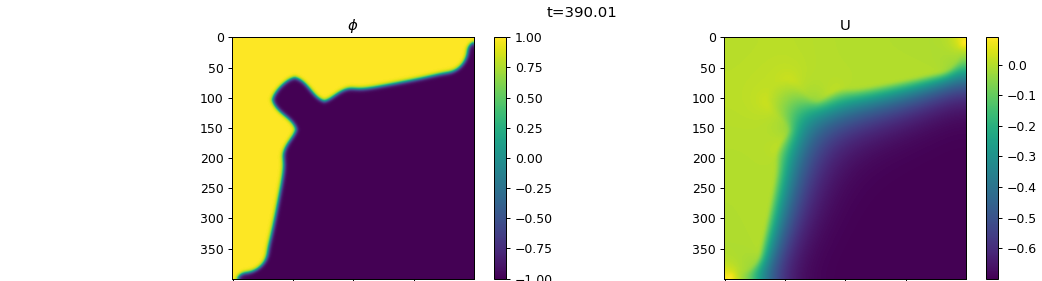

In [45]:
def update(change):
    mylen = len(framelist_phi)
    framecount = mylen
    textwidget.max = mylen+1
    if textwidget.value > mylen:
        textwidget.value = mylen

framecount = len(framelist_phi)
fig2d, ax2d = plt.subplots(ncols=2, figsize=(13, 3.5));
im1 = ax2d[0].imshow(framelist_phi[0], vmin=-1, vmax=1)
im2 = ax2d[1].imshow(framelist_U[0]) 
fig2d.colorbar(im1, ax=ax2d[0])
cbarU = fig2d.colorbar(im2, ax=ax2d[1])
fig2d.canvas.draw()
fig2d.suptitle("t=%.2f" % times[0])
ax2d[0].set_title("$\phi$")
ax2d[1].set_title("U")
ax2d[0].grid(False)
ax2d[1].grid(False)

textwidget = widgets.IntSlider(min=1,max=framecount+1, step=1,  value=1)
textwidget.observe(update, 'value')

In [40]:
# muss potentiell mehrfach ausgeführt werden, um den Simulationsfortschritt abzubilden
interact(plotter2d, frame=textwidget) 


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.plotter2d(frame)>

### Auswertung

Die Simulation soll nun in Hinblick auf die Geschwindigkeit der Dendritenspitze, den Anteil der Festphase sowie die durchschnittliche Temperatur ausgewertet werden. Beschreiben Sie zuerst, was für einen zeitlichen Verlauf Sie für diese drei Größen erwarten und ob ein stationärer Zustand vorliegen kann; hierzu liegen weiter unten schon Markdownzellen bereit, die Sie mit Doppelklick editieren können. Beachten Sie dabei die gelösten Gleichungen sowie die Randbedingungen.

Vervollständigen Sie danach die unteren Funktionen zur Bestimmung der Größen. Stimmen die Verläufe mit Ihren Erwartungen überein? Diskutieren Sie die Unterschiede und erläutern Sie, woher diese stammen.

**Hinweise:**

Die Position der Grenzfläche ist über den Wert von $\phi = 0$ bestimmt; die zeitliche Änderung davon ergibt die Geschwindigkeit. Die Bestimmung dieser Position ist in der Funktion `getPhi0Position(phi)` schon implementiert.

Zur Bestimmung des Festphasenanteils ist die Umwandlung des Wertebereichs von $\phi \in [-1, 1]$ zu $\phi \in [0, 1]$ hilfreich, wobei $-1 \to 0$ und $1 \to 1$ gelten sollte, damit der Wert 0 der flüssigen Phase und der Wert 1 der festen Phase entspricht.

Die Summe über ein Feld kann mit `np.sum(field)` bestimmt werden. Da die Randwerte nicht Teil des inneren Systems sind, sollten diese ausgeschlossen werden, was über die Indizierung `field[1:-1, 1:-1]` geschehen kann.


In [46]:
@njit
def getPhi0Position(phi):
    numx, numy = phi.shape 
    prevphi = phi[0][1]
    pos0 = np.nan
    # es wird nur entlang der Linie (0, 0) -> (0, y) gesucht, was einem der Dendritenarme entspricht
    # sobald der Dendrit an den Rand angelangt wird diese Vereinfachung ungültig
    for y in range(2,numy-1): 
        curphi = phi[0][y]
        if prevphi * curphi < 0: # Vorzeichenwechsel = Phasenübergang
            slope = (curphi-prevphi)/1.0 # 
            pos0 = -curphi/slope + y
            return pos0
        prevphi = curphi
    return pos0
        

def tipvelocity(framelist_phi, times):
    phi = framelist_phi[0]
    
    prevpos = getPhi0Position(phi)
    prevt = times[0]
    
    numframes = len(times)
    vs = [np.nan] # Geschwindigkeit am Anfang ist unbestimmt
    # es wird hier über die abgespeicherten Felder ab dem zweiten gegangen
    for frameidx in range(1,numframes):
        phi = framelist_phi[frameidx]
        t = times[frameidx]
        
        curpos = \
        getPhi0Position(phi) ### hide ###
        displacement = \
        curpos - prevpos ### hide ###
        velocity = \
        displacement / (t-prevt) ### hide ###
        
        # vs.append(value) fügt den Wert value an das Ende der Liste vs an
        vs.append(velocity)
        
        prevpos = curpos
        prevt = t
    return np.array(vs)

@njit
def phasefraction(framelist):
    numx, numy = framelist[0].shape # Gebietslängen
    fieldsize = \
    (numx-2)*(numy-2) ### hide ###
    avgs = []
    # hier wird über jedes abgespeicherte Feld gegangen
    for frame in framelist:
        # Projektion von [-1, 1] nach [0, 1]
        phi_projected = \
        (frame + 1)*0.5 ### hide ###
        # Berechnung des Durchschnittswerts
        myavg = \
        np.sum(phi_projected[1:-1, 1:-1]) / fieldsize ### hide ###
        avgs.append(myavg)
    return np.array(avgs)
    
    
@njit
def avgtemperature(framelist):
    numx, numy = framelist[0].shape # Gebietslängen
    fieldsize = \
    (numx-2)*(numy-2) ### hide ###
    avgs = []
    for frame in framelist:
        # Berechnung des Durchschnittswerts
        myavg = \
        np.sum(frame[1:-1, 1:-1]) / fieldsize ### hide ###
        avgs.append(myavg)
    return np.array(avgs)

**Hinweis:** Wenn das Notebook schnell durchgelaufen wird, z.B. via `Restart & Run All` enthalten die unteren Diagramme nicht unbedingt die aktuellsten Informationen. Führen Sie die nächste Zeile gefolgt von den Diagrammzeilen einzeln aus (Shift+Enter), um aktuelle Ergebnisse zu erhalten.

In [47]:
l1 = len(times)
l2 = len(framelist_phi)
# warten, bis ein konsistenter Zwischenstand erreicht wird
while l1 != l2 or l2 < 2:
    time.sleep(1)
    l1 = len(times)
    l2 = len(framelist_phi)
tmplen = l1
ts = np.array(times)[:l1] # Zwischenspeichern, damit Plots auch während der Simulation funktionieren
avgTs = avgtemperature(framelist_U[:l1])+1 
avgvs = tipvelocity(framelist_phi[:l1], ts[:l1])
phasefrac = phasefraction(framelist_phi[:l1])

Erwartung zur Geschwindigkeit:

Die Geschwindigkeit der Dendritenspitze sollte auf lange Sicht einen stationären Wert annehmen, da sich die Generation von Wärme über das Erstarren und der Abtransport durch Diffusion balancieren werden. Da jedoch nur ein endliches Gebiet abgebildet wird muss dieser Wert nicht erreicht werden. ### hide ###

Beobachteter Verlauf der Geschwindigkeit:

Nach einer Anfangsperiode stellt sich eine annähernd konstante Geschwindigkeit bis zur Zeit ~280 ein. Danach trifft das Wärmediffusionsfeld auf die Randbedingung, wodurch diese einen signifikanten Einfluss auf die Geschwindigkeit nimmt. Sobald etwas später das Phasenfeld an den Rand angelangt versagt die Auswertemethode. ### hide ###

<IPython.core.display.Javascript object>


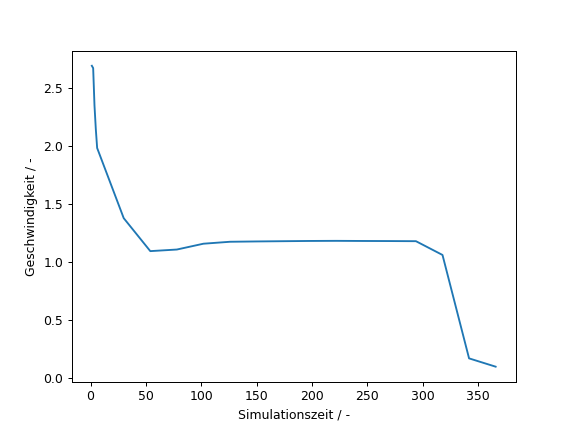

In [48]:

fig_v, ax_v = plt.subplots()
ax_v.set_xlabel("Simulationszeit / -")
ax_v.set_ylabel("Geschwindigkeit / -")
ax_v.plot(ts, avgvs)


Erwartung zum Festphasenanteil:

Der Festphasenanteil steigt kontinuierlich an, da die Durchschnittstemperatur unterhalb der Schmelztemperatur liegt. Da das Gebiet endlich und abgeschlossen ist sollte sich ein stationärer Zustand mit konstantem Festphasenanteil ausbilden. ### hide ###

Beobachteter Verlauf des Festphasenanteils:

Wie erwartet steigt der Festphasenanteil stetig an, jedoch wird der stationäre Zustand nicht erreicht da nicht lang genug gerechnet wurde. ### hide ###

<IPython.core.display.Javascript object>


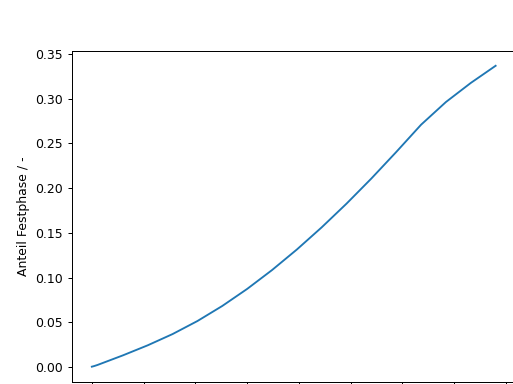

Text(0, 0.5, 'Anteil Festphase / -')

In [49]:

fig_frac, ax_frac = plt.subplots()
ax_frac.plot(ts, phasefrac)
ax_frac.set_xlabel("Simulationszeit / -")
ax_frac.set_ylabel("Anteil Festphase / -")

Erwartung zur Durchschnittstemperatur:

Wie beim Festphasenanteil sollte die Temperatur kontinuierlich steigen, da das Gebiet abgeschlossen ist und eine Wärmequelle über die Erstarrung im Gebiet vorhanden ist. Sobald die Erstarrung abgeschlossen ist wird sich eine konstante Durchschnittstemperatur einstellen. ### hide ###

Beobachteter  Verlauf der Durchschnittstemperatur:

Auch hier werden die Erwartungen für den zeitlichen Verlauf erfüllt, während der stationäre Zustand nicht erreicht wird. ### hide ###

<IPython.core.display.Javascript object>


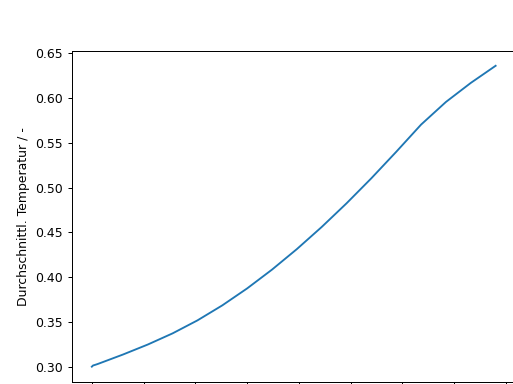

In [50]:

fig_T, ax_T = plt.subplots()
ax_T.set_xlabel("Simulationszeit / -")
ax_T.set_ylabel("Durchschnittl. Temperatur / -")
ax_T.plot(ts, avgTs)


### Annäherung an den realen Prozess
Um den Prozess des Kokillengießens besser abzubilden sollen die Anfangs- und Randbedingungen angepasst werden. Fertigen Sie hierzu eine Kopie dieses Notebooks an (`File -> Make a Copy`) und passen Sie die Anfangsbedingung (Funktion `ini`) und Randbedingungen (Funktion `bcs`) an. Überlegen Sie sich hierzu:

- Wie groß sollte die initiale Unterkühlung $U$ (`U_ini`) bzw. Temperatur ($T = U + 1$) sein, wenn die Schmelze in die Kokille gegossen wurde und gerade ein Keim von Radius $r$ entstanden ist? Passen Sie die Variable `U_ini` dementsprechend an.
- Der thermische Einfluss der Kokille soll komplett über die Randbedingungen des Temperaturfelds angenähert werden. Hierzu können Sie annehmen, dass die Kokille über ein Regelungssystem auf konstanter Temperatur $T_k$ = 0.2, entsprechend $U_k$ = -0.8,  gehalten wird.

Es sind weiterhin die Oberflächenenergie $\sigma = 1$, die Schmelztemperatur $T_m = 1$ und die latente Wärme $L = 3.3$ gegegeben. Beachten Sie, dass Längen in Zellen mit `deltax` multipliziert werden müssen.

Die minimale Unterkühlung bei der ein Keim gerade stabil bleibt entspricht der kritischen Unterkühlung. Diese ist der letzten Übung entsprechend über $\Delta T =\frac{T_m \sigma}{L r}$ gegeben. Mit $r = 10\Delta x = 4$ ergibt sich damit $U = -\Delta T = -0.07576$. ### hide ###

Die Randbedingung für das Temperaturfeld muss auf `dirichlet(T, -0.8)` angepasst werden, damit an allen Rändern diese Temperatur gehalten wird. ### hide ###

Führen Sie nach Anpassung die Simulation erneut durch und diskutieren Sie die Unterschiede der Simulationen. Wie könnte der Prozess noch besser abgebildet werden?

Die Simulation mit angepassten Anfangs- und Randbedingungen zeigt eine wesentlich höhere Umwandlungsgeschwindigkeit, visuell ersichtlich wie auch in den Verläufen der einzelnen Größen. Dies ist vor allem dadurch bedingt, dass die Dendritenspitze über die Dirichlet-Randbedingung auf die Unterkühlung -0.8 gezwungen wird anstatt nahe der Schmelztemperatur zu sein. ### hide ###
Da die Randbedingung nun als Wärmequelle/-senke dient steigt die Temperatur nicht mehr kontinuierlich an, sondern fällt zuerst aufgrund des Transports über den Rand. Zwischenzeitlich steigt die Temperatur, da mehr Wärme über Erstarrung frei wird, als über den Rand transportiert werden kann. Im letzten Teil der Simulation sinkt die Temperatur kontinuierlich auf die Kokillentemperatur. ### hide ###